## I. Introduction
This report provides an analysis of crime in the state of North Carolina. The primary focus is to identify key determinants of crime and introduce policy suggestions that would lower the rates of crime.Our primary research question is: To what extent does the threat of punishment associate with crime rate? To answer this question, we focus on 3 models.
The key variables are probability of arrest, conviction, and receiving a prison sentence. Key covariates in our view are average sentence and police per capita.

For the first model, we look only at our key variables: probability of arrest, conviction, and prison sentence. This is to assess the association between crime rate and probability of being caught and punished. That is, when there is a higher probability of being caught and punished, is there a lower rate of crime? The probabilities used are computed as ratios that serve as proxies for the actual probability values. For example, the probability of arrest is the ratio of arrests to offenses and the other probabilities are calculated using similar metrics. These values are taken from the FBI Uniform Crime Reports and the North Carolina Department of Correction. 

The second model takes into account key covariates to try to optimize the ordinary least squares (OLS) regression and take into account covariates that can be altered by policy. The key covariates are average sentence length and police per capita. 

Finally, the third model takes almost all of the variables provided in the data. This final model is used to show the robustness of our other models. 

## Initial Data Cleaning

In [72]:
# Import necessary libraries

library(ggplot2)
library(car)
library(lmtest)
library(sandwich)
library(dplyr)
library(glue)
library(tidyverse)
library(repr)
library(stargazer)


Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 




In [2]:
df = read.csv("crime_v2.csv")
head(df)
#how many counties?
cat('total rows: ',NROW(df),'\n')
cat('unique counties: ',length(unique(df$county)),'\n\n')
cat('generate table of counties to see which are duplicates:')
sort(table(df$county),decreasing=TRUE)
cat('only one is duplicate, so ther must be empty cells?\ntotal rows without NA: ',
    NROW(na.omit(df)),'\ngood, this matches count of unique counties, 
so we understand the county column')

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
2,3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
3,5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
4,7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
5,9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
6,11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


total rows:  97 
unique counties:  91 

generate table of counties to see which are duplicates:


193   1   3   5   7   9  11  13  15  17  19  21  23  25  27  33  35  37  39  41 
  2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 45  47  49  51  53  55  57  59  61  63  65  67  69  71  77  79  81  83  85  87 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 89  91  93  97  99 101 105 107 109 111 113 115 117 119 123 125 127 129 131 133 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
135 137 139 141 143 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
175 179 181 183 185 187 189 191 195 197 
  1   1   1   1   1   1   1   1   1   1 

only one is duplicate, so ther must be empty cells?
total rows without NA:  91 
good, this matches count of unique counties, 
so we understand the county column

In [3]:
# so what is in the NA rows?
#df2 <- df[is.na(df$county),]
df2 <- subset(df,is.na(df$county))
cat('all columns are empty in NA rows. They are safe to ignore completely:')
df2

all columns are empty in NA rows. They are safe to ignore completely:

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [4]:
# what about those two 193 rows? are they duplicates? Is one empty?
df3 <- subset(df,df$county == 193)
cat('the two instances of 193 are duplicates. We can ignore one:')
df3

the two instances of 193 are duplicates. We can ignore one:

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,...,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [5]:
# generate clean DF
#remove NA
no_na_df <- na.omit(df)

#only one 193
clean_df <- subset(no_na_df, !duplicated(no_na_df$county))
head(clean_df)
nrow(clean_df)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,87,0.0356036,0.298270,0.527595997,0.436170,6.71,0.00182786,2.4226327,30.99368,...,408.7245,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097
2,3,87,0.0152532,0.132029,1.481480002,0.450000,6.35,0.00074588,1.0463320,26.89208,...,376.2542,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694
3,5,87,0.0129603,0.444444,0.267856985,0.600000,6.76,0.00123431,0.4127659,34.81605,...,372.2084,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538
4,7,87,0.0267532,0.364760,0.525424004,0.435484,7.14,0.00152994,0.4915572,42.94759,...,397.6901,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726
5,9,87,0.0106232,0.518219,0.476563007,0.442623,8.22,0.00086018,0.5469484,28.05474,...,377.3126,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755
6,11,87,0.0146067,0.524664,0.068376102,0.500000,13.00,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920


[1] 90

In [6]:
summary(clean_df)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 51.5   1st Qu.:87   1st Qu.:0.020604   1st Qu.:0.20495  
 Median :103.0   Median :87   Median :0.030002   Median :0.27146  
 Mean   :100.6   Mean   :87   Mean   :0.033510   Mean   :0.29524  
 3rd Qu.:150.5   3rd Qu.:87   3rd Qu.:0.040249   3rd Qu.:0.34487  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
                                                                  
        prbconv      prbpris           avgsen           polpc          
 0.068376102: 1   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 0.140350997: 1   1st Qu.:0.3642   1st Qu.: 7.375   1st Qu.:0.0012378  
 0.154451996: 1   Median :0.4222   Median : 9.110   Median :0.0014897  
 0.203724995: 1   Mean   :0.4106   Mean   : 9.689   Mean   :0.0017080  
 0.207830995: 1   3rd Qu.:0.4576   3rd Qu.:11.465   3rd Qu.:0.0018856  
 0.220339   : 1   Max.   :0.6000

In [7]:
# Convert prbconv from factor to numeric.
clean_df$prbconv = as.numeric(levels(clean_df$prbconv))[clean_df$prbconv]

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


In [8]:
summary(clean_df$prbconv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

## Exploratory Data Analysis (EDA)

### EDA Dependent Variables

In [9]:
# Function for plotting dependent variable

dep_var_plots = function(data, title, clr) {

    # resize plot
    options(repr.plot.width=15, repr.plot.height=5)

    # set plotting options
    par(mfrow=c(1,3), mar=c(2,5,3,1))

    # Histogram 
    main_txt=glue("Histogram for {title}")
    hist(data, xlab="", col=clr,
    main=main_txt[1], breaks = 20, freq = F)
    lines(density(data, na.rm=T), col="dark red", lwd = 3)

    # Q-Q plot
    main_txt = glue("Q-Q Plot for {title}")
    qqnorm(data, main=main_txt, pch = 1, frame = FALSE)
    qqline(data, col = "dark red", lwd = 3)

    # Boxplot
    main_txt = glue("Boxplot for {title}")
    boxplot(data, col = clr, ylab="Crime Rate", main = main_txt)
}

[1] "Summary of crime rate:"

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.005533 0.020604 0.030002 0.033510 0.040249 0.098966 

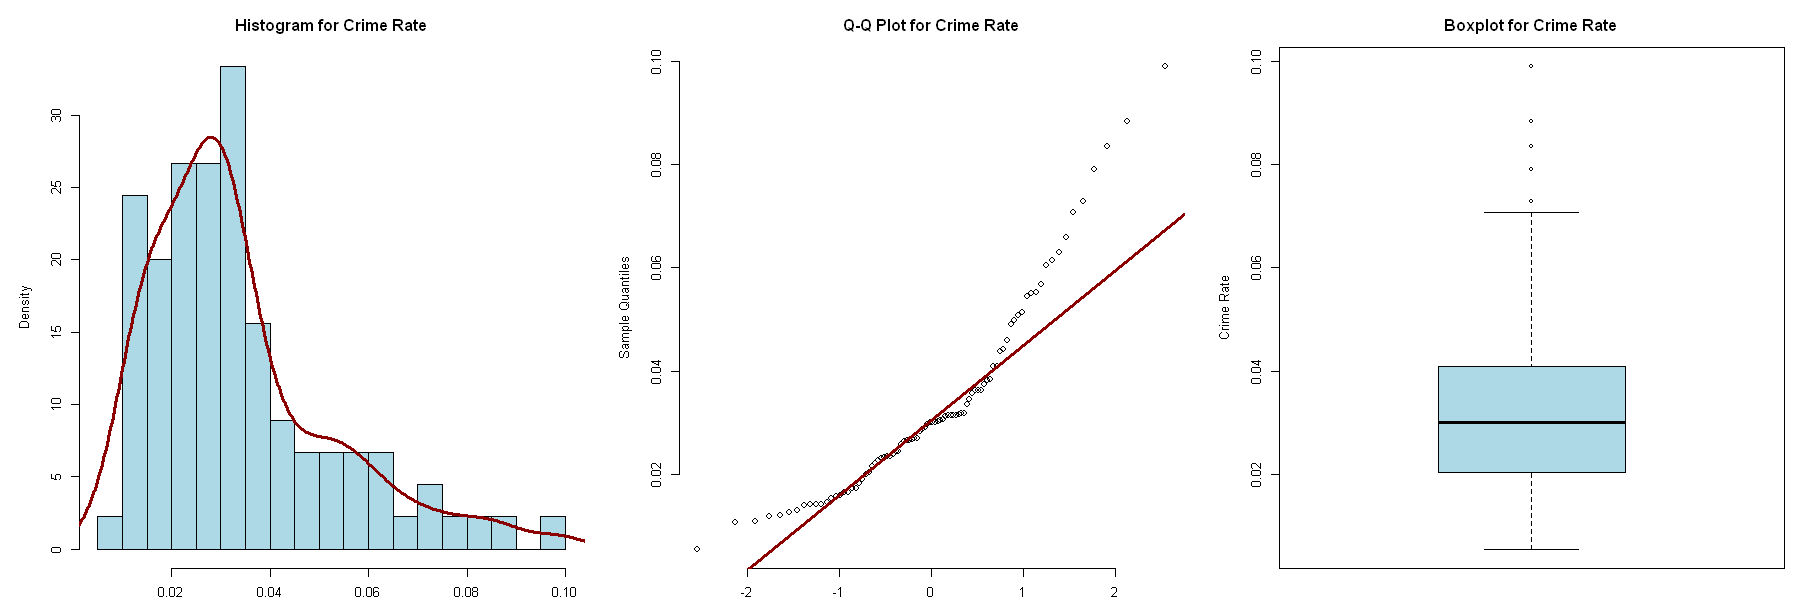

In [10]:
# Stat Summary
paste("Summary of crime rate:")
(summary(clean_df$crmrt))

# plots
dep_var_plots(clean_df$crmrt, 'Crime Rate', 'lightblue')

#### Log Transform
- The crime rate histogram shows a significant positive skew in its distribution. 
- Therefore, a log transformation of the variable can help pulling the outliers in closer to the bulk of the observations and thus improving its normality.
- The log transformation is justified since crime rate can only take positive values. 
- Another benefit of the log transformation is to improve the interpretability of the model by allowing us to explain effects from the regressors on the regressand in terms of percent change.

[1] "Summary of Log(crime rate):"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -5.197  -3.883  -3.506  -3.542  -3.213  -2.313 

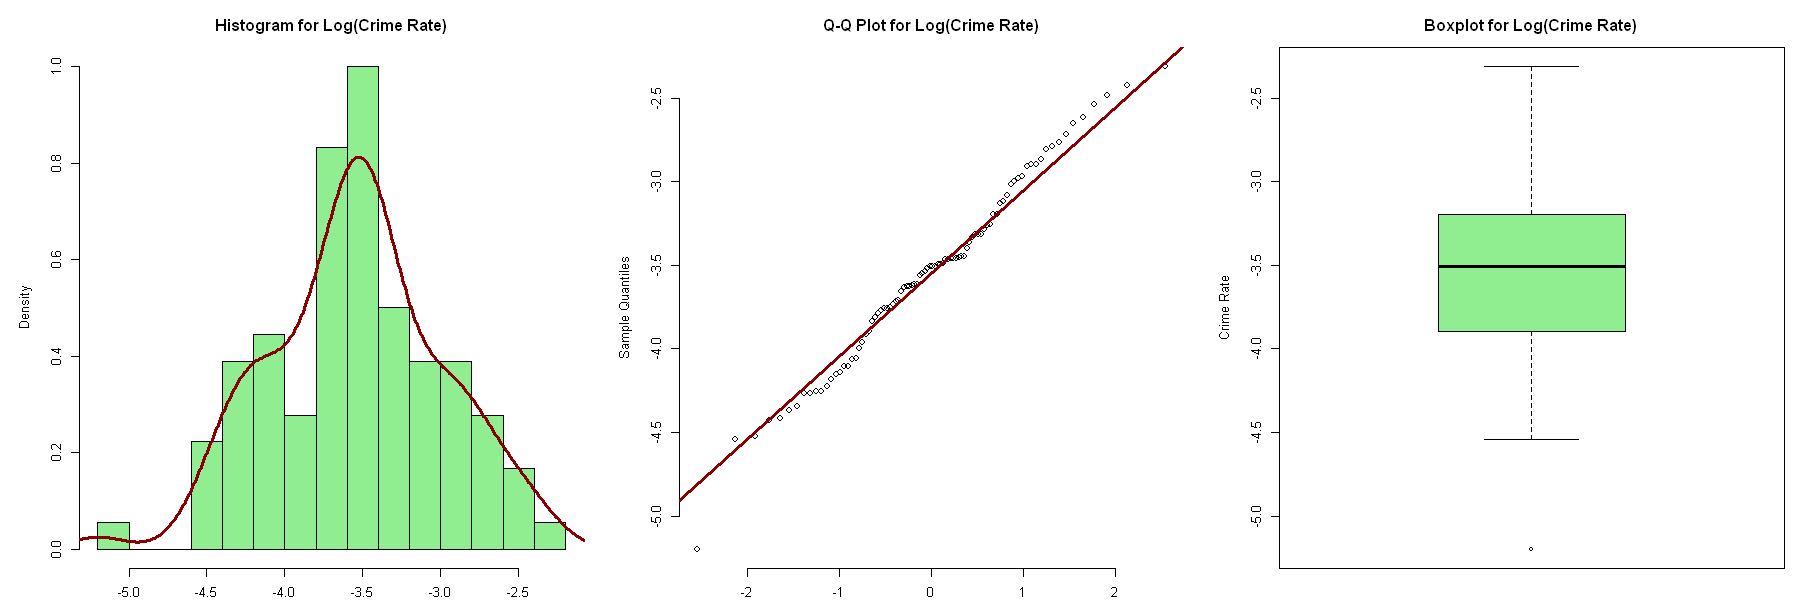

In [11]:
# Stat Summary
paste("Summary of Log(crime rate):")
(summary(log(clean_df$crmrt)))

# plots
dep_var_plots(log(clean_df$crmrt), 'Log(Crime Rate)', 'lightgreen')

### EDA Independent Variables and Covariates

Although, we should not expect probabilities over 1.0, but that is what we observe in variables Probability of Arrest (prbarr) and Probability of Conviction (prbconv). However, when we understand how those variables were proxied, we realize that they are not actual probabilities but ather ratios.

The probability of arrest is proxied by the ratio between the number of arrests in 1987 to the number of offenses in 1987. However, not every arrest made in 1987 might be referring to offenses made in 1987: there might be arrests referring to crimes committed in previous years, which explains why the ratio between arrests and offenses in 1987 could be above 1.

The probability of conviction is proxied by the ratio between the number of convictions and to the number of arrests in 1987. It is the same thing we have observed for the probability of arrest. The convictions issued in 1987 are not all necessarily referring to arrests made in 1987. Besides that, one arrest might lead to several convictions (example, a person arrested might be convicted for several crimes). In that sense, it is possible for us to have this variable achieving values above

variable  | label
----------|------
4    prbarr|         'probability' of arrest
5   prbconv|     'probability' of conviction
6   prbpris| 'probability' of prison sentence
7    avgsen|             avg. sentence, days
8     polpc|               police per capita
9   density|             people per sq. mile
24      mix| offense mix: face-to-face/other

[1] "Summary of probability of arrest:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20495 0.27146 0.29524 0.34487 1.09091 

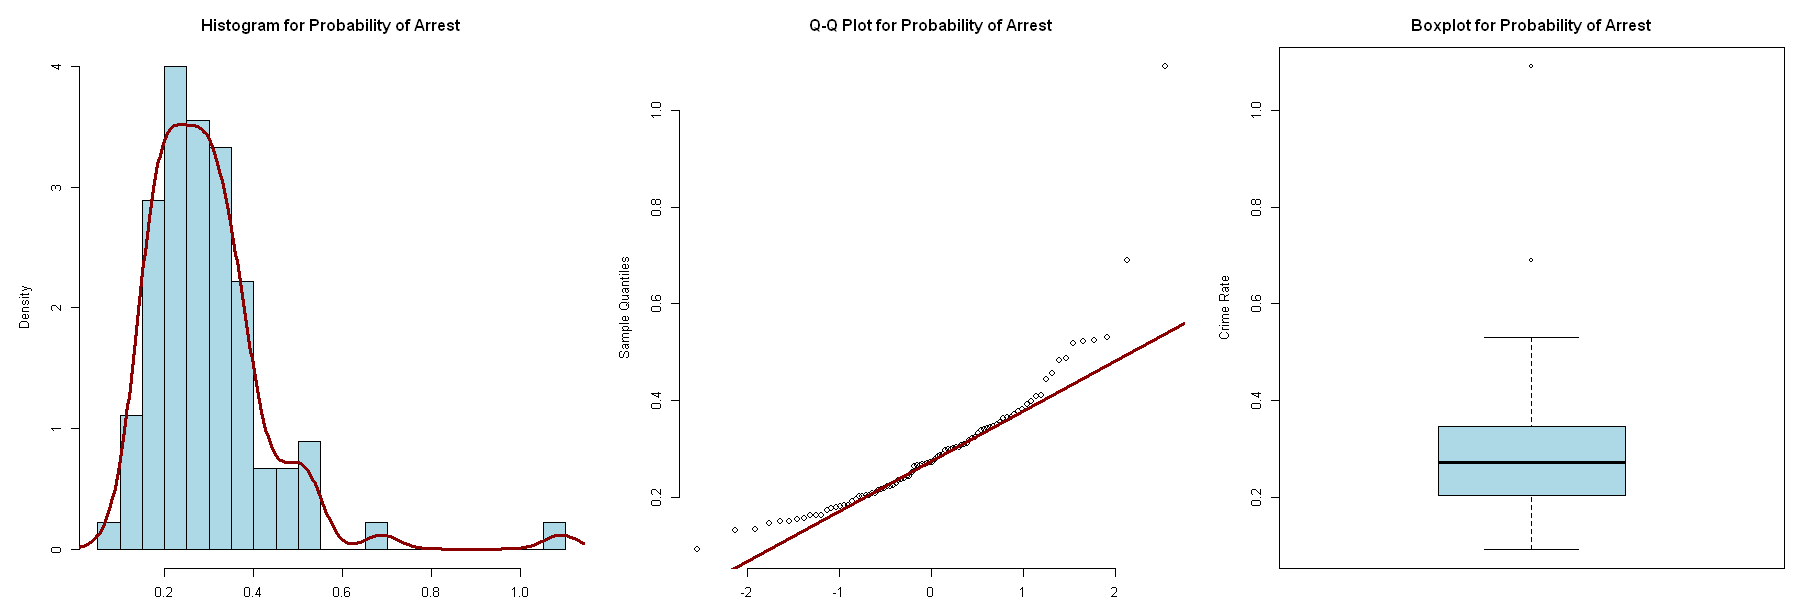

In [12]:
# Stat Summary
paste("Summary of probability of arrest:")
(summary(clean_df$prbarr))

# plots
dep_var_plots(clean_df$prbarr, 'Probability of Arrest', 'lightblue')

#### Probability of Arrest Plot Discussion
- The probability of arrest histogram shows a significant positive skew in its distribution
- The QQ plot shows relative normality, with divergence in the lower and higher values
- There is an outlier with value greater than 1 as shown from the histogram and the boxplot

[1] "Summary of probability of conviction:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

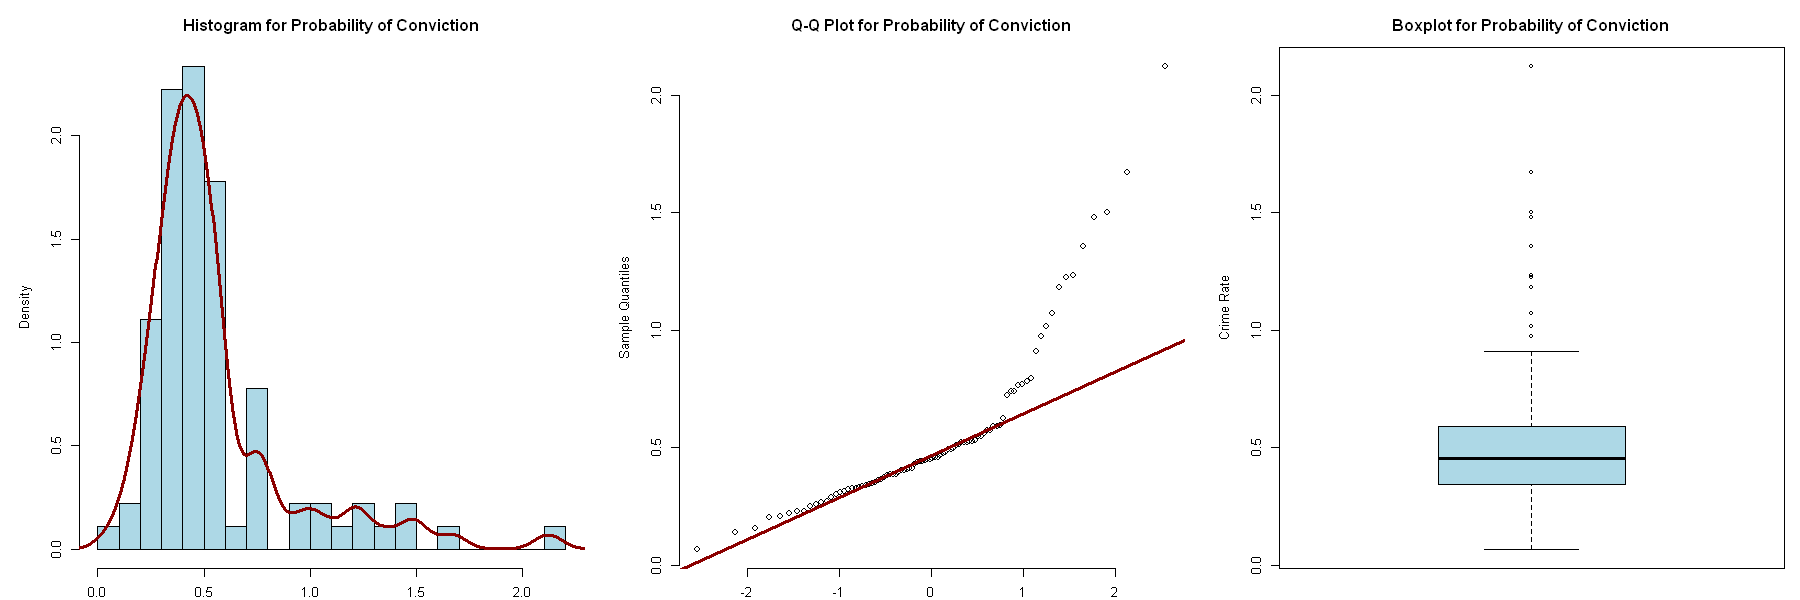

In [13]:
# Stat Summary
paste("Summary of probability of conviction:")
(summary(clean_df$prbconv))

# plots
dep_var_plots(clean_df$prbconv, 'Probability of Conviction', 'lightblue')

#### Probability of Conviction Plot Discussion
- The probability of arrest histogram shows a significant positive skew in its distribution
- The QQ plot shows relative normality, with divergence in the higher values
- There is an outlier with value greater than 2 as shown from the histogram and the boxplot
- There are also many values that are above 1. This could possibly be from multiple convictions against a single arrest

#### Log Transform of Probability of Conviction
- A log transformation of the variable can help pulling the outliers in closer to the bulk of the observations and thus improving its normality.
- The log transformation is justified since crime rate can only take positive values. 
- Another benefit of the log transformation is to improve the interpretability of the model by allowing us to explain the probability as a percent increase in convictions. This is especially helpful since there are values greater than 1.

[1] "Summary of Log(probability of conviction):"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.6827 -1.0665 -0.7947 -0.7555 -0.5360  0.7520 

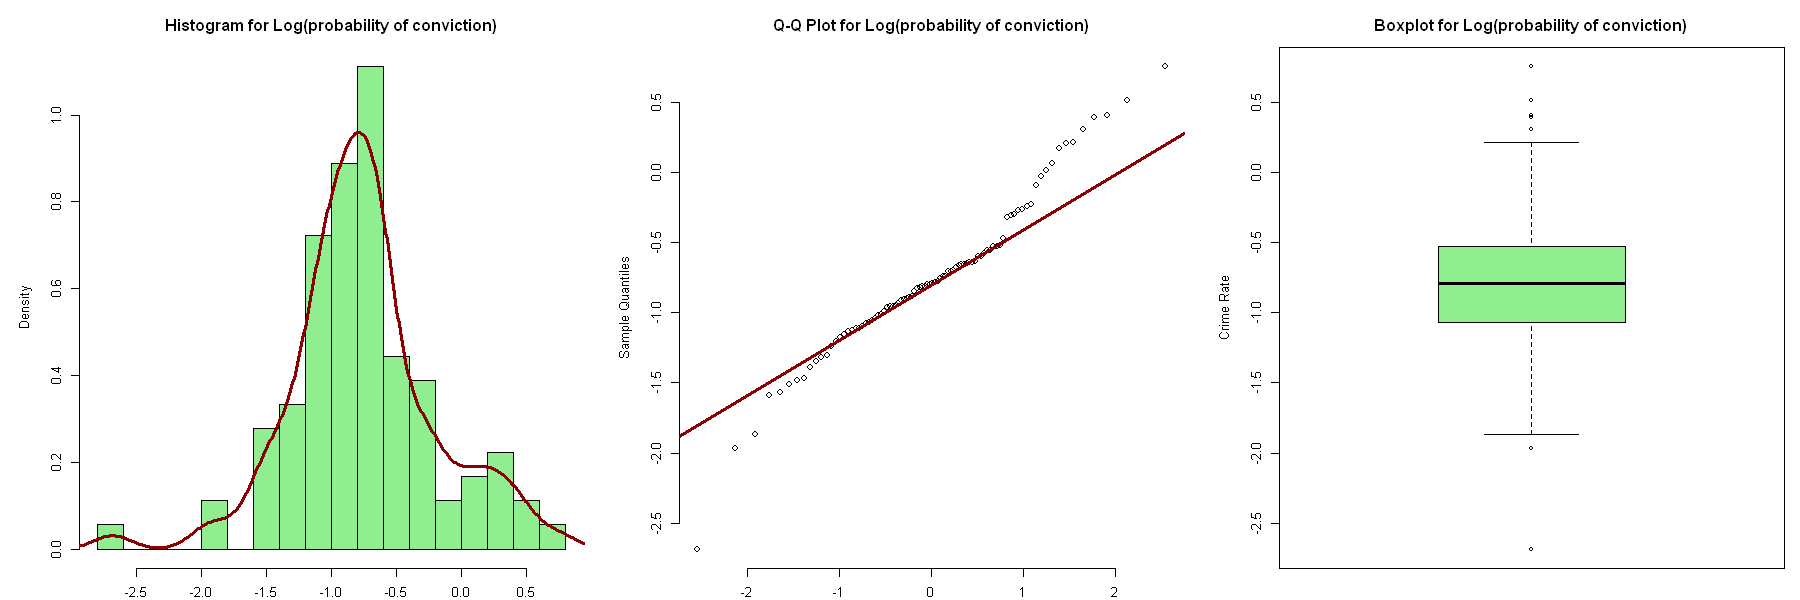

In [14]:
# Stat Summary
paste("Summary of Log(probability of conviction):")
(summary(log(clean_df$prbconv)))

# plots
dep_var_plots(log(clean_df$prbconv), 'Log(probability of conviction)', 'lightgreen')

#### Log of Probability of Conviction Plot Discussion
- The log of probability of conviction histogram shows a relatively normal distribution
- The QQ plot shows relative normality, with divergence in the lower and higher values
- There are a few values outside the bulk of the box plot

[1] "Summary of probability of prison sentence:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1500  0.3642  0.4222  0.4106  0.4576  0.6000 

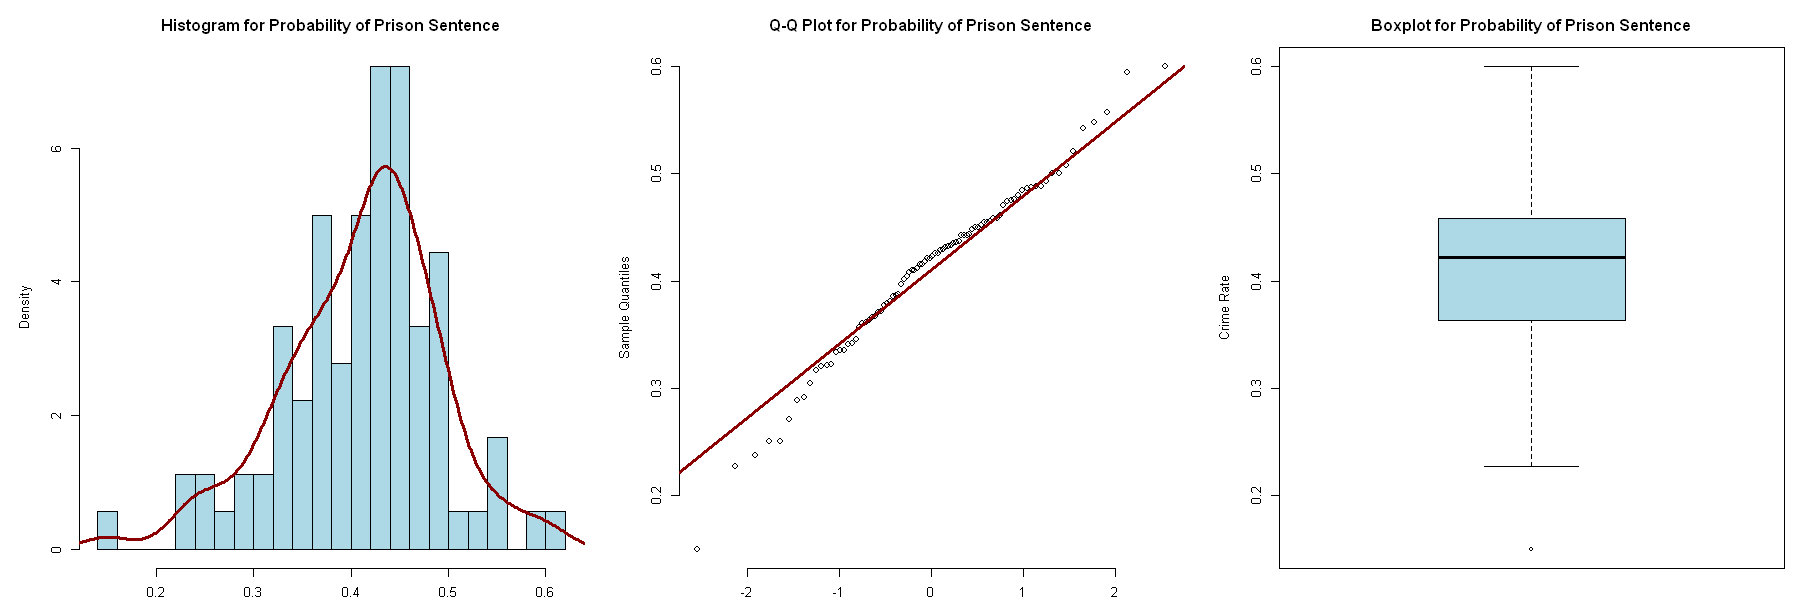

In [15]:
# Stat Summary
paste("Summary of probability of prison sentence:")
(summary(clean_df$prbpris))

# plots
dep_var_plots(clean_df$prbpris, 'Probability of Prison Sentence', 'lightblue')

#### Probability of Prison Sentence Plot Discussion
- The probability of prison sentence histogram shows a slight negative skew in its distribution
- The QQ plot shows fairly good normality, with slight divergence in the lower and higher values
- There is an outlier with value less than 0.2 as shown from the histogram and the boxplot

[1] "Summary of average sentence:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.380   7.375   9.110   9.689  11.465  20.700 

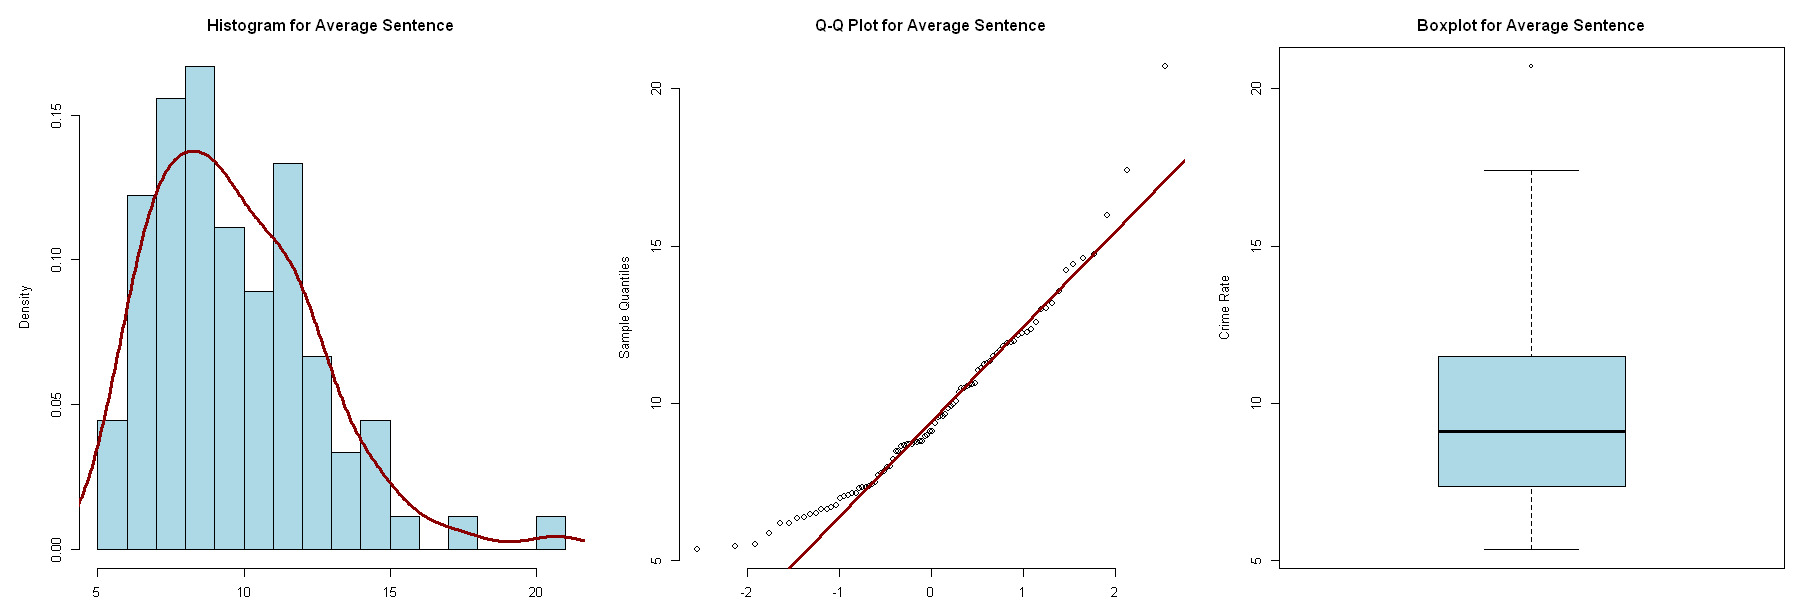

In [16]:
# Stat Summary
paste("Summary of average sentence:")
(summary(clean_df$avgsen))

# plots
dep_var_plots(clean_df$avgsen, 'Average Sentence', 'lightblue')

#### Average Sentence Plot Discussion
- The average sentence histogram shows a significant positive skew in its distribution
- The QQ plot shows relative normality, with divergence in the lower and higher values
- There is an outlier with value greater than 20 as shown from the histogram and the boxplot

[1] "Summary of police per capita:"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007459 0.0012378 0.0014897 0.0017080 0.0018856 0.0090543 

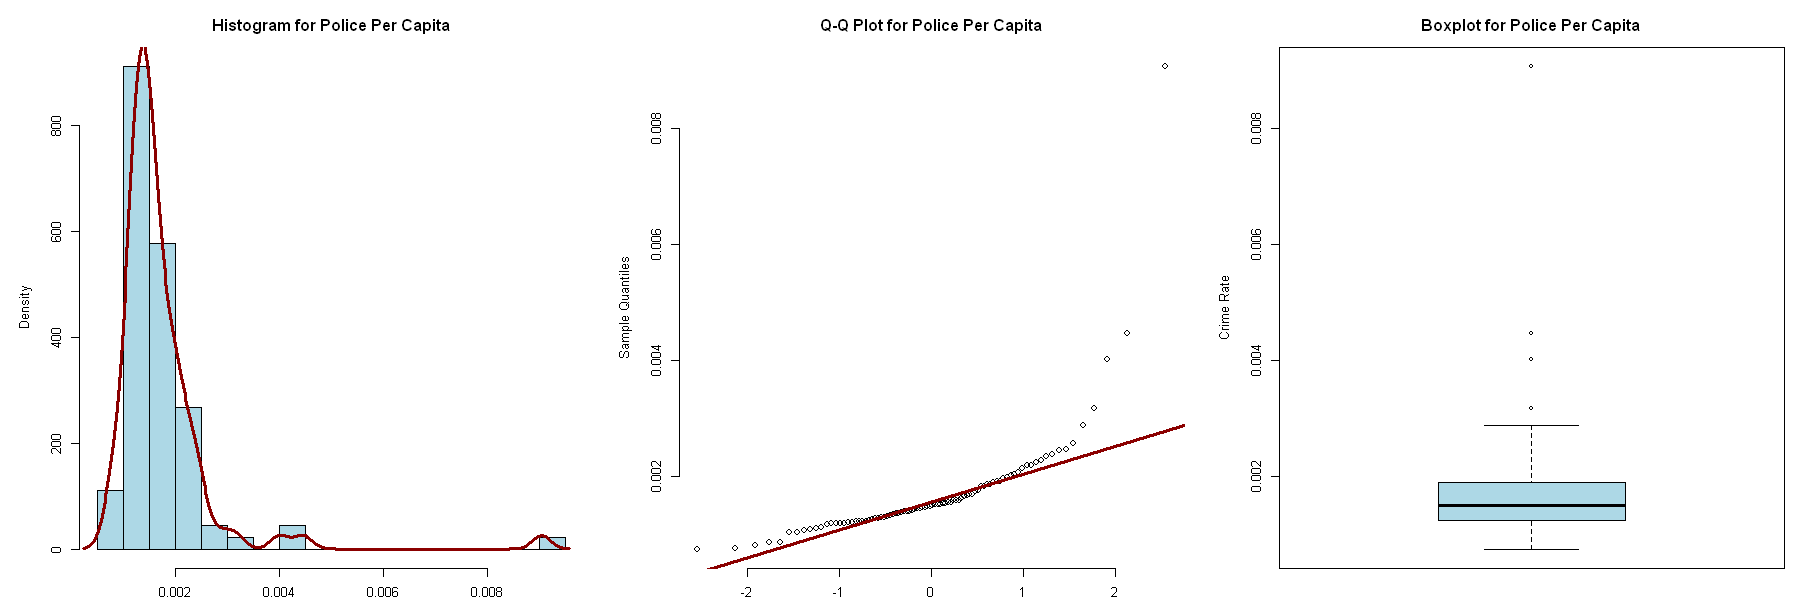

In [17]:
# Stat Summary
paste("Summary of police per capita:")
(summary(clean_df$polpc))

# plots
dep_var_plots(clean_df$polpc, 'Police Per Capita', 'lightblue')

#### Police Per Capita Plot Discussion
- The probability of arrest histogram shows a significant positive skew in its distribution. This is most likely caused by the outlier value
- The QQ plot shows relative normality, with divergence in the lower and higher values
- There is an outlier with value greater than 0.008 as shown from the histogram and the boxplot

[1] "Summary of density:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54718 0.97925 1.43567 1.56926 8.82765 

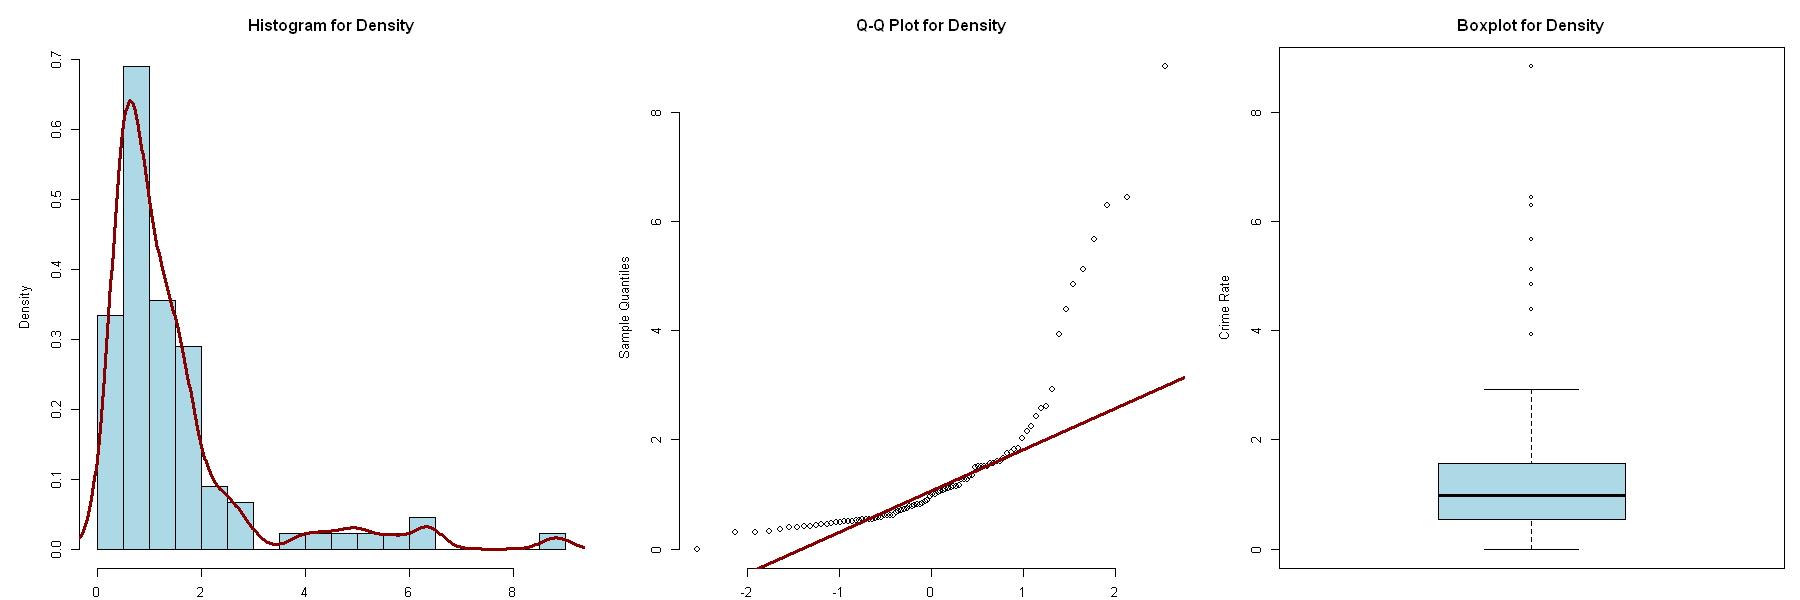

In [18]:
# Stat Summary
paste("Summary of density:")
(summary(clean_df$density))

# plots
dep_var_plots(clean_df$density, 'Density', 'lightblue')

#### Density Plot Discussion
- The probability of arrest histogram shows a significant positive skew in its distribution
- The QQ plot shows low normality only in the center, with divergence in the lower and especially in higher values
- There are quite a few values that are more positive, as shown in the histogram and boxplot

[1] "Summary of offence mix:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01961 0.08060 0.10095 0.12905 0.15206 0.46512 

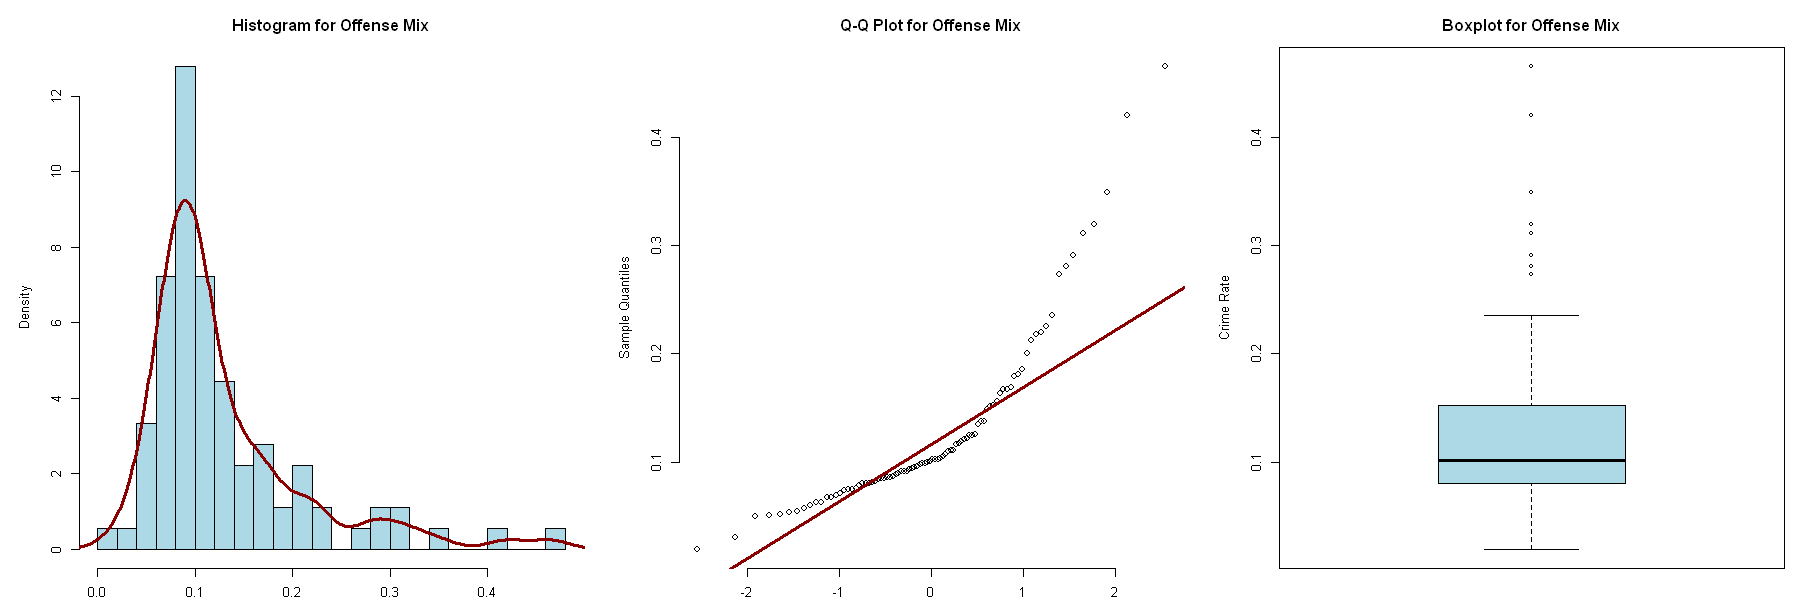

In [19]:
# Stat Summary
paste("Summary of offence mix:")
(summary(clean_df$mix))

# plots
dep_var_plots(clean_df$mix, 'Offense Mix', 'lightblue')

#### Offense Mix Plot Discussion
- The offence mix histogram shows a significant positive skew in its distribution
- The QQ plot it is not very normal
- There are quite a few values that are more positive, as shown in the histogram and boxplot

**Justification of filtering:**

> prbarr: although the probailities here are rather ratio than probability, however, values greater than one are still hard to explain. There is only one value greater than 1 for this probabilities which have caused the distribution to be considerably skewed to the right. Removing this data point helps a lt to bring the hsitogram much closer to a normal distribution. That is why we decided to filter out this data point.

> pbconv: actually the filtering of this variable is a result of an iterative process of EDA -> moldeing -> EDA. When included the log of raw values in our Model 2, we have observed a cook distance close to 1 for one data point (row 6). When looking at this data, we found out that the value for prbconv is unusually much smaller than the mean/median and the next smallest value. Thus, we decided to filter out this data point.

> polpc: looking at the plots police per capita (polpc), there is one data point that is extremely larger than the mean/median and also much larger than the immediate second largest value. We decided to safely remove this data point.

> density: looking closely at the density data we can see that there is one data point of very small value (~ 0.00002) close to zero as compared with the next smallest value (~0.3). Removing this single data point also helps a lot to make the distribution very much close to normal. Thus, We decided to safely remove this value.

**prbarr**

In [20]:
clean_df[which(clean_df$prbarr > 1),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,...,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495


In [21]:
summary(clean_df$prbconv)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06838 0.34422 0.45170 0.55086 0.58513 2.12121 

**prbconv**

In [22]:
cat(sort(clean_df$prbconv))

0.0683761 0.140351 0.154452 0.203725 0.207831 0.220339 0.226361 0.22959 0.248276 0.259833 0.267857 0.271947 0.289474 0.300578 0.308411 0.314607 0.322581 0.325301 0.327869 0.328664 0.334701 0.340491 0.343023 0.3478 0.352941 0.360153 0.364353 0.371879 0.381908 0.384236 0.385496 0.386926 0.393413 0.401198 0.40378 0.40678 0.410596 0.412698 0.426778 0.436441 0.438961 0.443114 0.443681 0.45 0.450567 0.45283 0.45721 0.459216 0.468531 0.476563 0.477733 0.49294 0.493438 0.495575 0.508197 0.515464 0.520607 0.52071 0.522388 0.525424 0.527596 0.528302 0.548495 0.54902 0.559823 0.571429 0.573944 0.588859 0.589905 0.595078 0.622517 0.722973 0.736909 0.739394 0.763333 0.769231 0.781609 0.793233 0.909091 0.972973 1.01538 1.06897 1.18293 1.22561 1.23438 1.35814 1.48148 1.5 1.67052 2.12121

In [23]:
clean_df %>% slice(6)

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,87,0.0146067,0.524664,0.0683761,0.5,13,0.00288203,0.6113361,35.22974,...,401.3378,187.8255,258.565,237.1507,258.6,391.48,325.71,275.22,0.3195266,0.0989192


**polpc**

In [24]:
summary(clean_df$polpc)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007459 0.0012378 0.0014897 0.0017080 0.0018856 0.0090543 

In [25]:
clean_df[which(clean_df$polpc > 0.005),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,...,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495


**density**

In [26]:
summary(clean_df$density)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00002 0.54718 0.97925 1.43567 1.56926 8.82765 

In [27]:
cat(sort(clean_df$density))

2.03422e-05 0.3005714 0.3009986 0.3167155 0.3503982 0.3858093 0.3887588 0.4126394 0.4127659 0.4349594 0.4427711 0.4487427 0.4623894 0.4915572 0.4938776 0.5079365 0.5115089 0.5127119 0.5169492 0.5257009 0.5351562 0.5353749 0.5469484 0.5478615 0.5639659 0.5767442 0.5813449 0.6092437 0.6112532 0.6113361 0.6203008 0.6713483 0.6878307 0.7125506 0.7172285 0.7417582 0.7788945 0.781768 0.800885 0.8138298 0.8202568 0.8306636 0.8648649 0.889881 0.9622641 0.9962264 1.005282 1.026217 1.046332 1.07837 1.081531 1.101911 1.12961 1.14408 1.152134 1.167984 1.273764 1.275253 1.28169 1.333333 1.338889 1.498938 1.502488 1.509666 1.511905 1.515982 1.566202 1.570281 1.59396 1.598456 1.650066 1.745989 1.772563 1.815508 1.844017 2.019268 2.1575 2.251825 2.422633 2.574176 2.602428 2.924242 3.934551 4.388759 4.834734 5.124424 5.674497 6.286487 6.427185 8.827652

**Filtering:**

In [28]:
filtered_df = clean_df
filtered_df = filtered_df %>% filter(prbarr <= 1, prbconv > 0.07, polpc < 0.0044,  density > 0.1)

In [29]:
(dim(clean_df))
(dim(filtered_df))

[1] 90 25

[1] 86 25

### EDA Filtered Data Independent Variables and Covariates

[1] "Summary of probability of arrest:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09277 0.20495 0.27000 0.28167 0.34248 0.68902 

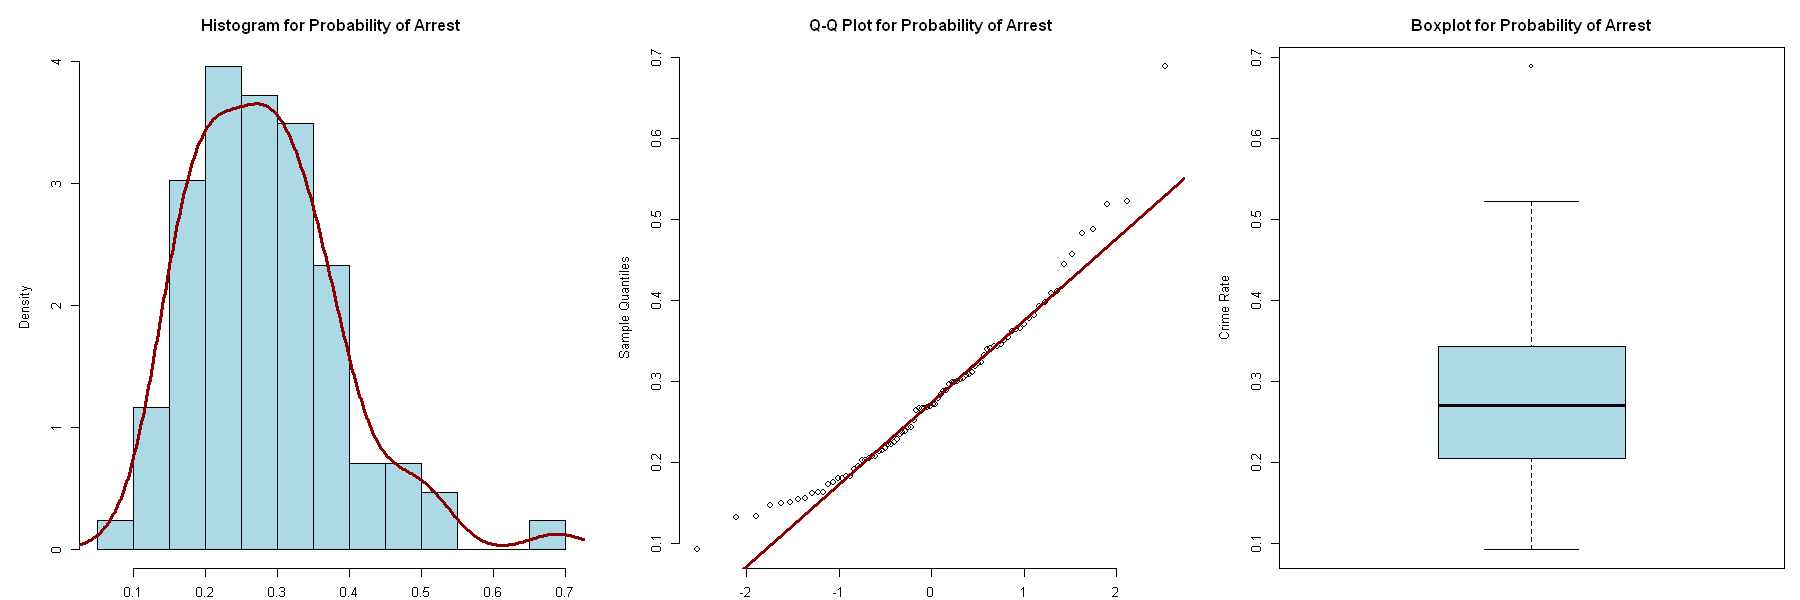

In [30]:
# Stat Summary
paste("Summary of probability of arrest:")
(summary(filtered_df$prbarr))

# plots
dep_var_plots(filtered_df$prbarr, 'Probability of Arrest', 'lightblue')

#### Probability of Arrest Plot Discussion
- The probability of arrest histogram shows a slight positive skew in its distribution
- The QQ plot shows relative normality, with slight divergence in the lower and higher values
- There is an outlier with value greater than 1 as shown from the histogram and the boxplot. However, the value is not as far out of family as before.

[1] "Summary of probability of conviction:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1404  0.3491  0.4517  0.5350  0.5733  2.1212 

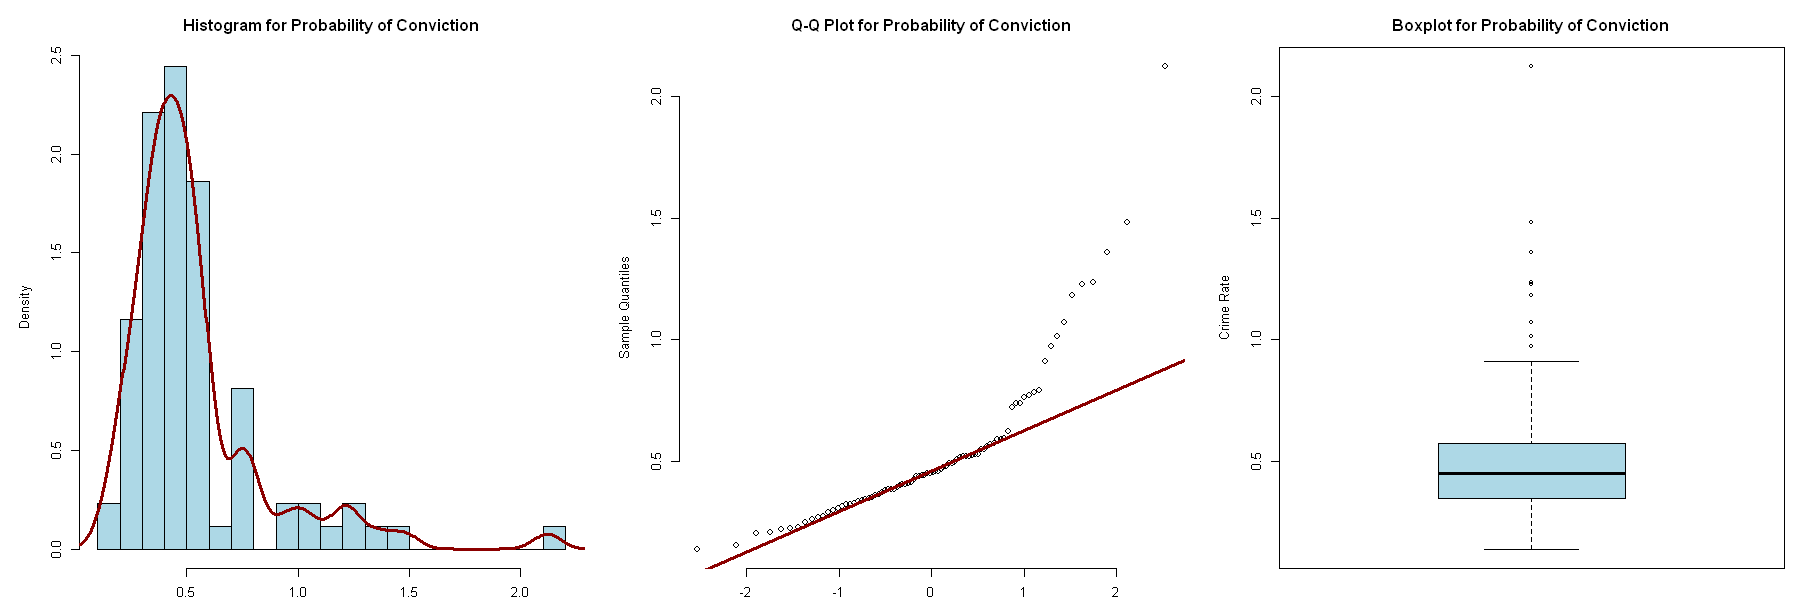

In [31]:
# Stat Summary
paste("Summary of probability of conviction:")
(summary(filtered_df$prbconv))

# plots
dep_var_plots(filtered_df$prbconv, 'Probability of Conviction', 'lightblue')

#### Probability of Conviction Plot Discussion
- The probability of arrest histogram still shows a significant positive skew in its distribution
- The QQ plot shows relative normality, with divergence in the higher values
- There is an outlier with value greater than 2 as shown from the histogram and the boxplot
- There are also many values that are above 1. This could possibly be from multiple convictions against a single arrest

#### Log Transform of Probability of Conviction
- A log transformation of the variable can help pulling the outliers in closer to the bulk of the observations and thus improving its normality.
- The log transformation is justified since crime rate can only take positive values. 
- Another benefit of the log transformation is to improve the interpretability of the model by allowing us to explain the probability as a percent increase in convictions. This is especially helpful since there are values greater than 1.

[1] "Summary of Log(probability of conviction):"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.9636 -1.0525 -0.7947 -0.7572 -0.5563  0.7520 

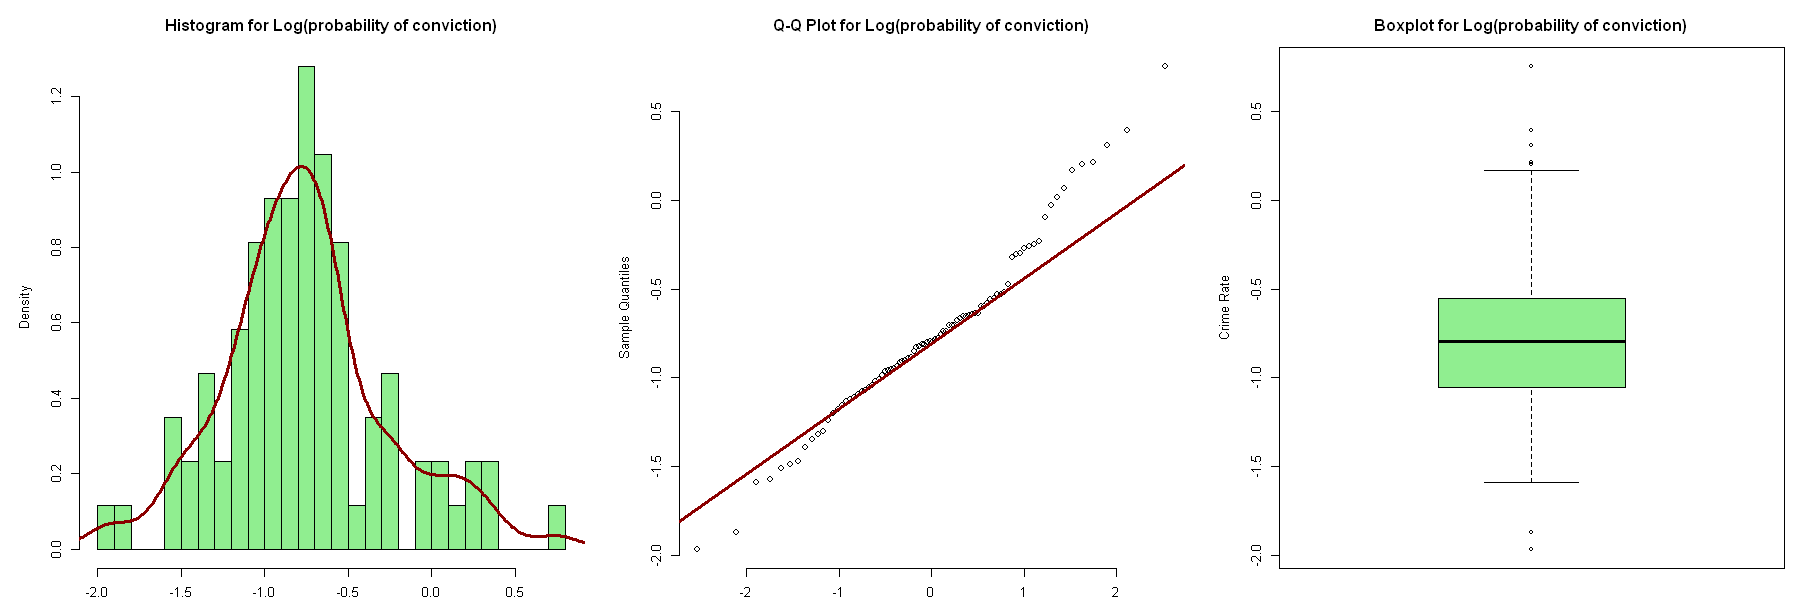

In [32]:
# Stat Summary
paste("Summary of Log(probability of conviction):")
(summary(log(filtered_df$prbconv)))

# plots
dep_var_plots(log(filtered_df$prbconv), 'Log(probability of conviction)', 'lightgreen')

#### Log of Probability of Conviction Plot Discussion
- The log of probability of conviction histogram shows a relatively normal distribution
- The QQ plot shows relative normality, with divergence in the lower and higher values
- There are a few values outside the main body of the box plot

[1] "Summary of probability of prison sentence:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2273  0.3642  0.4209  0.4109  0.4545  0.6000 

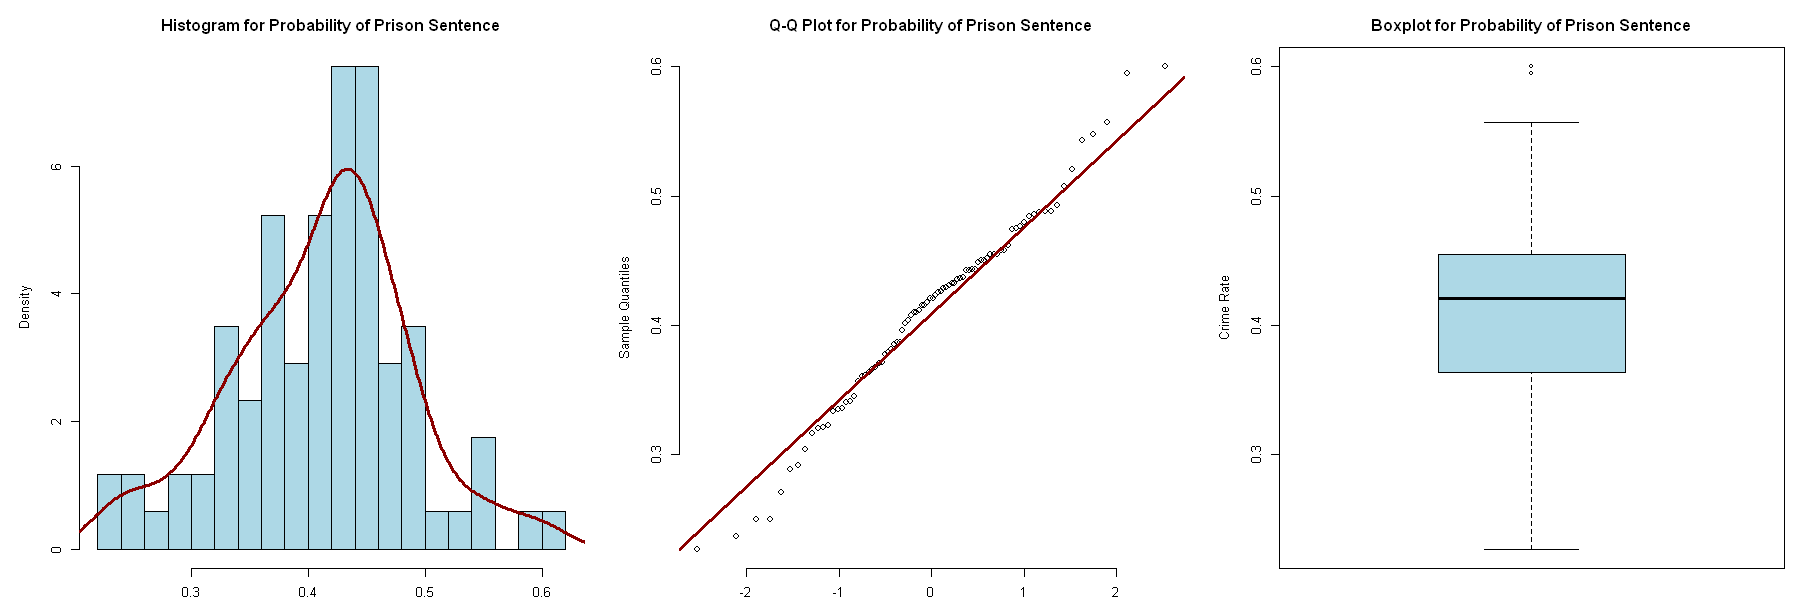

In [33]:
# Stat Summary
paste("Summary of probability of prison sentence:")
(summary(filtered_df$prbpris))

# plots
dep_var_plots(filtered_df$prbpris, 'Probability of Prison Sentence', 'lightblue')

#### Probability of Prison Sentence Plot Discussion
- The probability of prison sentence histogram shows a slight negative skew in its distribution
- The QQ plot shows fairly good normality, with slight divergence in the lower and higher values
- There are a few points outside the main body of the box plot, but overall most values are within family

[1] "Summary of average sentence:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.380   7.375   9.045   9.519  11.280  17.410 

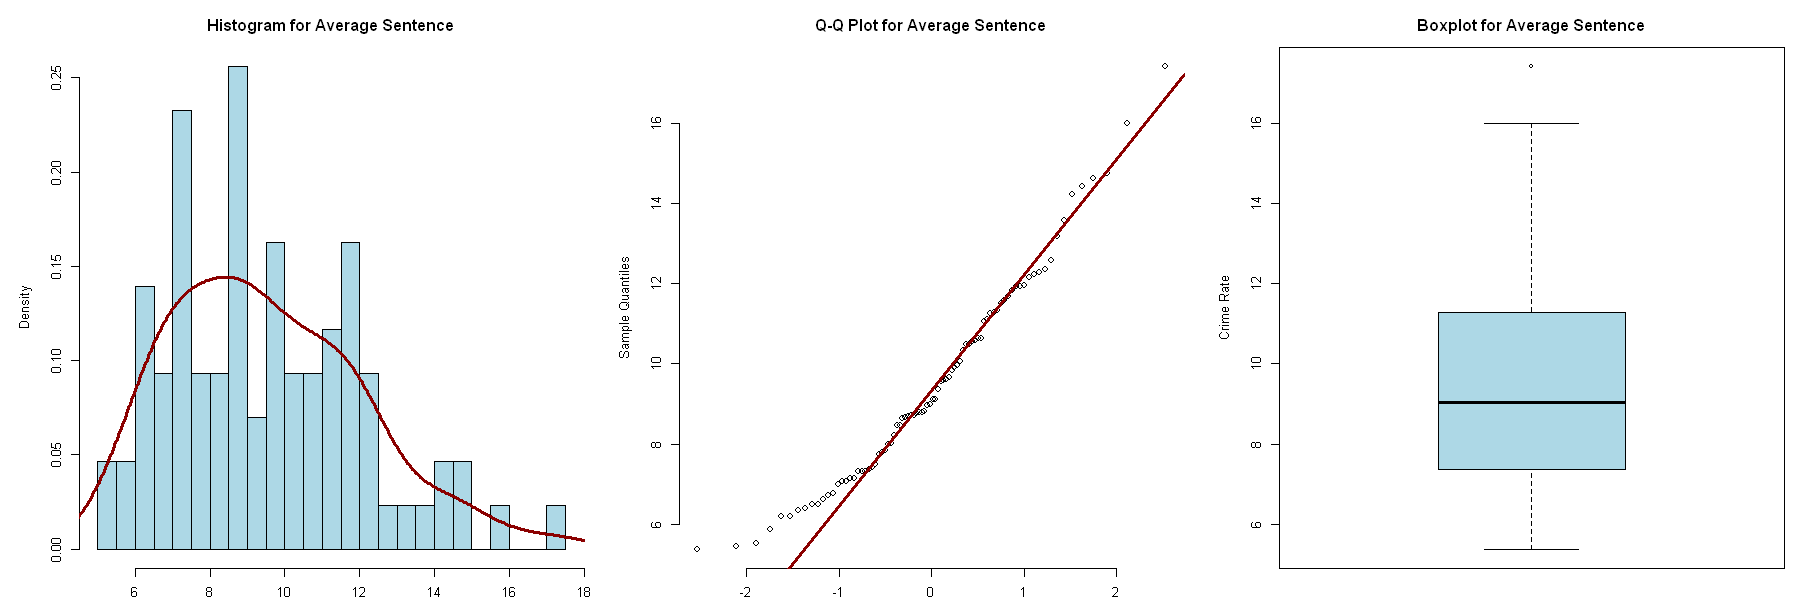

In [34]:
# Stat Summary
paste("Summary of average sentence:")
(summary(filtered_df$avgsen))

# plots
dep_var_plots(filtered_df$avgsen, 'Average Sentence', 'lightblue')

#### Average Sentence Plot Discussion
- The average sentence histogram shows a significant positive skew in its distribution
- The QQ plot shows relative normality, with divergence in the lower and higher values
- There is an outlier with value at approximately 17 as shown from the histogram and the boxplot. However, this value is not too out of family with the other values. 

[1] "Summary of police per capita:"

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0007459 0.0012291 0.0014697 0.0015600 0.0018292 0.0040096 

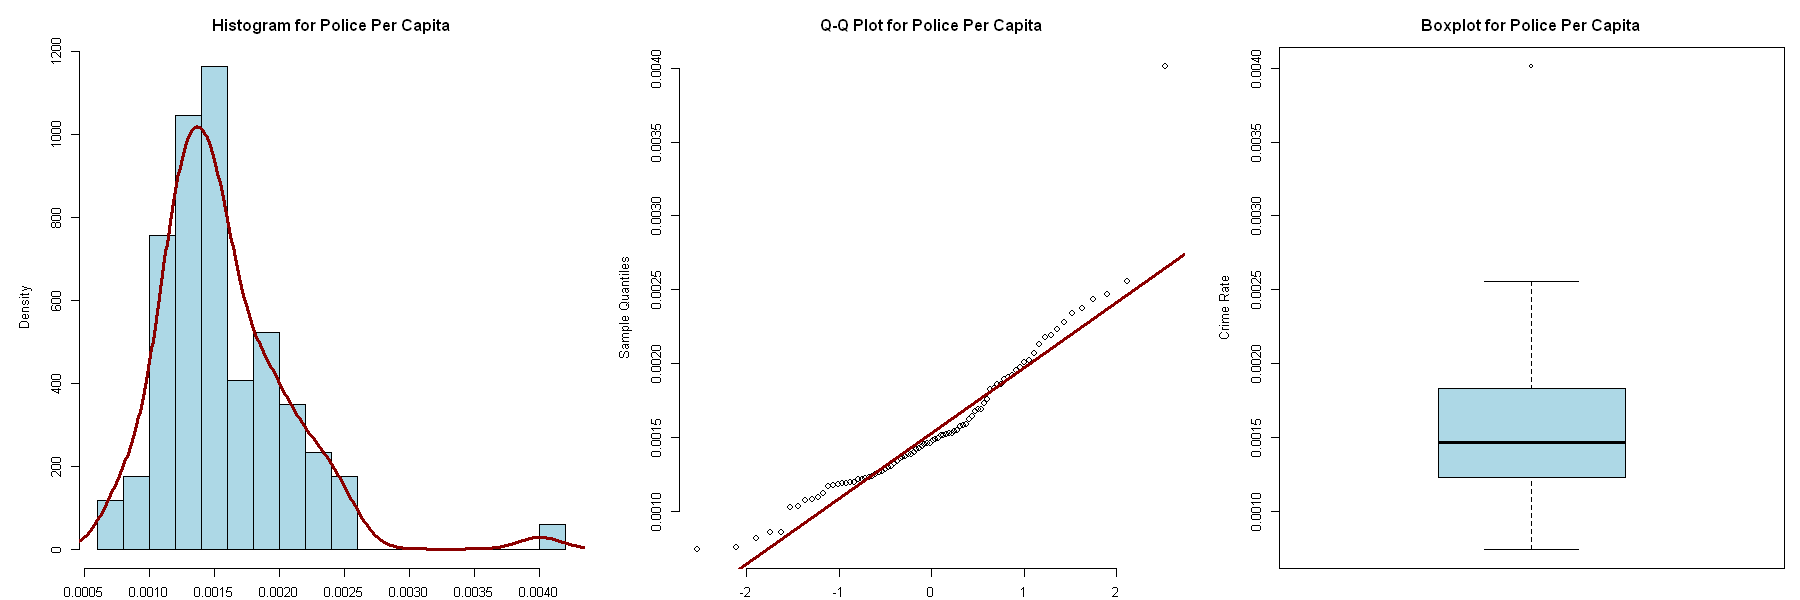

In [35]:
# Stat Summary
paste("Summary of police per capita:")
(summary(filtered_df$polpc))

# plots
dep_var_plots(filtered_df$polpc, 'Police Per Capita', 'lightblue')

#### Police Per Capita Plot Discussion
- The probability of arrest histogram shows a significant positive skew in its distribution. This is most likely caused by the outlier value
- The QQ plot shows relative normality, with divergence in the lower and higher values
- There is an outlier with value greater than 0.004 as shown from the histogram and the boxplot

[1] "Summary of density:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3006  0.5519  1.0008  1.4705  1.5693  8.8277 

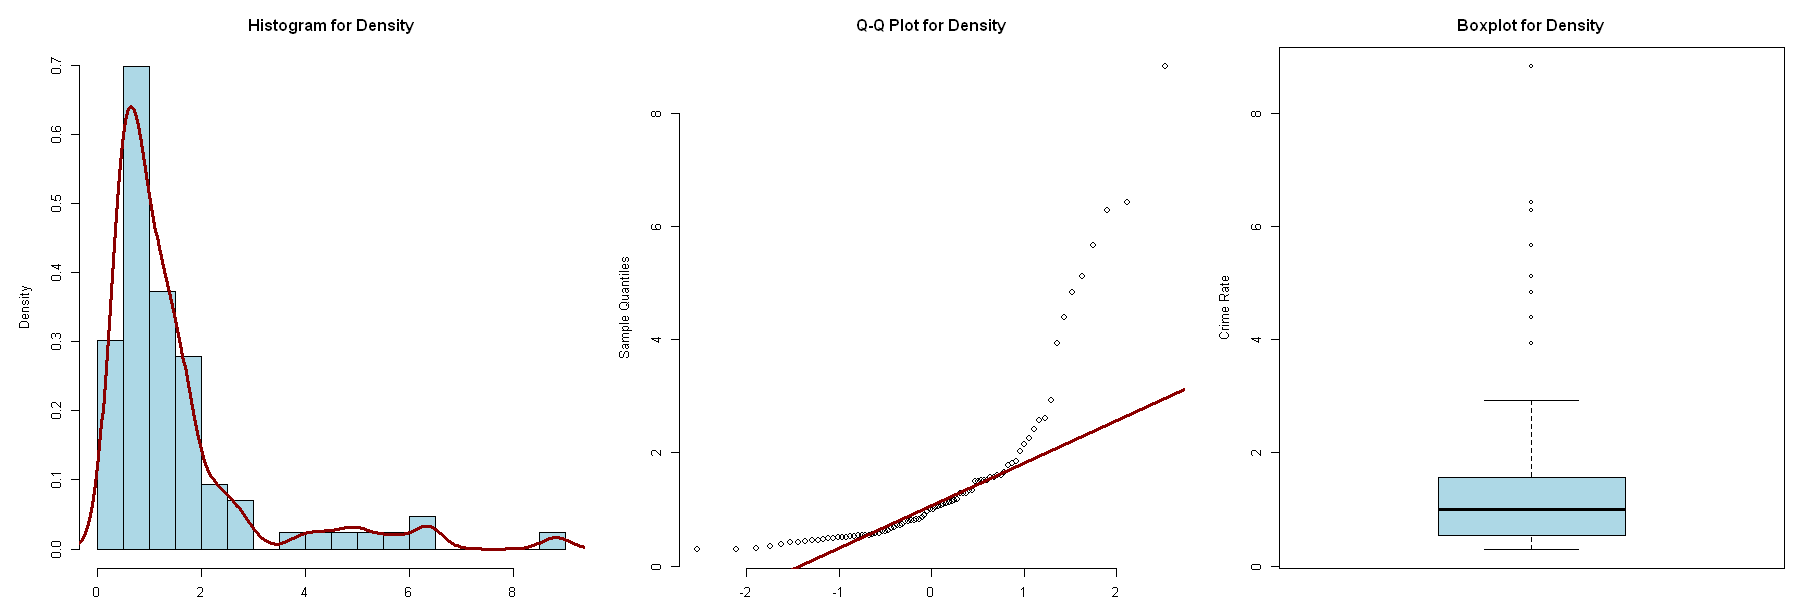

In [36]:
# Stat Summary
paste("Summary of density:")
(summary(filtered_df$density))

# plots
dep_var_plots(filtered_df$density, 'Density', 'lightblue')

#### Density Plot Discussion
- The probability of arrest histogram shows a significant positive skew in its distribution
- The QQ plot shows low normality only in the center, with divergence in the lower and especially in higher values
- There are quite a few values that are more positive, as shown in the histogram and boxplot

[1] "Summary of offence mix:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01961 0.08024 0.09938 0.12347 0.14601 0.46512 

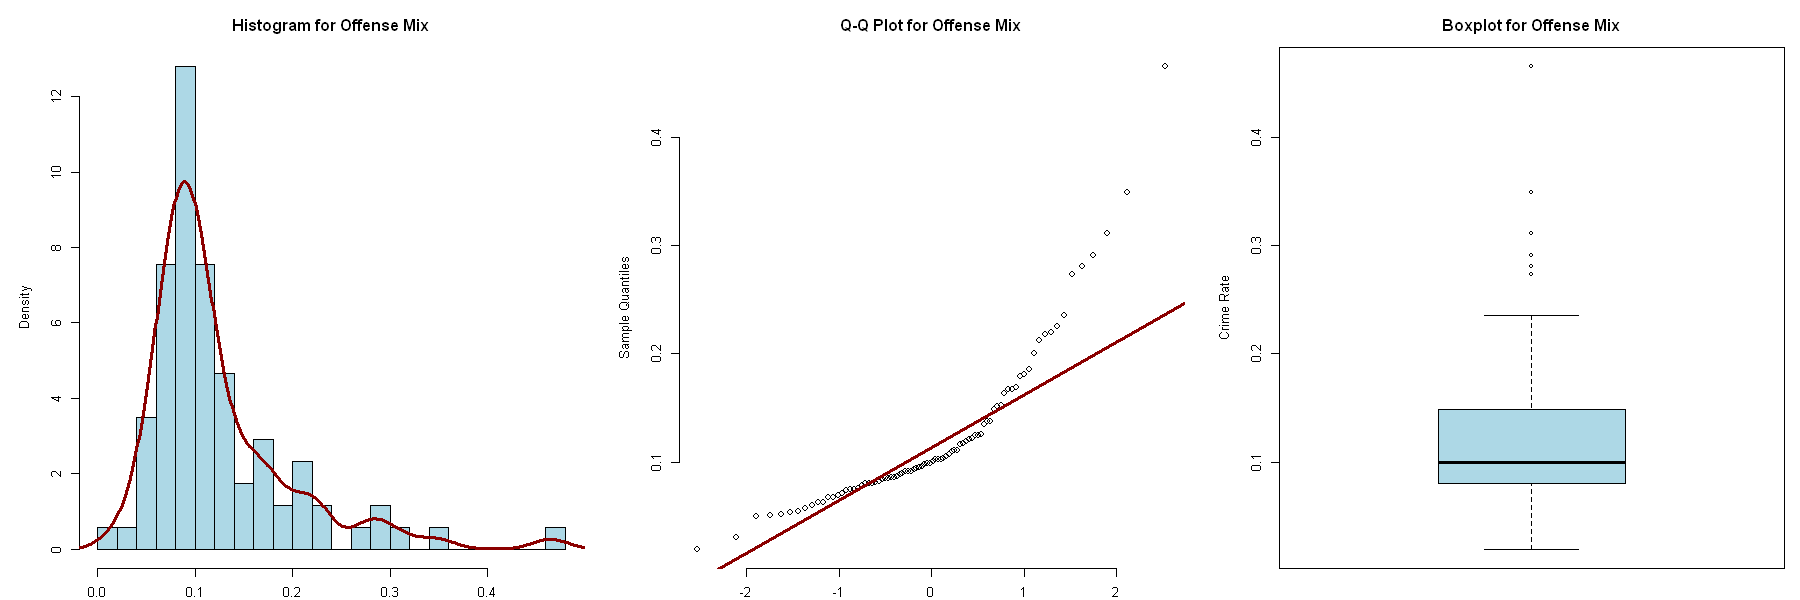

In [37]:
# Stat Summary
paste("Summary of offence mix:")
(summary(filtered_df$mix))

# plots
dep_var_plots(filtered_df$mix, 'Offense Mix', 'lightblue')

#### Offense Mix Plot Discussion
- The offence mix histogram shows a significant positive skew in its distribution
- The QQ plot it is not very normal
- There are quite a few values that are more positive, as shown in the histogram and boxplot

### Scatter plot matrices for independent variables

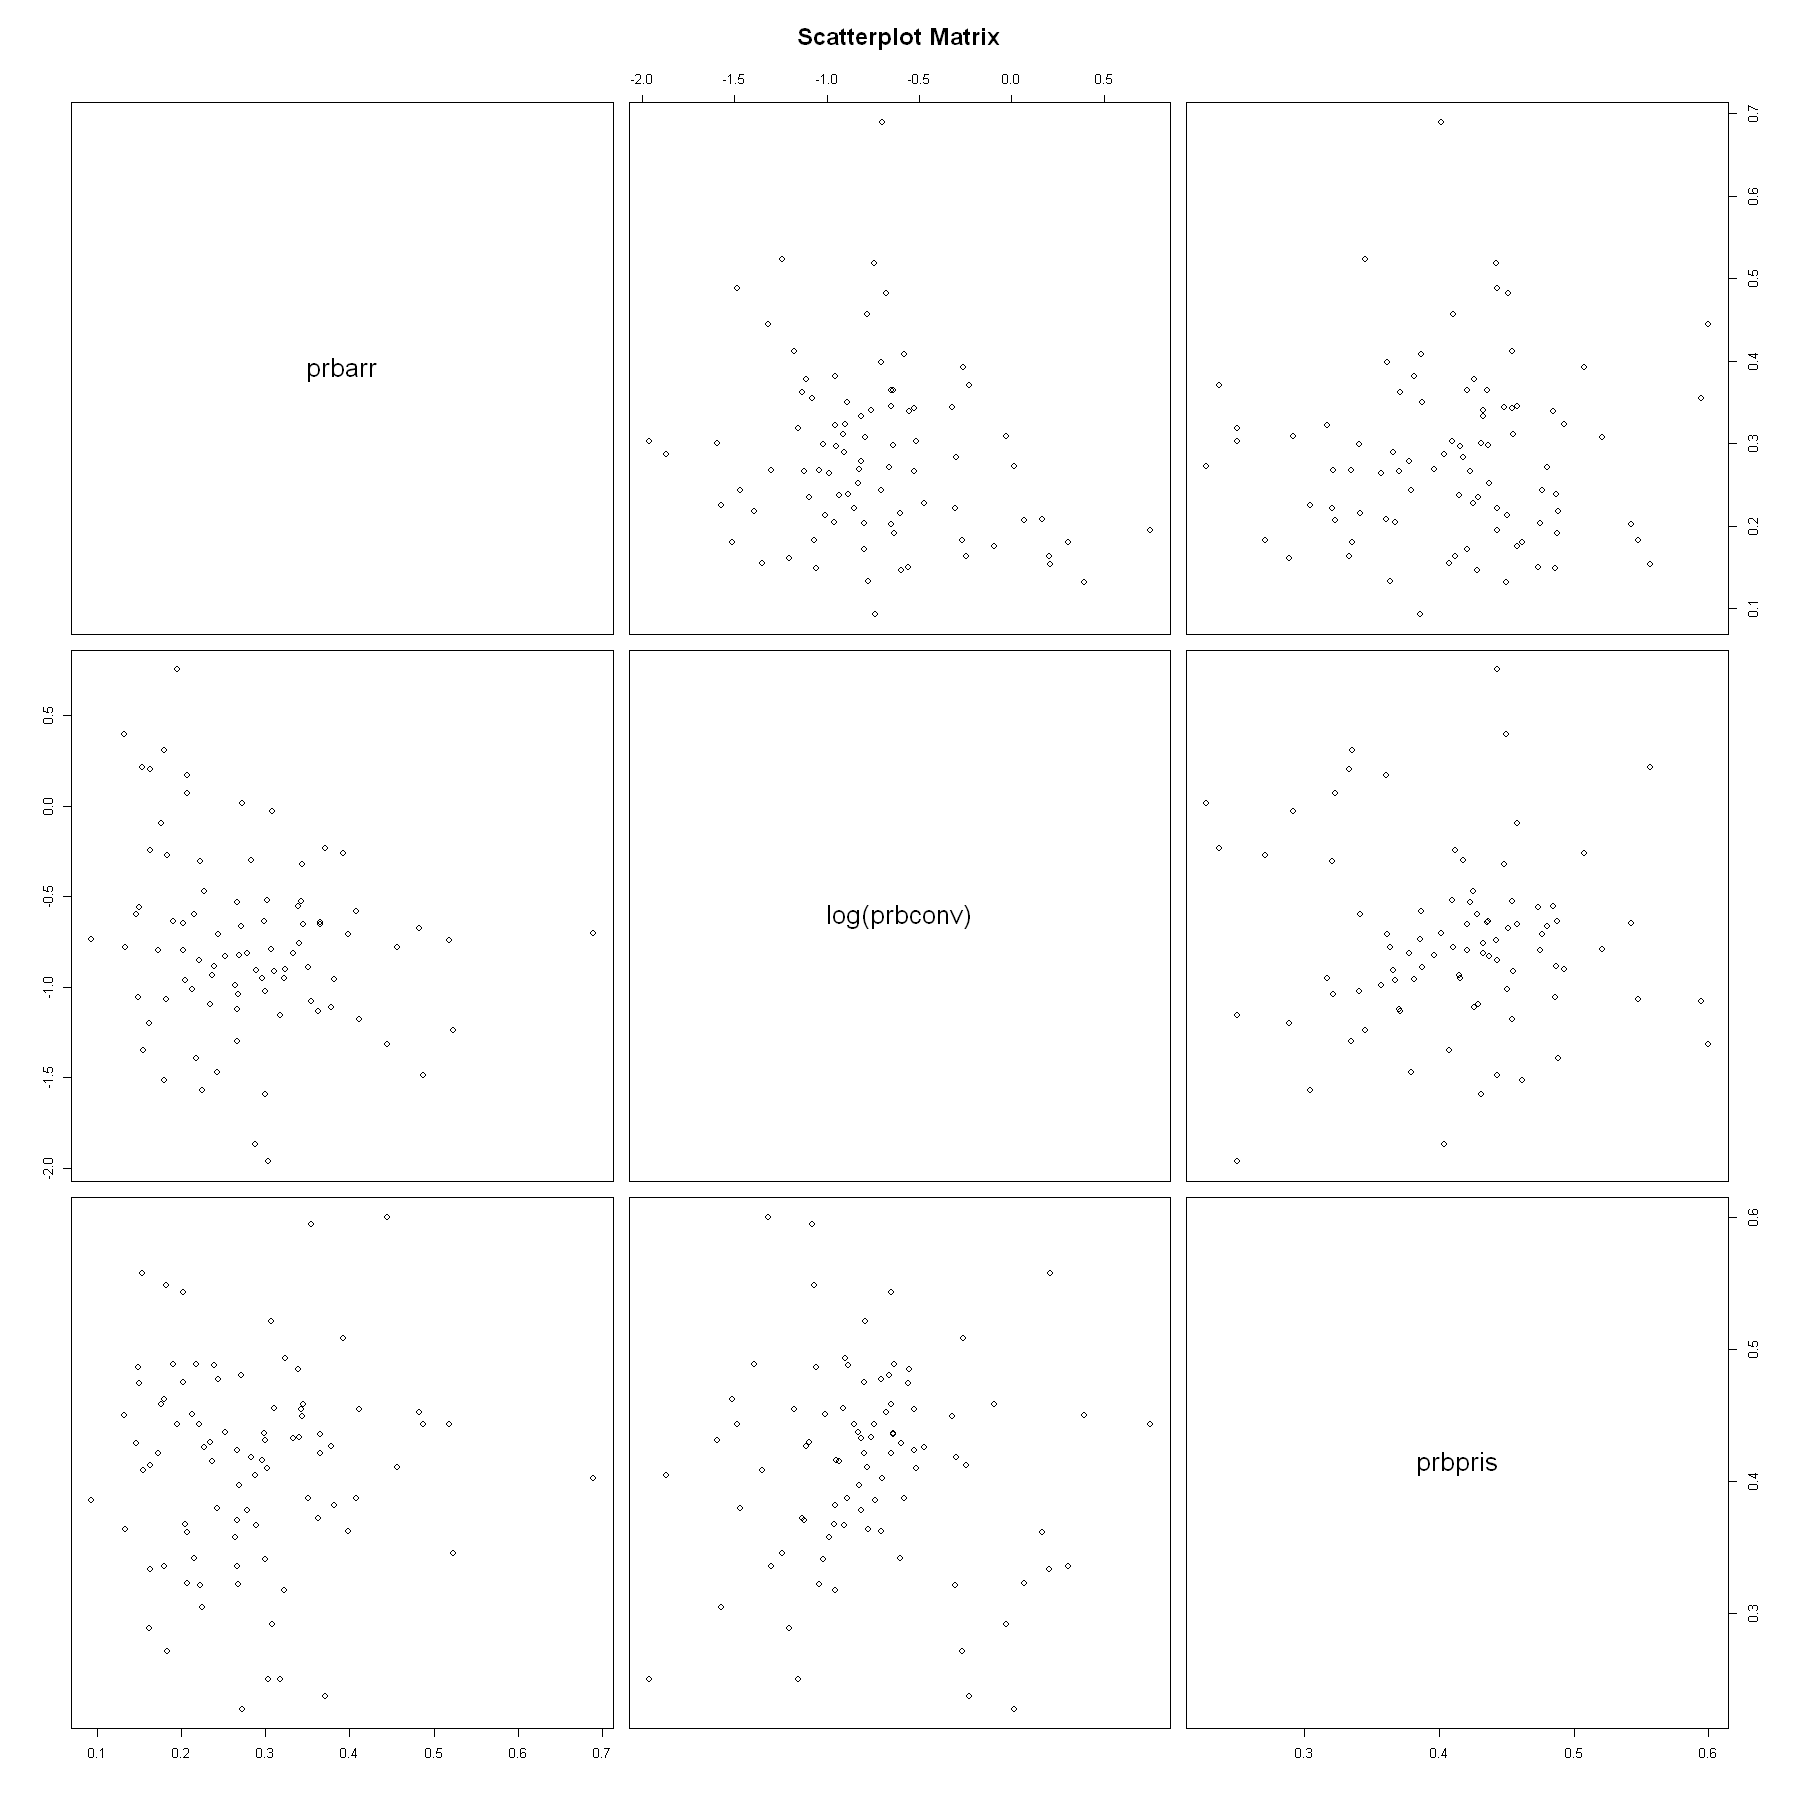

In [38]:
# Between the probabilities
options(repr.plot.width=15, repr.plot.height=15)
pairs(~prbarr+log(prbconv)+prbpris, data=filtered_df, main="Scatterplot Matrix")

# NEED TO ADD COMMENT ABOUT PLOTS

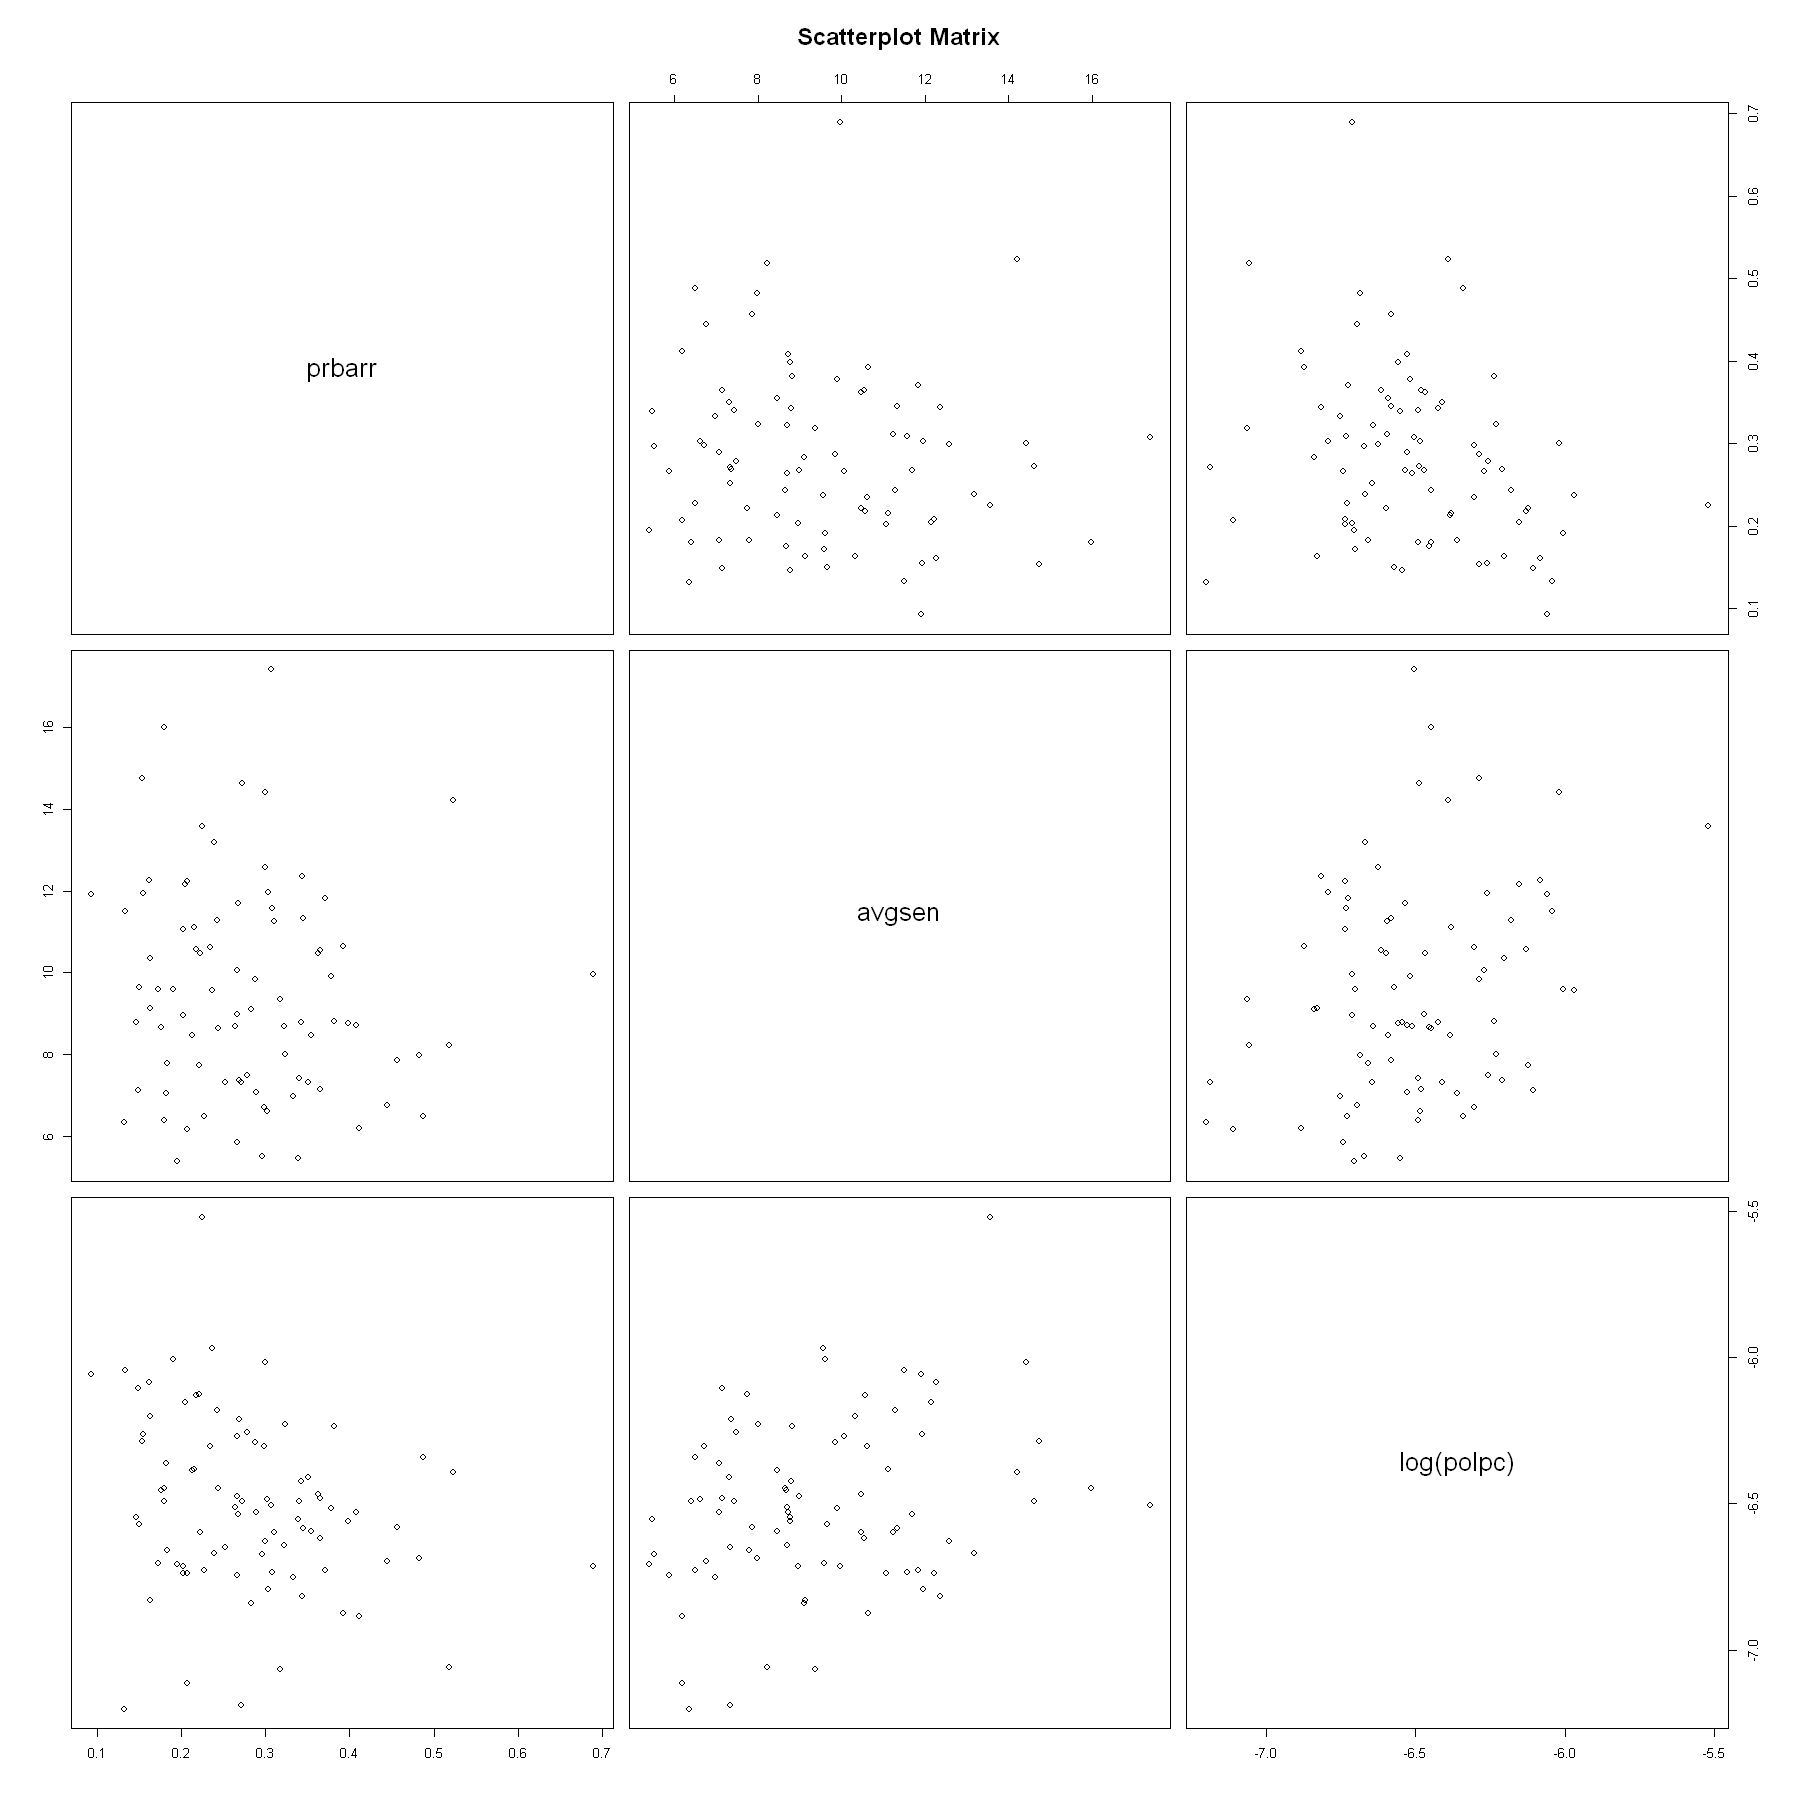

In [39]:
# Between the prob of arrest, average sentence, police per capita and density 
pairs(~prbarr + avgsen + log(polpc), data=filtered_df, main="Scatterplot Matrix")

# NEED TO ADD COMMENT ABOUT PLOTS

## 2. A Model Building Process

You will next build a set of models to investigate your research question, documenting your decisions.  Here are some things to keep in mind during your model building process:

1. What do you want to measure?  Make sure you identify one, or a few, variables that will allow you to derive conclusions relevant to the political campaign, and include those variables in all model specifications.

2. What covariates help you correctly and accurately measure a causal effect?  What covariates are problematic, either due to multicollinearity, or because they will absorb some of a causal effect you want to measure?

3. What transformations should you apply to each variable?  This is very important because transformations can reveal linearities in the data, make our results relevant, or help us meet model assumptions.

4. Are your choices supported by EDA?  You will likely start with some general EDA to detect anomalies (missing values, top-coded variables, etc.).  From then on, your EDA should be interspersed with your model building.  Use visual tools to guide your decisions.  You can also leverage statistical tests to help assess whether variables, or groups of variables, are improving model fit.

At the same time, it is important to remember that you are not trying to create one perfect model.  You will create several specifications, giving the reader a sense of how robust your results are (how sensitive to modeling choices), and to show that you're not just cherry-picking the specification that leads to the largest effects.

At a minimum, you should include the following three specifications:

- One model with only the key variables you want to measure (possibly transformed, as determined by your EDA), and no other covariates (or perhaps one or at more two covariates if they are so crucial that it would be unreasonable to omit them)

- One model that includes key explanatory variables and covariates that you believe advance your modeling goals without introducing too much multicollinearity or causing other issues.  This model should strike a balance between accuracy and parsimony and reflect your best understanding of the relationships among key variables.

- One model that includes the previous covariates, and most, if not all, other covariates.  A key purpose of this model is to demonstrate the robustness of your results to model specification.  (However, you should still not include variables that are clearly unreasonable.  For example, don't include outcome variables that will absorb some of the causal effect you are interested in measuring)

Guided by your background knowledge and your EDA, other specifications may make sense.  You are trying to choose points that encircle the space of reasonable modeling choices, to give an overall understanding of how these choices impact results.

## II. Model Building

### Model 1: Base Model
> ### option1: crime rate ~ probability of arrest

The focus of this model is to identify whether the risk of being caught acts as a deterrent to crime. That is, would crime rate decrease given an increased probability of caught and punished. To establish this, we look at the following variables and assess their relationship with crime rate:
- probability of arrest (prbarr)
- probability of conviction (prbconv)
- probability of prison sentence (prbpris)


Call:
lm(formula = crmrte ~ prbarr, data = filtered_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.029023 -0.010810 -0.002033  0.006297  0.056088 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.052517   0.005534   9.490 6.14e-15 ***
prbarr      -0.064652   0.018442  -3.506 0.000733 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0177 on 84 degrees of freedom
Multiple R-squared:  0.1276,	Adjusted R-squared:  0.1173 
F-statistic: 12.29 on 1 and 84 DF,  p-value: 0.0007333


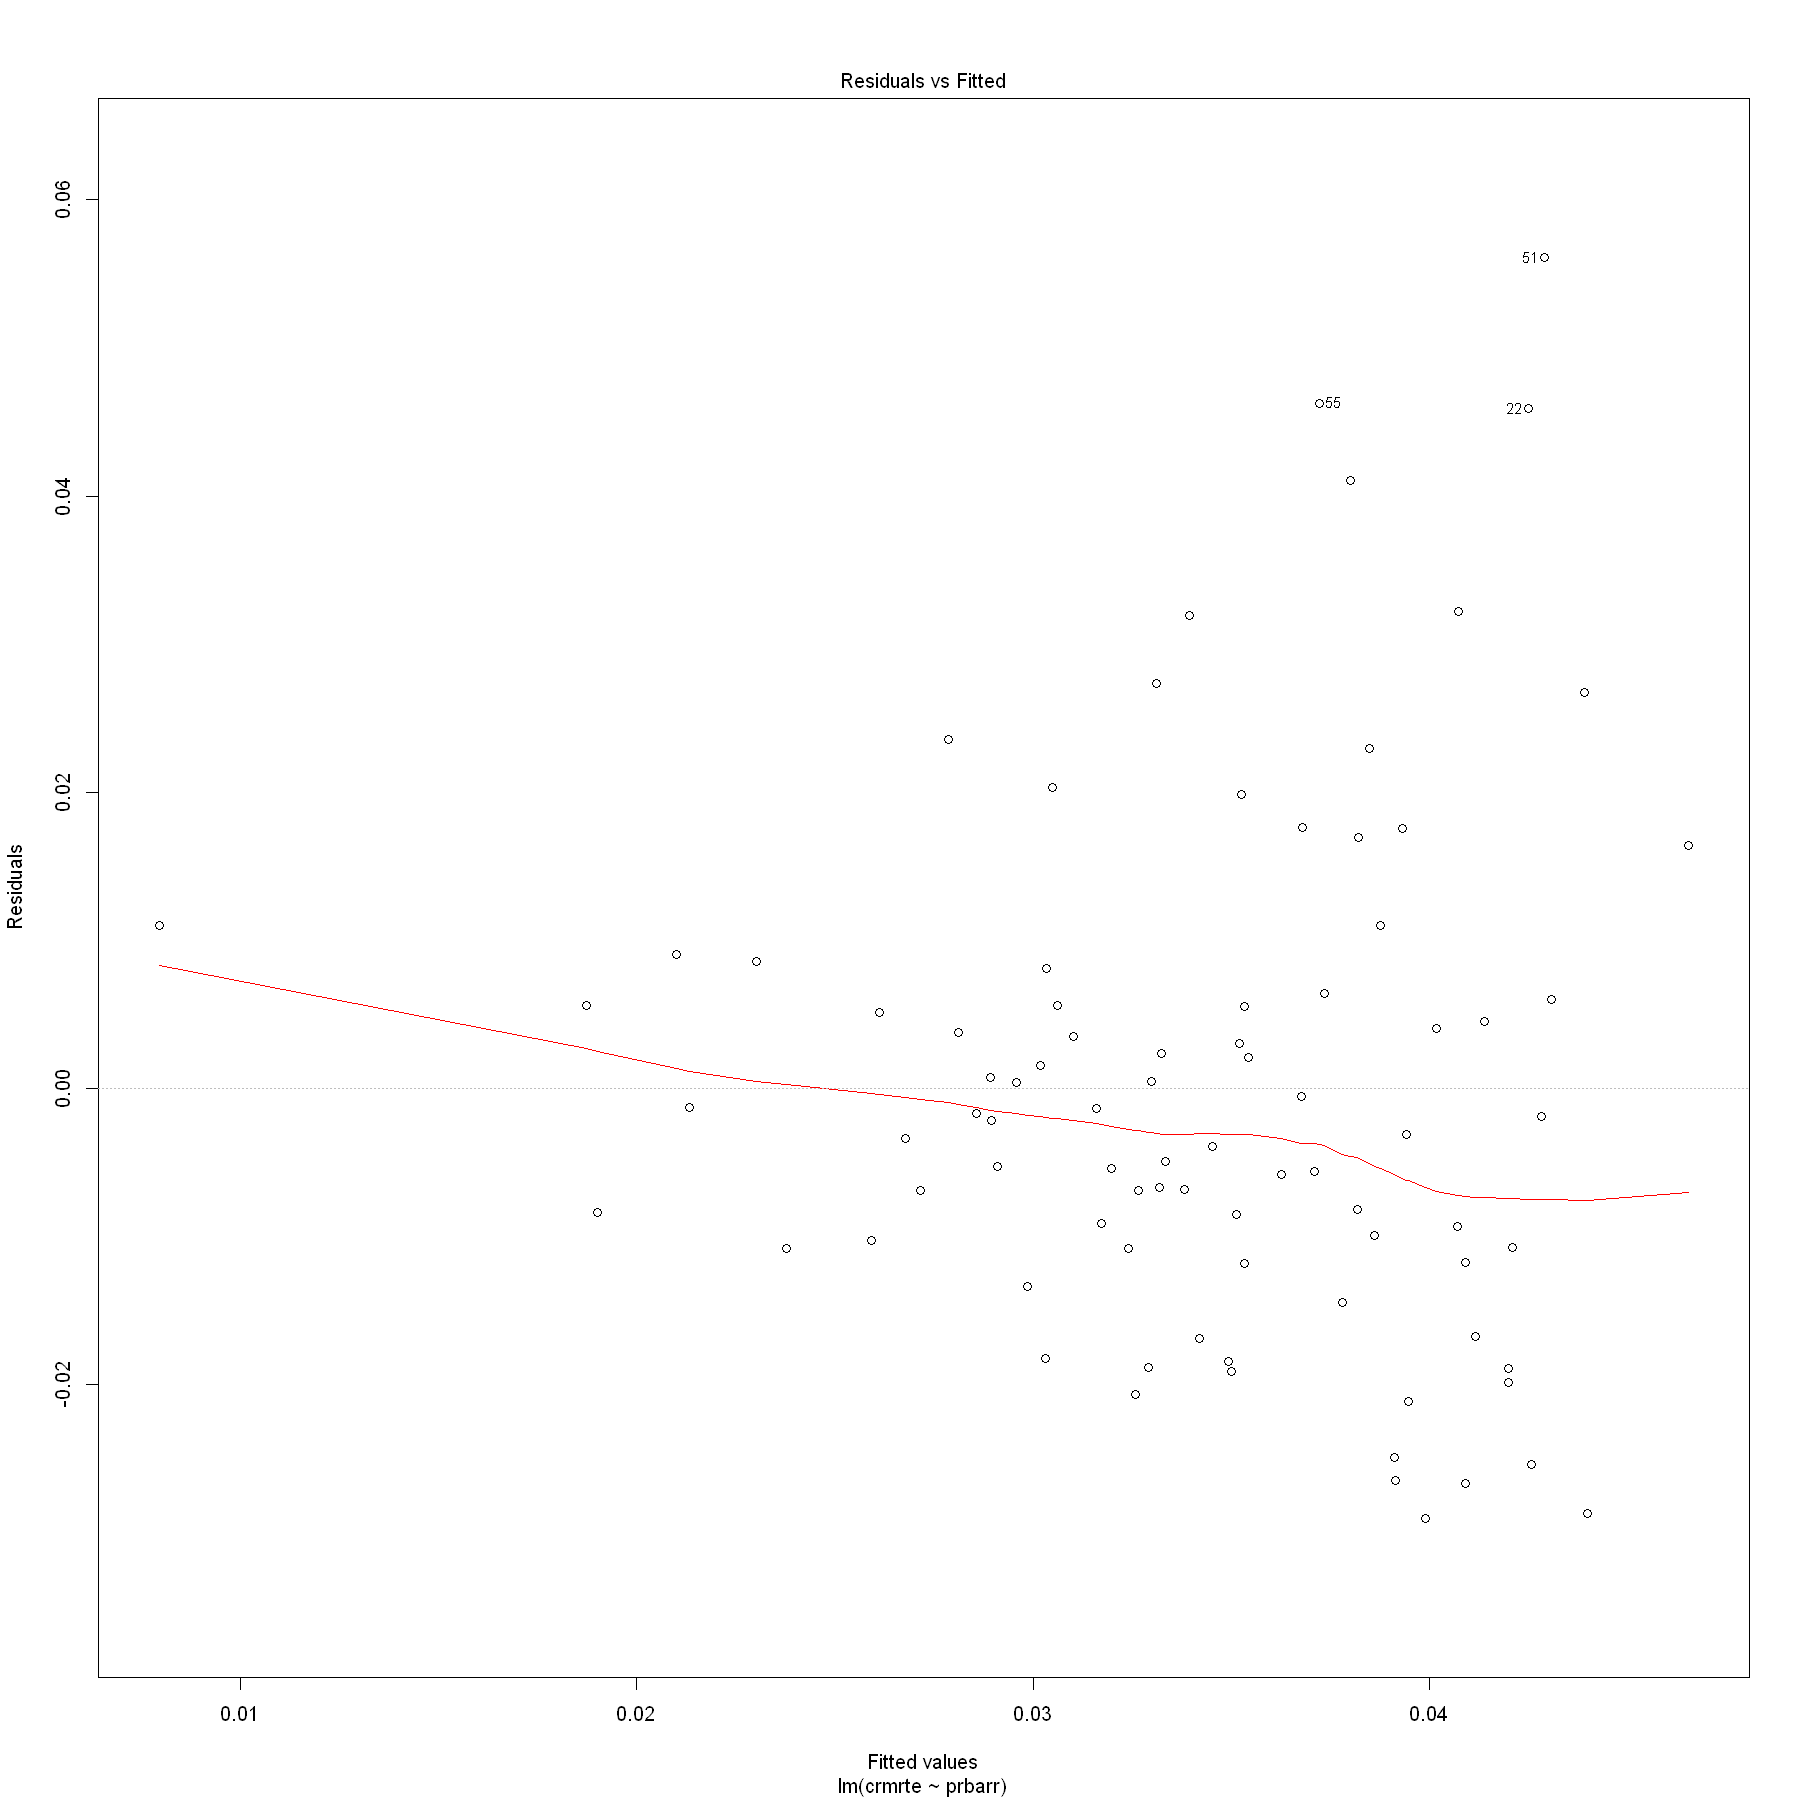

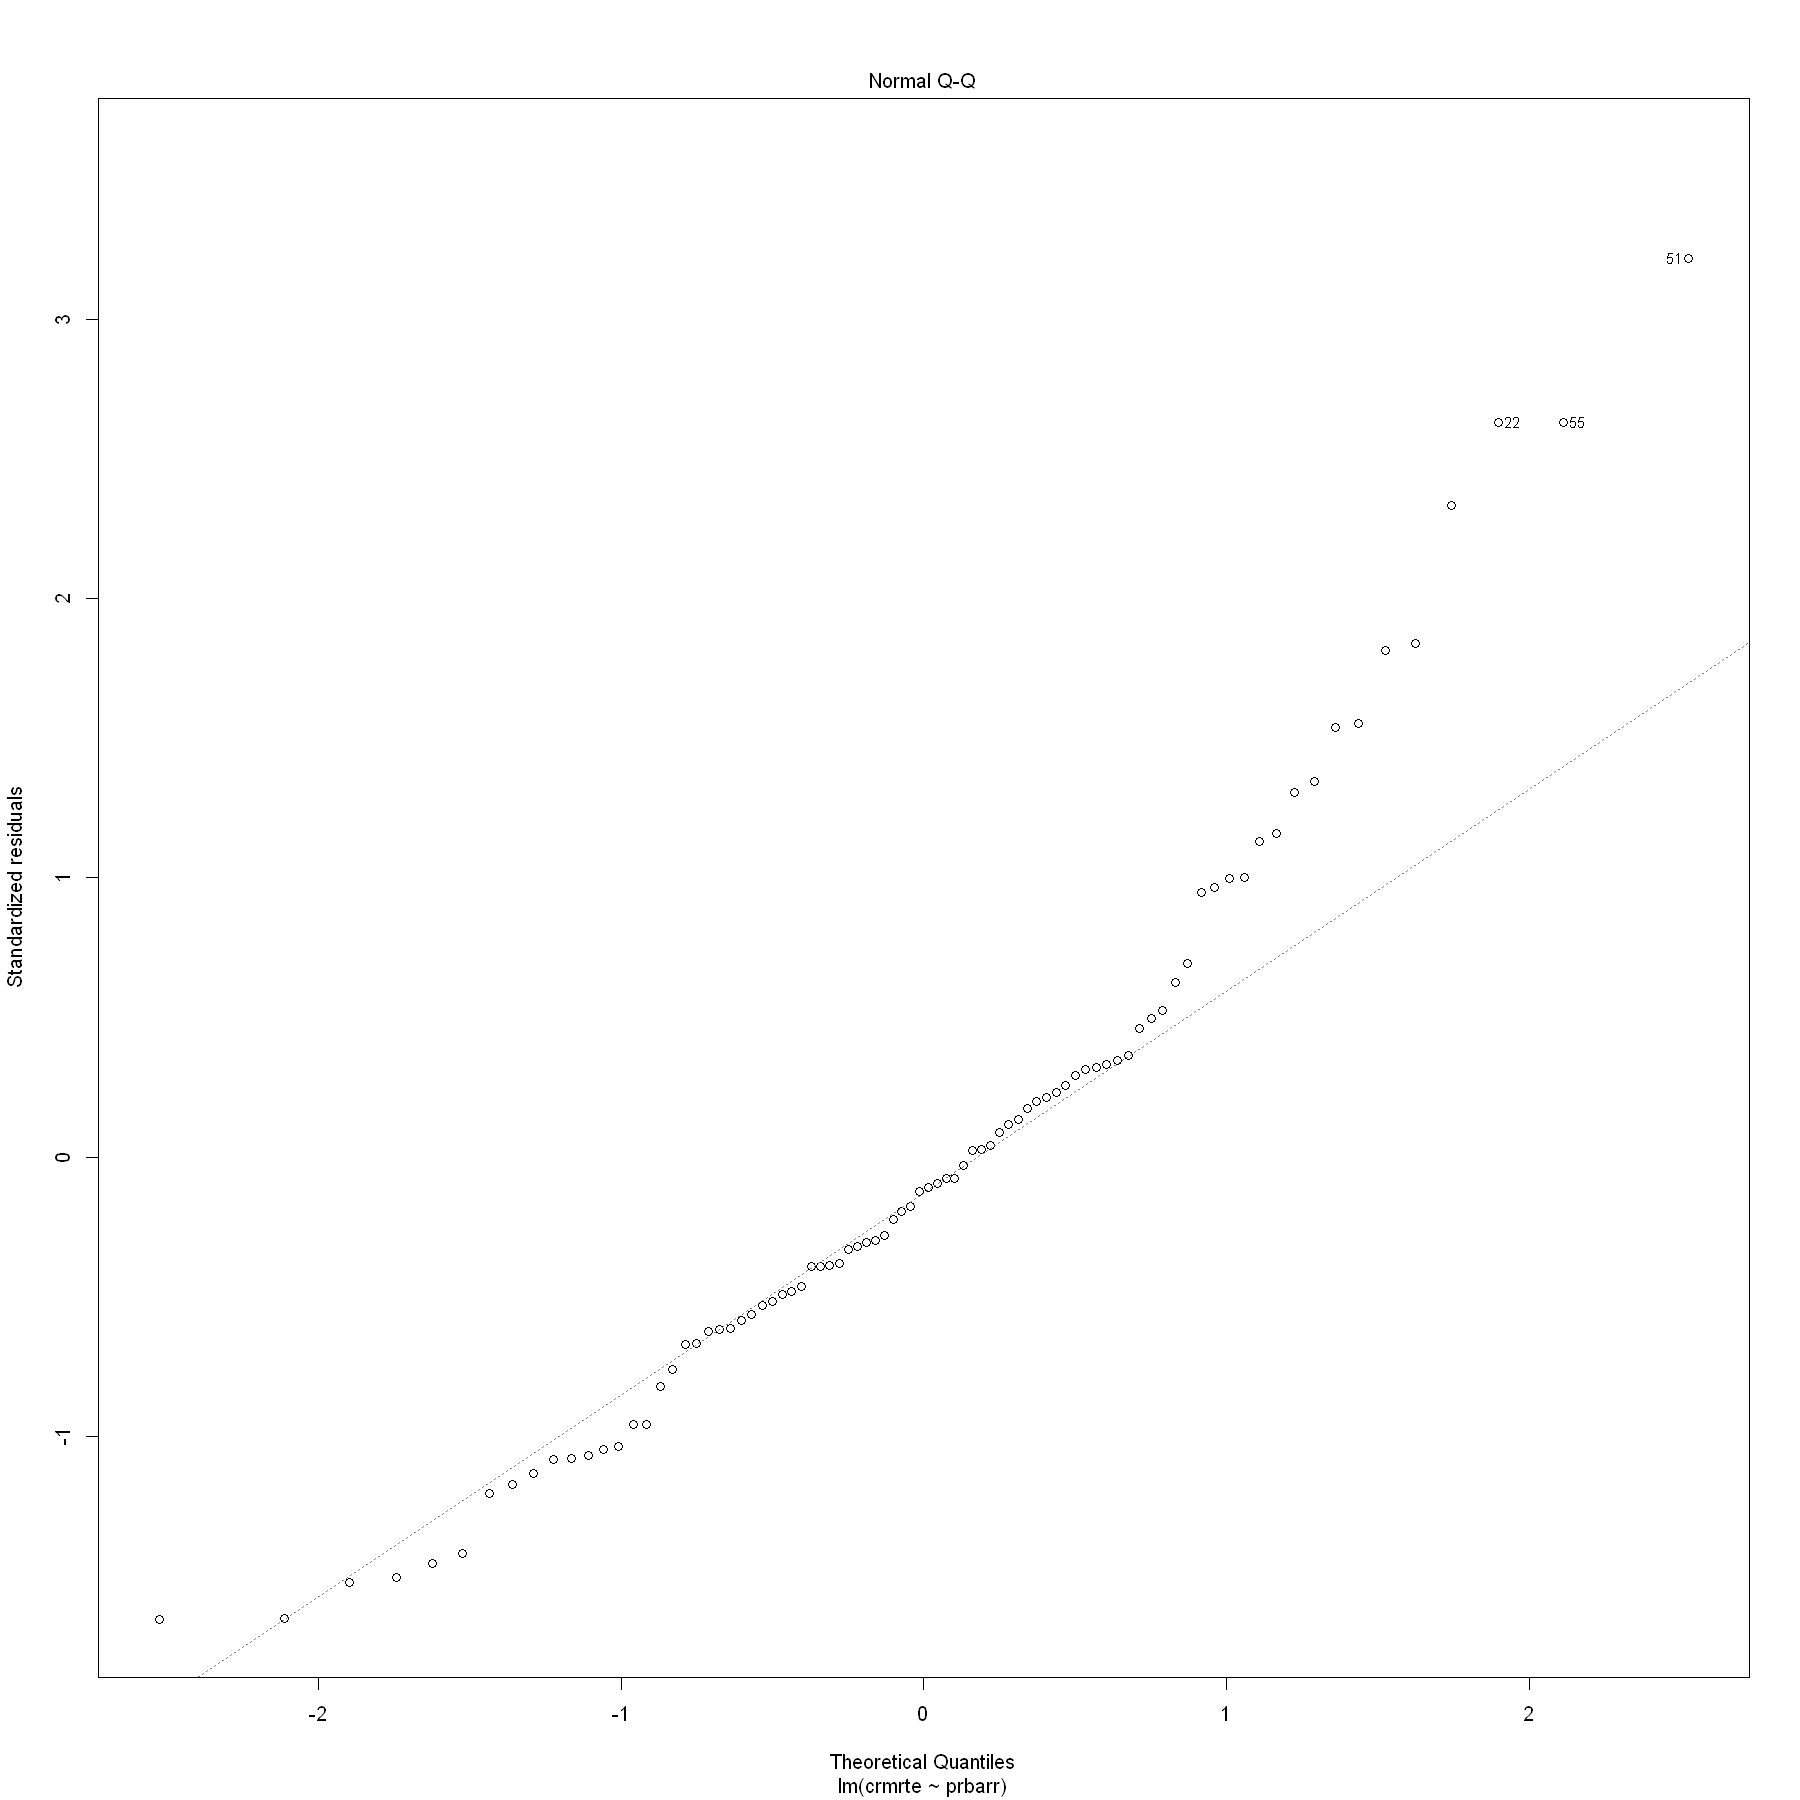

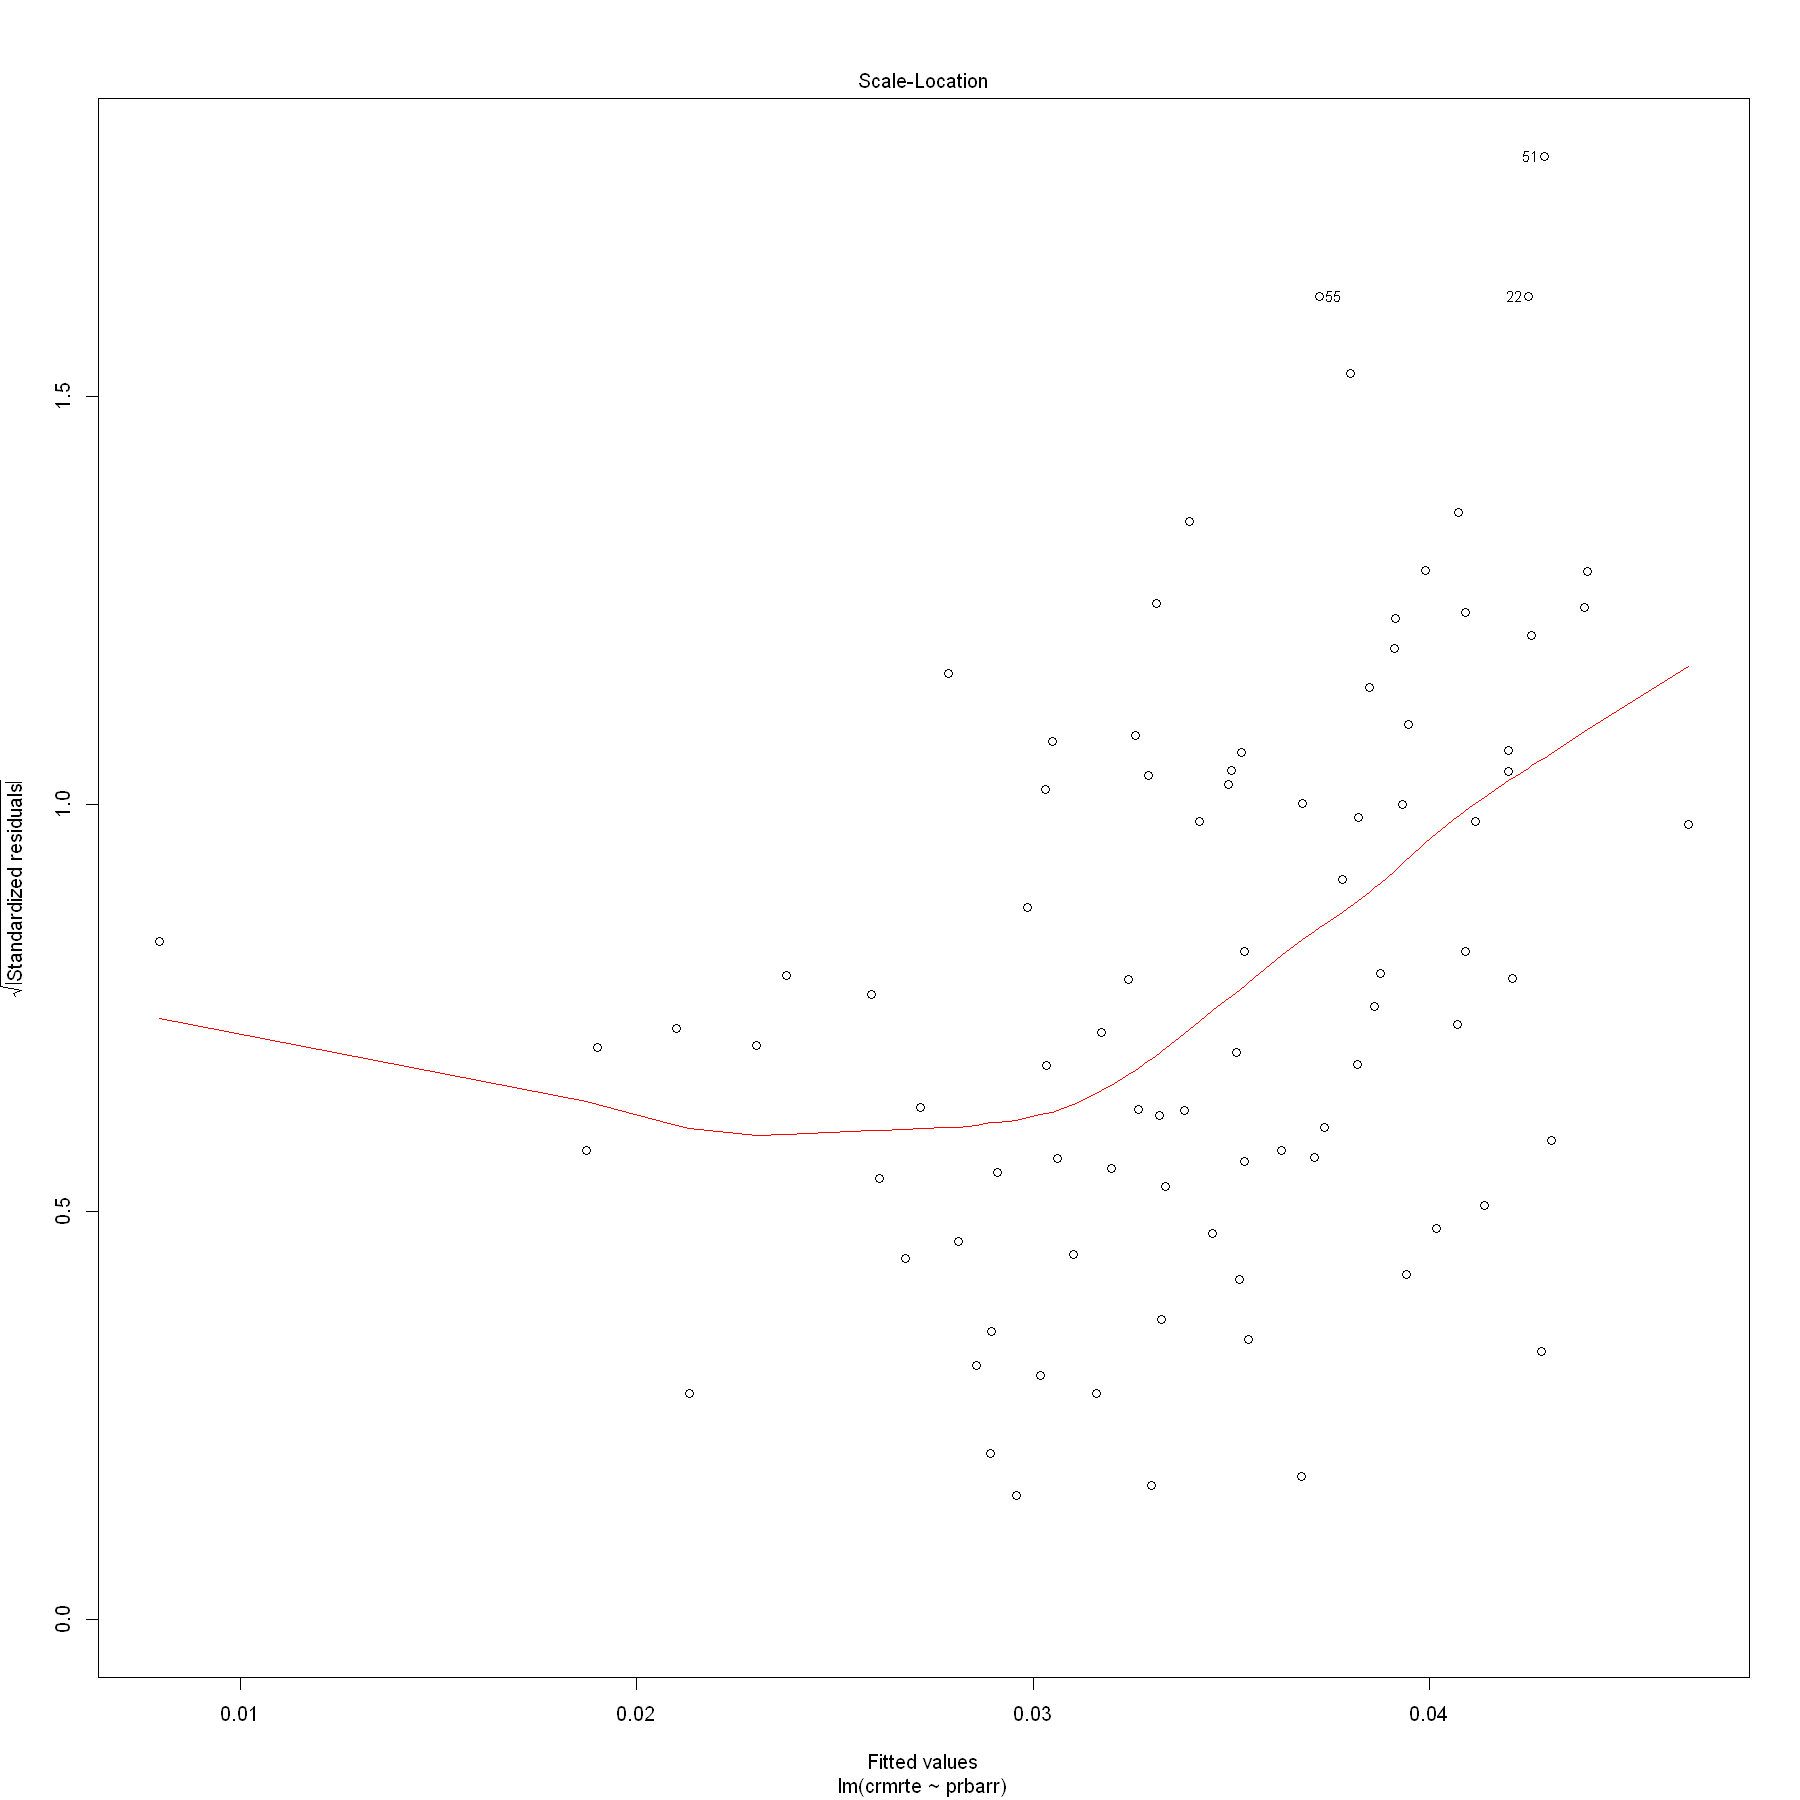

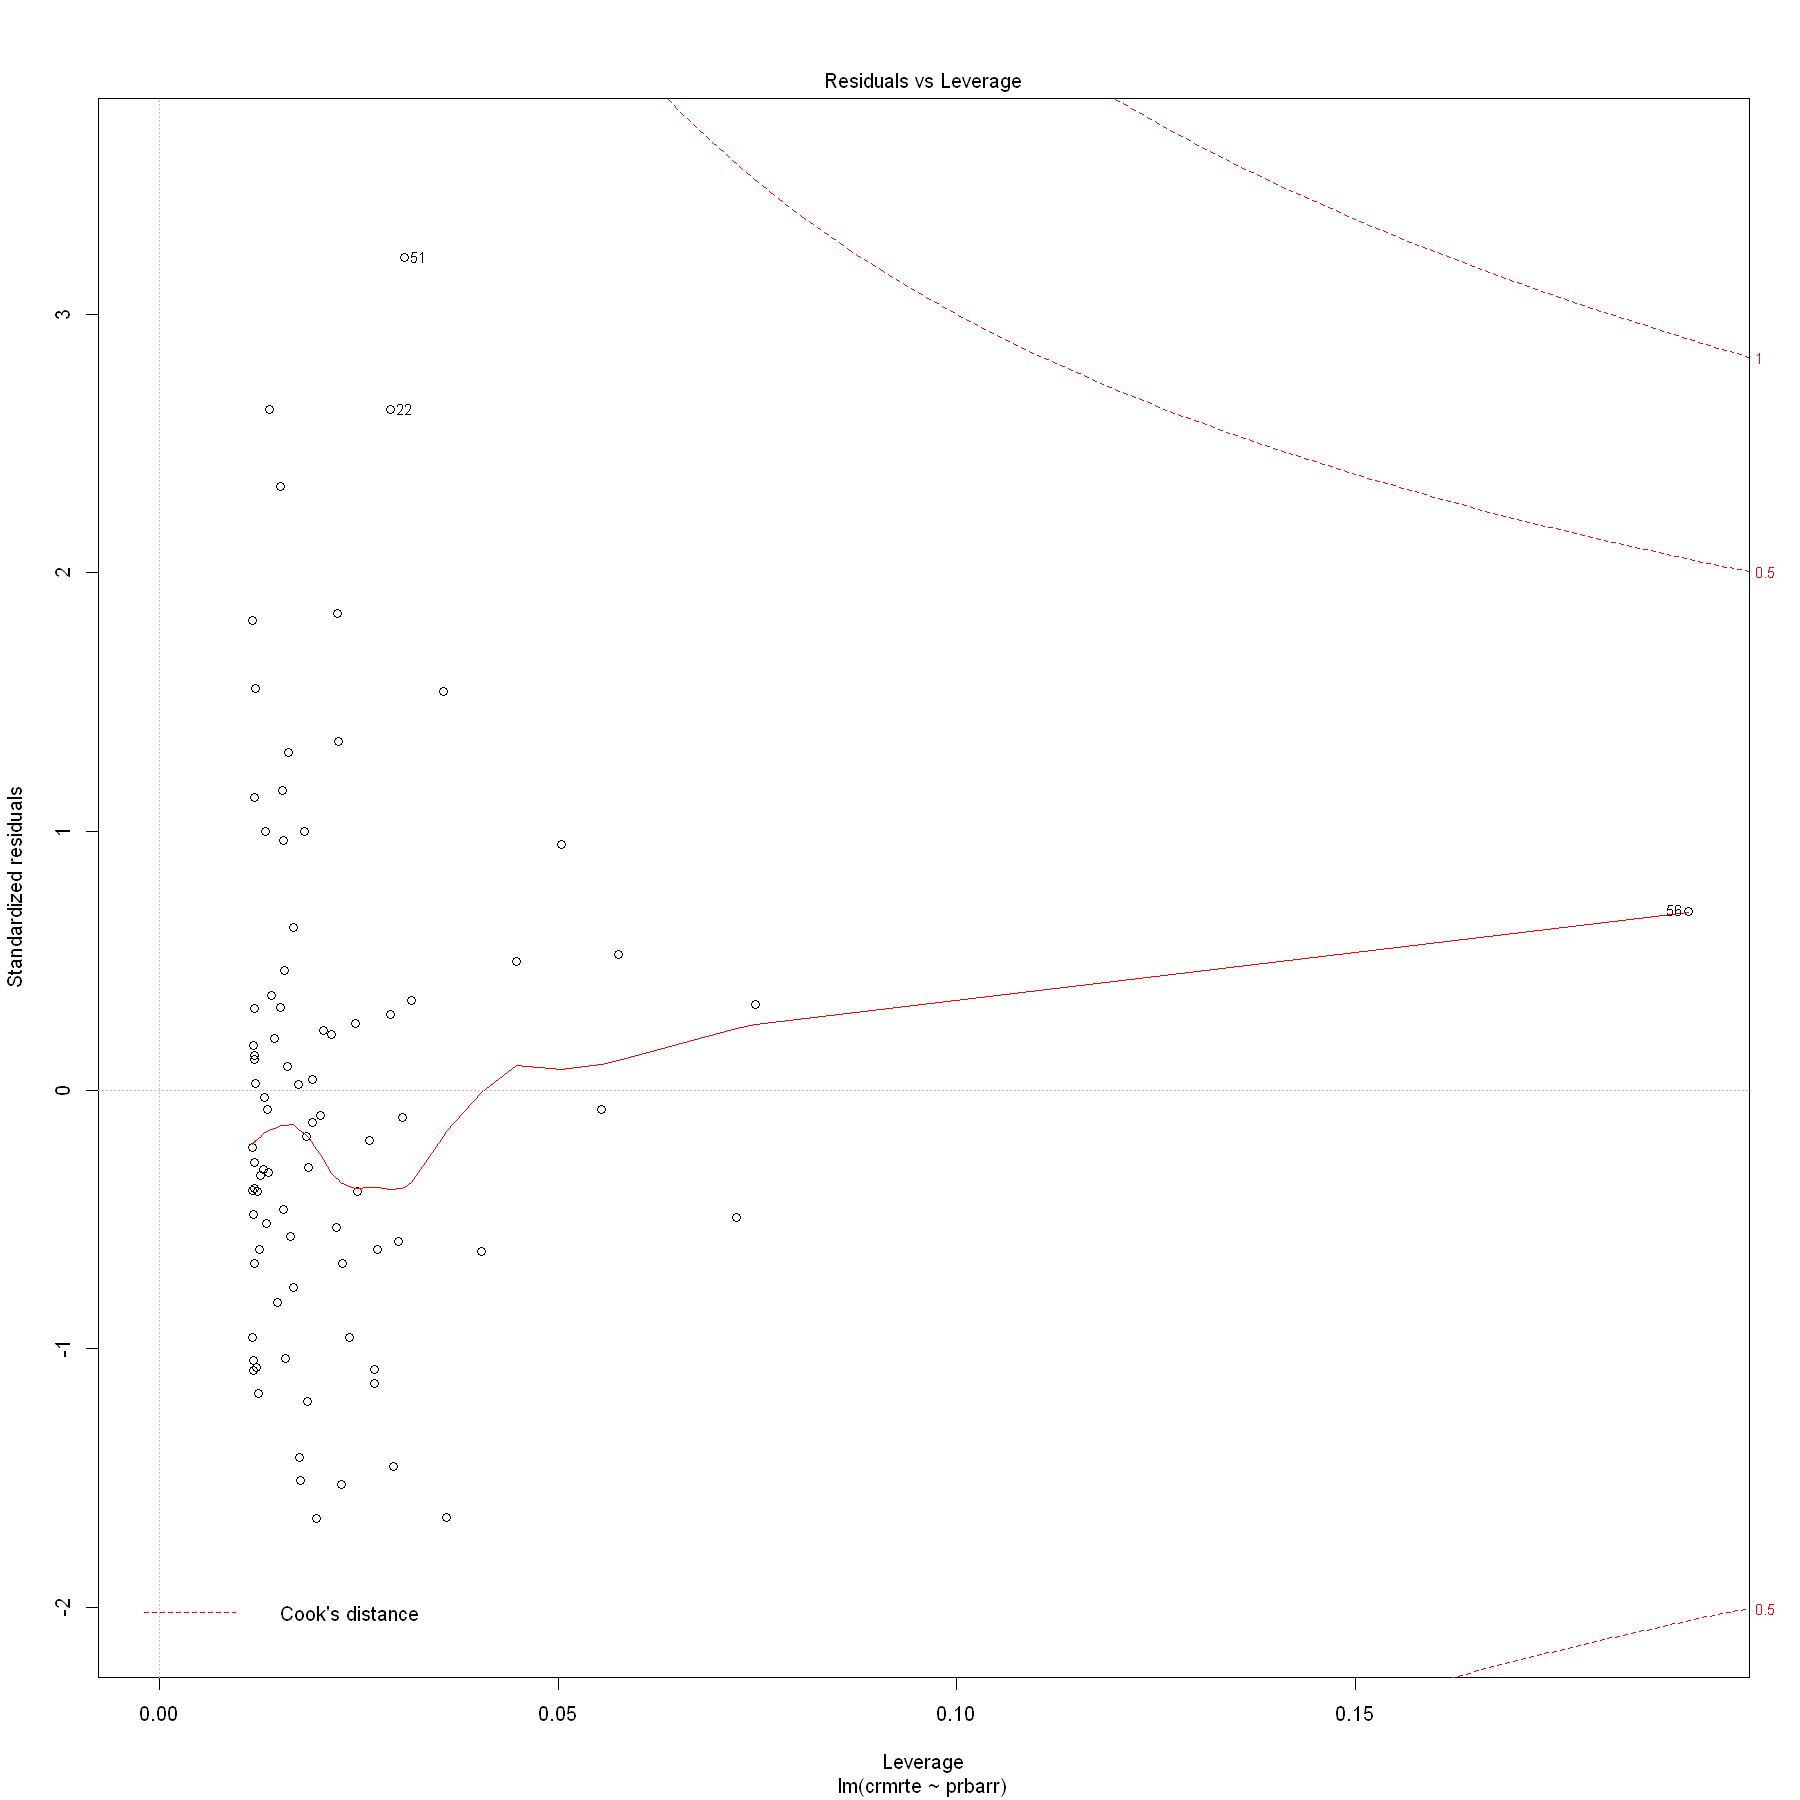

In [40]:
model1 = lm(crmrte ~ prbarr, data = filtered_df)
summary(model1)
plot(model1)


Call:
lm(formula = log(crmrte) ~ prbarr, data = filtered_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1541 -0.2785  0.0267  0.2834  0.9802 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.0528     0.1547 -19.738  < 2e-16 ***
prbarr       -1.6125     0.5154  -3.129  0.00241 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4947 on 84 degrees of freedom
Multiple R-squared:  0.1044,	Adjusted R-squared:  0.0937 
F-statistic: 9.788 on 1 and 84 DF,  p-value: 0.002415


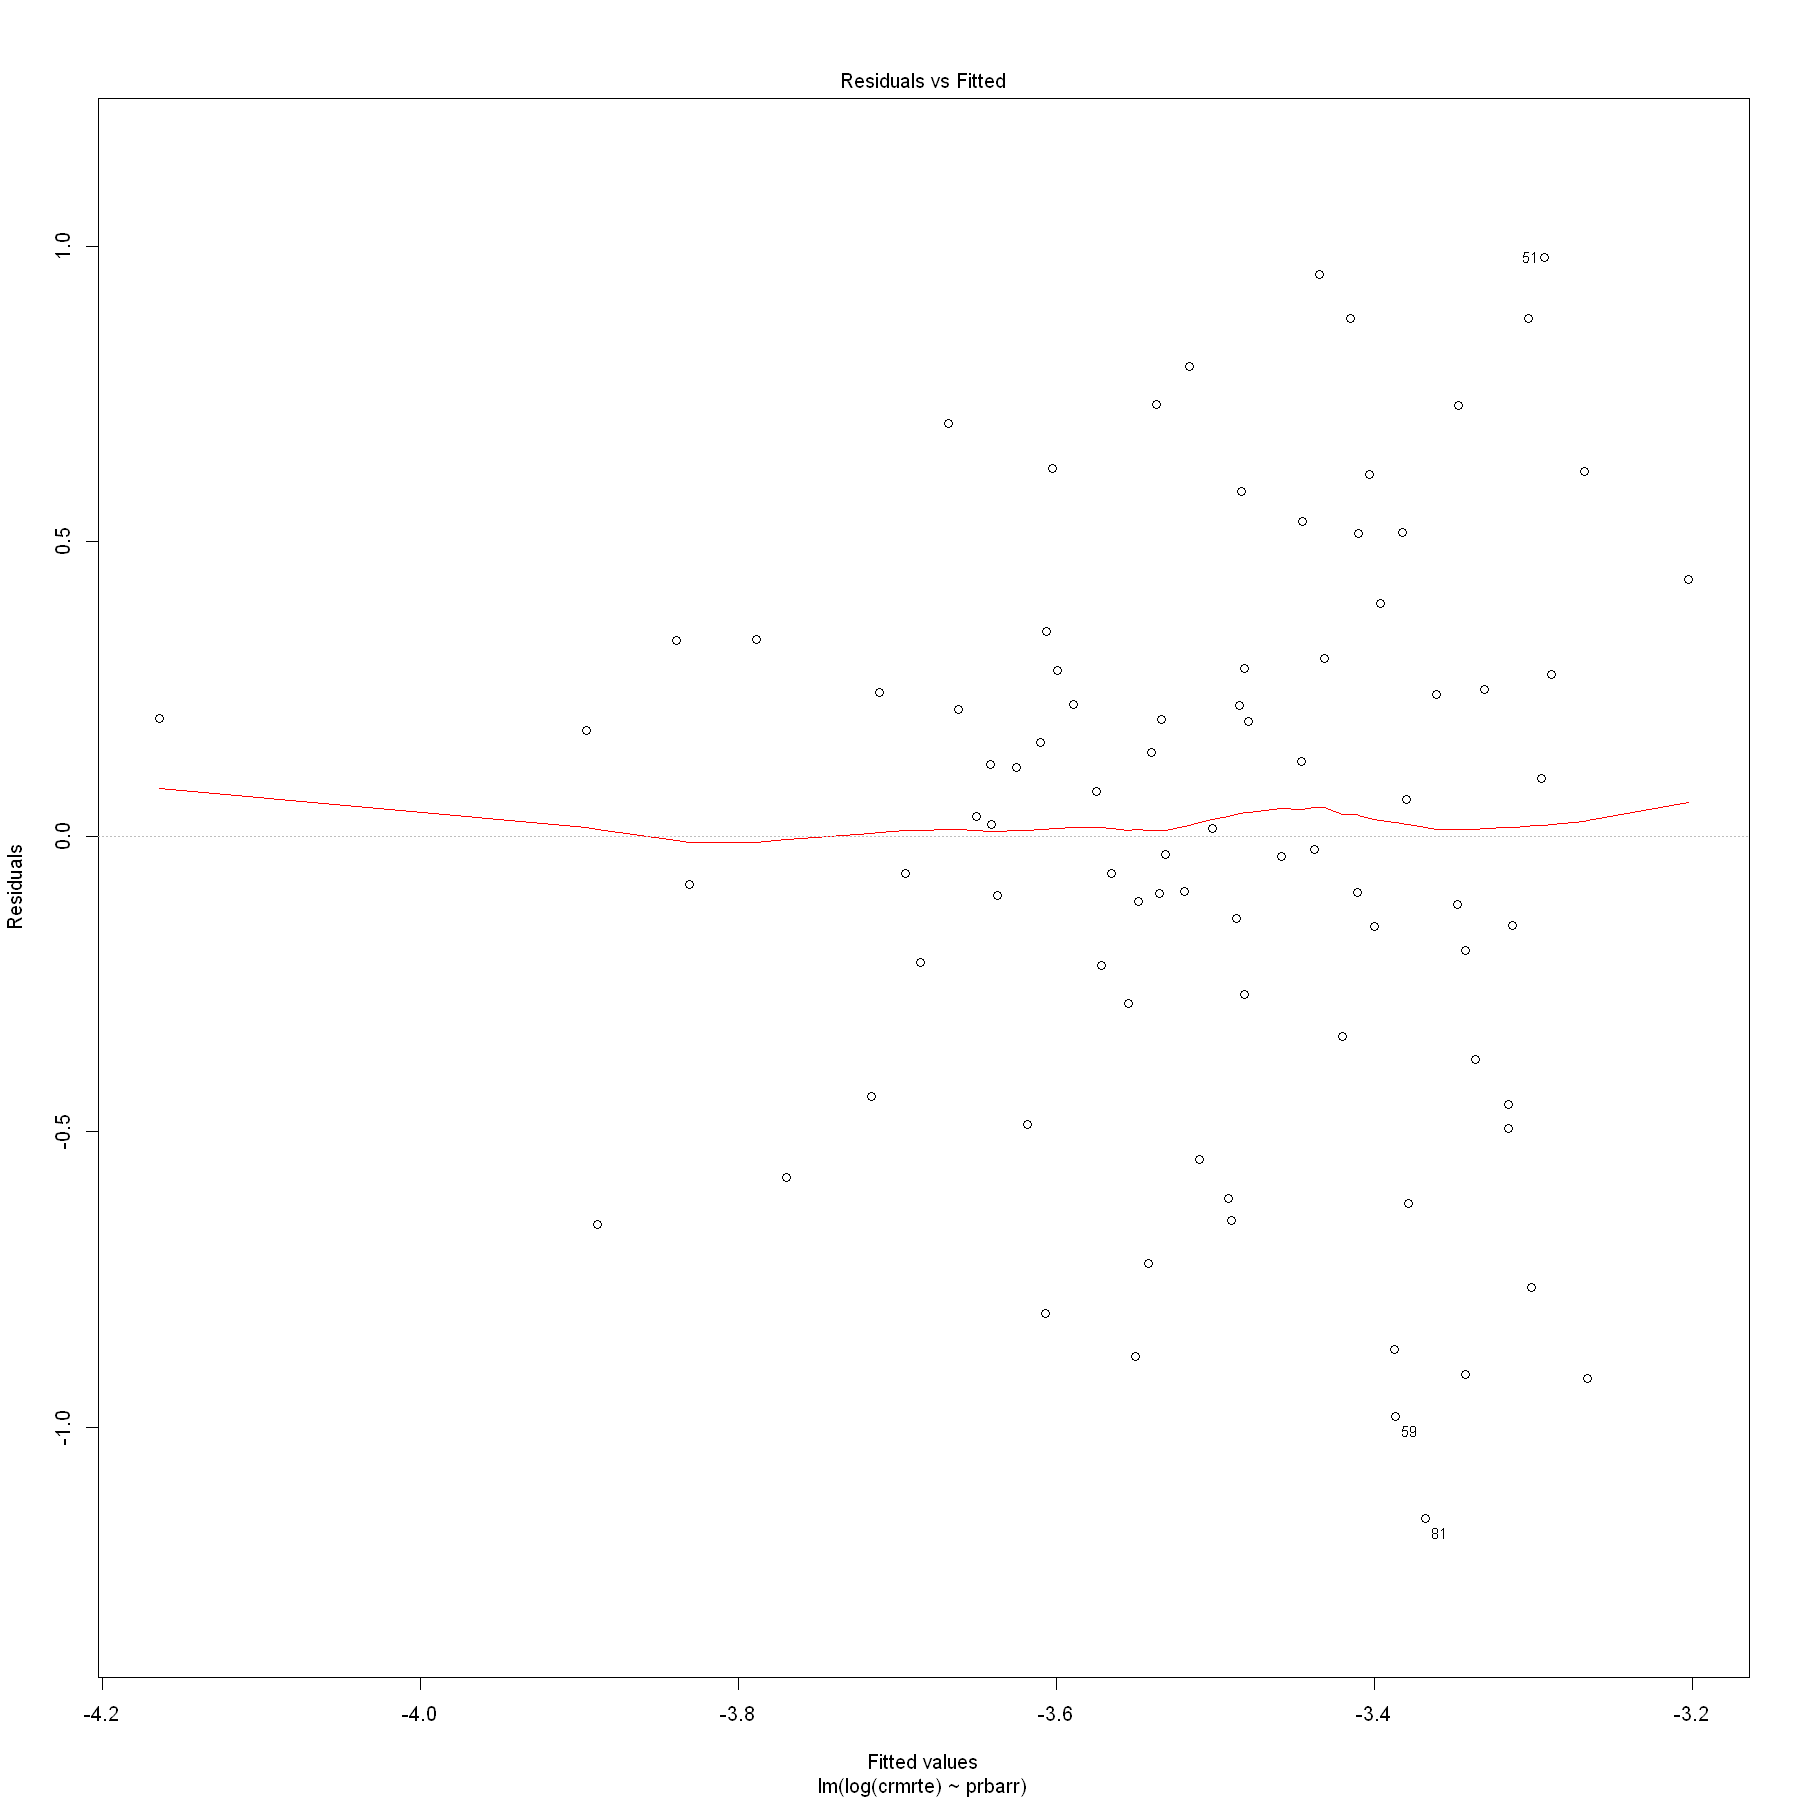

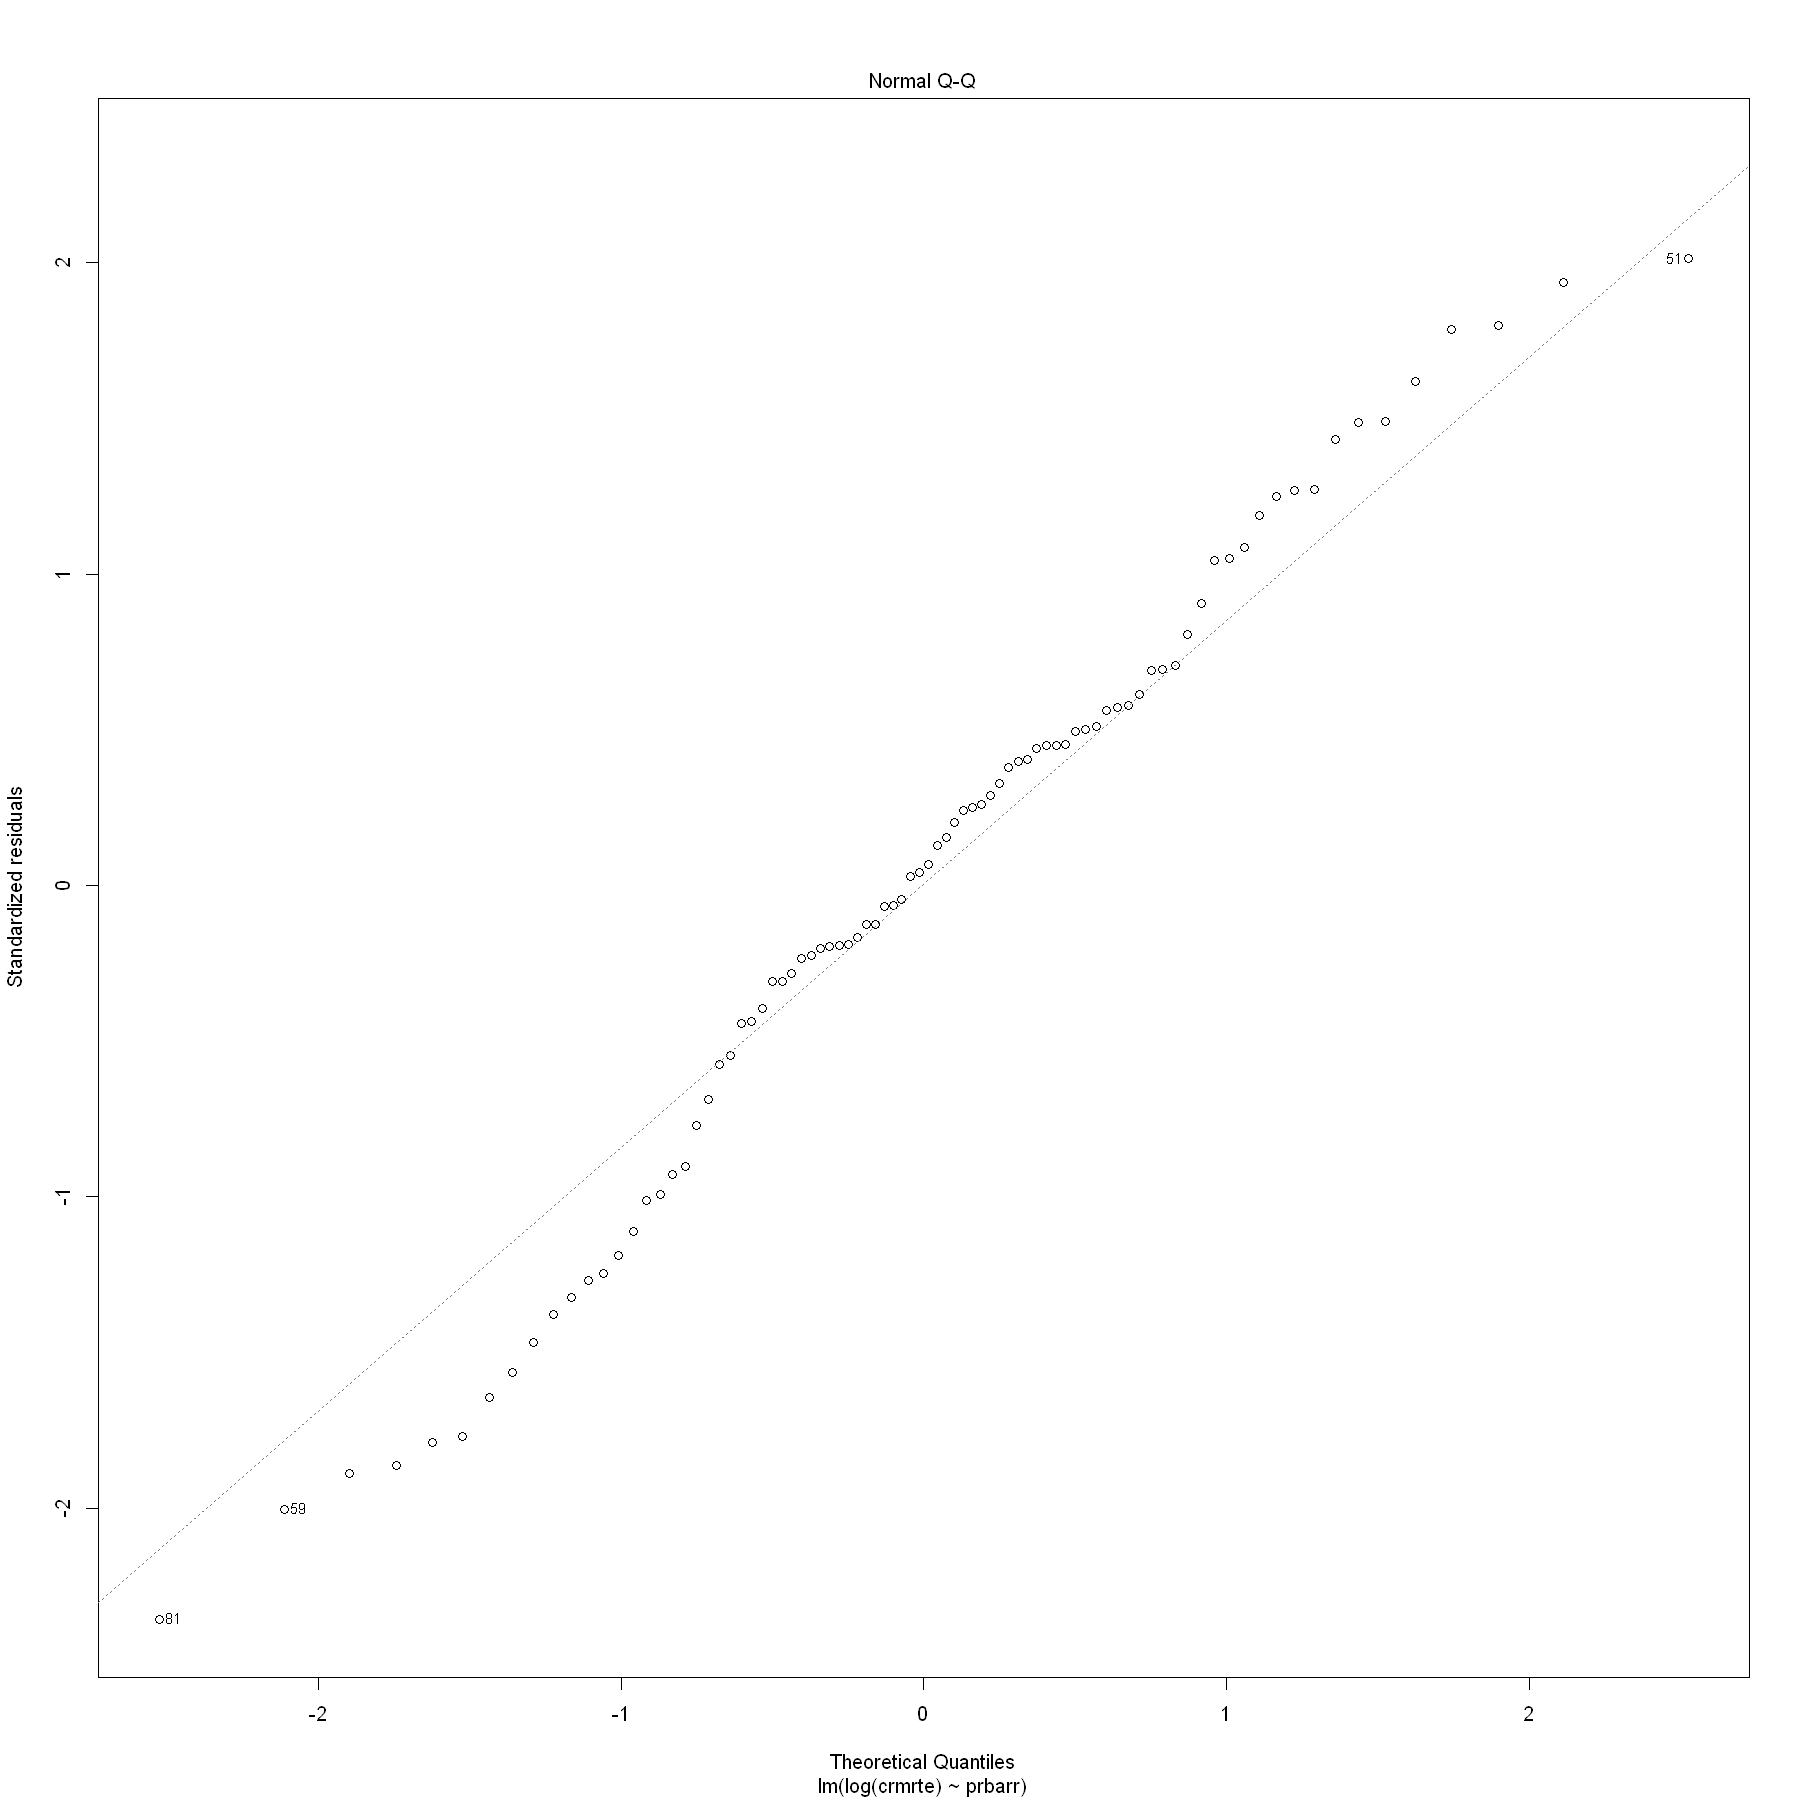

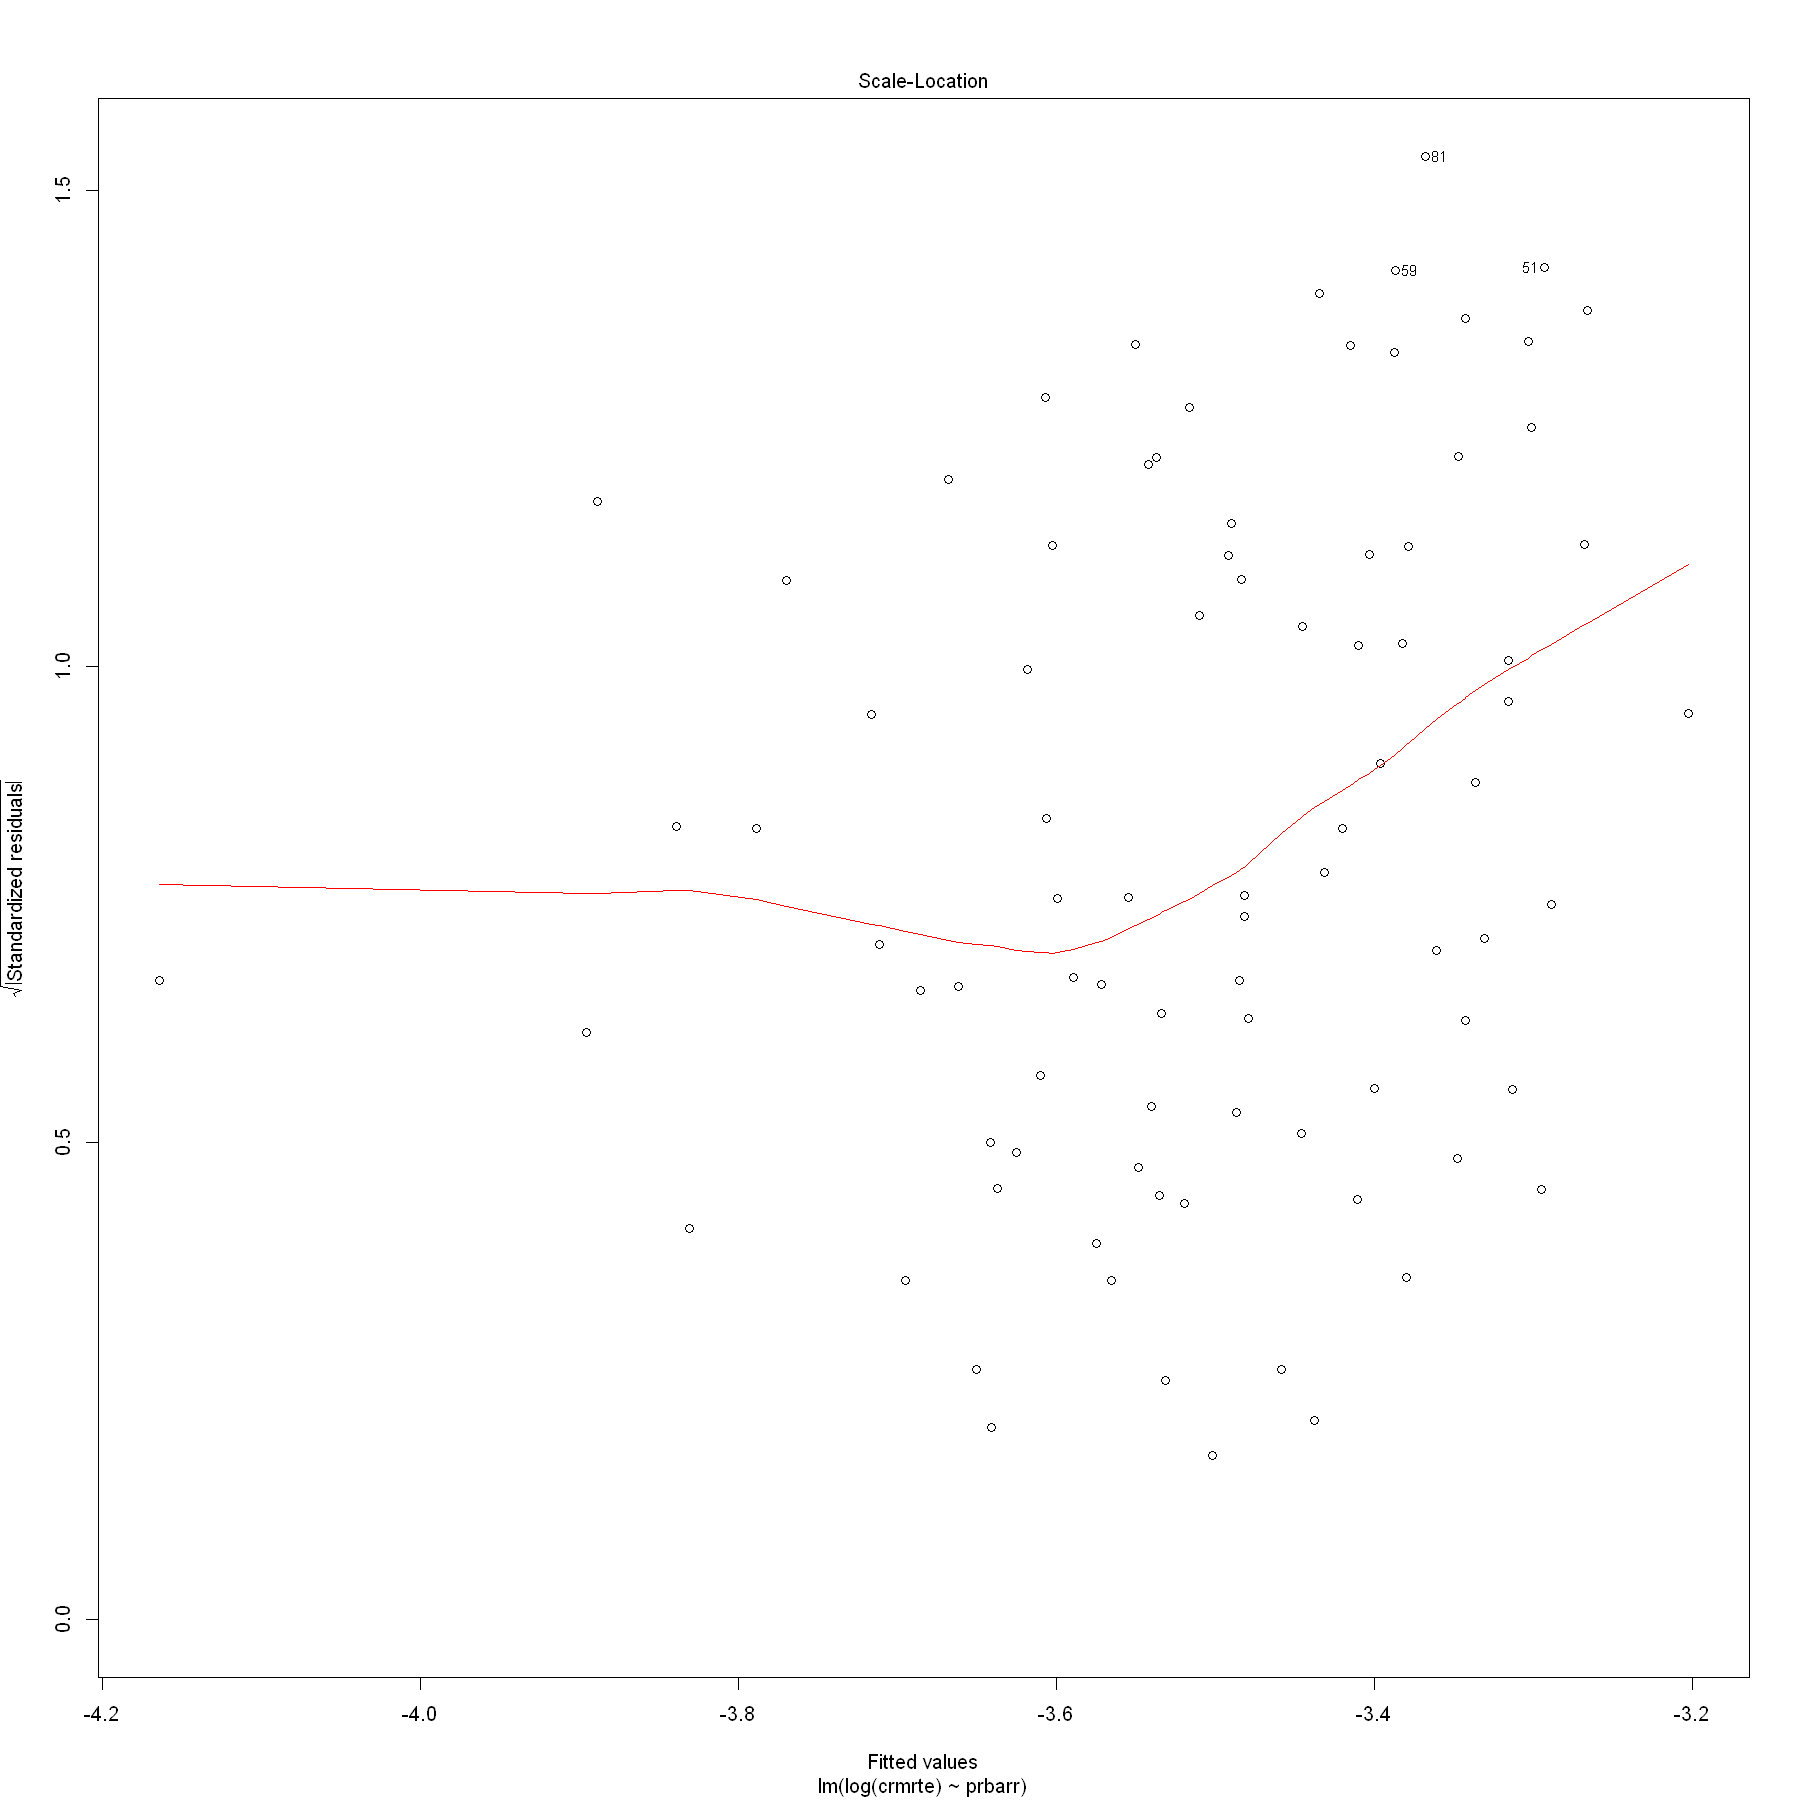

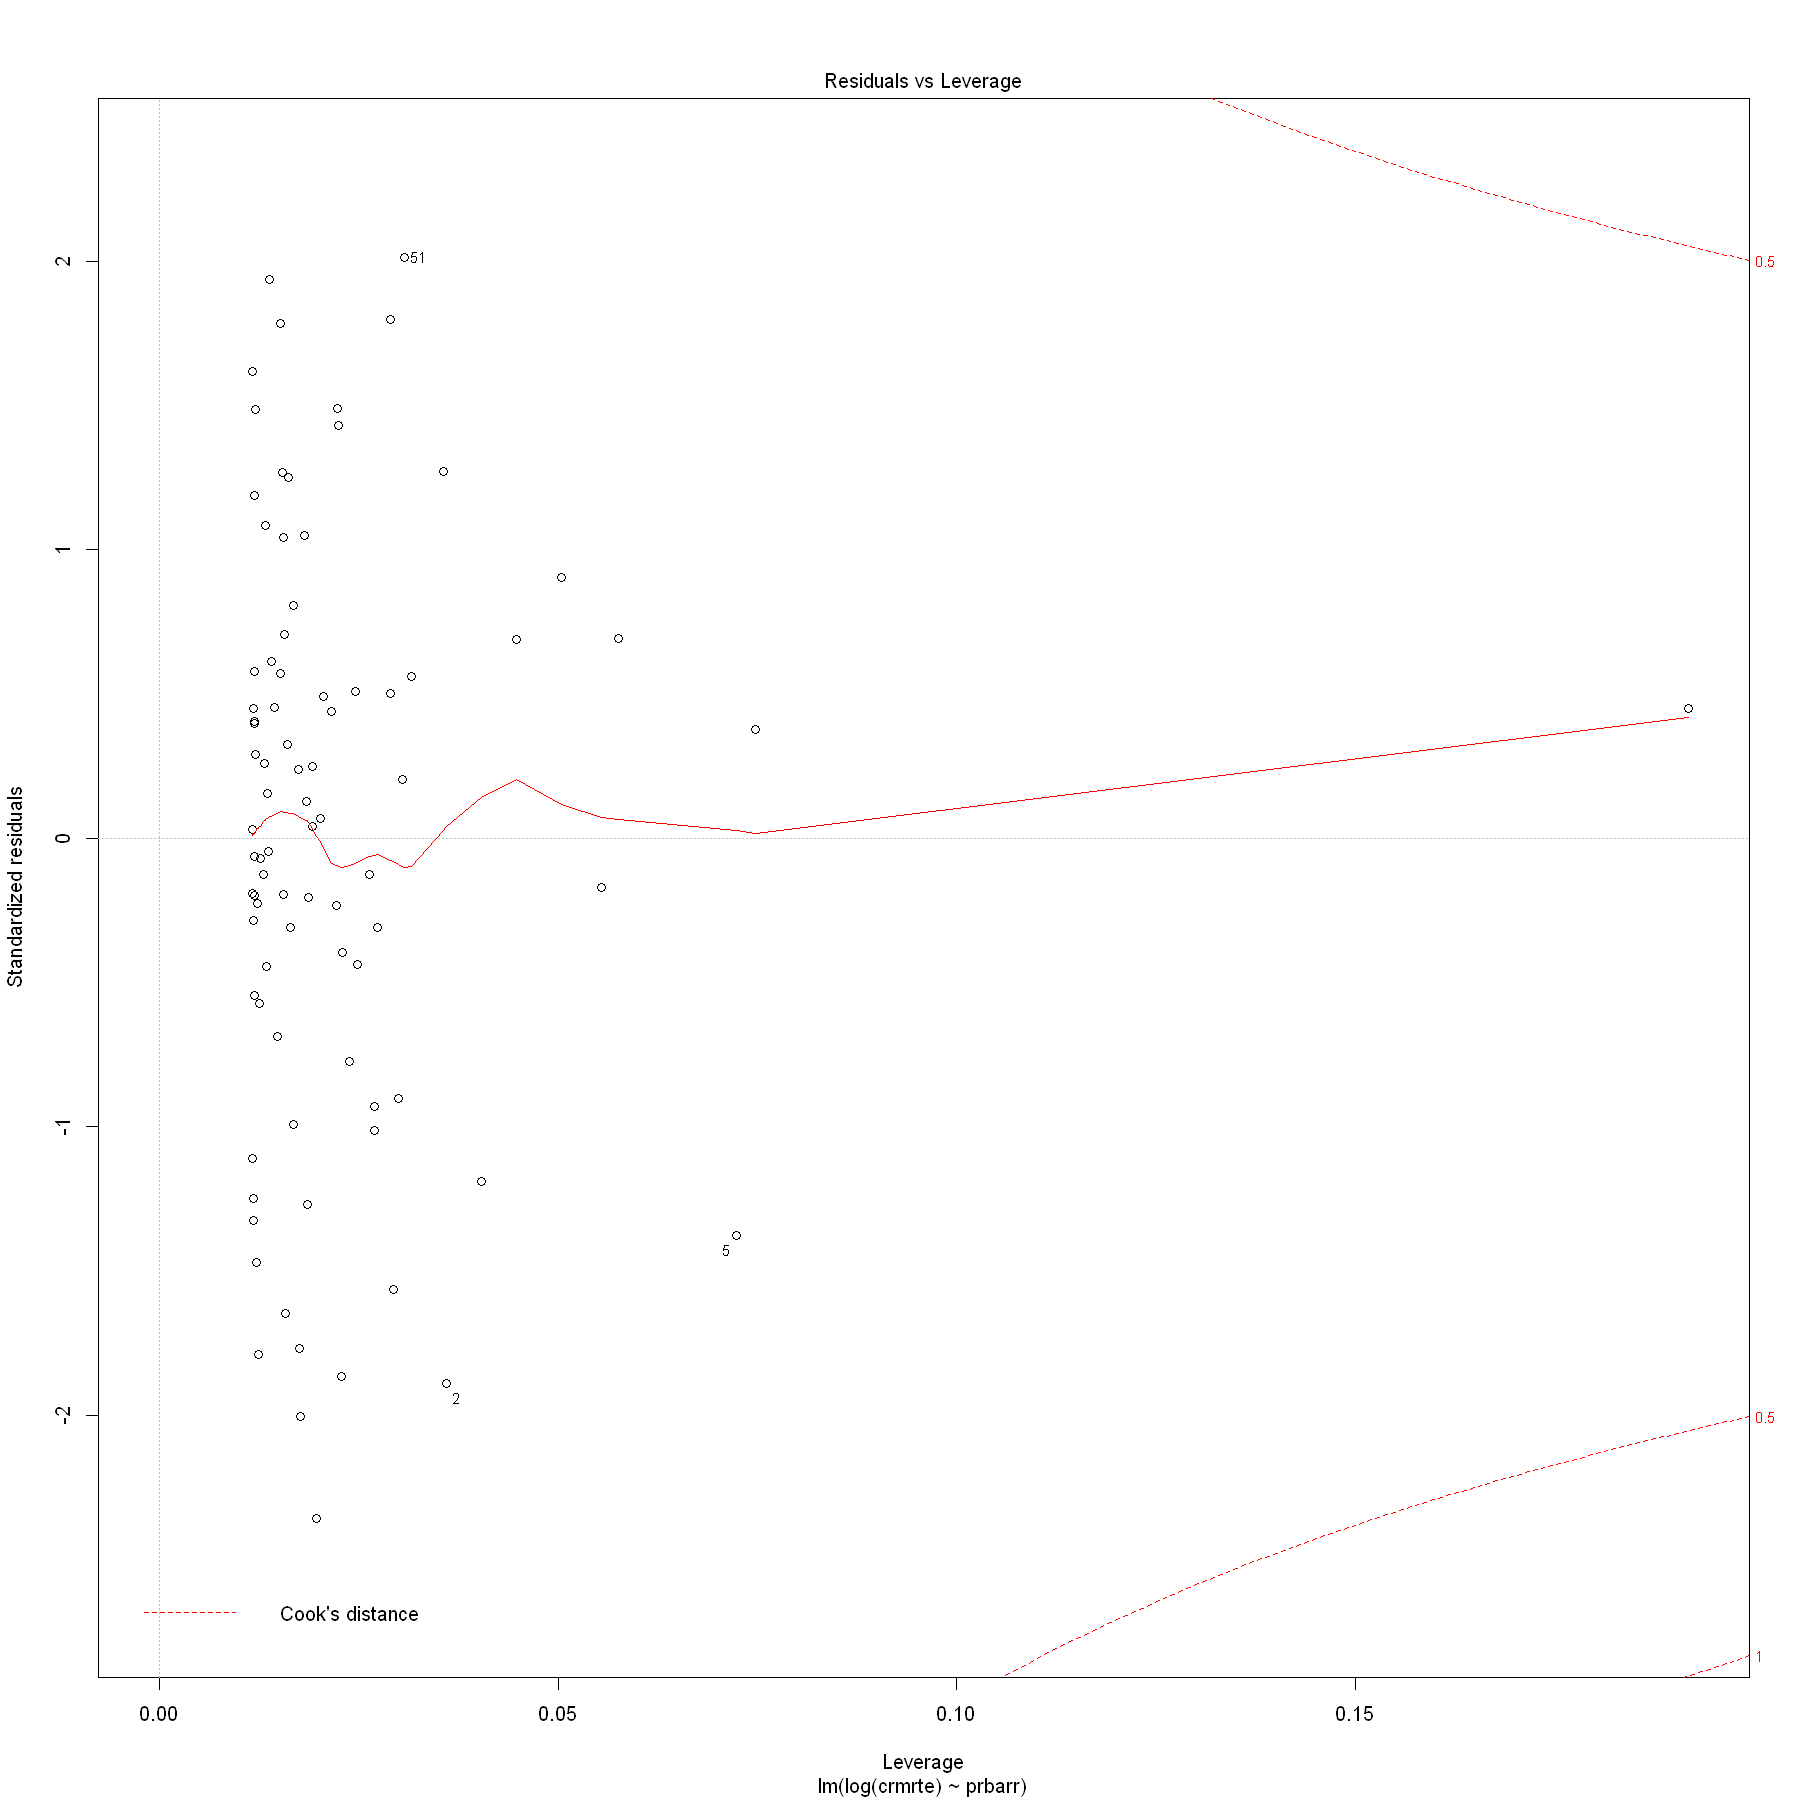

In [41]:
# LOG transform
model1 = lm(log(crmrte) ~ prbarr, data = filtered_df)
summary(model1)
plot(model1)

> ### option2: crime rate ~ the 3 probabilities


Call:
lm(formula = crmrte ~ prbarr + prbconv + prbpris, data = filtered_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.039814 -0.010205 -0.001723  0.009011  0.046092 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.074506   0.010672   6.981 6.97e-10 ***
prbarr      -0.090930   0.015938  -5.705 1.79e-07 ***
prbconv     -0.032200   0.005194  -6.200 2.17e-08 ***
prbpris      0.006427   0.021089   0.305    0.761    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01475 on 82 degrees of freedom
Multiple R-squared:  0.4084,	Adjusted R-squared:  0.3867 
F-statistic: 18.87 on 3 and 82 DF,  p-value: 2.138e-09


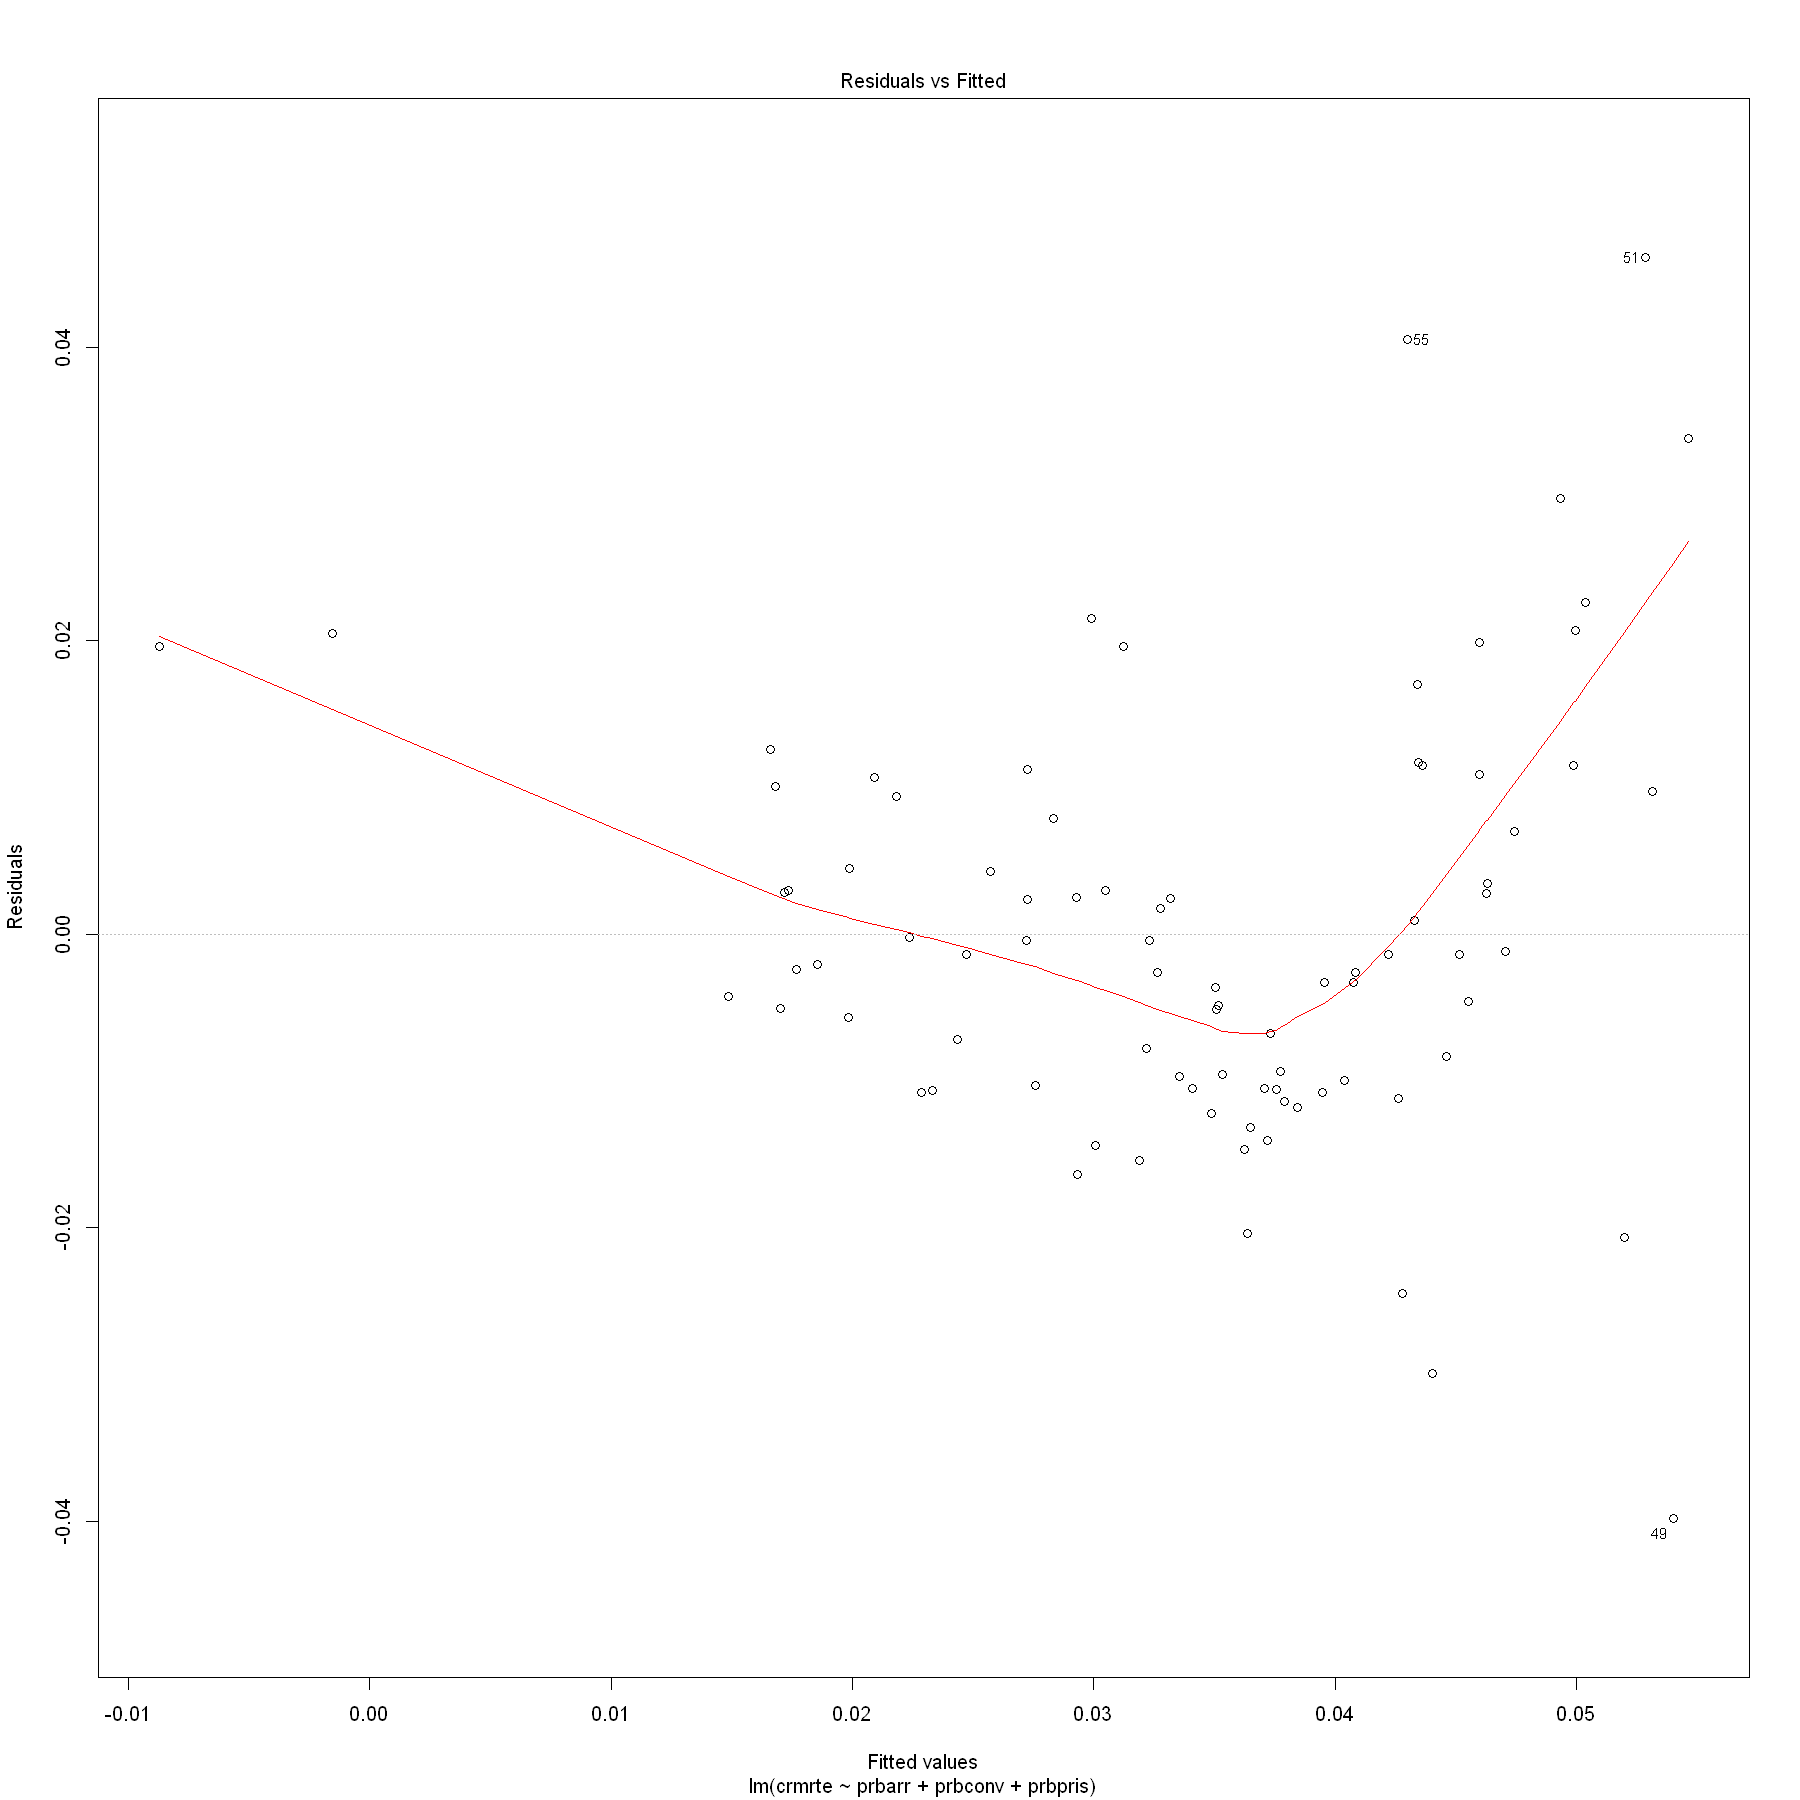

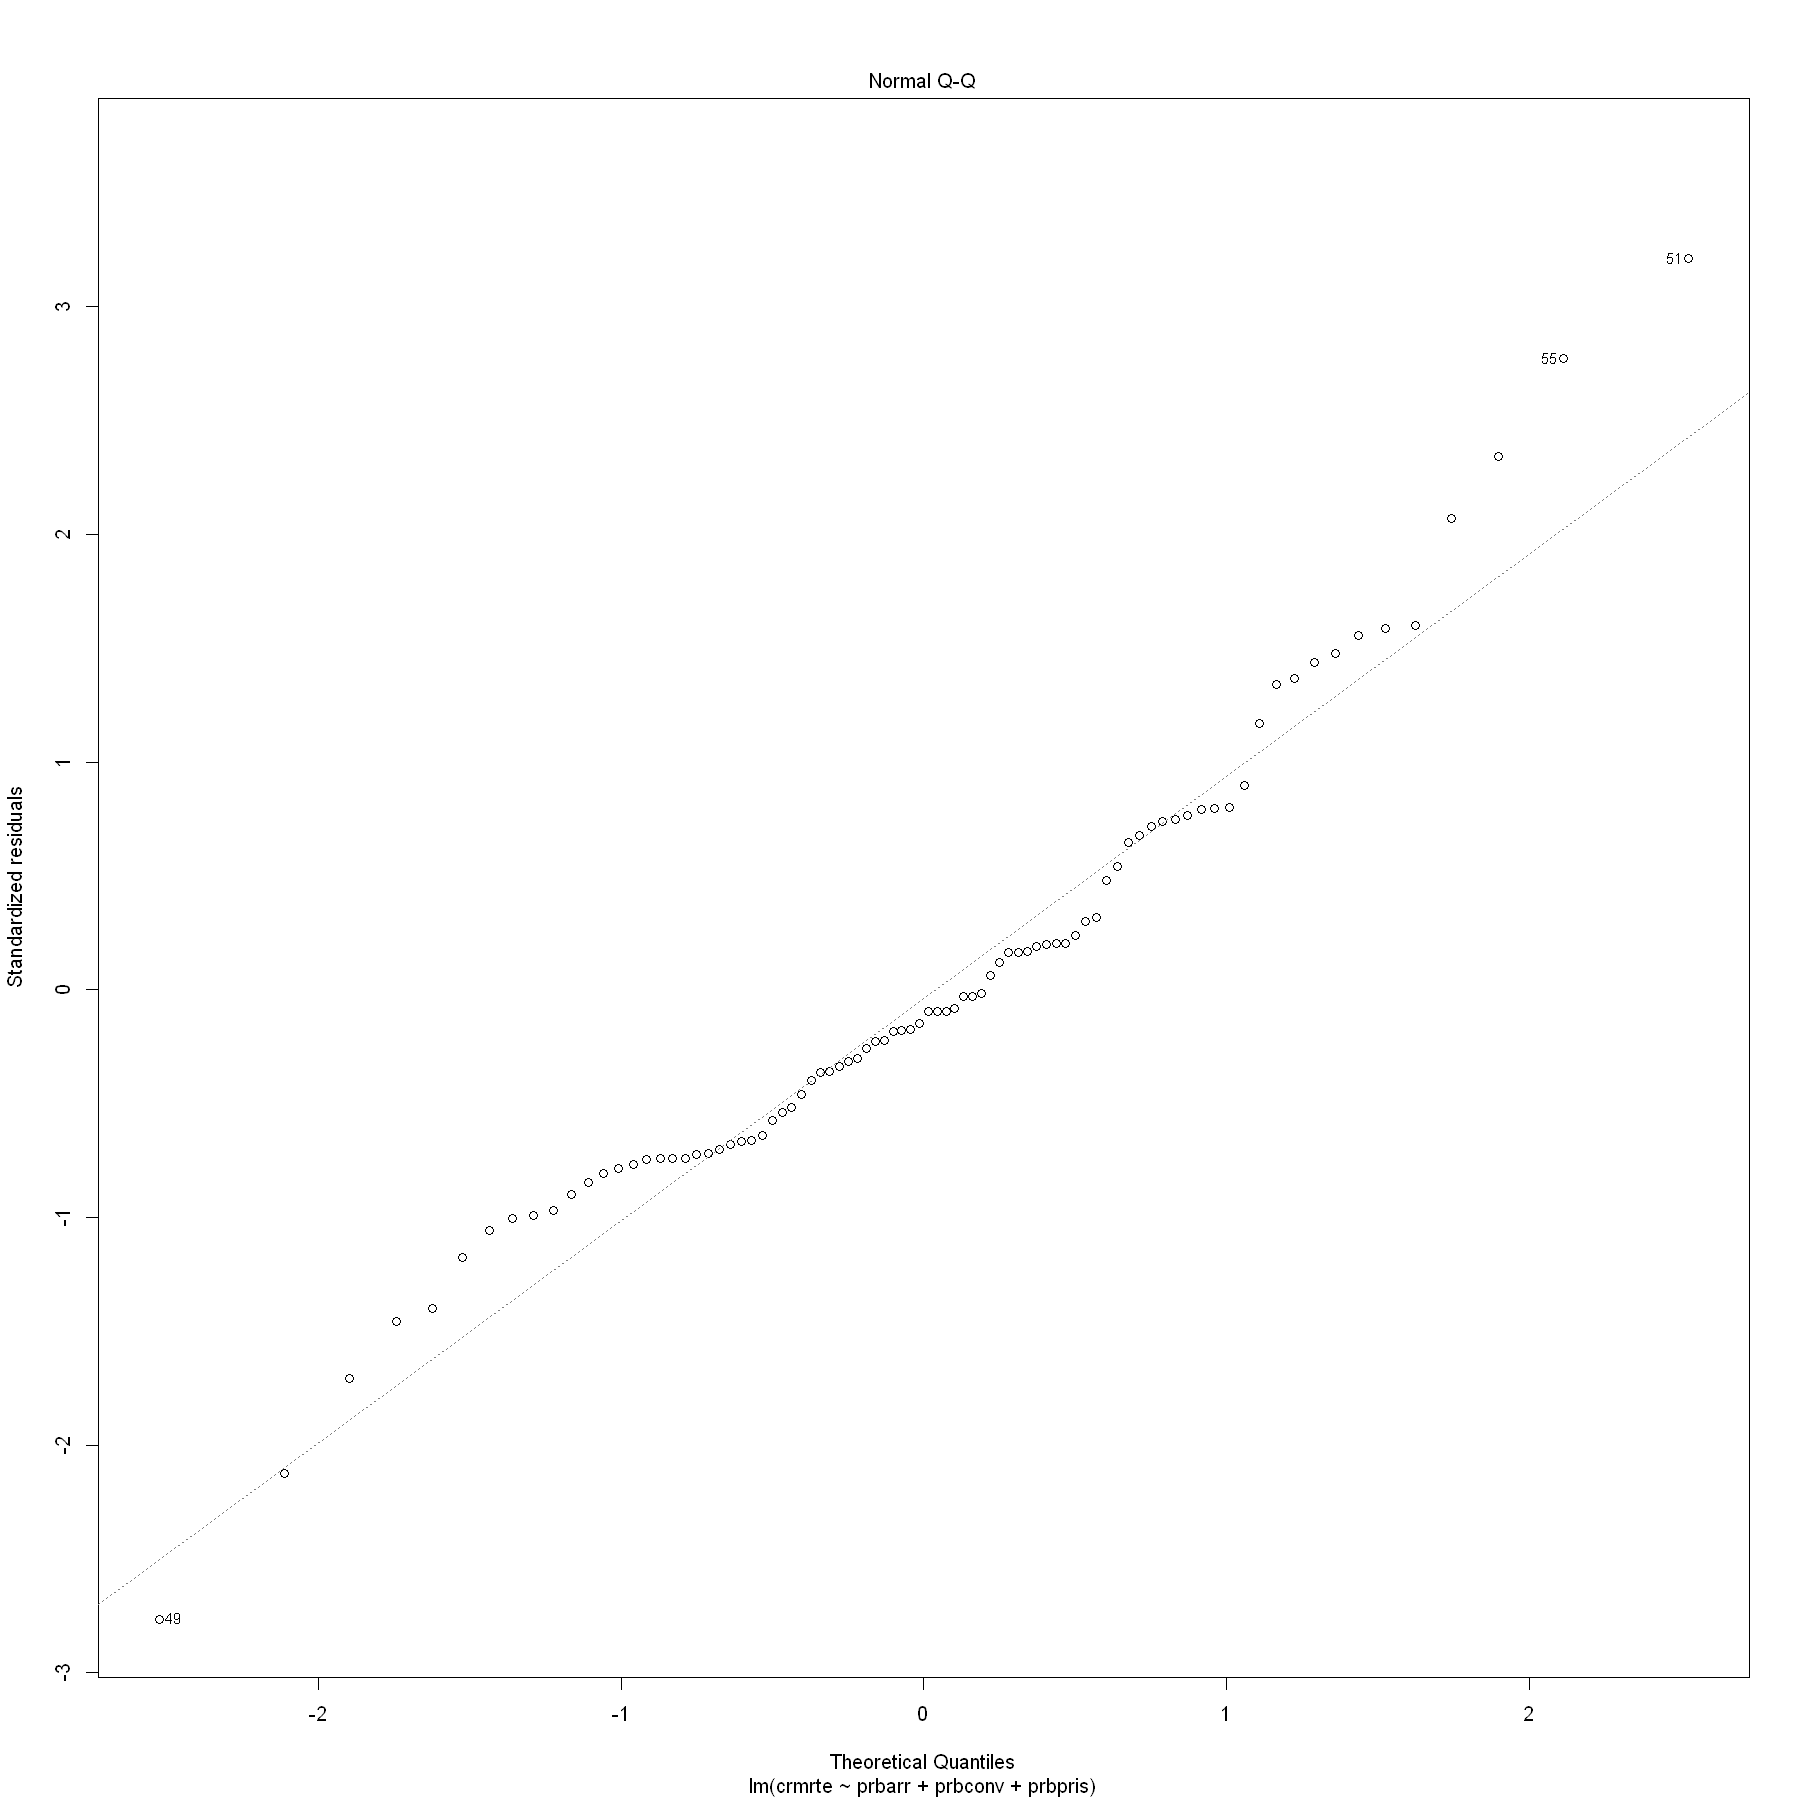

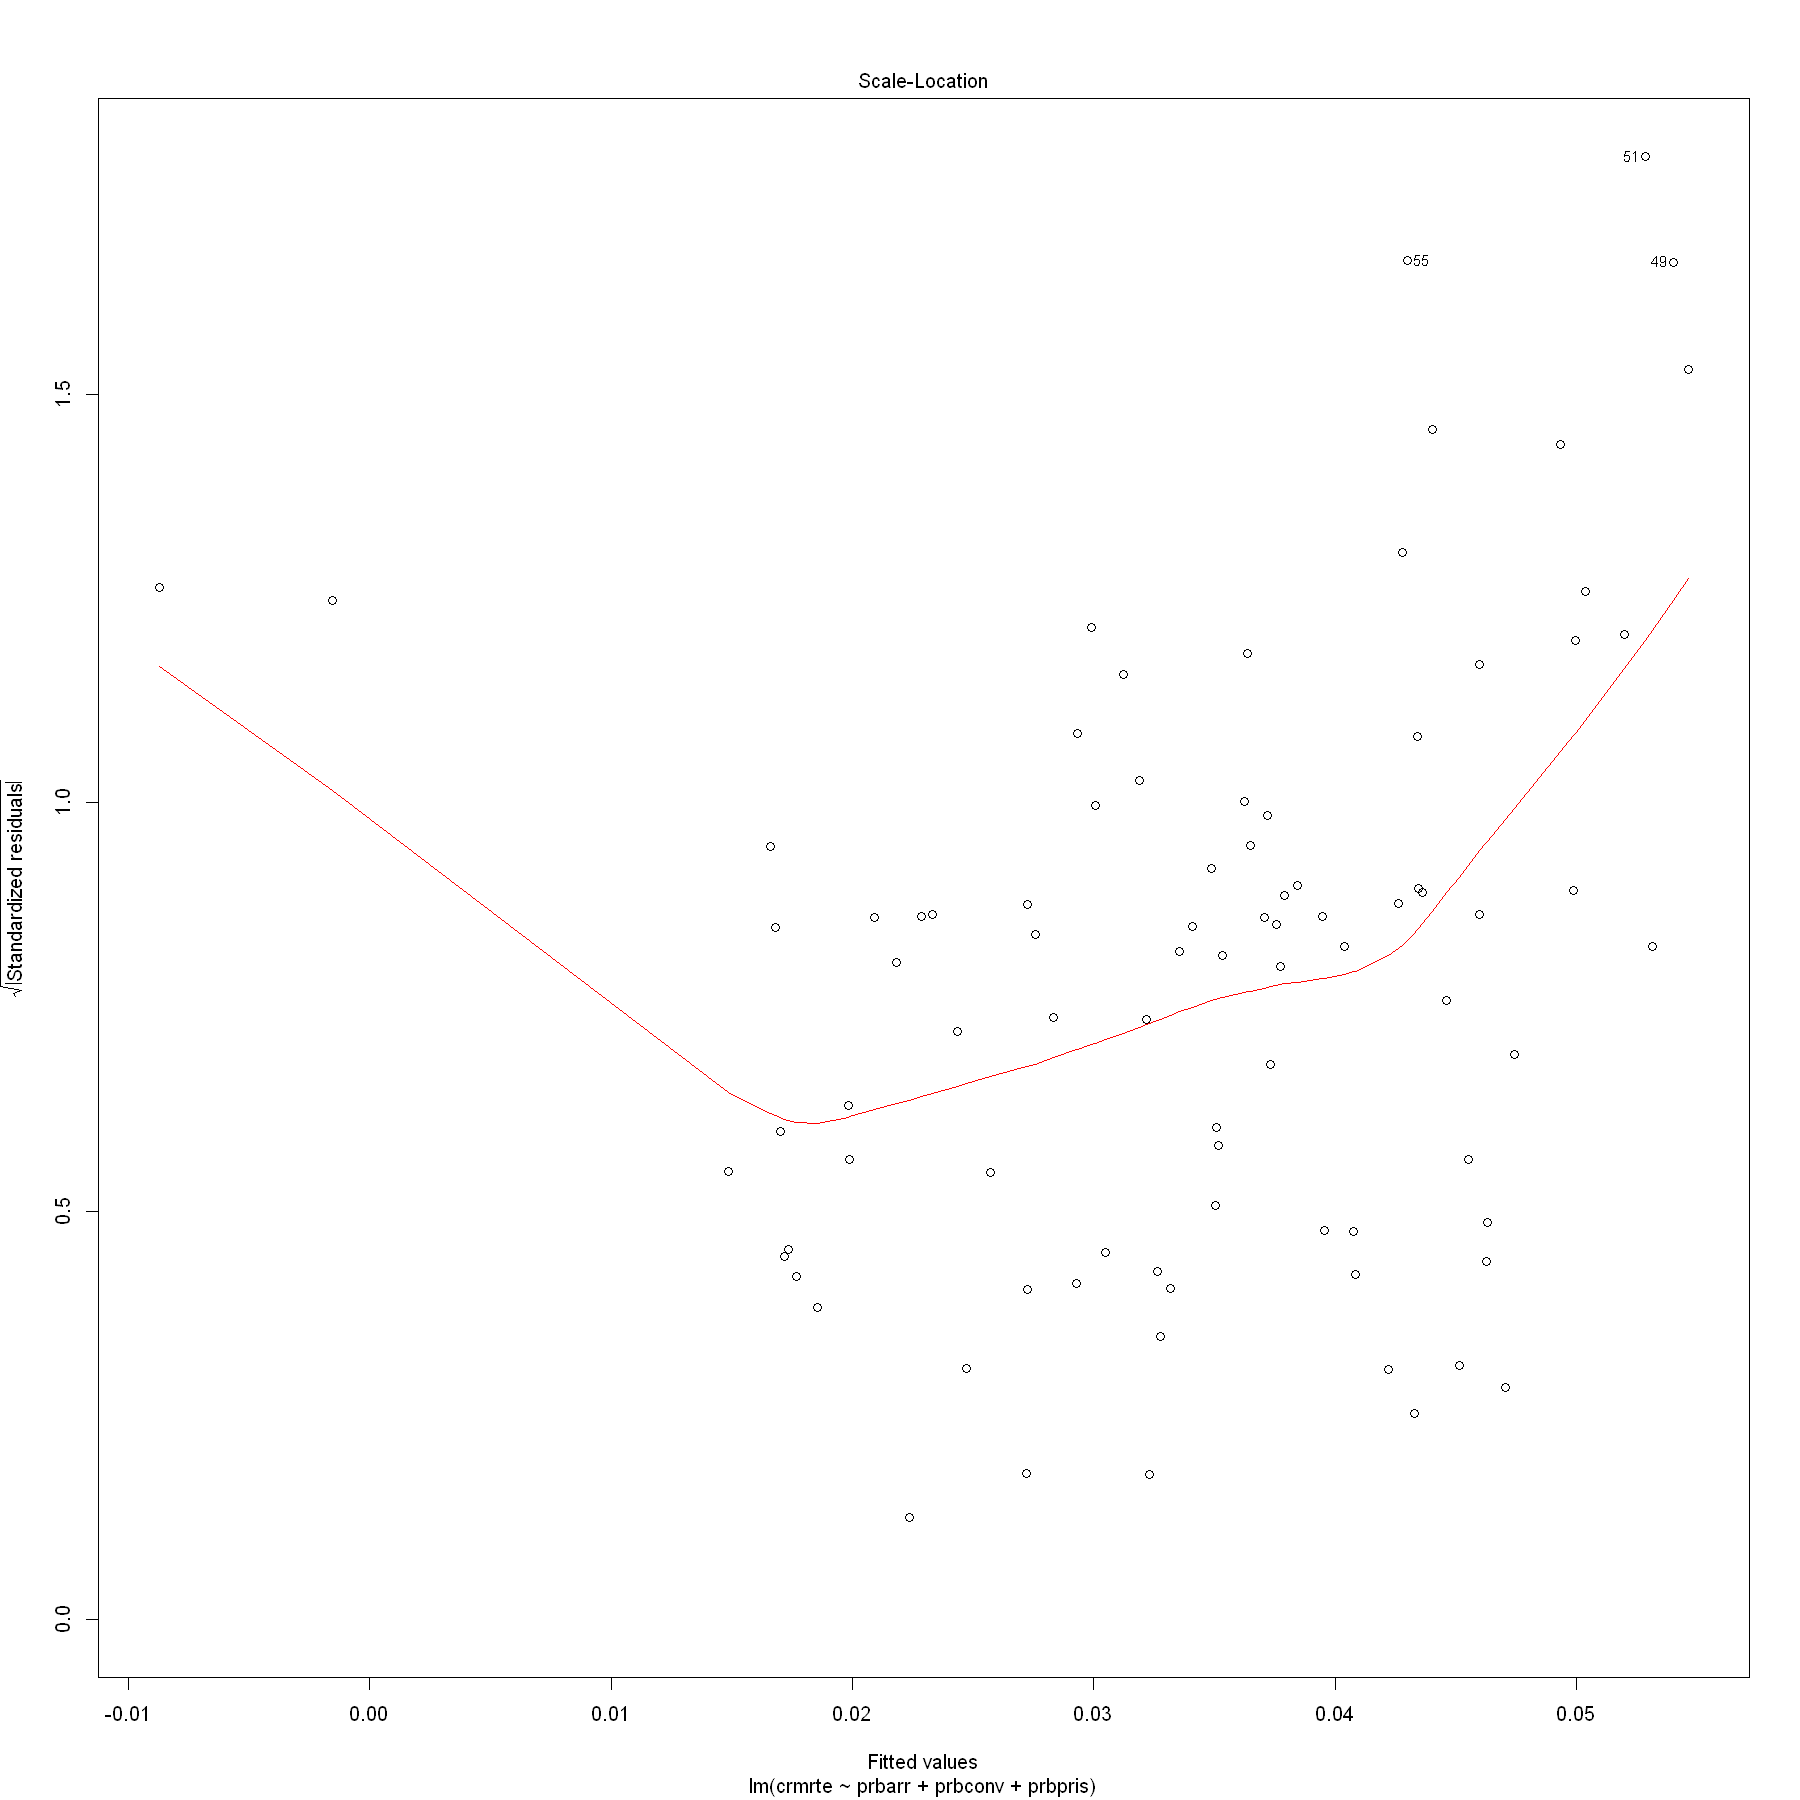

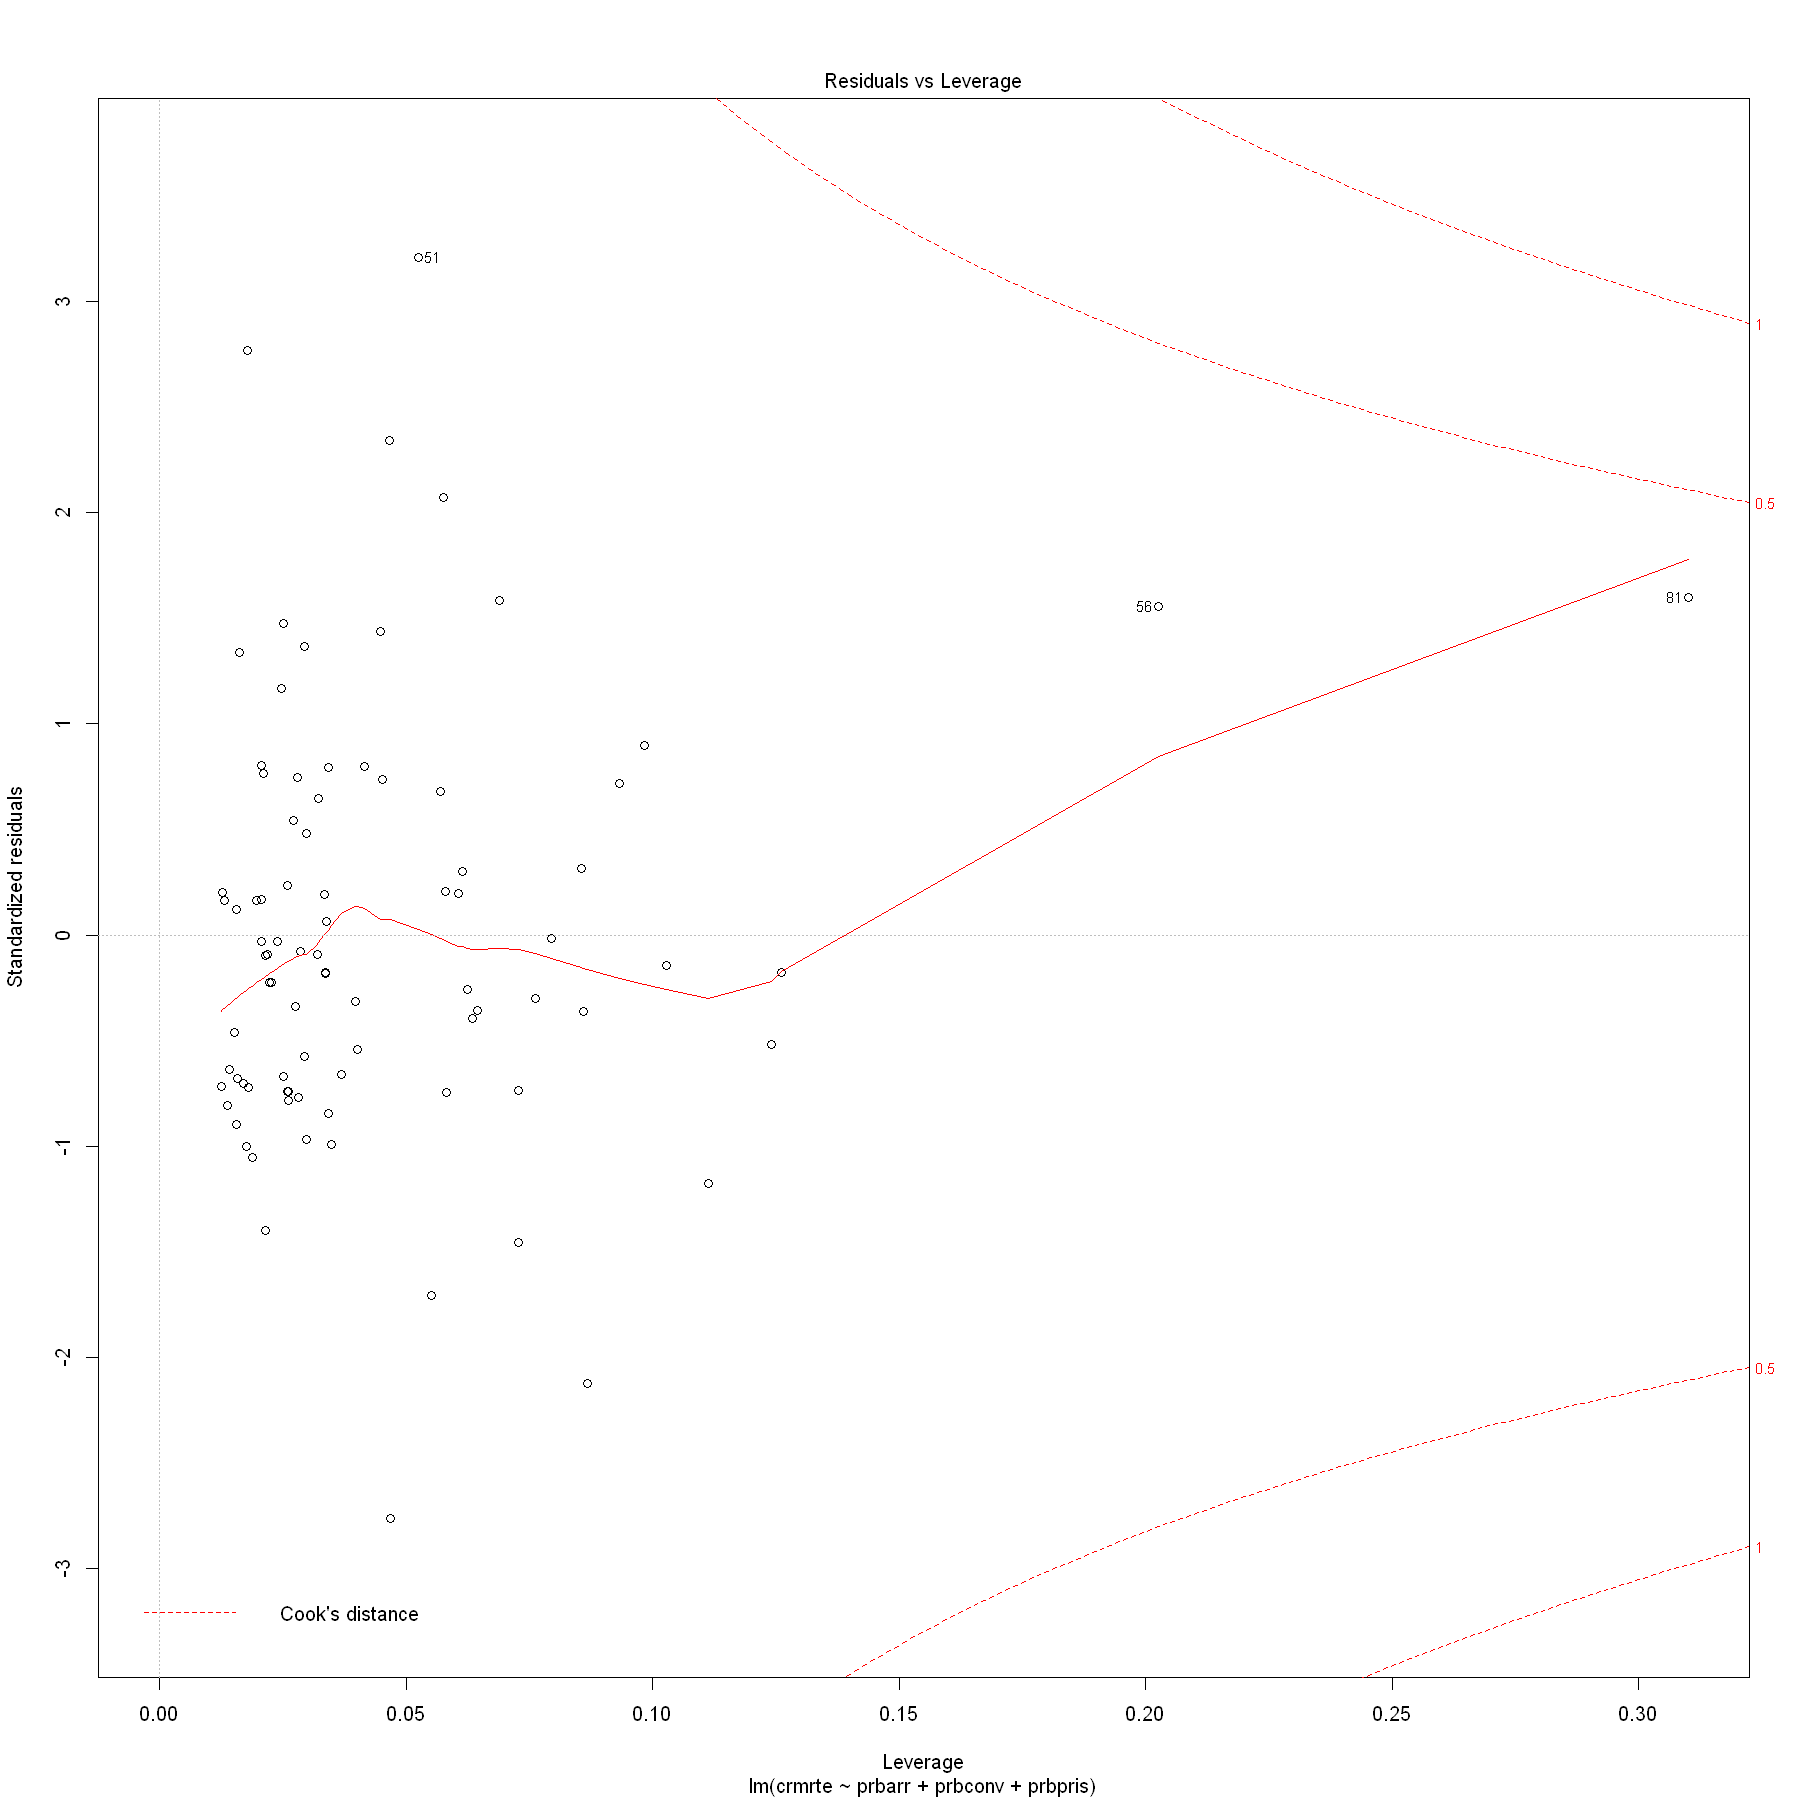

In [42]:
model1 = lm(crmrte ~ prbarr + prbconv + prbpris, data = filtered_df)
summary(model1)
plot(model1)

**With LOG Transform**


Call:
lm(formula = log(crmrte) ~ prbarr + prbconv + prbpris, data = filtered_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.29990 -0.23855  0.05276  0.26809  0.77756 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.31973    0.28638  -8.100 4.43e-12 ***
prbarr      -2.40425    0.42770  -5.621 2.54e-07 ***
prbconv     -0.97478    0.13937  -6.994 6.58e-10 ***
prbpris      0.02789    0.56591   0.049    0.961    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3959 on 82 degrees of freedom
Multiple R-squared:   0.44,	Adjusted R-squared:  0.4195 
F-statistic: 21.48 on 3 and 82 DF,  p-value: 2.326e-10


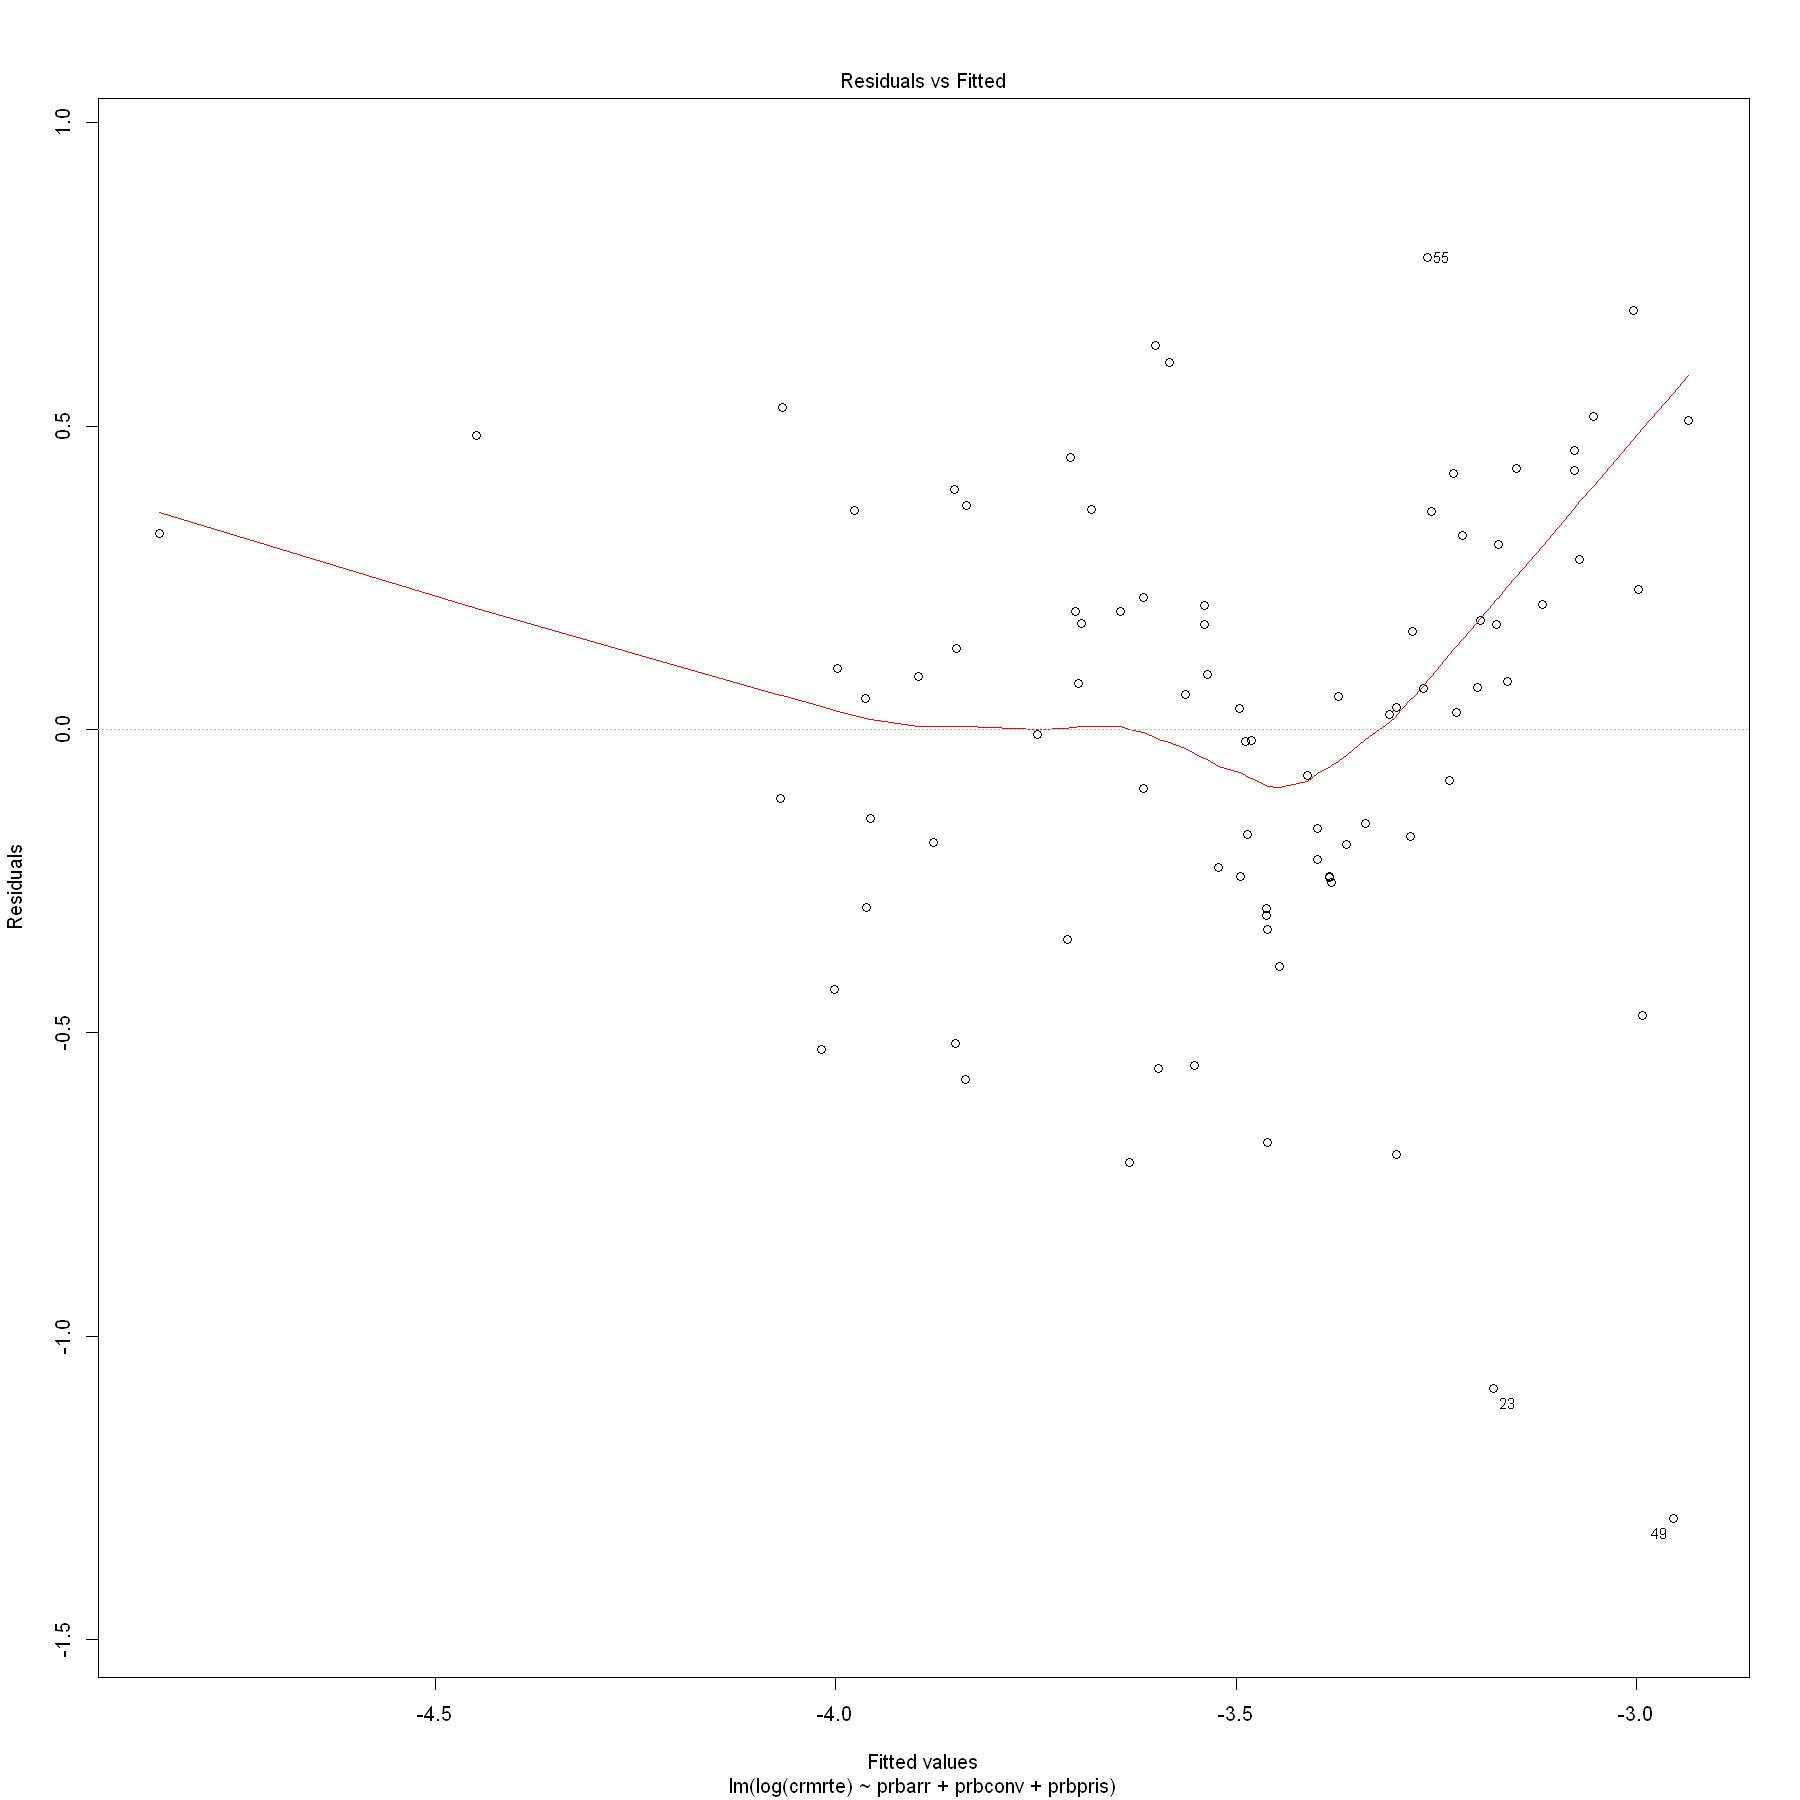

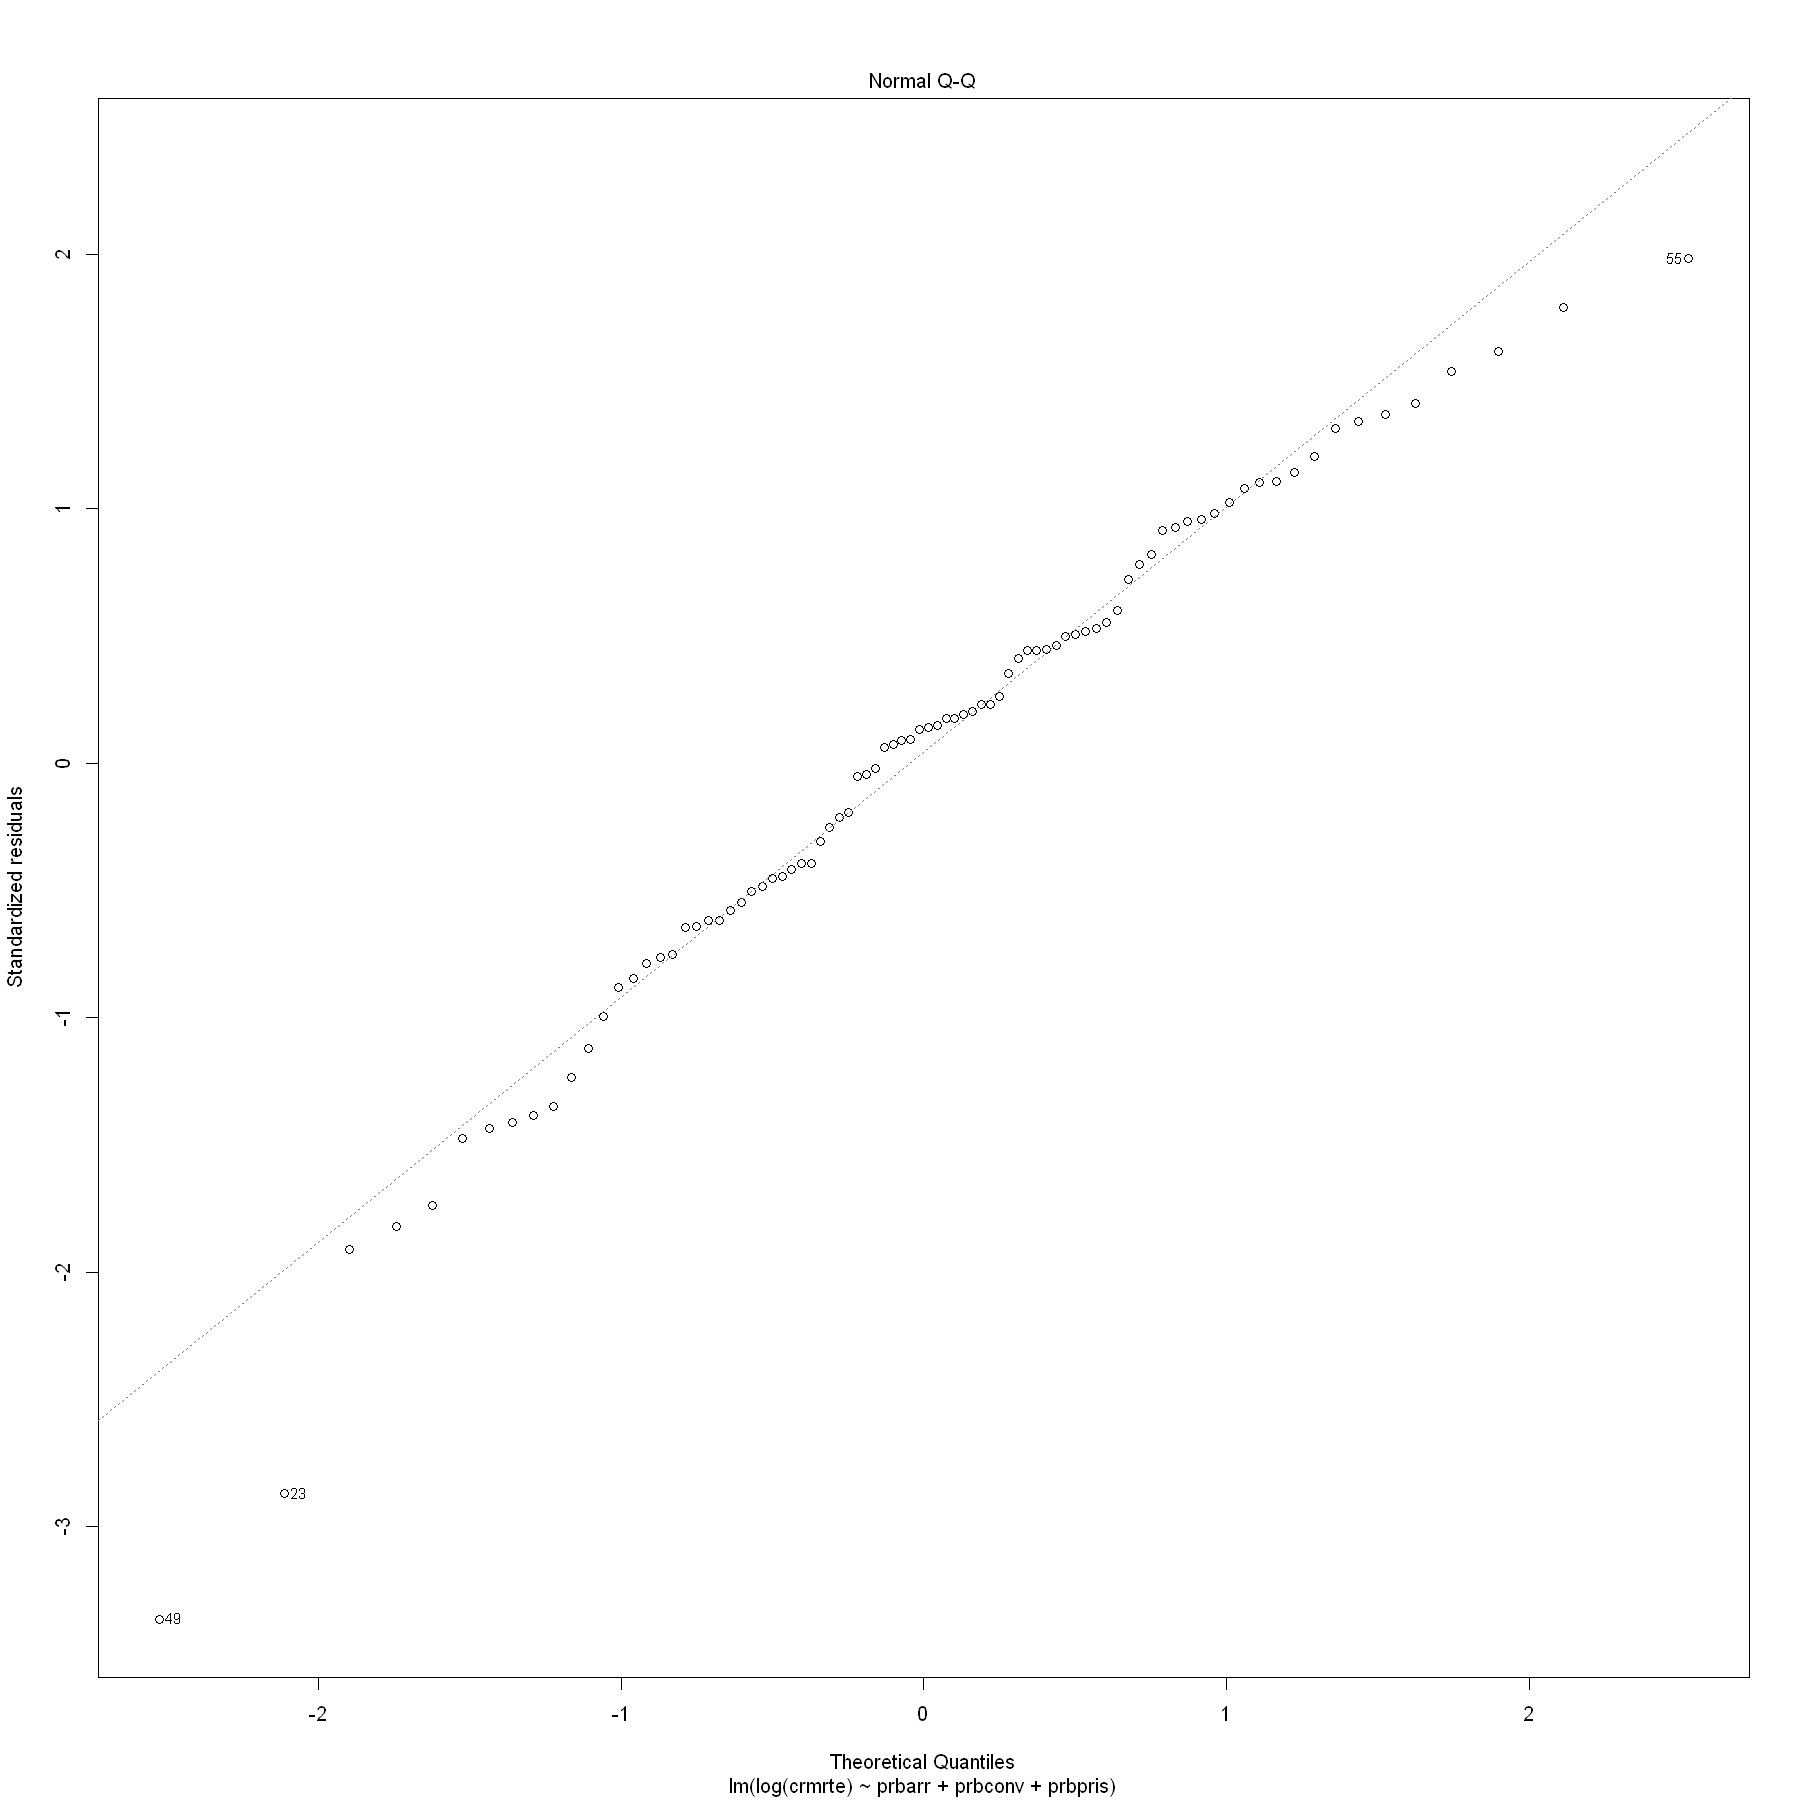

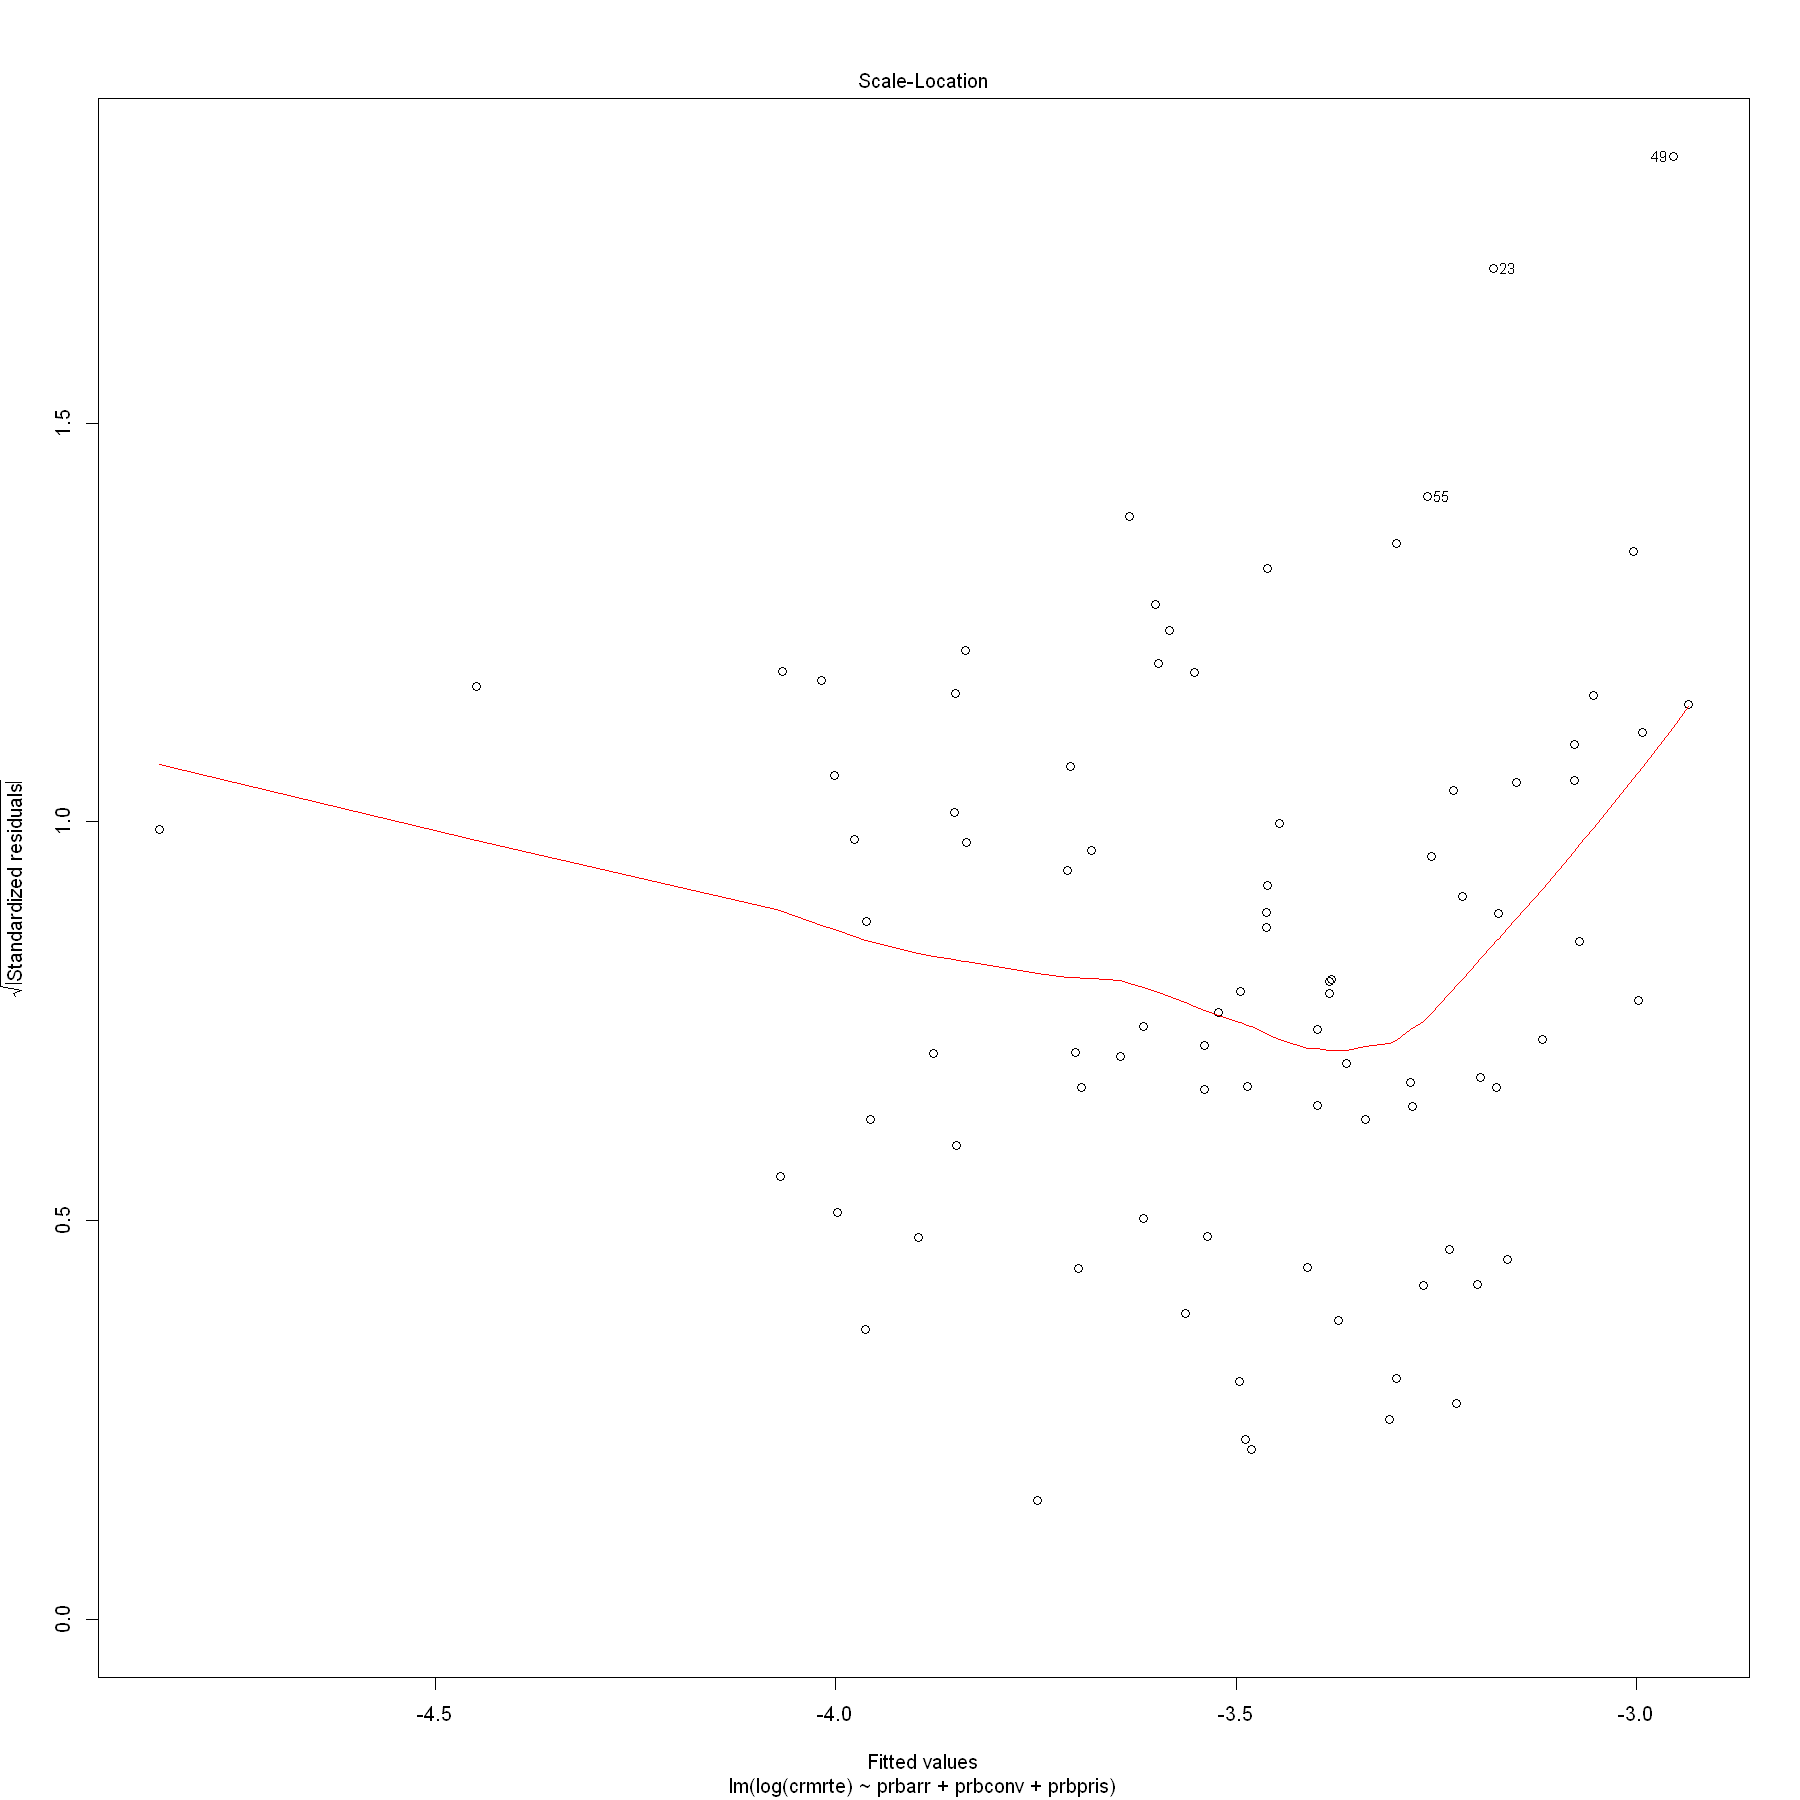

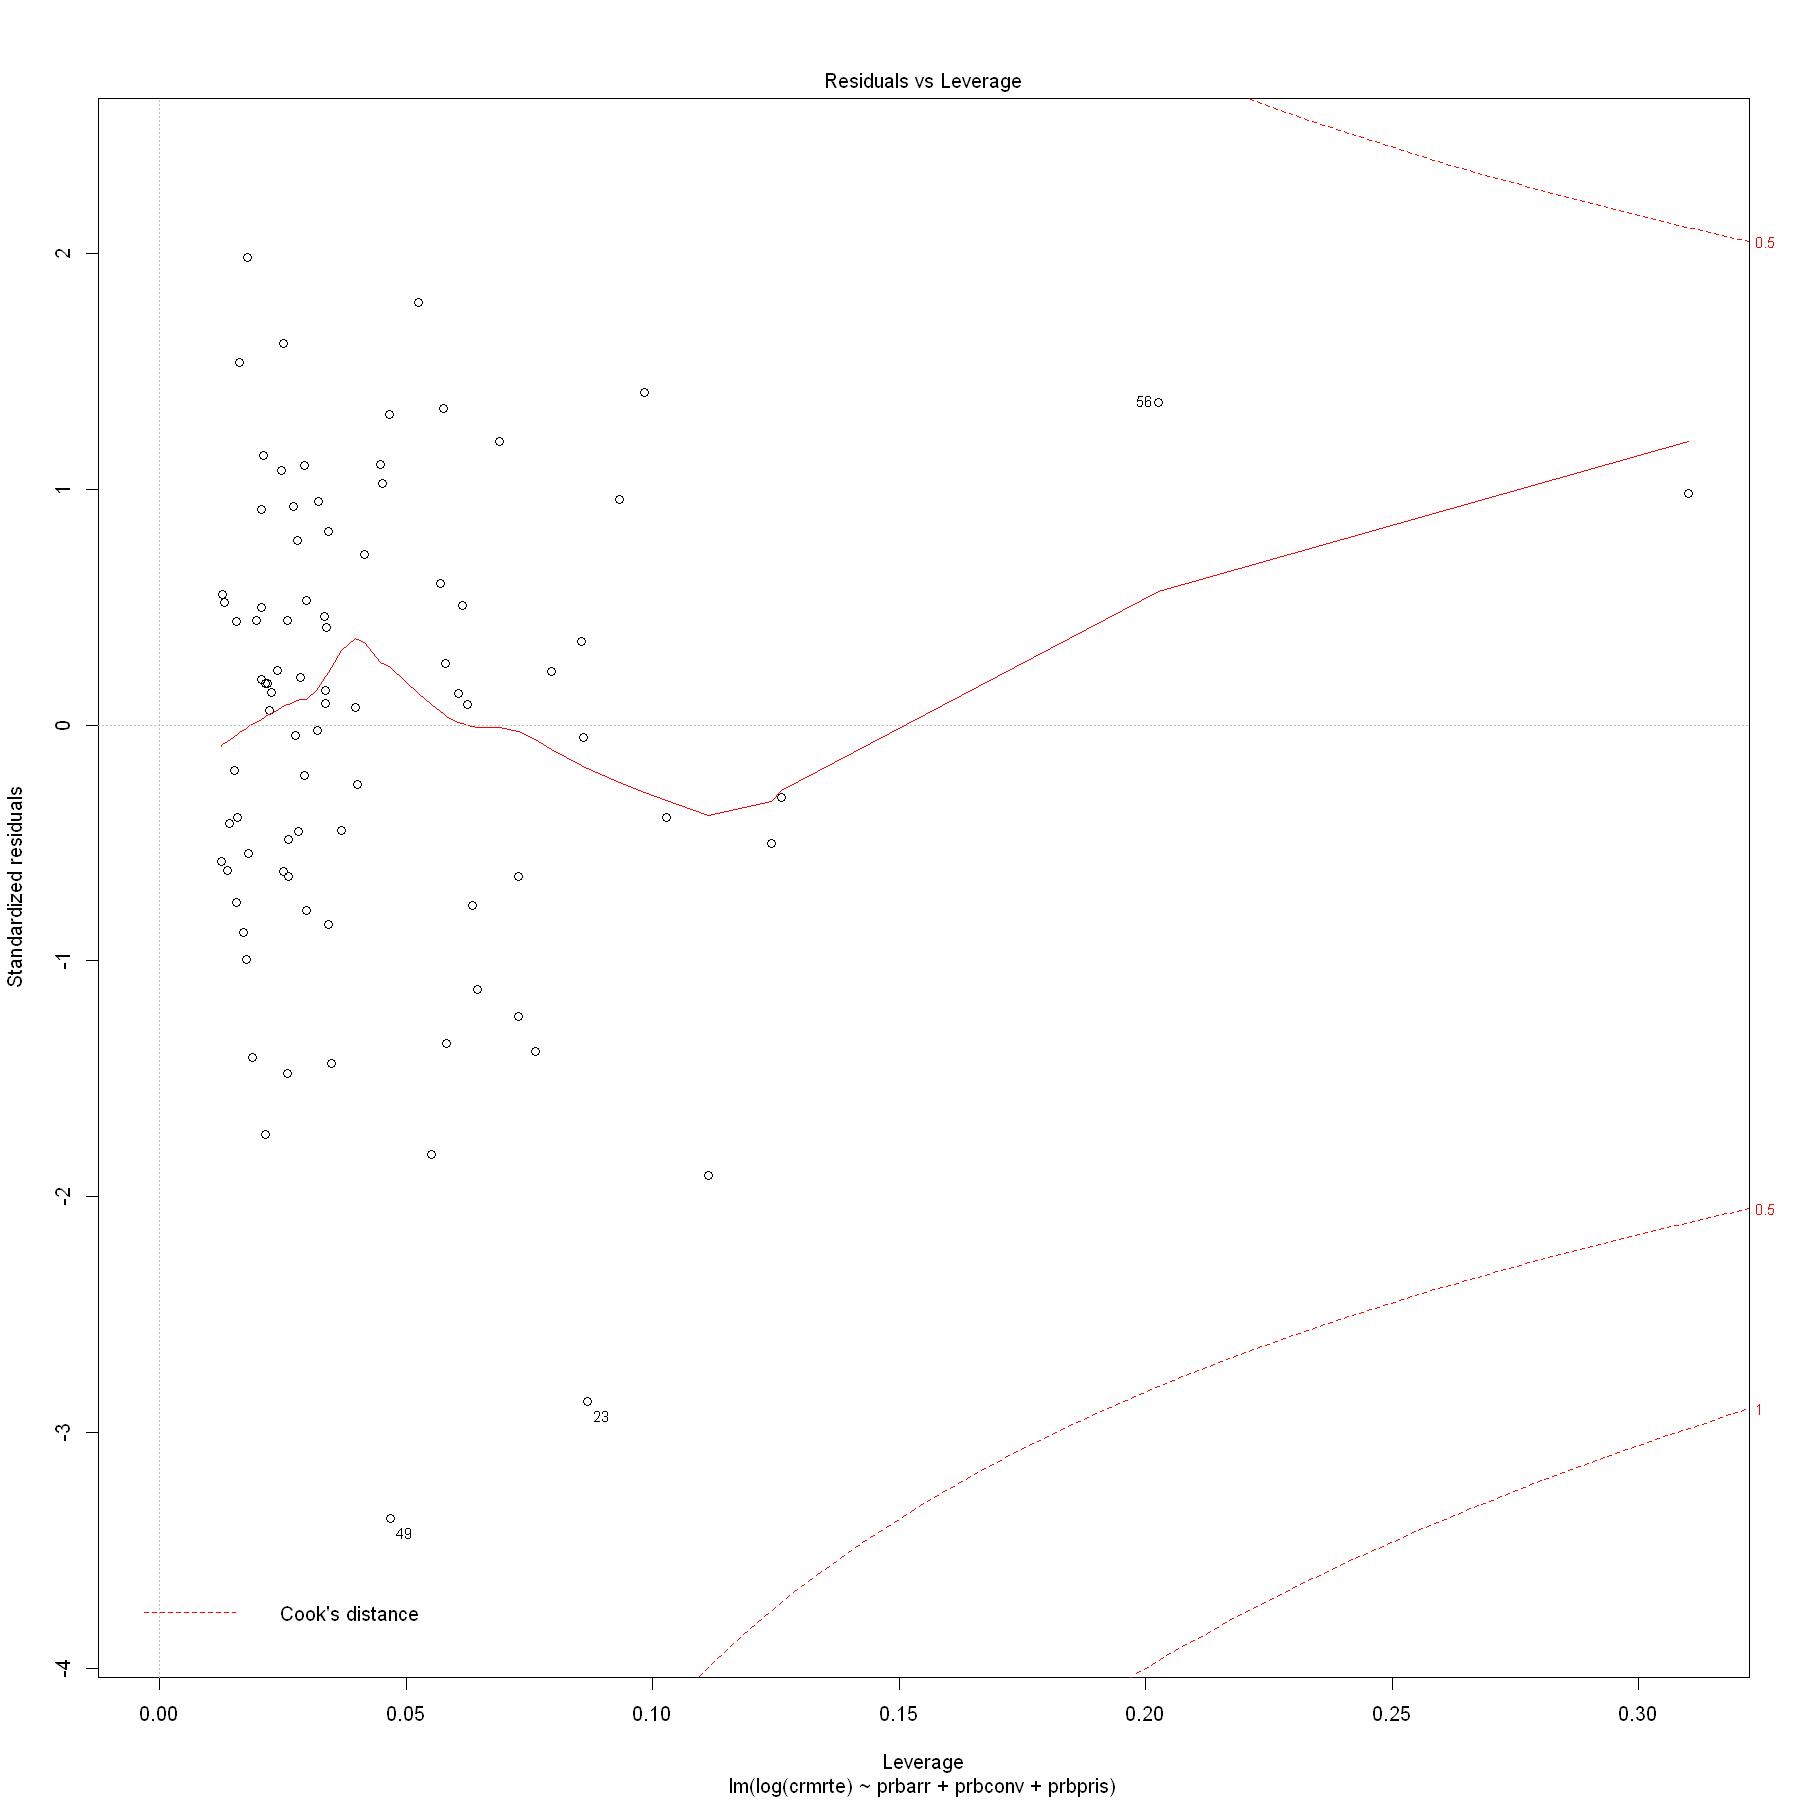

In [43]:
model1_log = lm(log(crmrte) ~ prbarr + prbconv + prbpris, data = filtered_df)
summary(model1_log)
plot(model1_log)

### Model 2: Best Fit Model
> ### crime rate ~ juridical and law enforcement + some demographics variables

The focus of this model is to build upon the previous model to include covariates that can be affected by policy as well as advance the model without introducing too much unnecessary complication. To establish this, we look at the following variables:
- probability of arrest (prbarr)
- probability of conviction (prbconv)
- probability of prison sentence (prbpris)
- average sentence (avgsen)
- police per capita (polpc)


Call:
lm(formula = crmrte ~ prbarr + prbconv + prbpris + avgsen + polpc, 
    data = filtered_df)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033137 -0.005177 -0.000543  0.005861  0.037632 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0274581  0.0128985   2.129 0.036349 *  
prbarr      -0.0550966  0.0140122  -3.932 0.000178 ***
prbconv     -0.0194823  0.0046218  -4.215 6.51e-05 ***
prbpris      0.0126791  0.0176805   0.717 0.475384    
avgsen      -0.0005011  0.0005457  -0.918 0.361186    
polpc       20.7384280  3.1290054   6.628 3.65e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01196 on 80 degrees of freedom
Multiple R-squared:  0.6204,	Adjusted R-squared:  0.5967 
F-statistic: 26.15 on 5 and 80 DF,  p-value: 1.477e-15


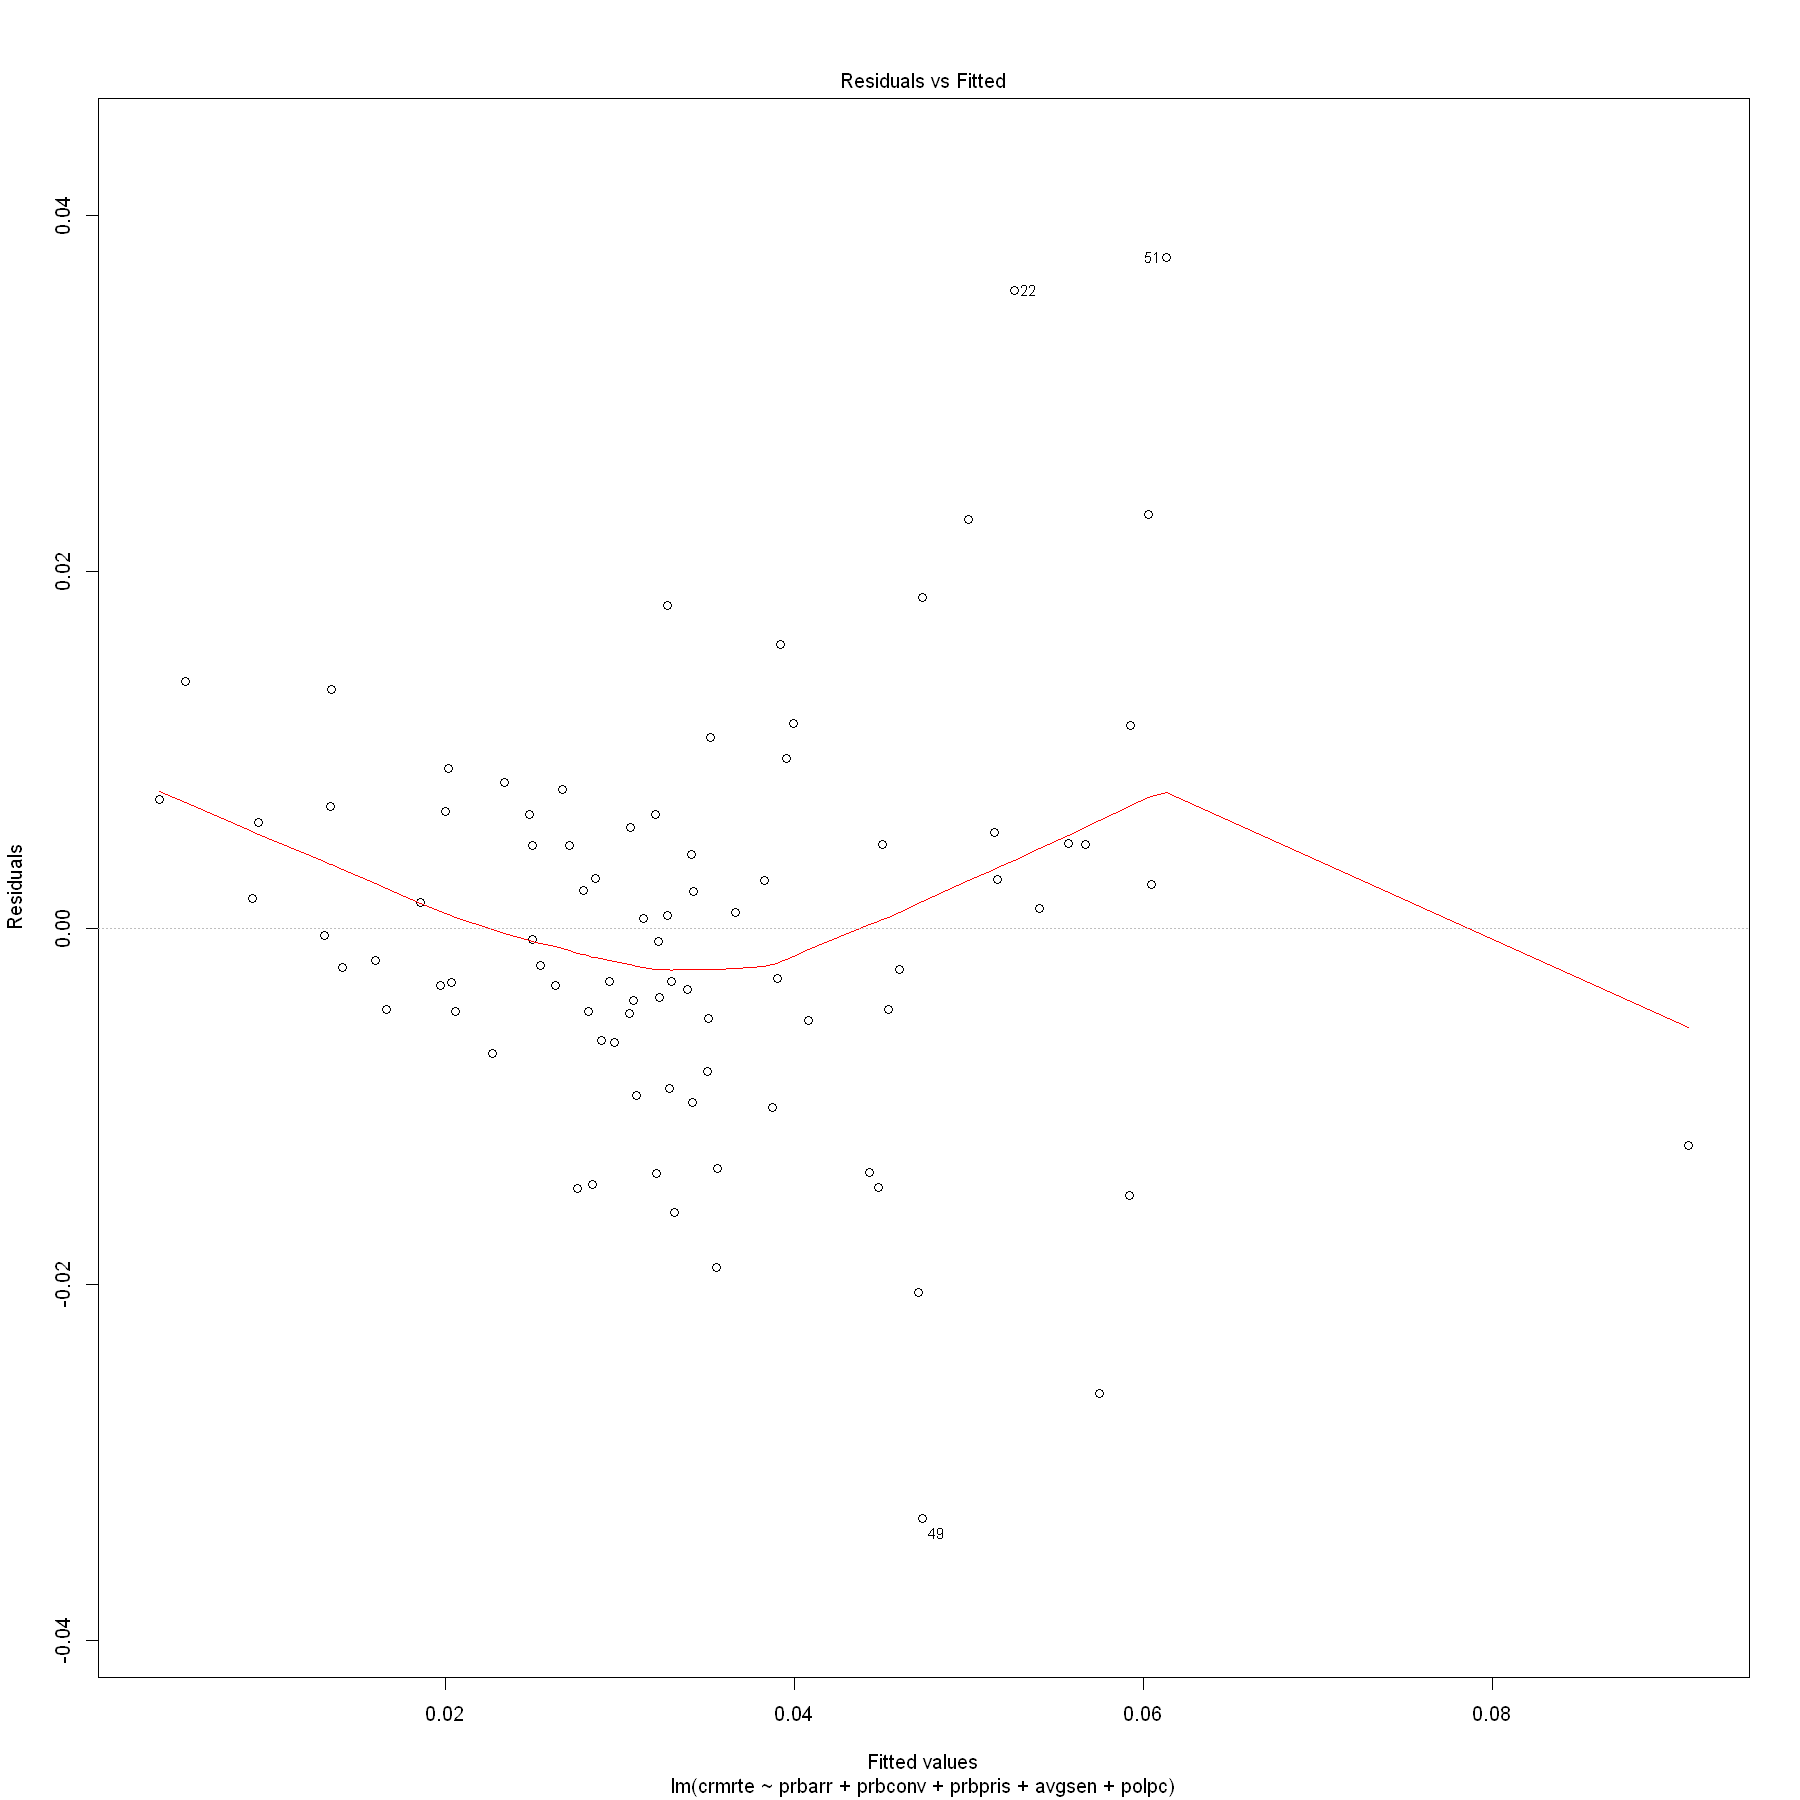

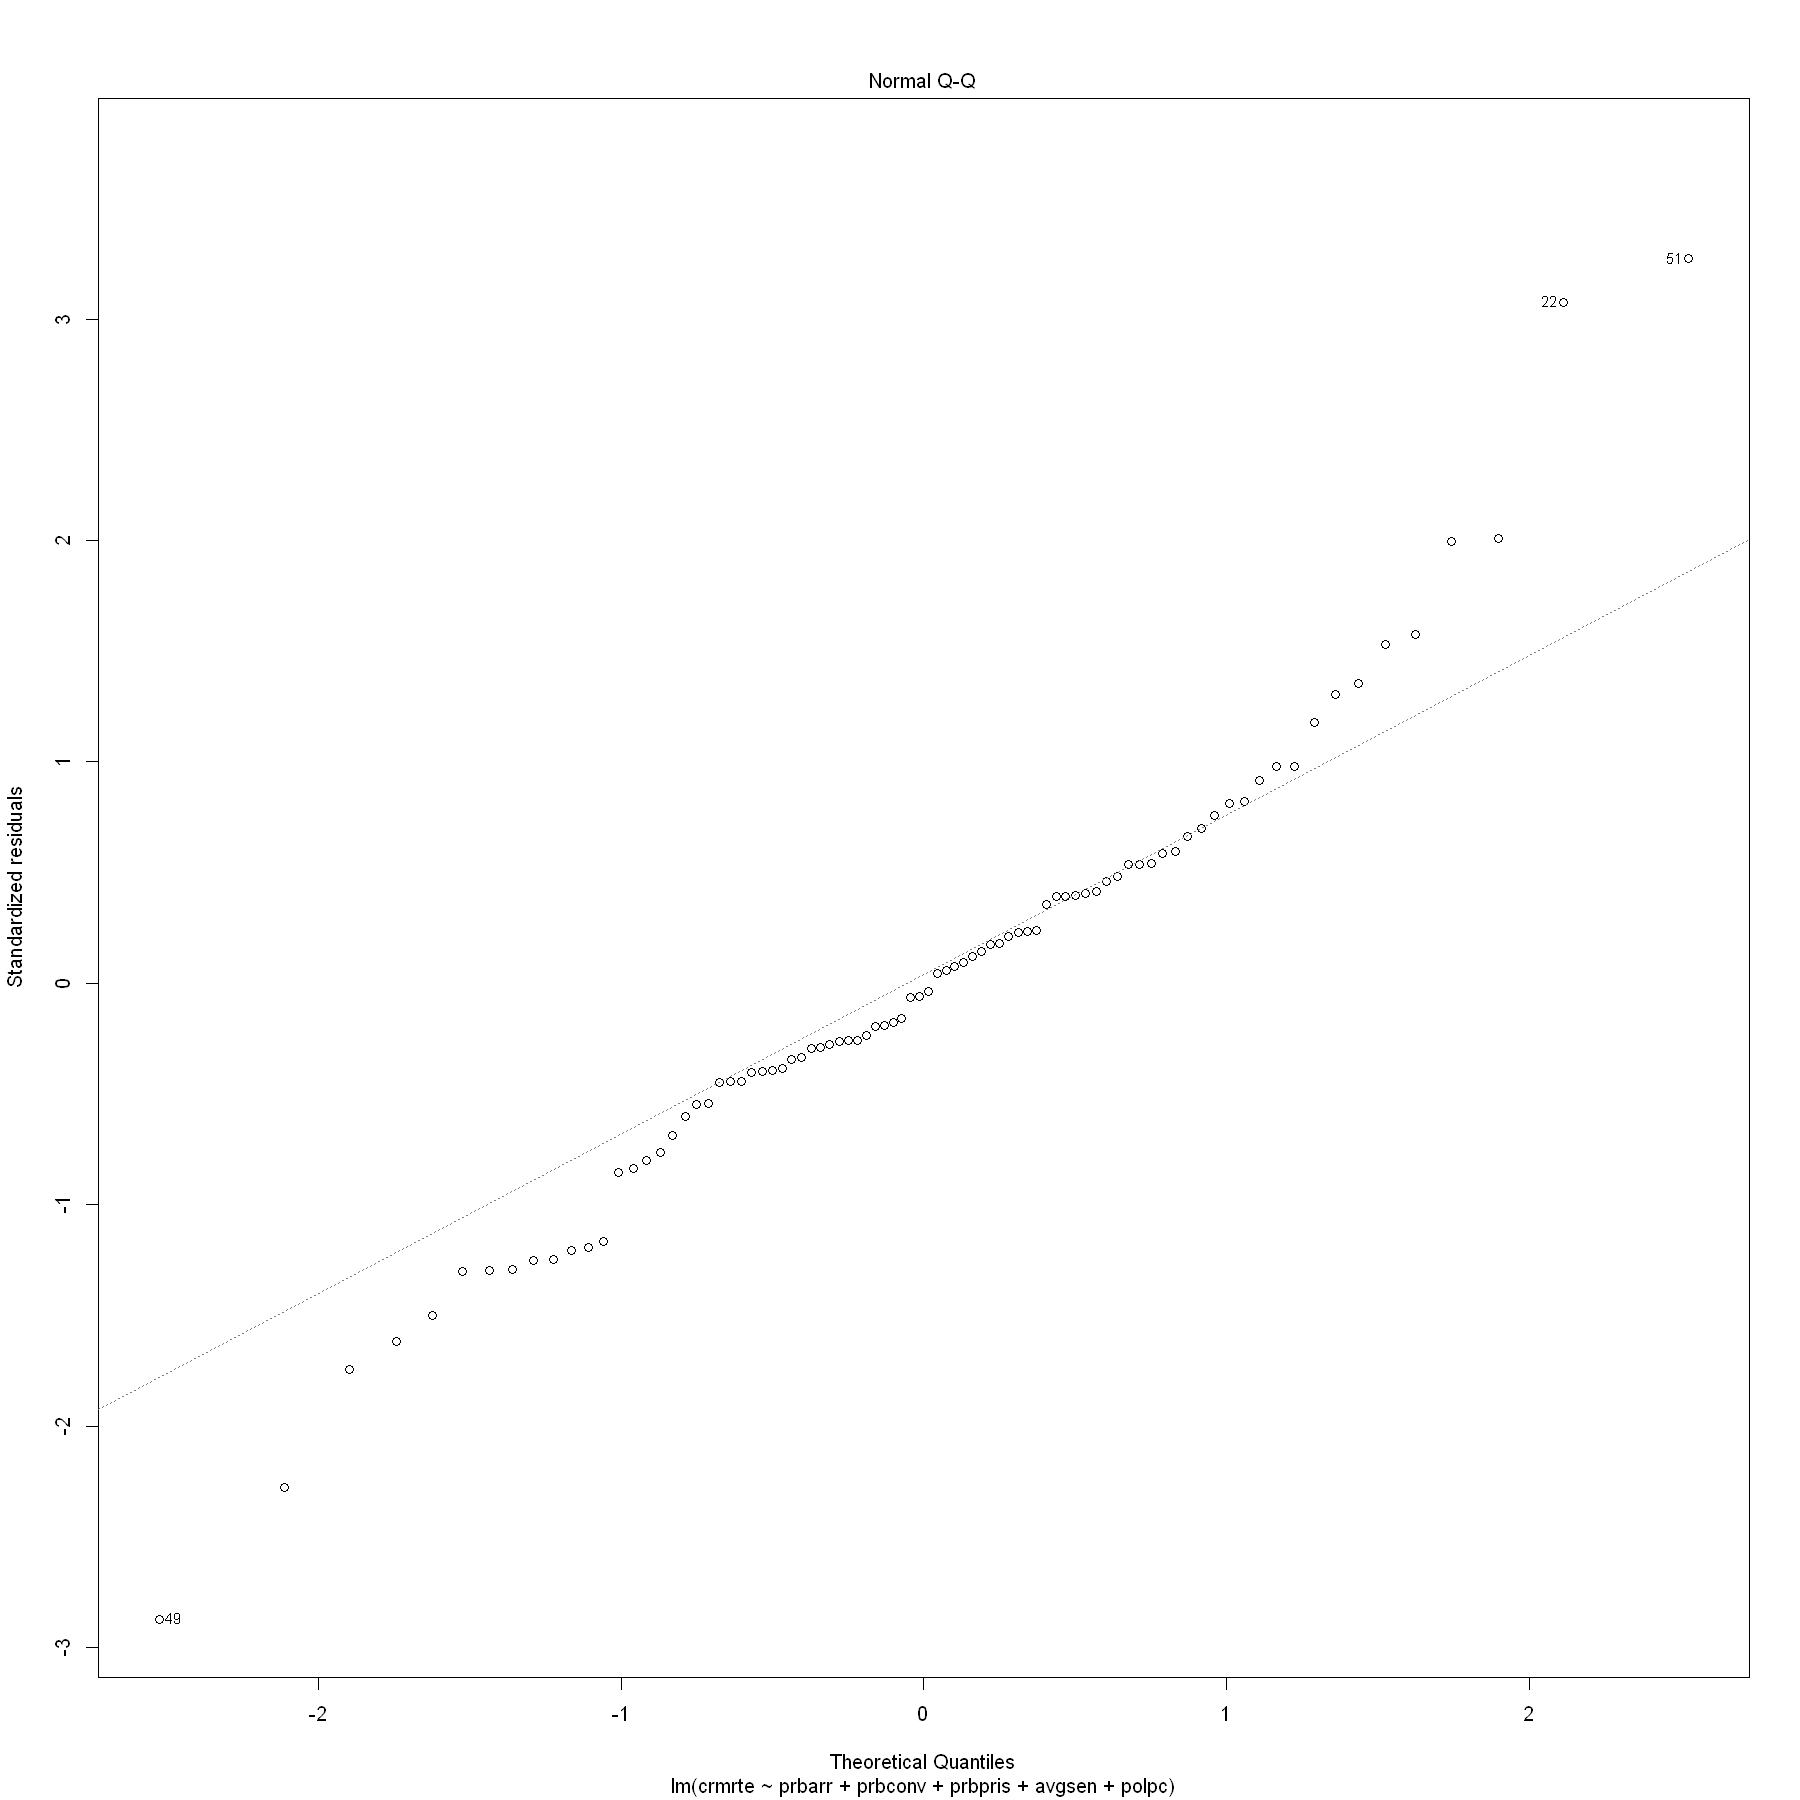

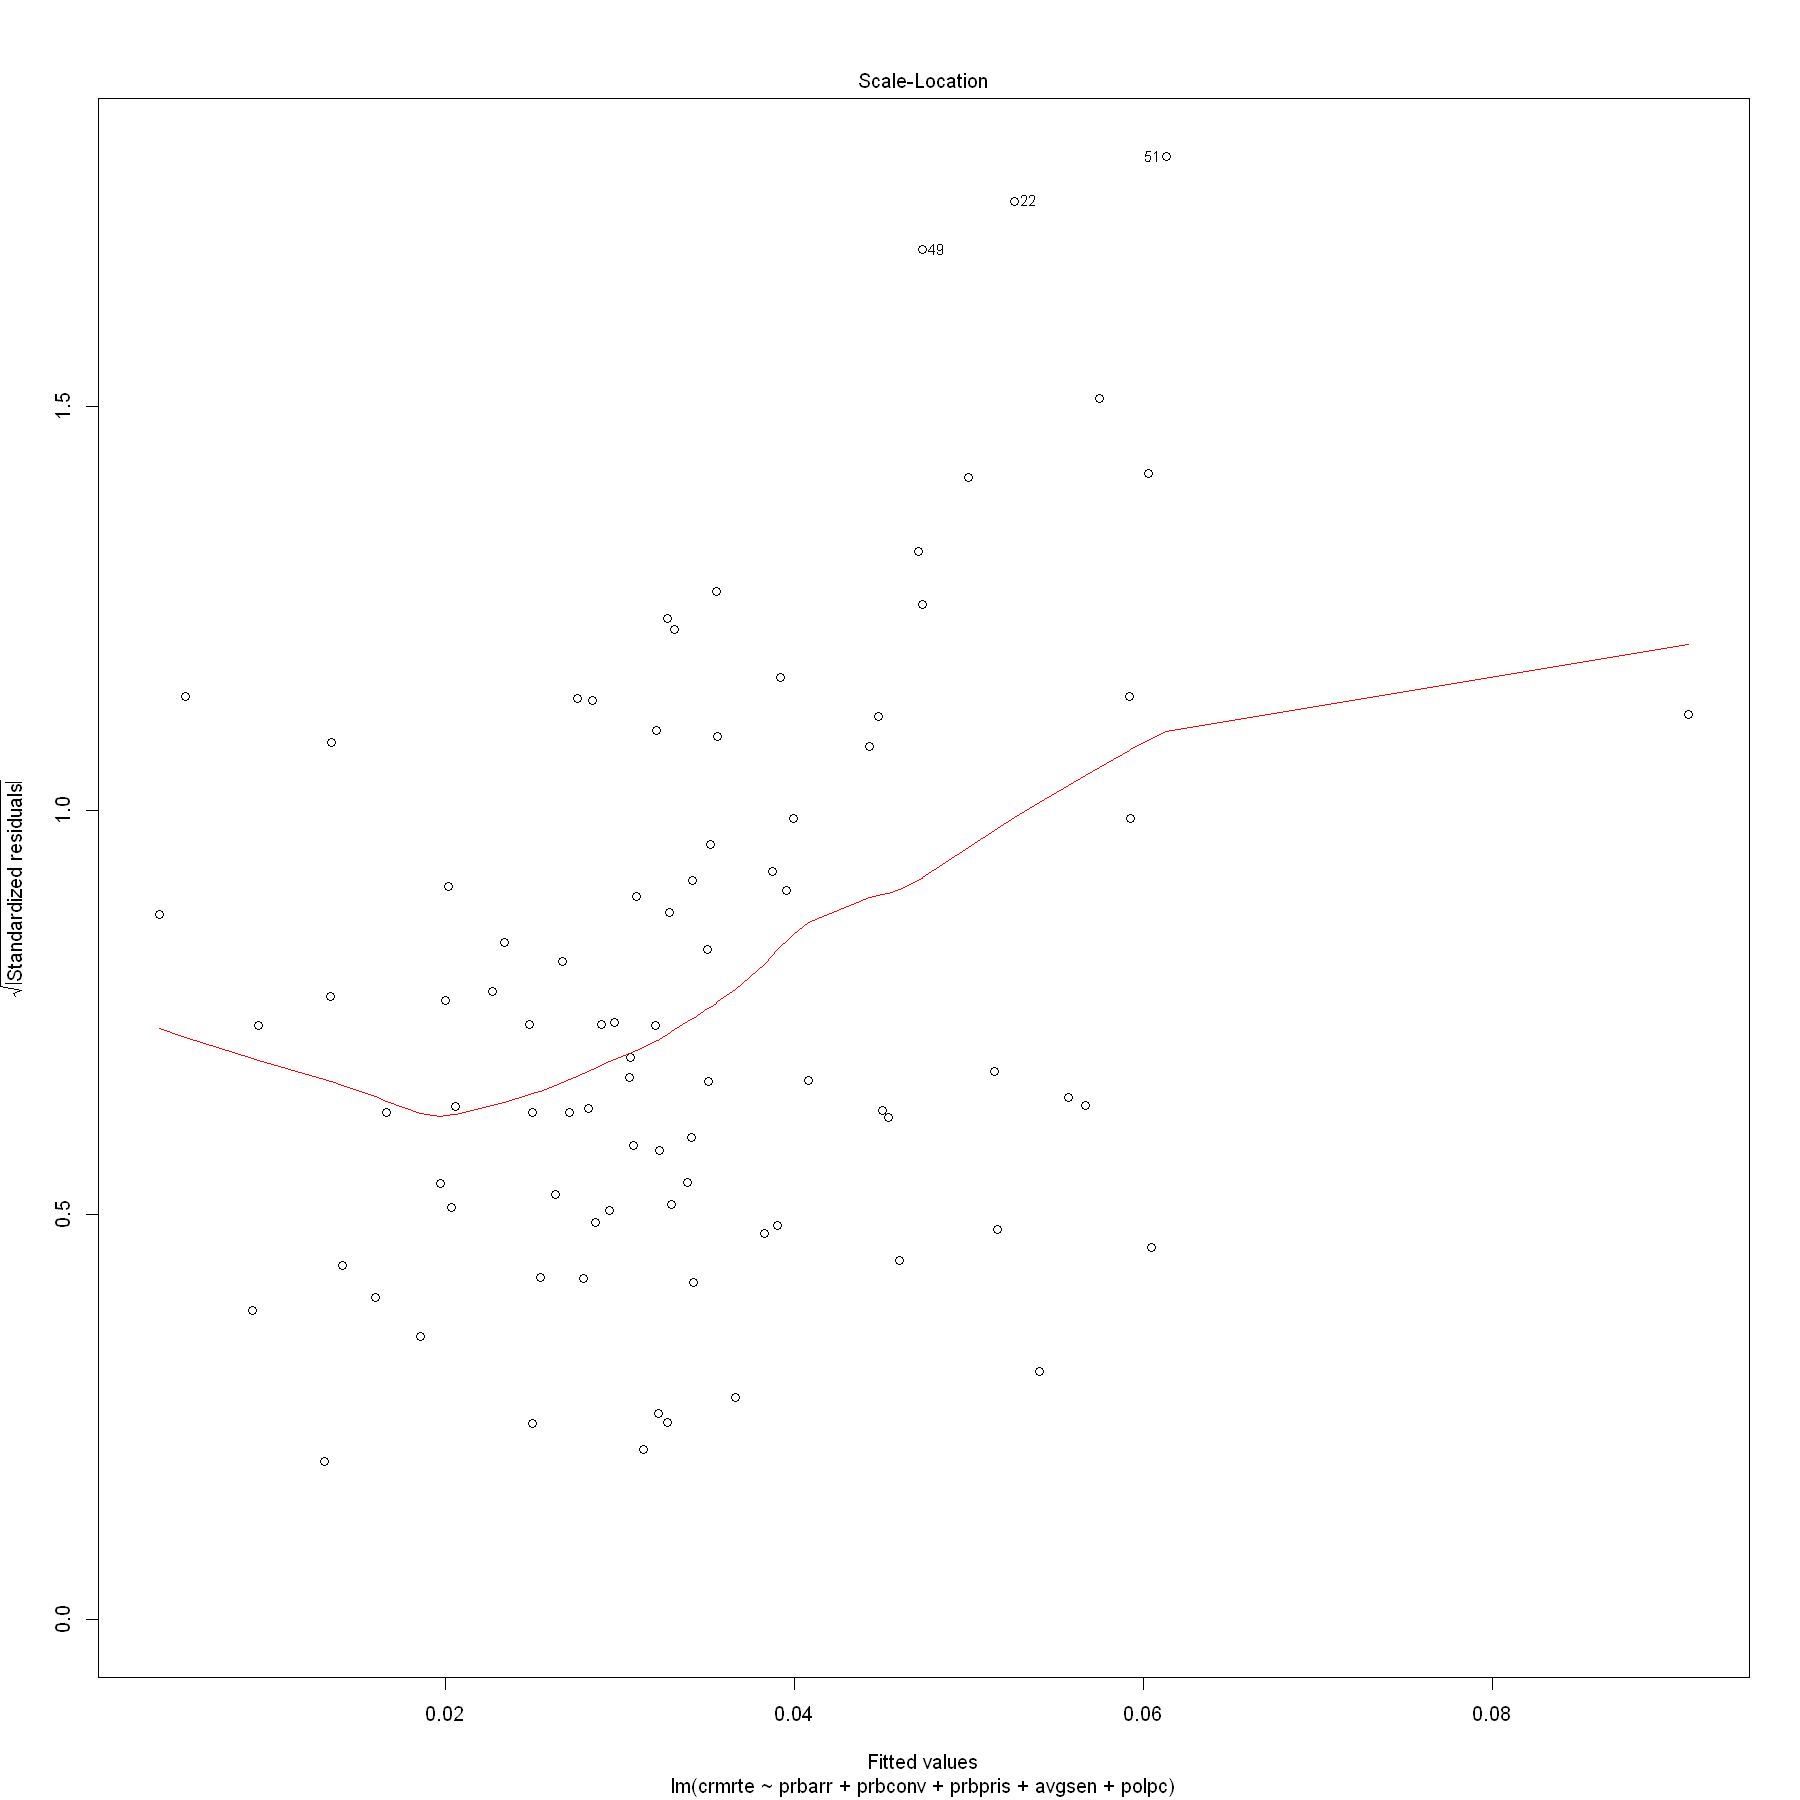

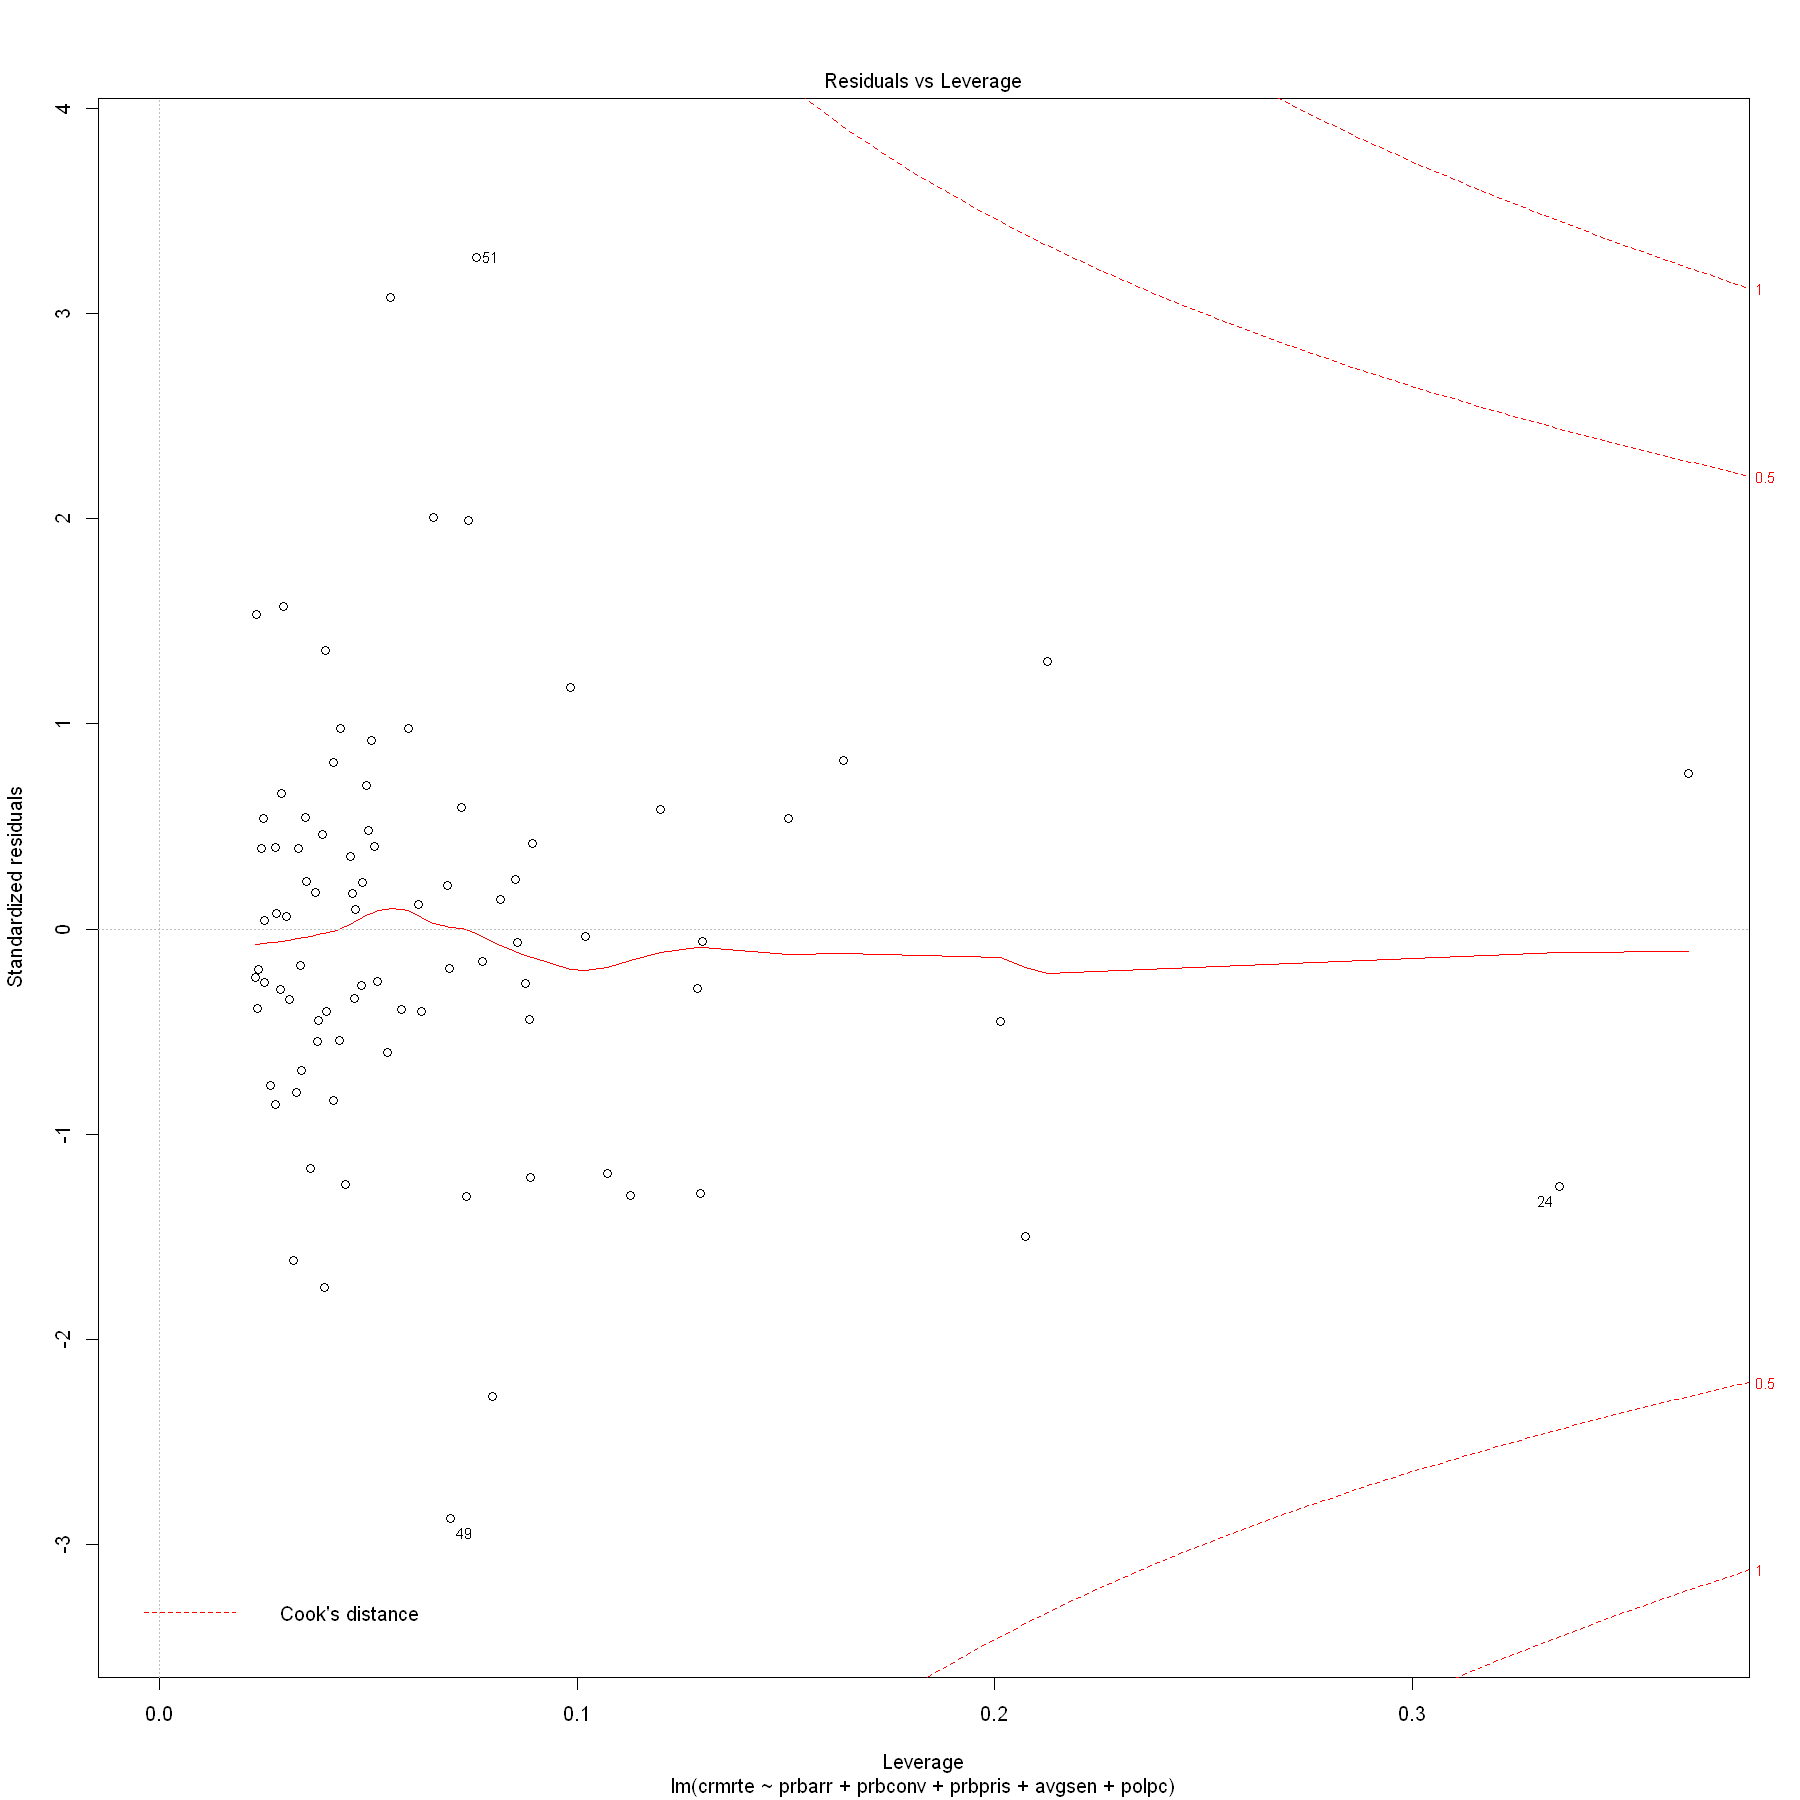

In [44]:
model2 = lm(crmrte ~ prbarr + prbconv + prbpris + avgsen + polpc  , data = filtered_df)
summary(model2)
plot(model2)

**With LOG transform only on the regressand**


Call:
lm(formula = log(crmrte) ~ prbarr + prbconv + prbpris + avgsen + 
    polpc, data = filtered_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12960 -0.19215  0.02466  0.20542  0.56686 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -3.51702    0.35634  -9.870 1.73e-15 ***
prbarr       -1.49516    0.38711  -3.862 0.000227 ***
prbconv      -0.65237    0.12769  -5.109 2.15e-06 ***
prbpris       0.18938    0.48845   0.388 0.699260    
avgsen       -0.01234    0.01507  -0.819 0.415373    
polpc       525.56187   86.44429   6.080 3.89e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3305 on 80 degrees of freedom
Multiple R-squared:  0.6192,	Adjusted R-squared:  0.5954 
F-statistic: 26.02 on 5 and 80 DF,  p-value: 1.674e-15


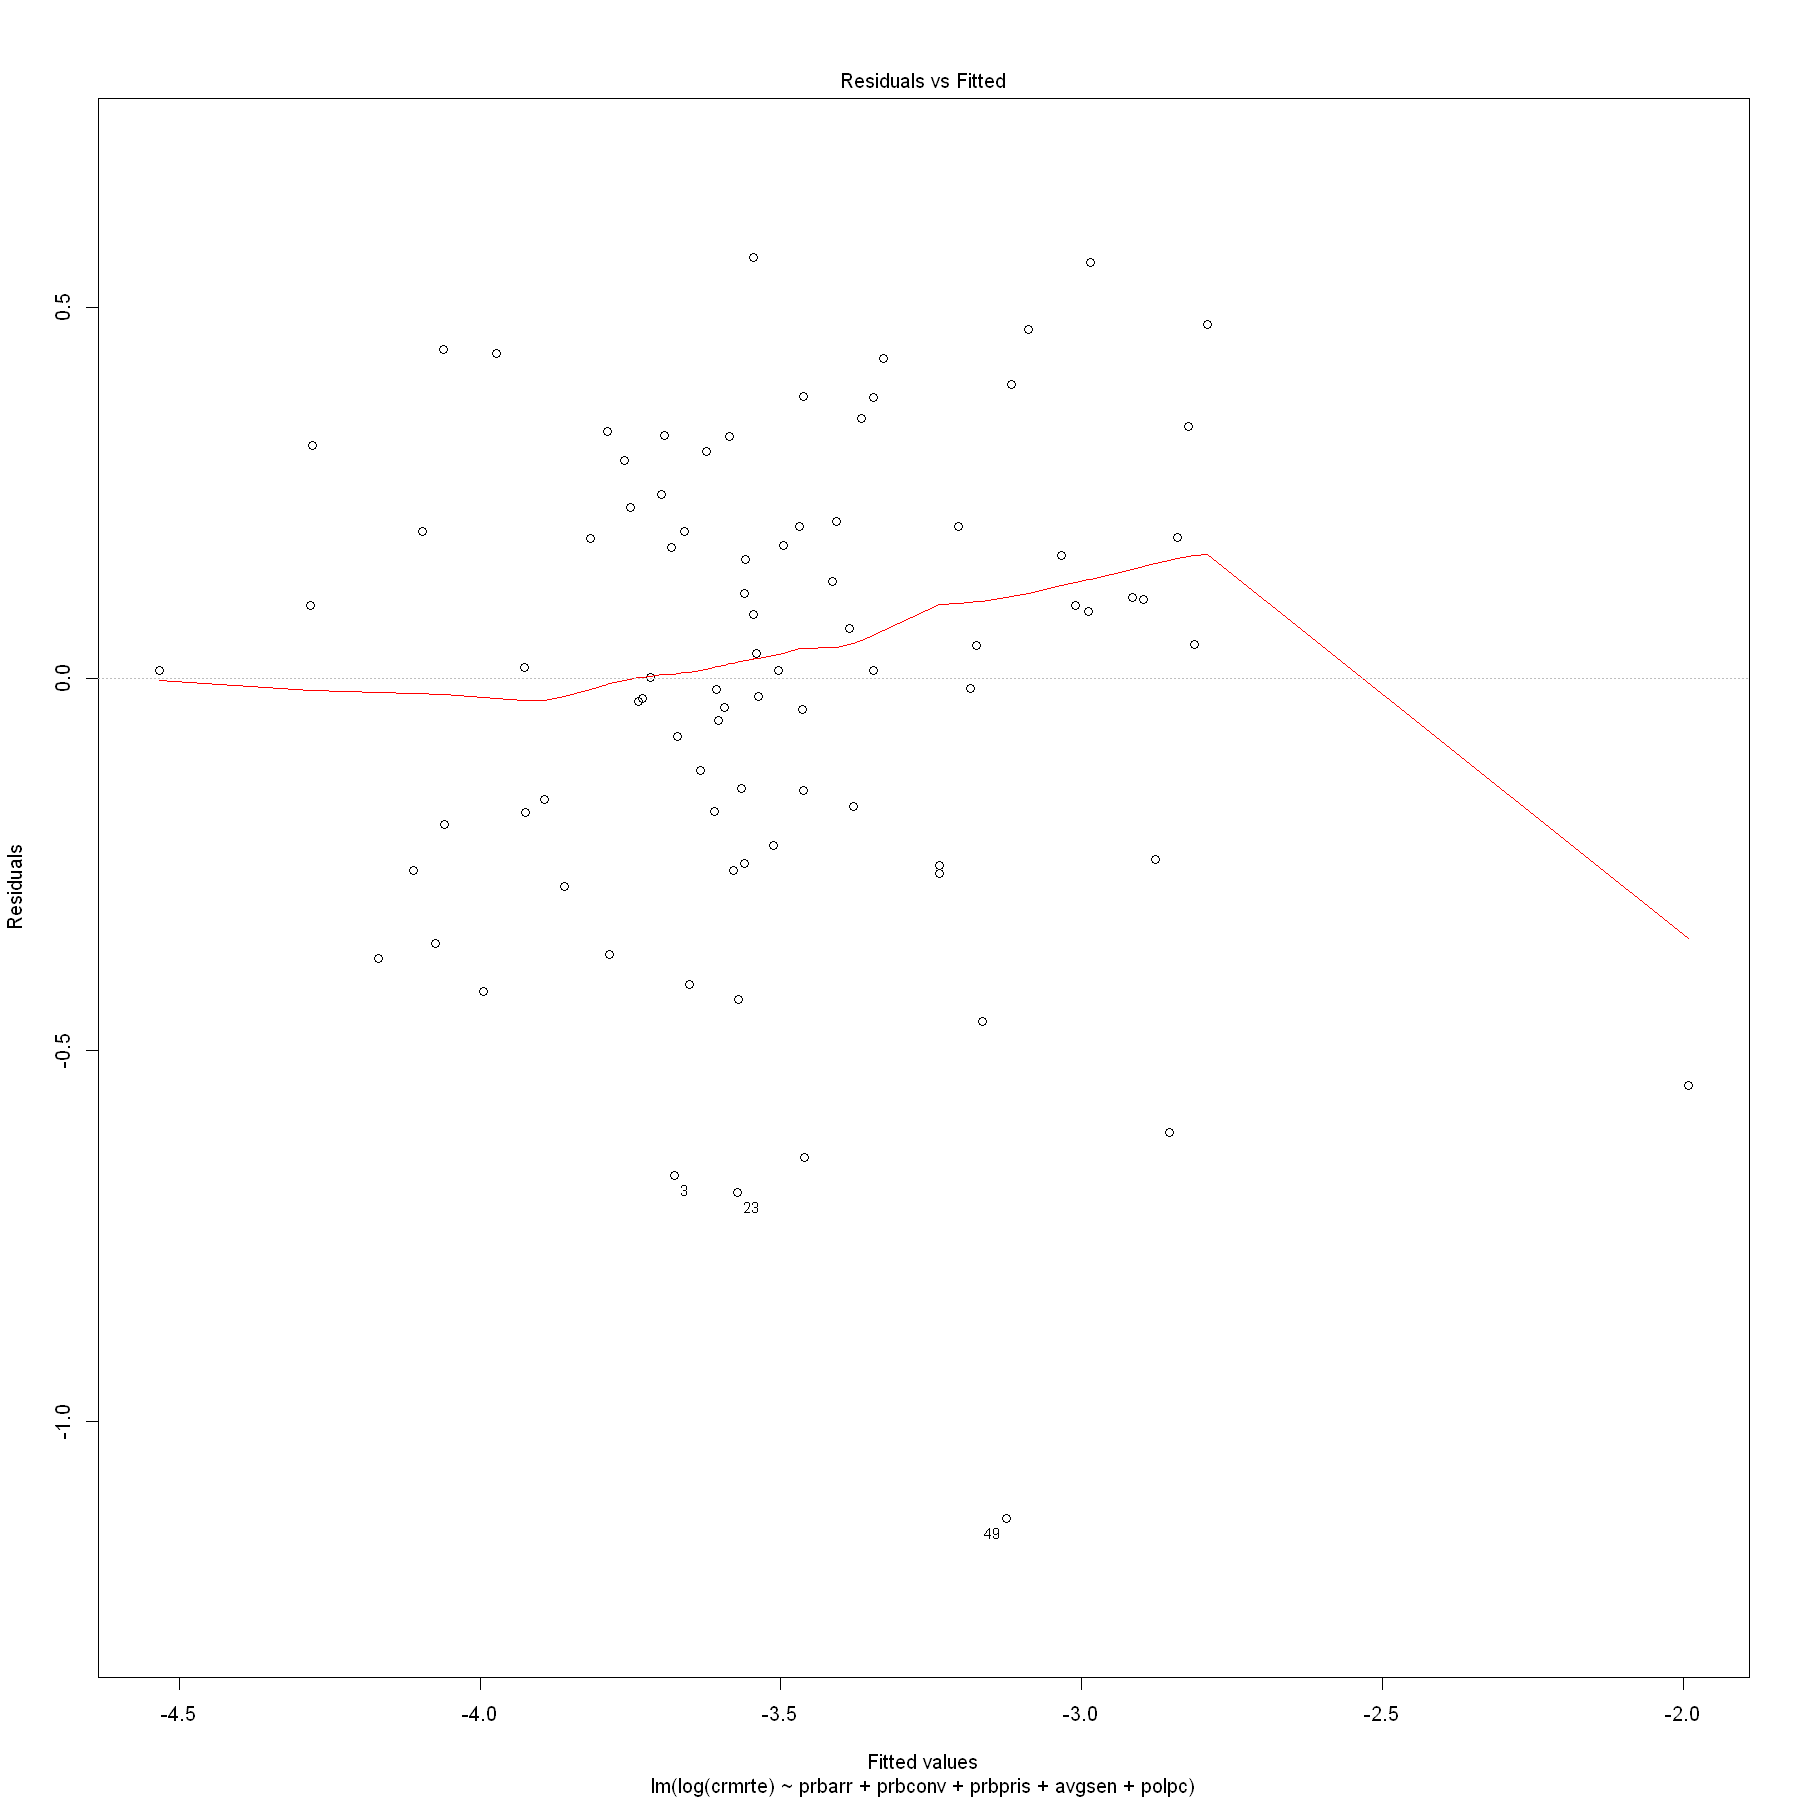

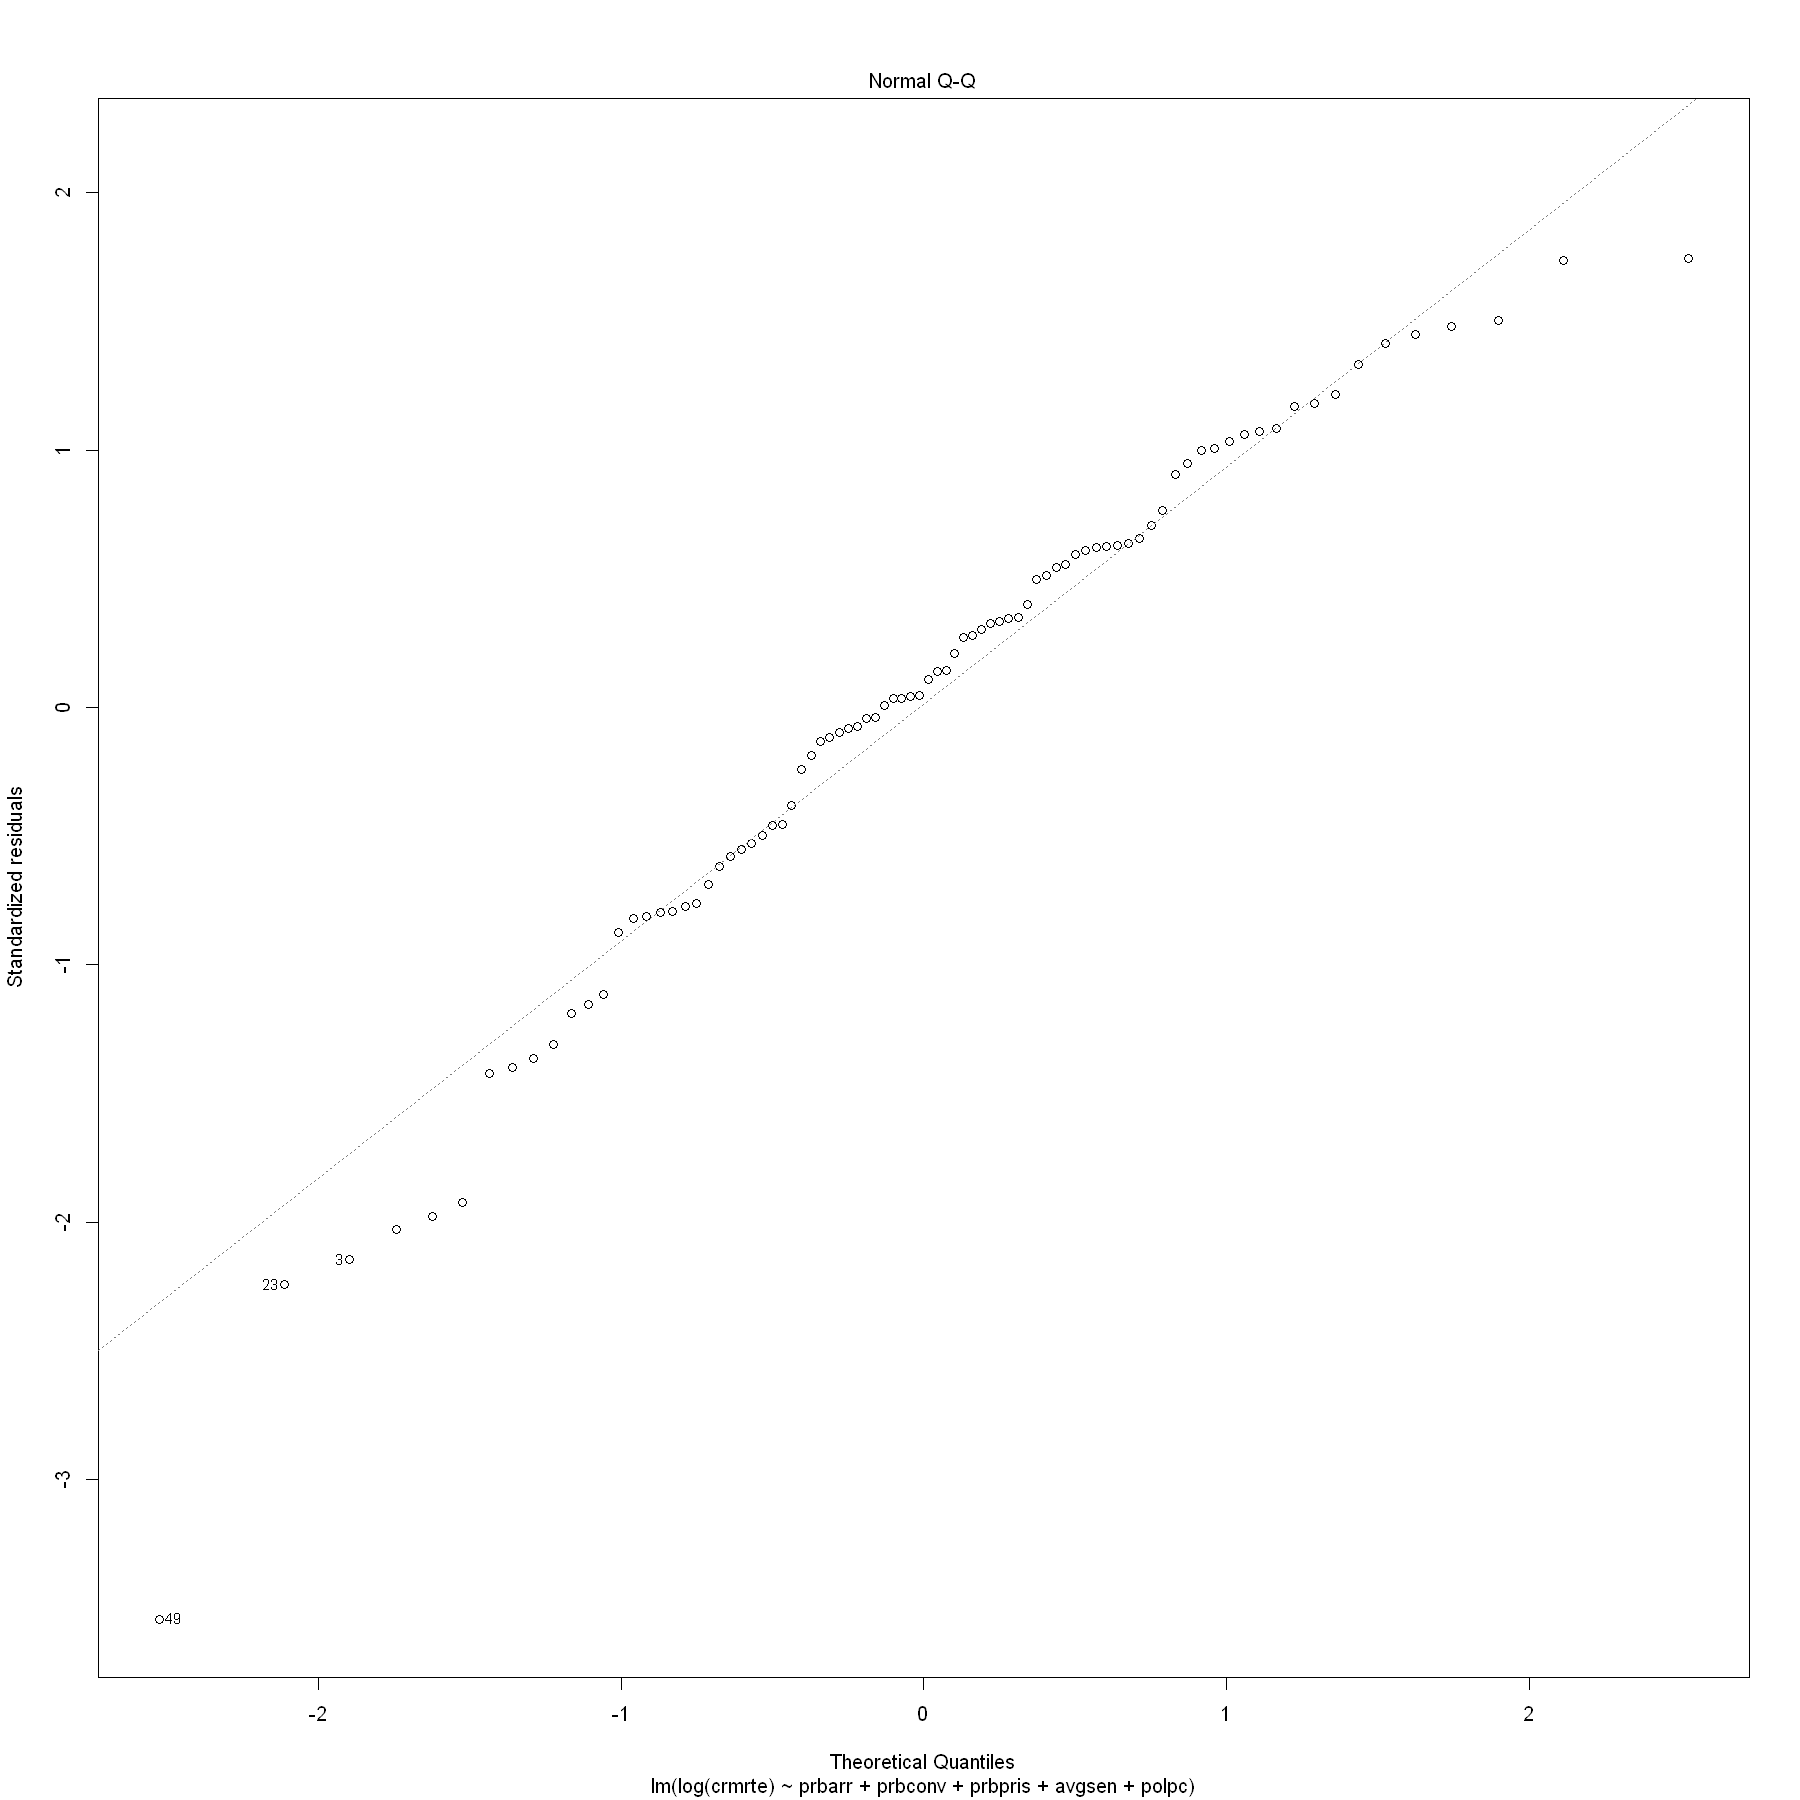

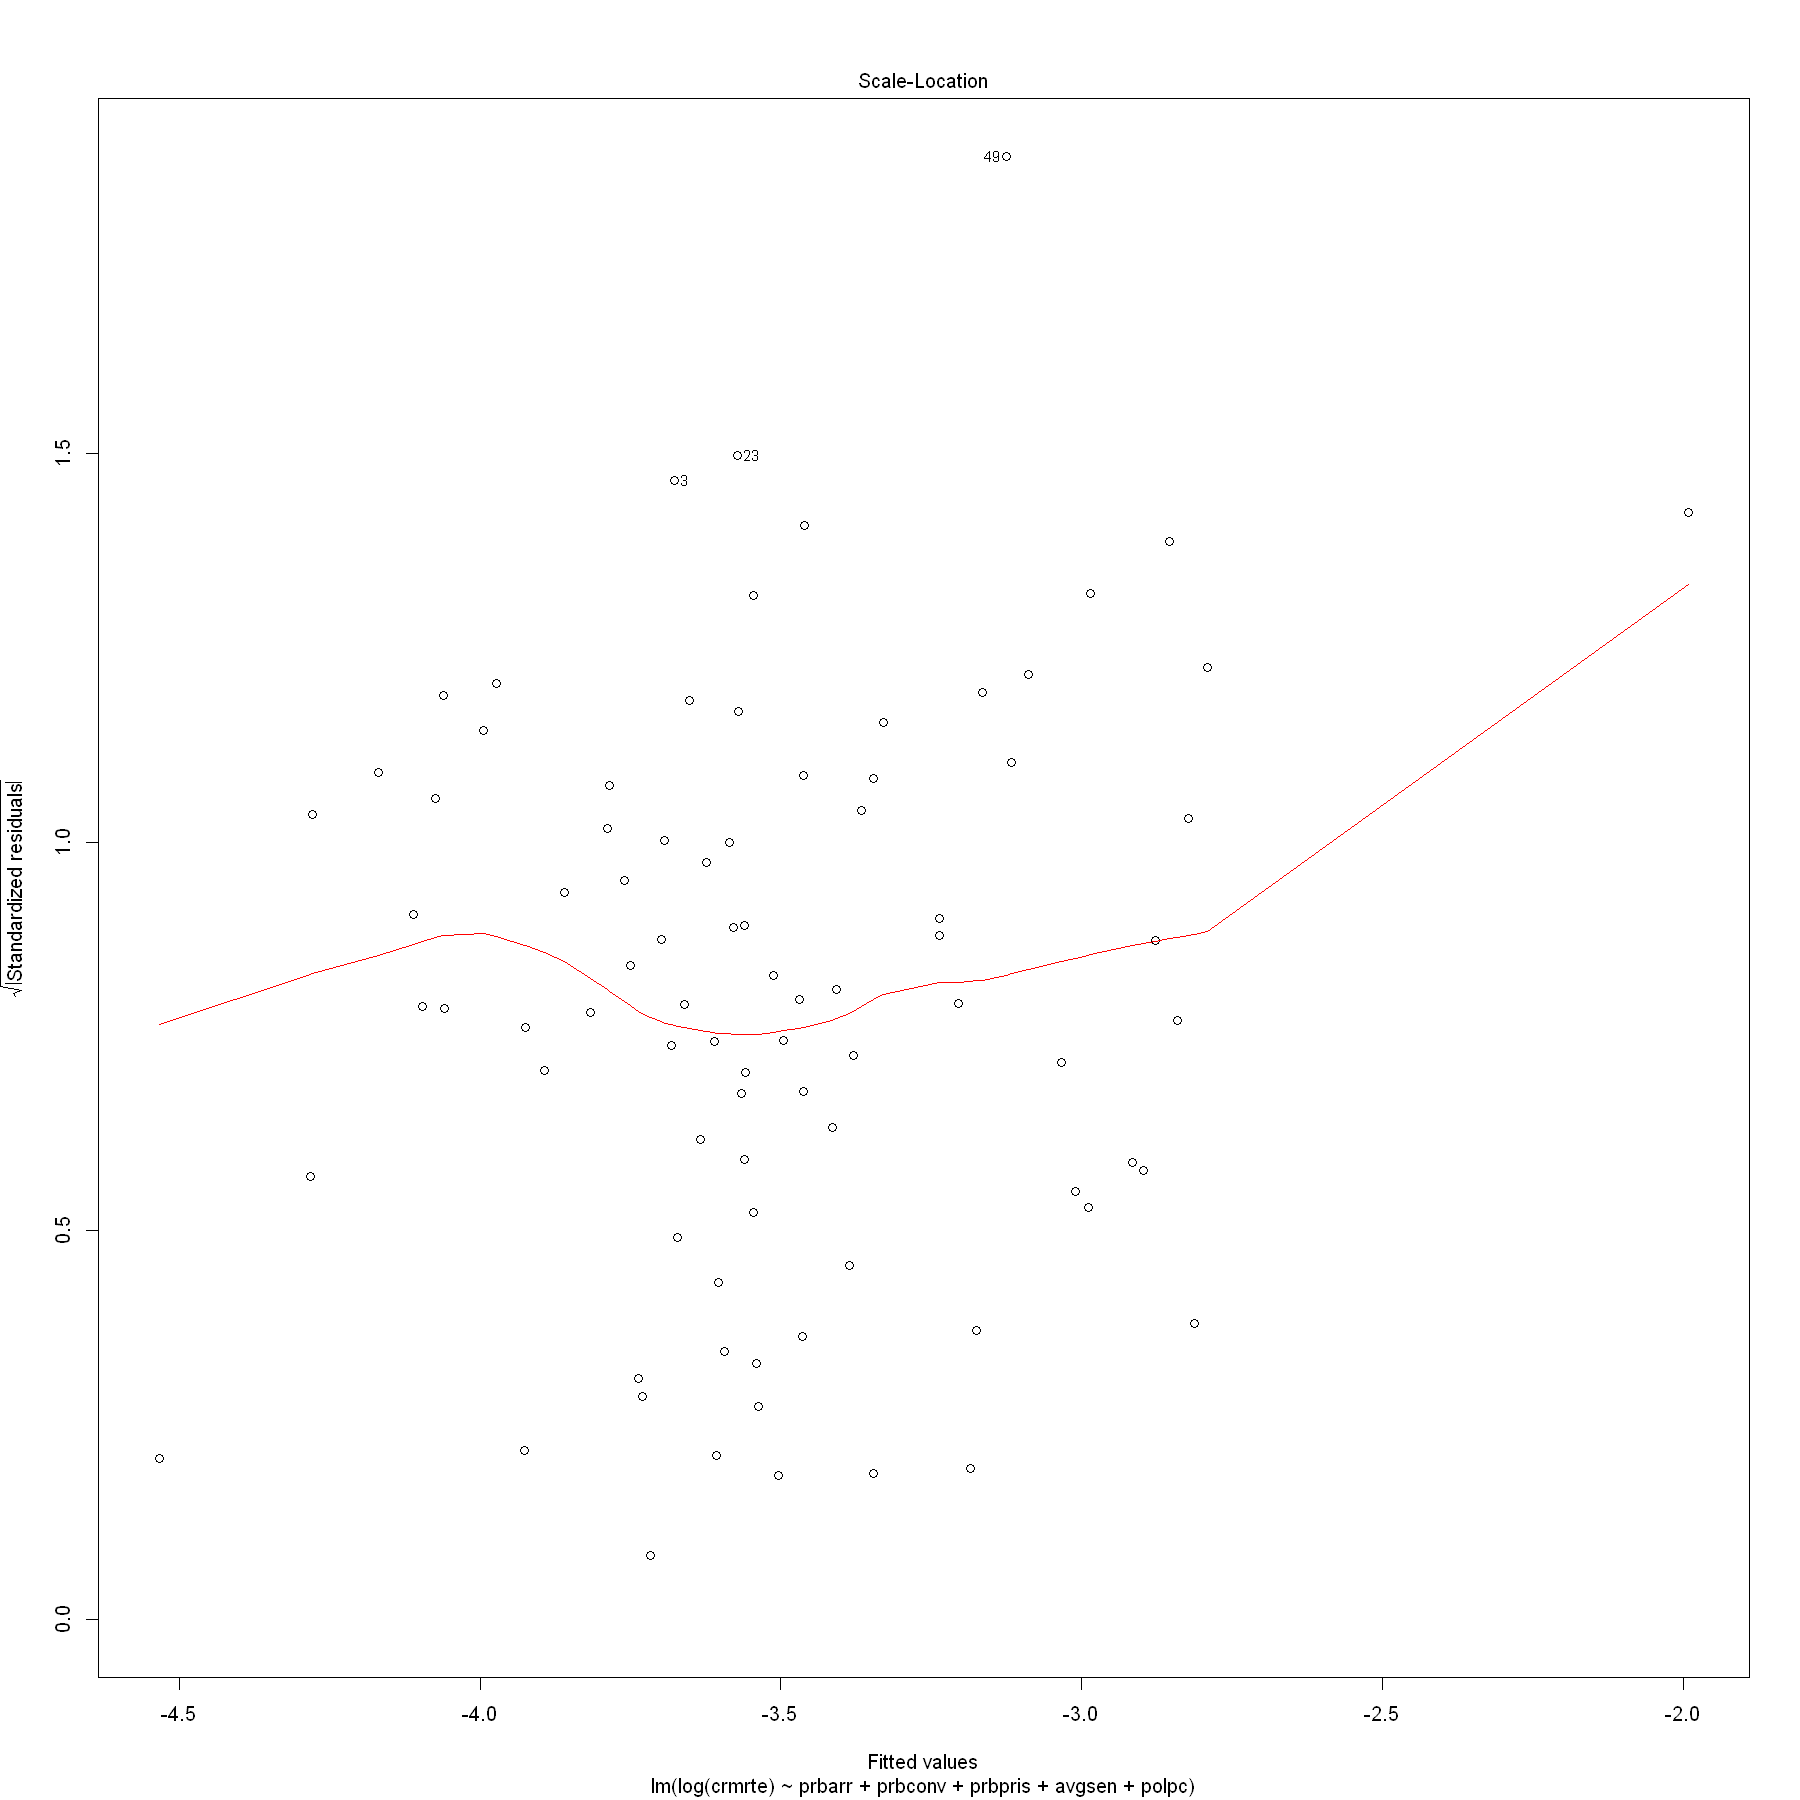

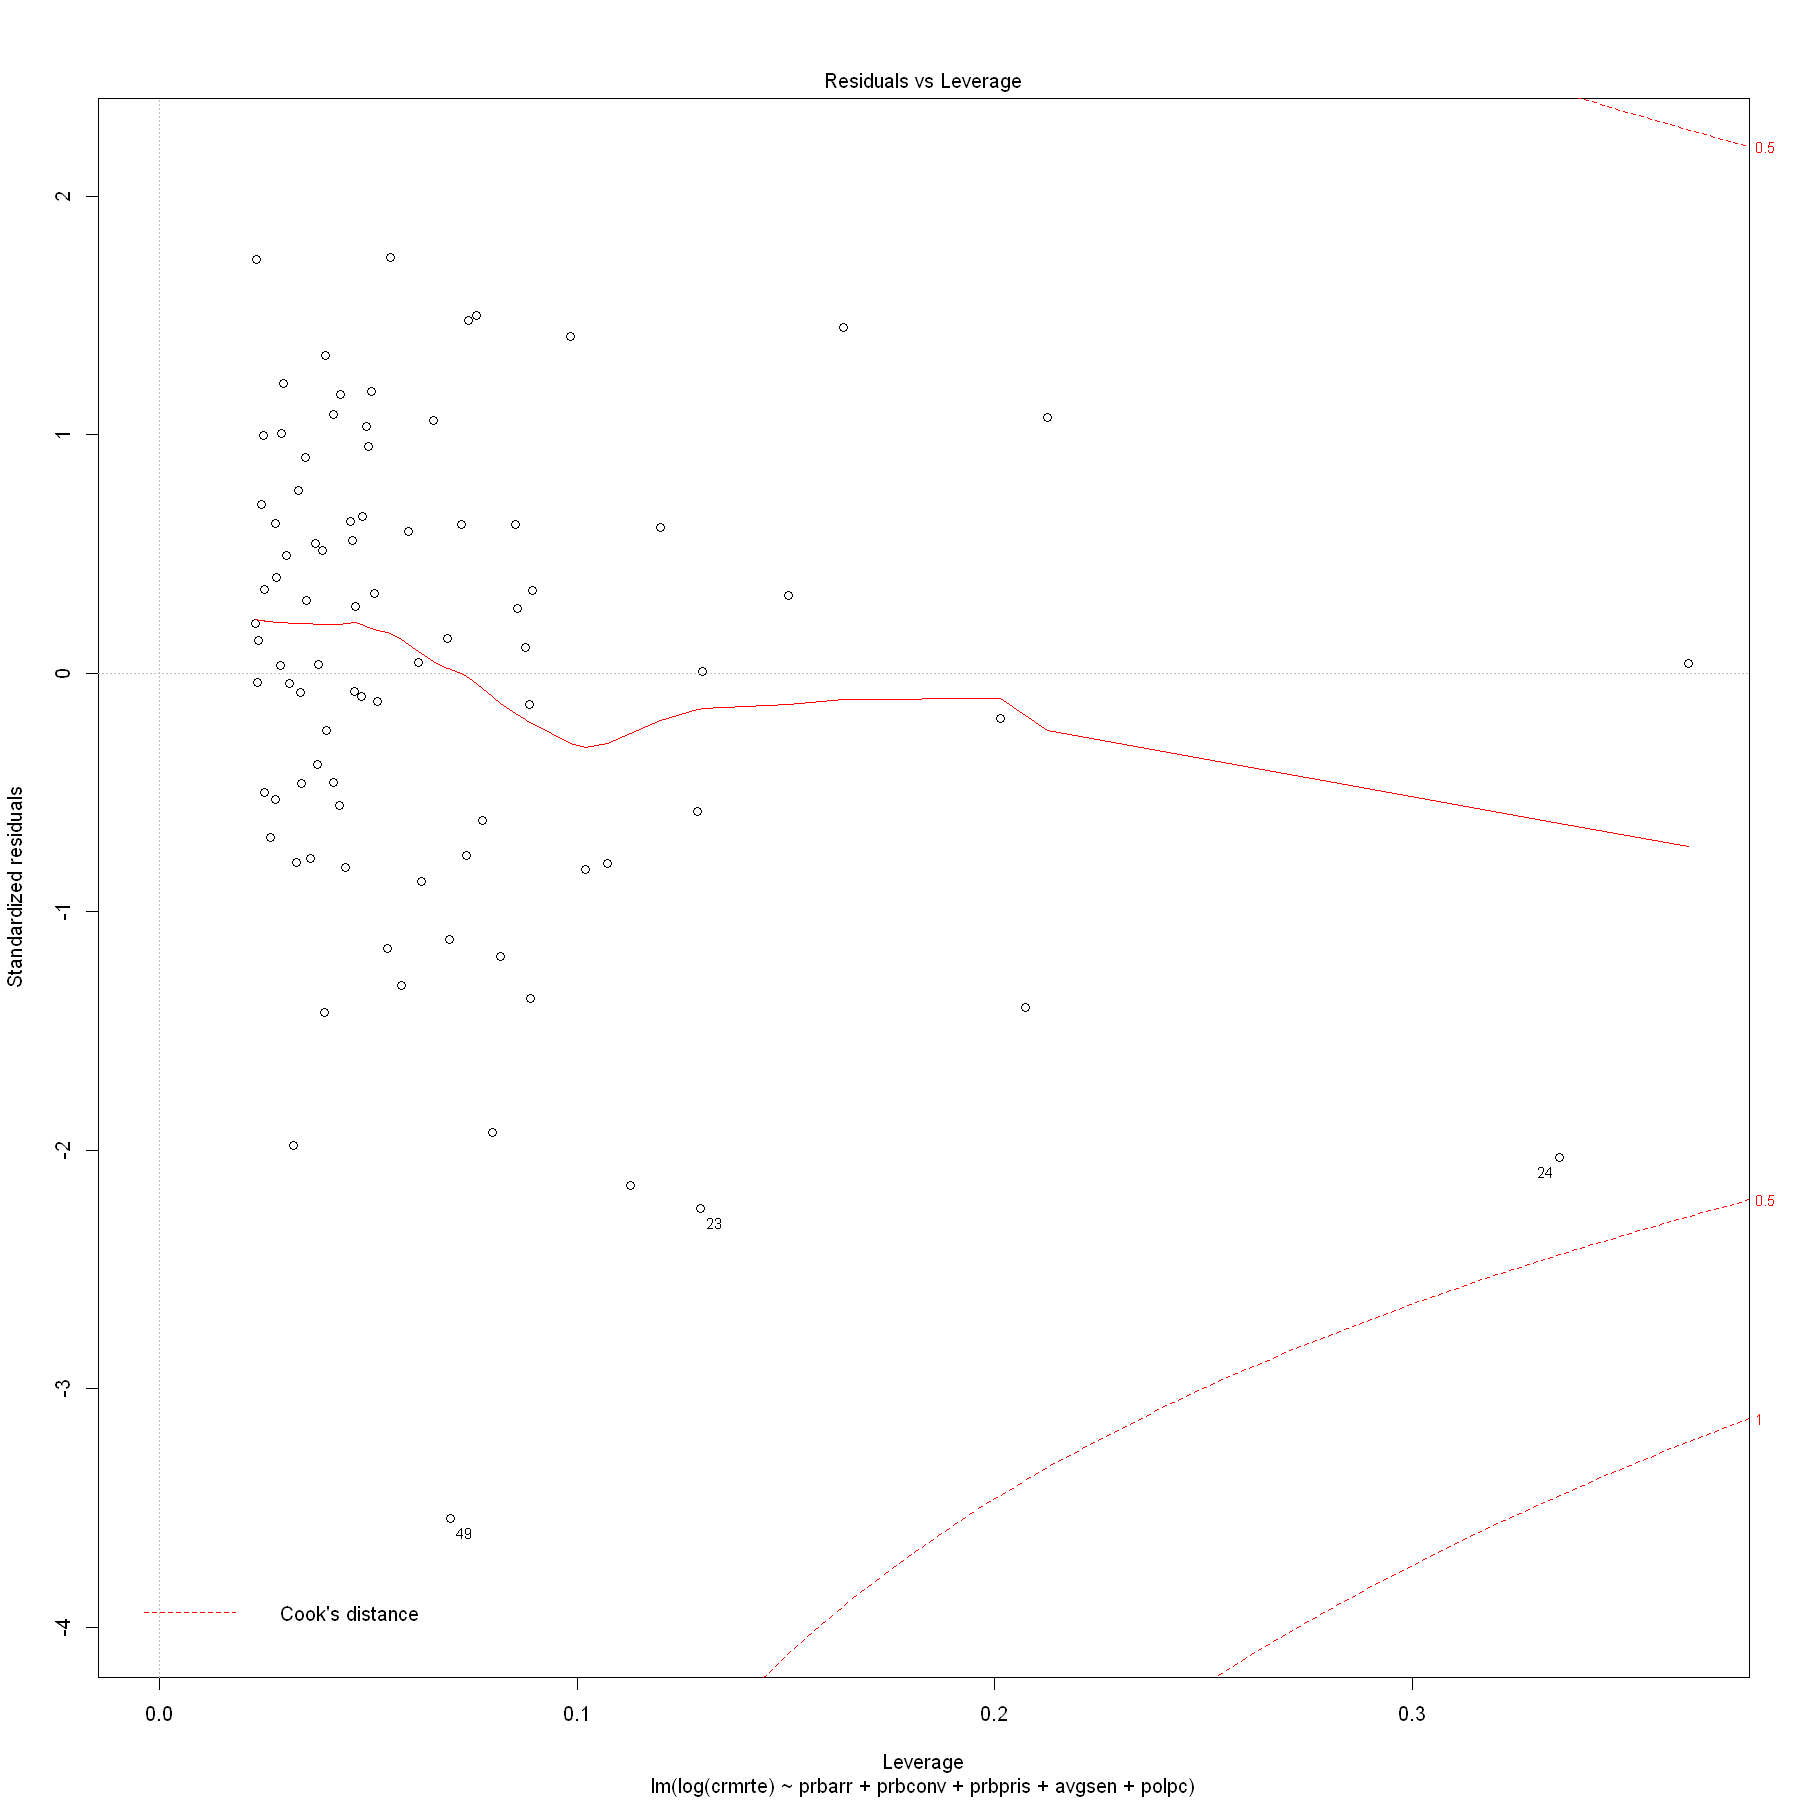

In [45]:
model2_log1 = lm(log(crmrte) ~ prbarr + prbconv + prbpris + avgsen + polpc, data = filtered_df)
summary(model2_log1)
plot(model2_log1)

**With LOG transform on the regressand and independent variables**


Call:
lm(formula = log(crmrte) ~ prbarr + log(prbconv) + prbpris + 
    avgsen + log(polpc), data = filtered_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.19511 -0.20125  0.02904  0.25093  0.55170 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.07386    1.06198   2.894 0.004893 ** 
prbarr       -1.28289    0.38826  -3.304 0.001426 ** 
log(prbconv) -0.32106    0.08474  -3.789 0.000292 ***
prbpris       0.17492    0.49844   0.351 0.726558    
avgsen       -0.01655    0.01543  -1.073 0.286586    
log(polpc)    0.98012    0.15106   6.488 6.71e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3378 on 80 degrees of freedom
Multiple R-squared:  0.6023,	Adjusted R-squared:  0.5775 
F-statistic: 24.24 on 5 and 80 DF,  p-value: 9.119e-15


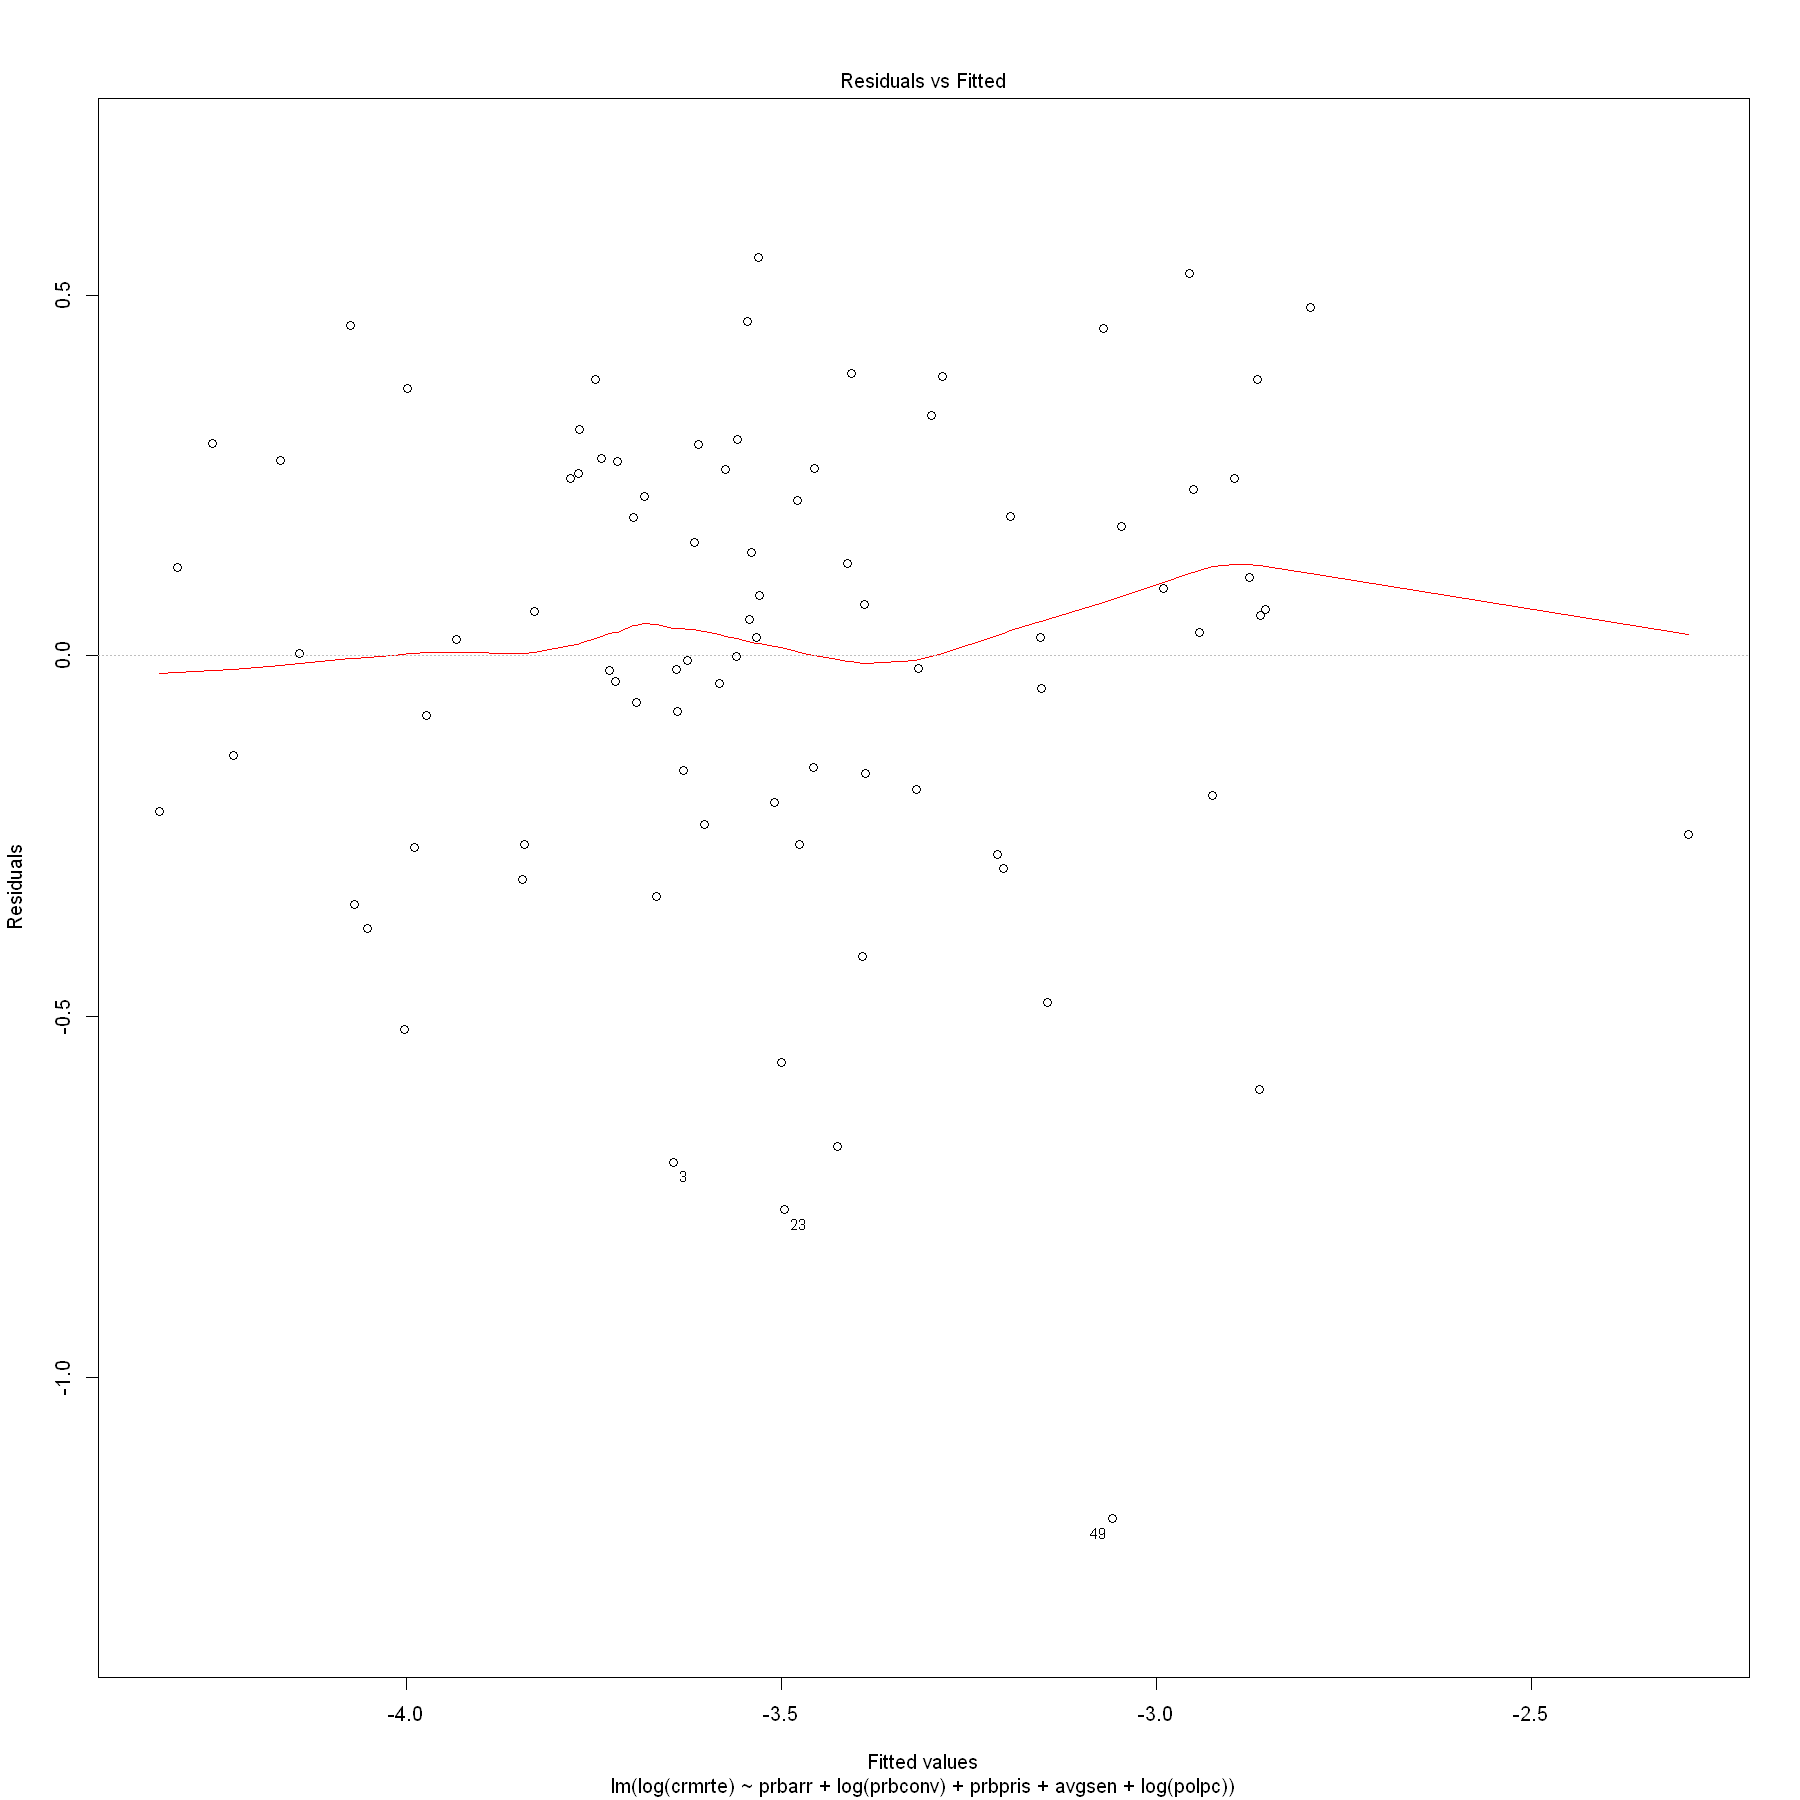

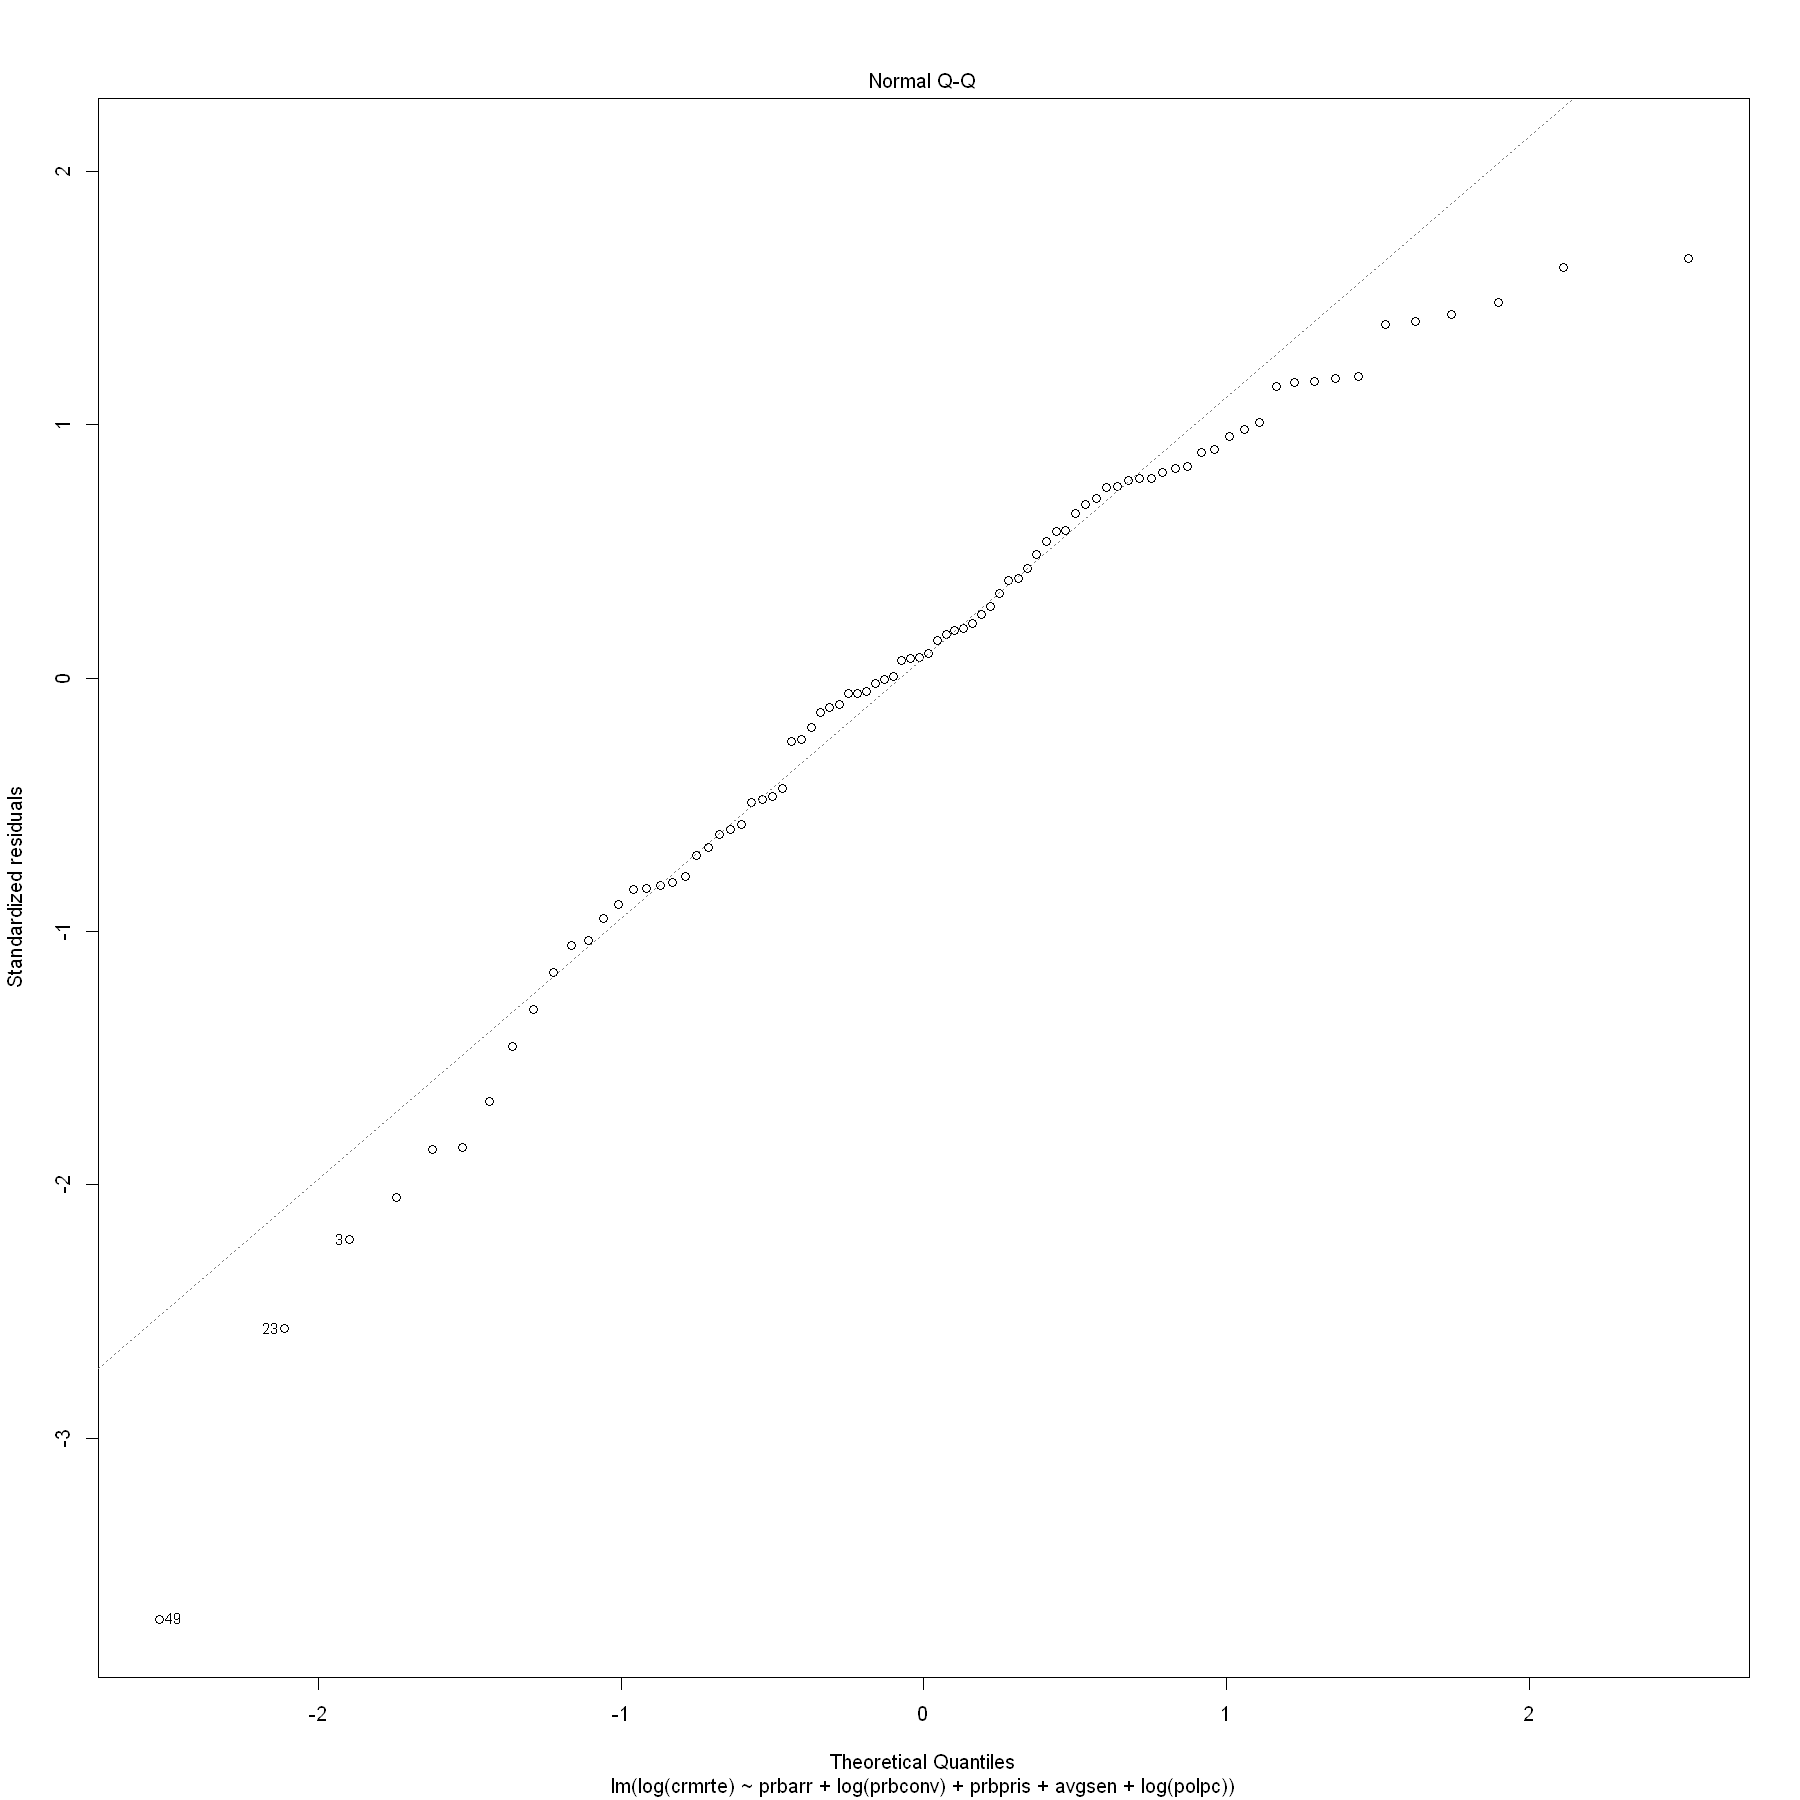

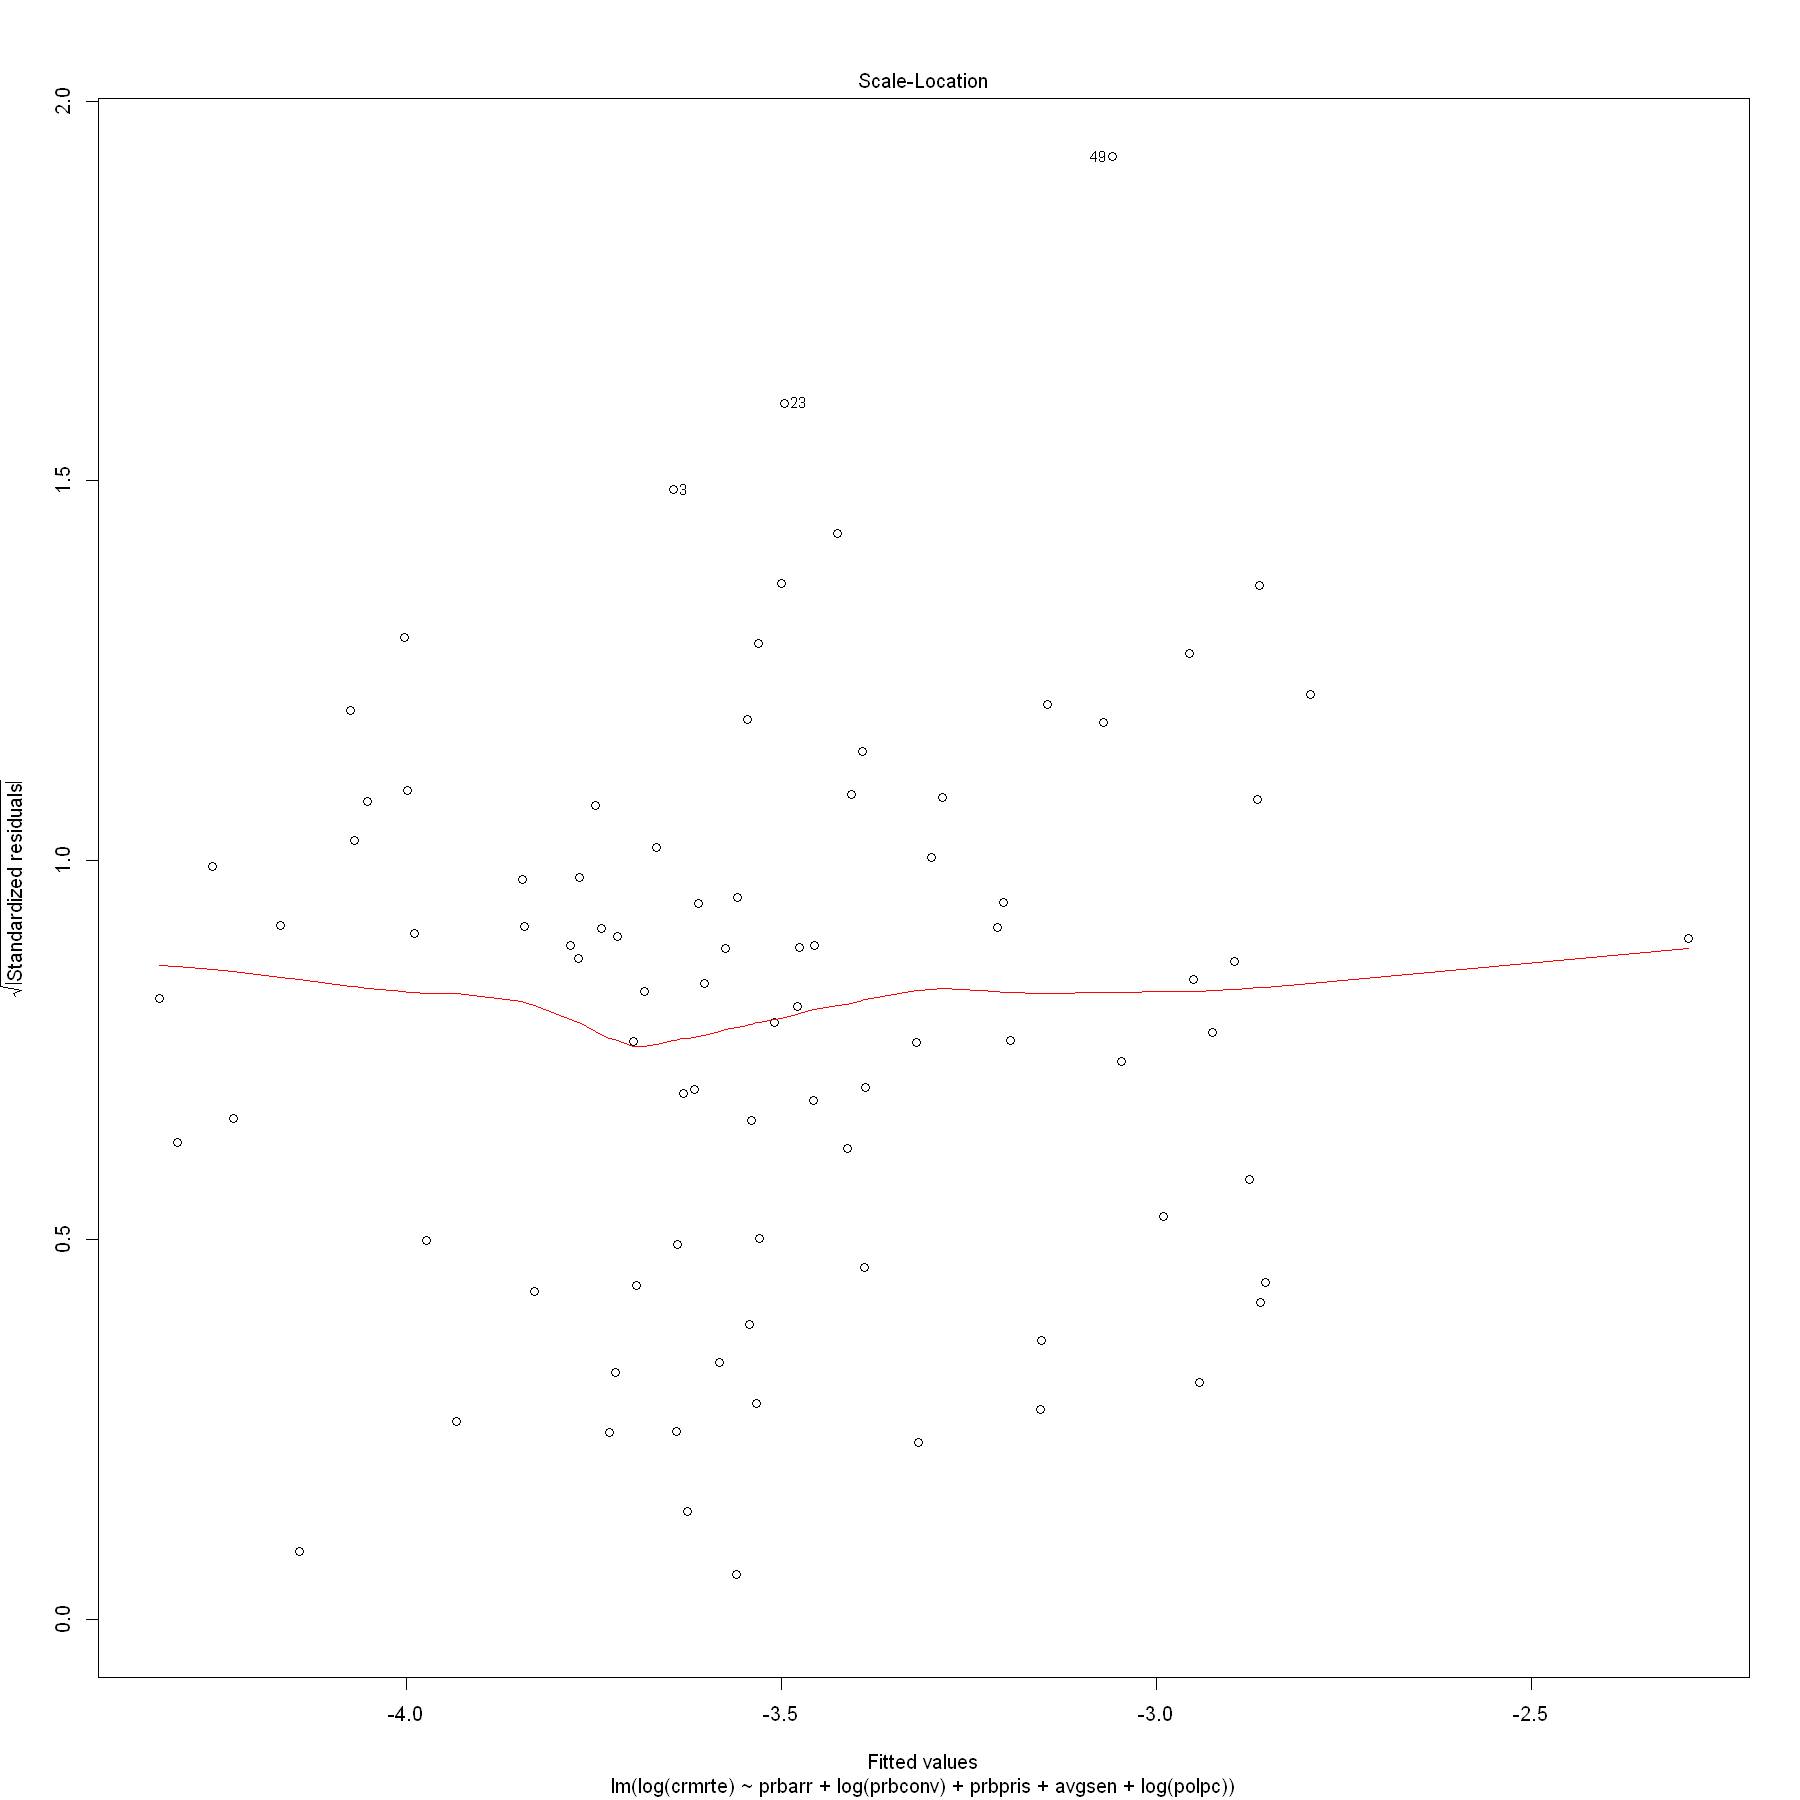

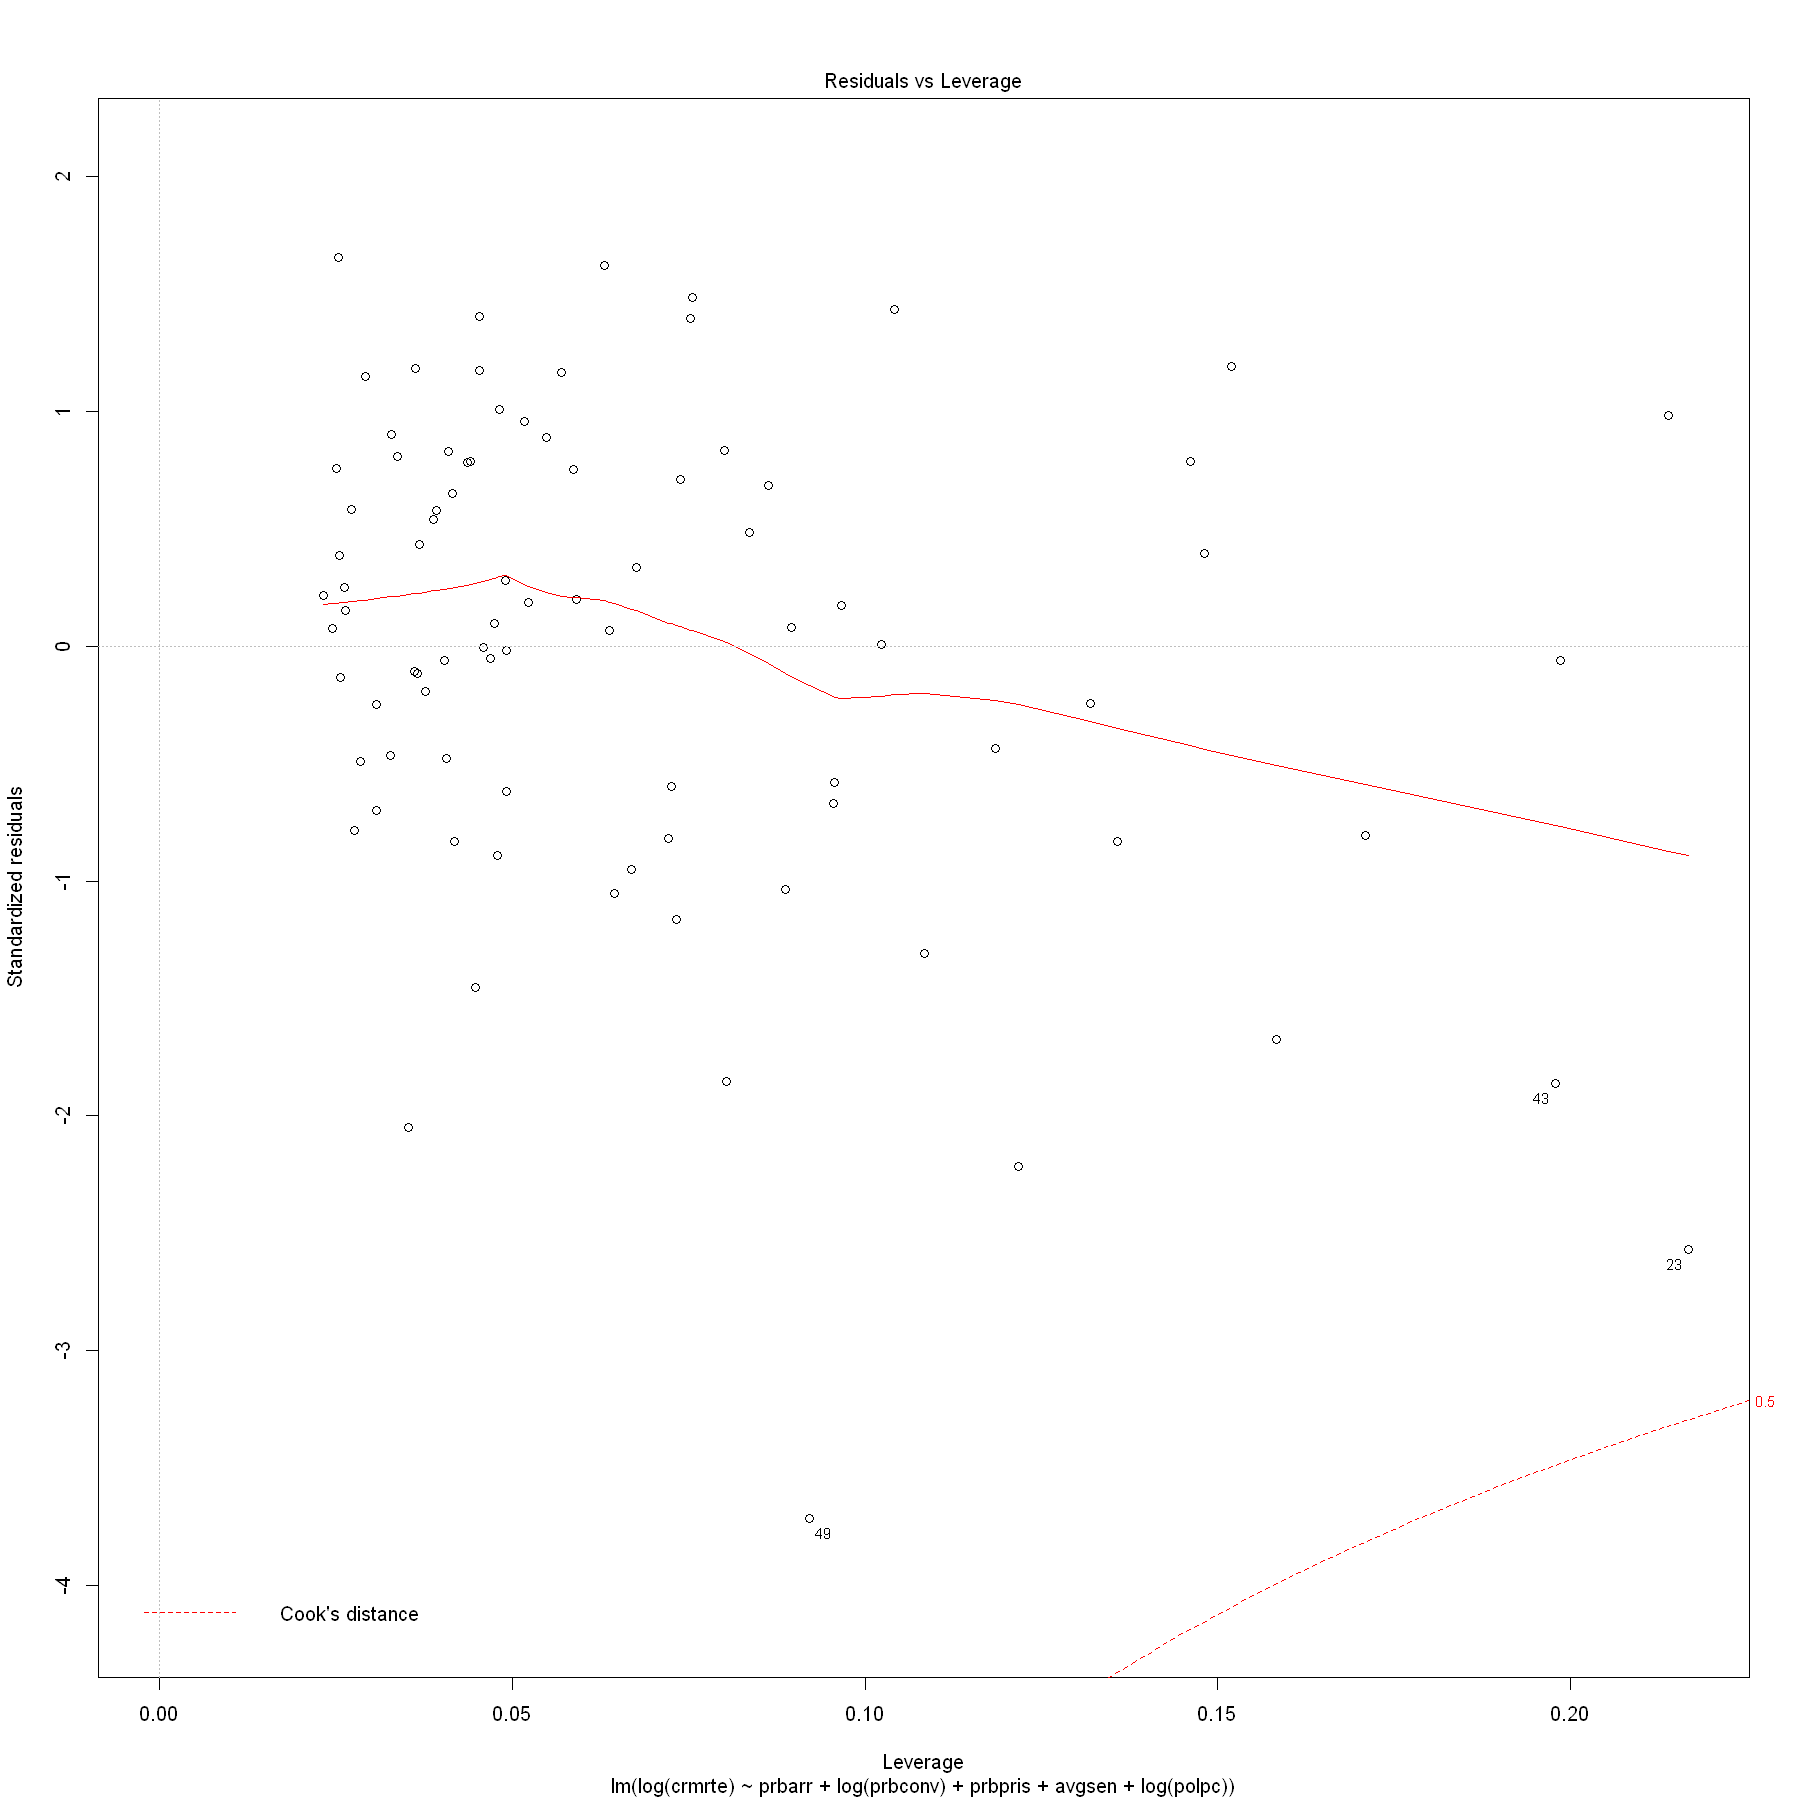

In [46]:
model2_log2 = lm(log(crmrte) ~ prbarr + log(prbconv) + prbpris + avgsen + log(polpc), data = filtered_df)
summary(model2_log2)
plot(model2_log2)

### Model 3: Robustness Check Model
This final model utilizes most of the variables within the dataset. The focus of this model is to illustrate the robustnes of the previous model. This model uses the following variables:


variable  | label
----------|------
1    county|               county identifier
2      year|                            1987
3    crmrte|     crimes committed per person
4    prbarr|         'probability' of arrest
5   prbconv|     'probability' of conviction
6   prbpris| 'probability' of prison sentence
7    avgsen|             avg. sentence, days
8     polpc|               police per capita
9   density|             people per sq. mile
10    taxpc|          tax revenue per capita
11     west|           =1 if in western N.C.
12  central|           =1 if in central N.C.
13    urban|                   =1 if in SMSA
14 pctmin80|            perc. minority, 1980
15     wcon|       weekly wage, construction
16     wtuc|    wkly wge, trns, util, commun
17     wtrd| wkly wge, whlesle, retail trade
18     wfir|    wkly wge, fin, ins, real est
19     wser|      wkly wge, service industry
20     wmfg|         wkly wge, manufacturing
21     wfed|         wkly wge, fed employees
22     wsta|       wkly wge, state employees
23     wloc|        wkly wge, local gov emps
24      mix| offense mix: face-to-face/other
25  pctymle|              percent young male


Call:
lm(formula = log(crmrte) ~ prbarr + log(prbconv) + prbpris + 
    avgsen + log(polpc) + density + mix + pctmin80 + pctymle + 
    taxpc + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + 
    wsta + wloc, data = filtered_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57157 -0.11885  0.01306  0.13063  0.44272 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.036e-01  1.391e+00   0.649 0.518305    
prbarr       -1.395e+00  3.253e-01  -4.289 6.00e-05 ***
log(prbconv) -2.125e-01  7.306e-02  -2.909 0.004940 ** 
prbpris      -2.991e-01  3.880e-01  -0.771 0.443627    
avgsen       -1.892e-02  1.204e-02  -1.571 0.120873    
log(polpc)    7.423e-01  1.584e-01   4.686 1.44e-05 ***
density       8.418e-02  2.629e-02   3.202 0.002102 ** 
mix          -1.312e-01  4.679e-01  -0.280 0.779998    
pctmin80      1.120e-02  1.763e-03   6.354 2.24e-08 ***
pctymle       2.379e+00  1.310e+00   1.816 0.073859 .  
taxpc         3.028e-04  2.846e-0

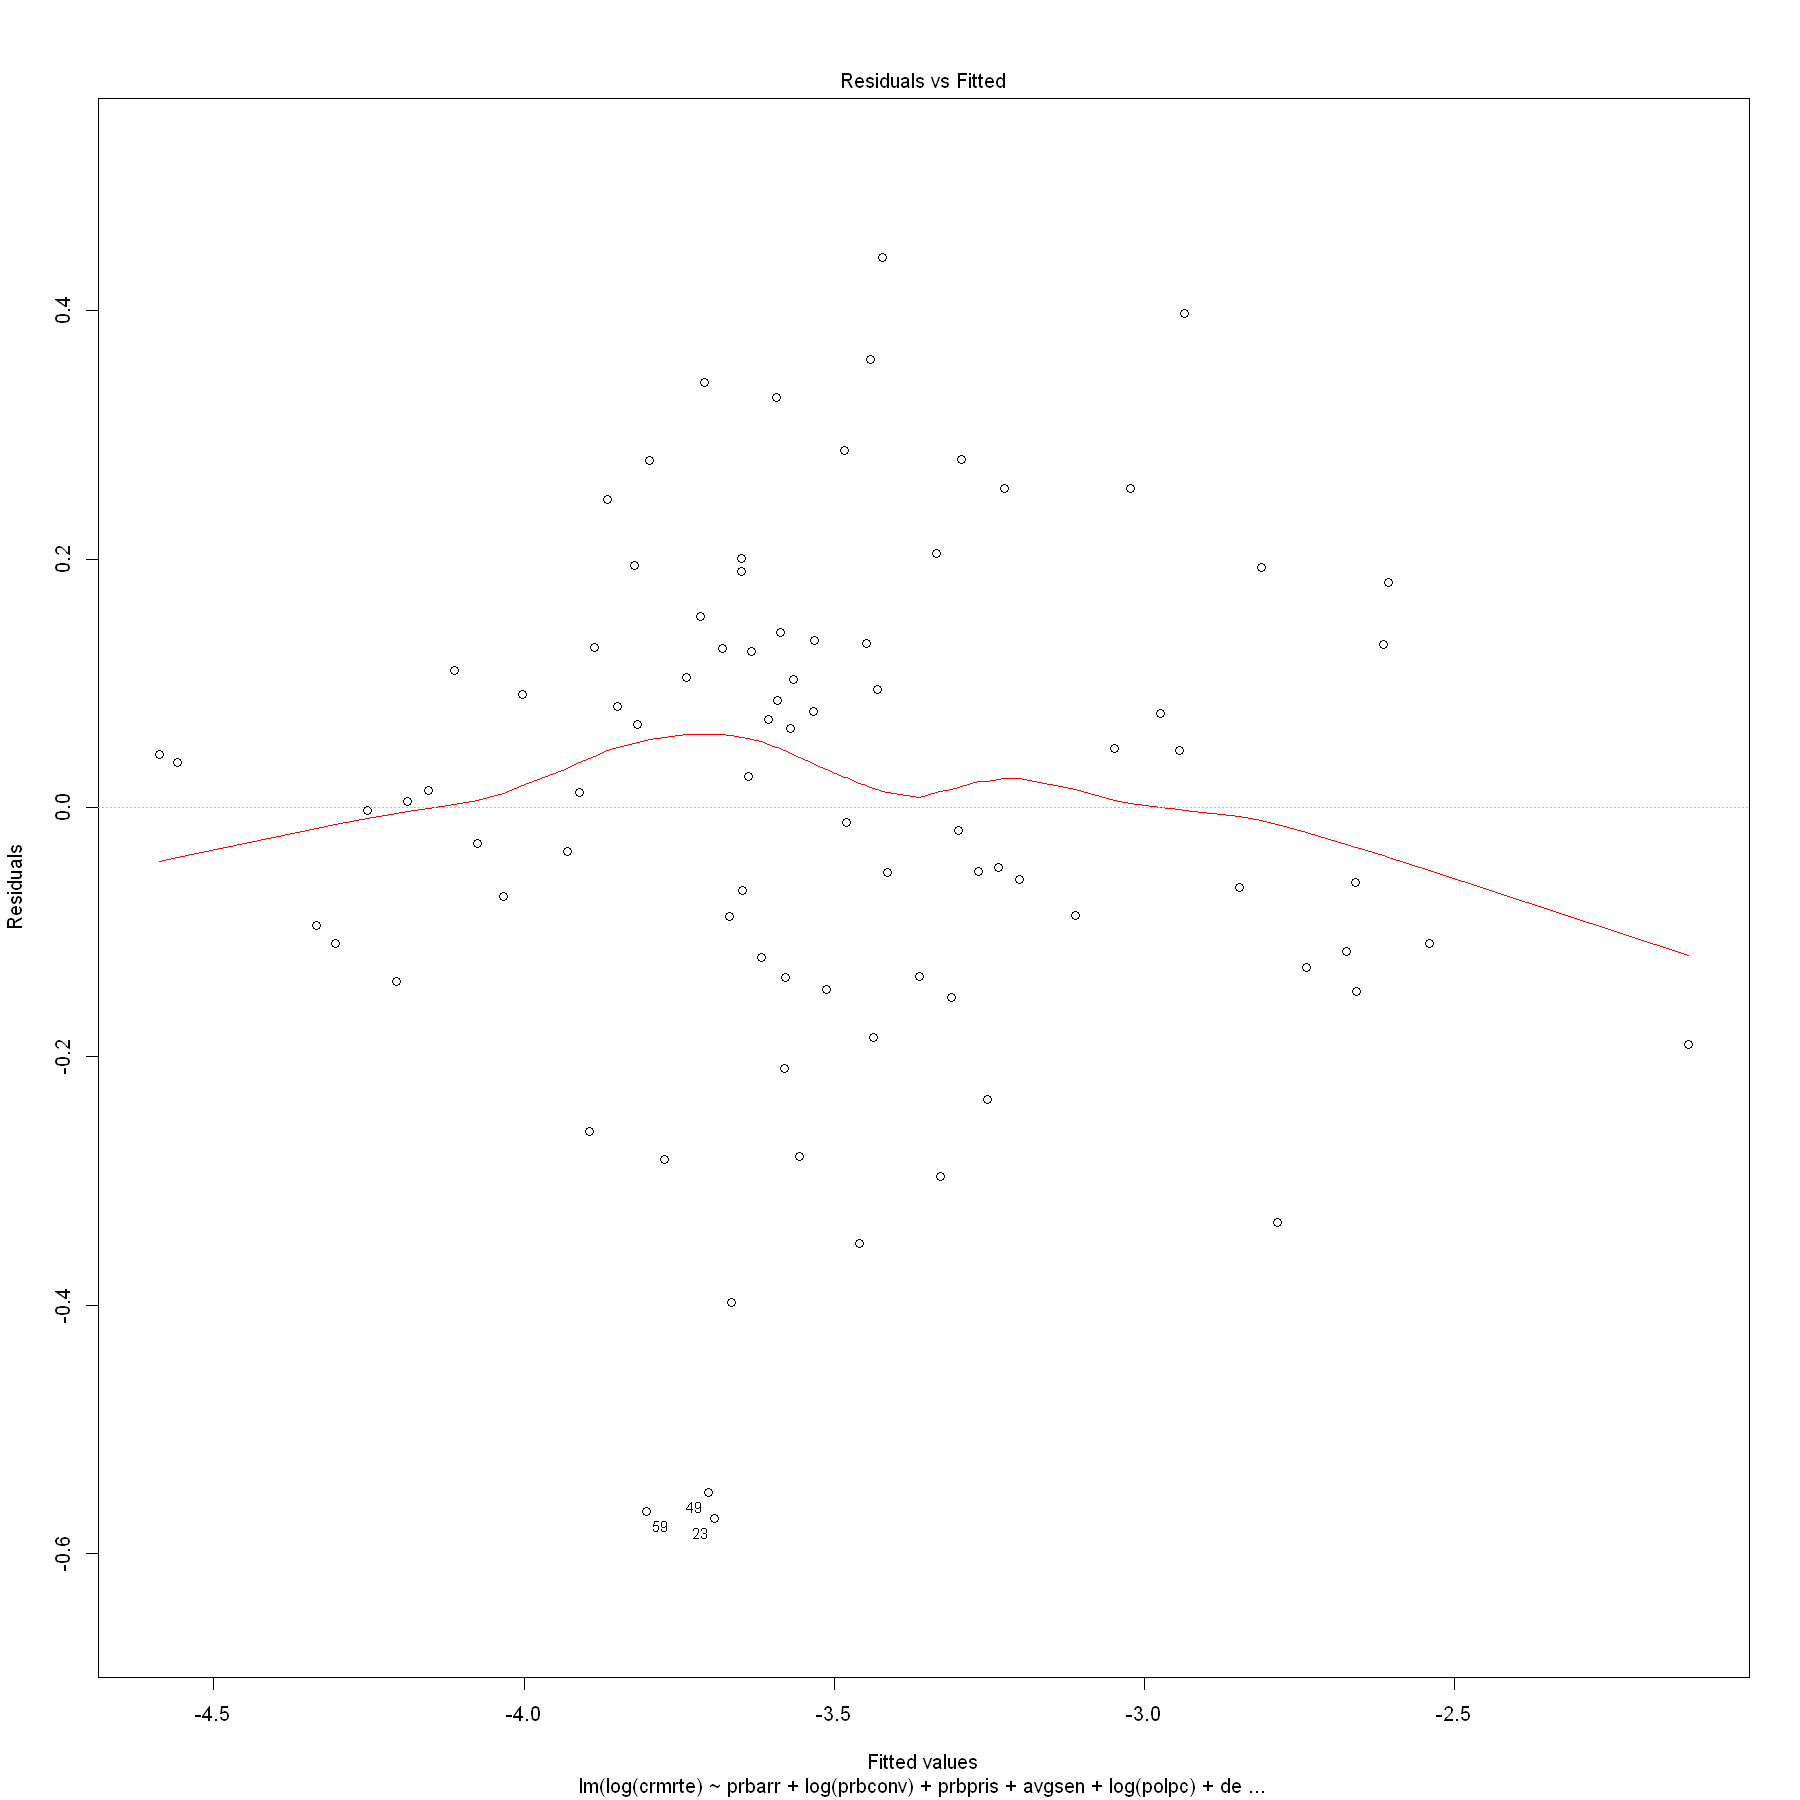

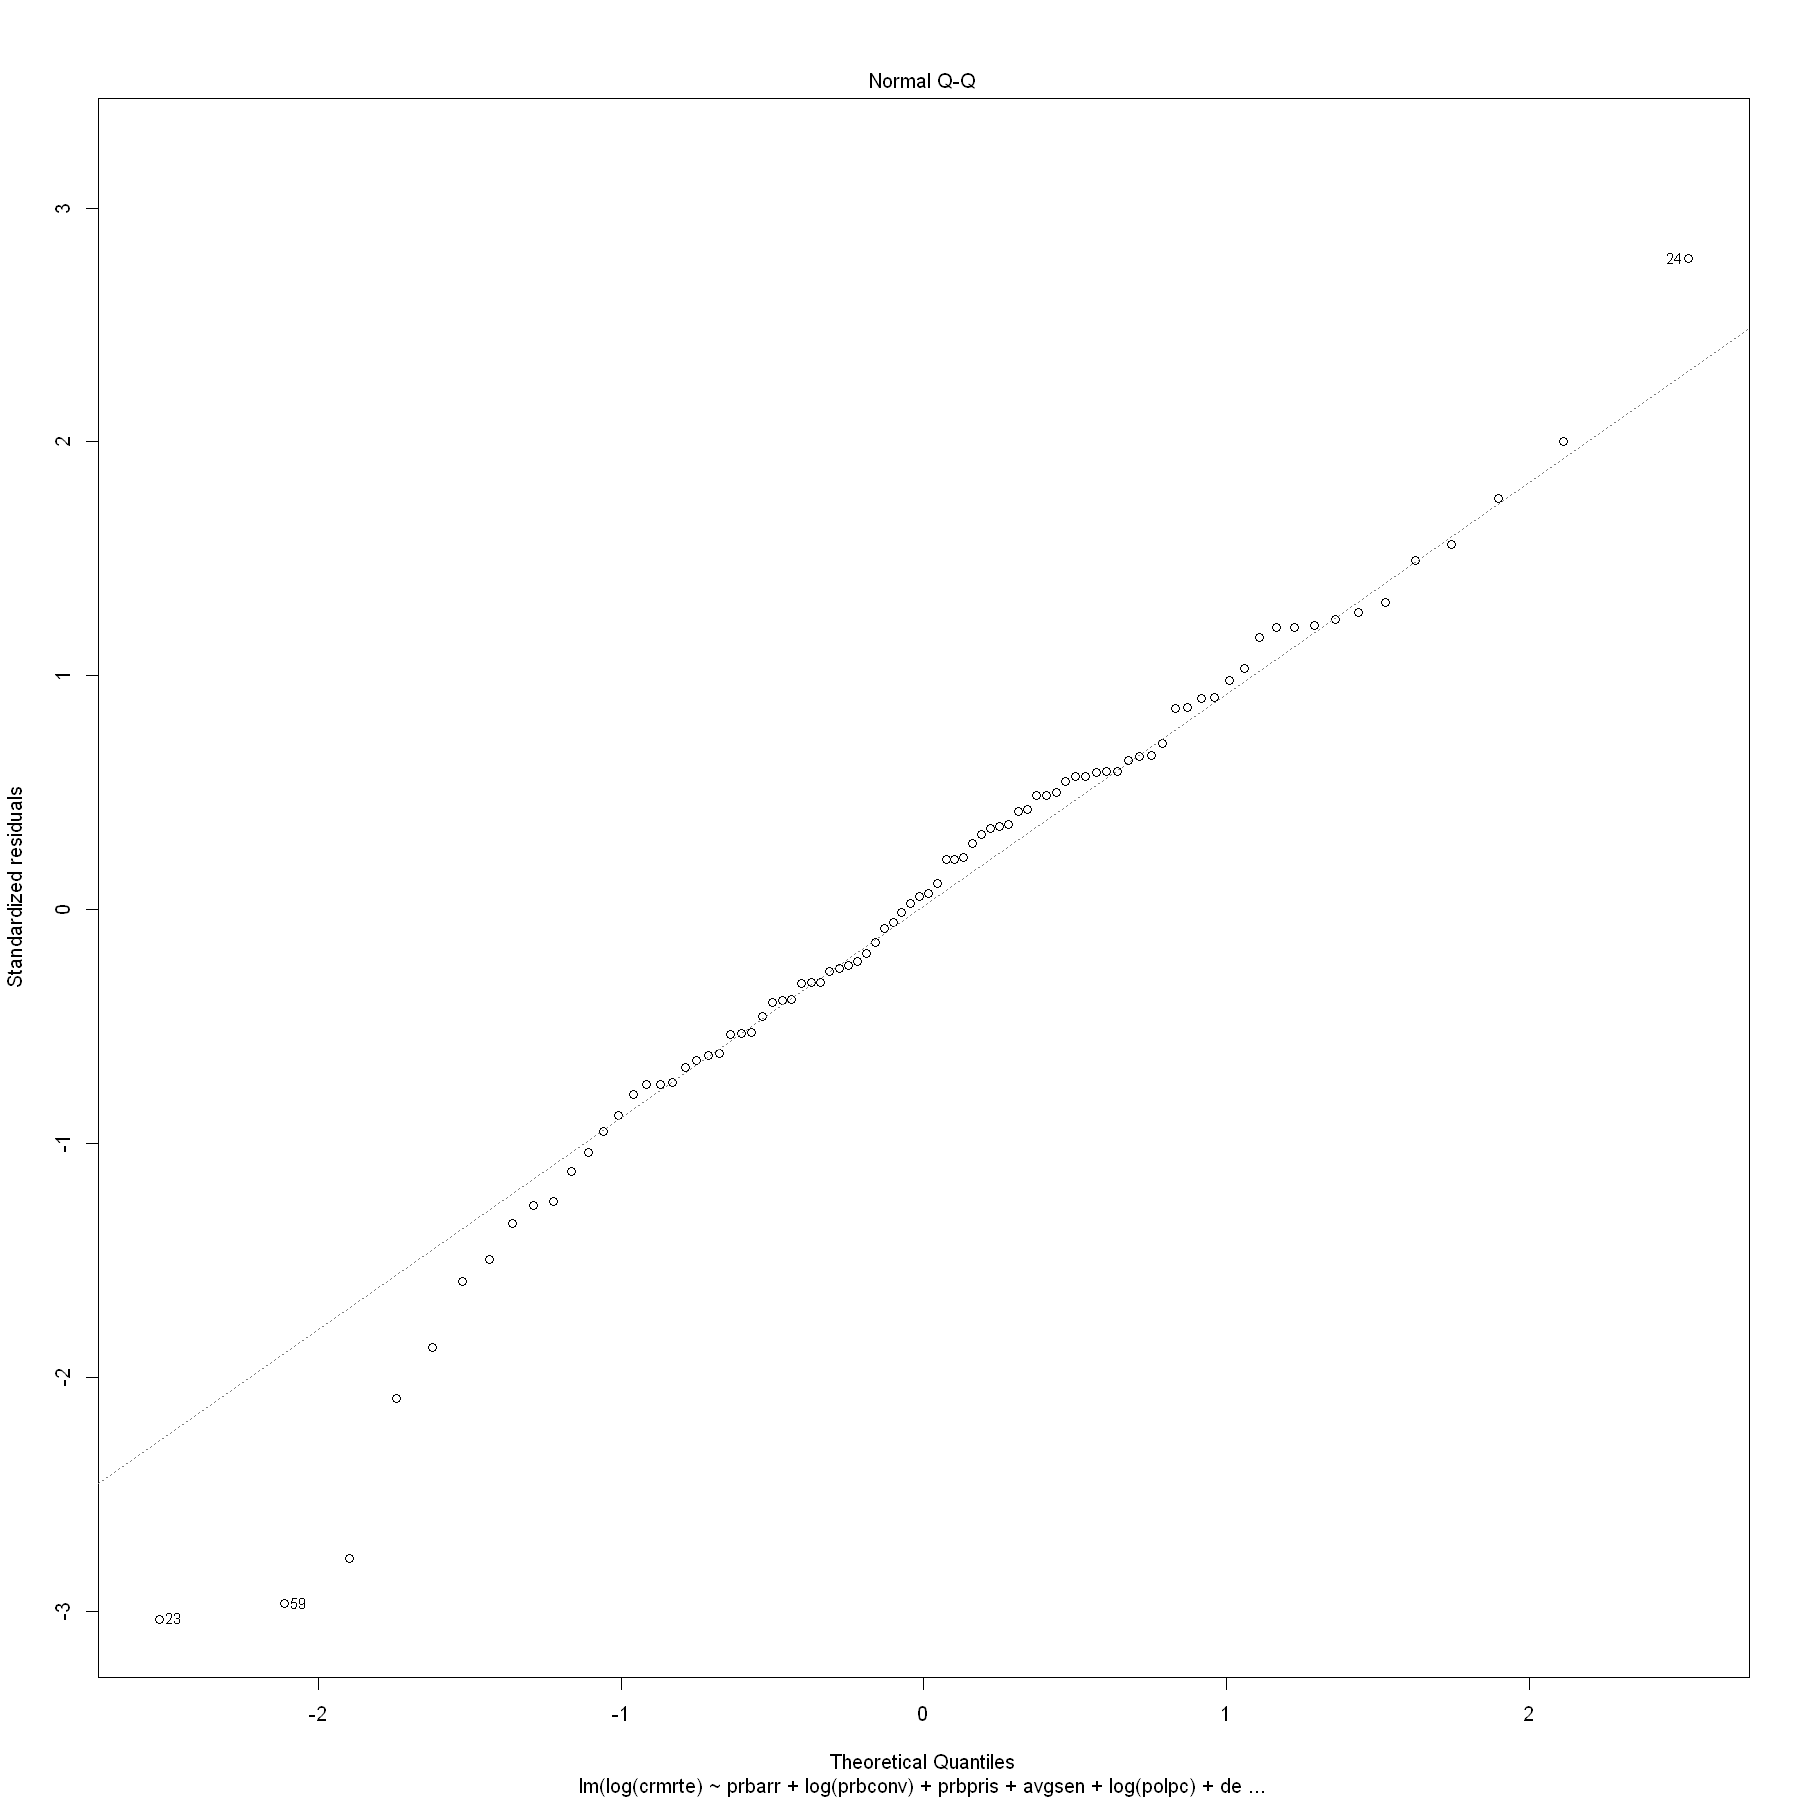

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"


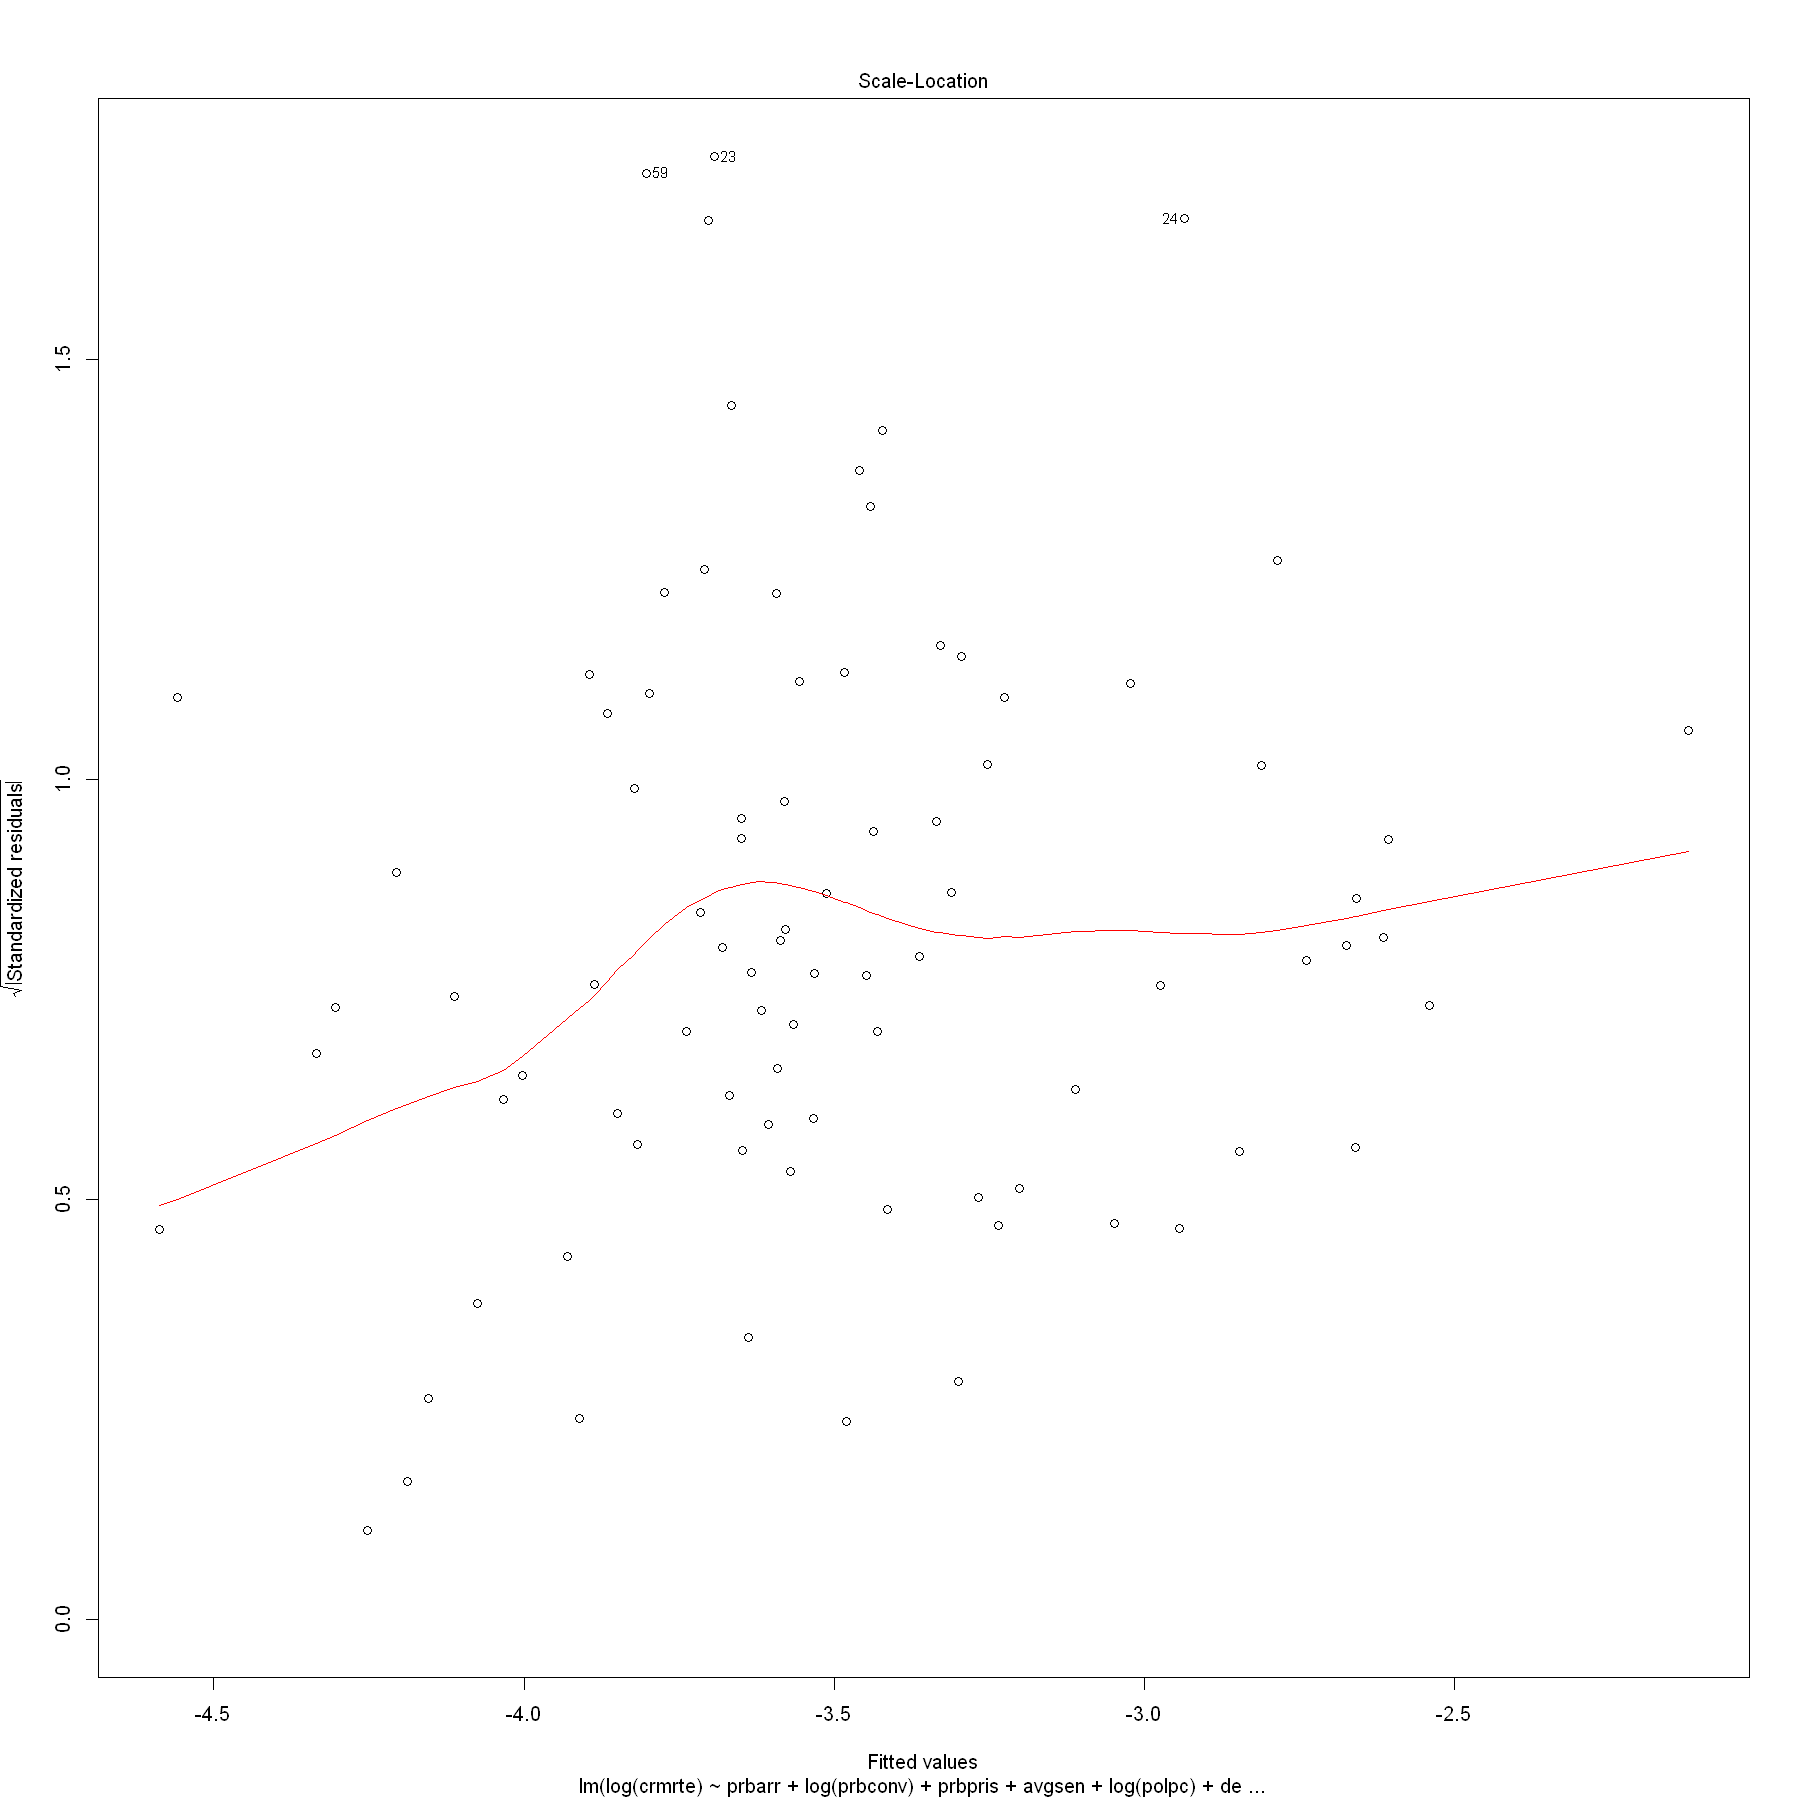

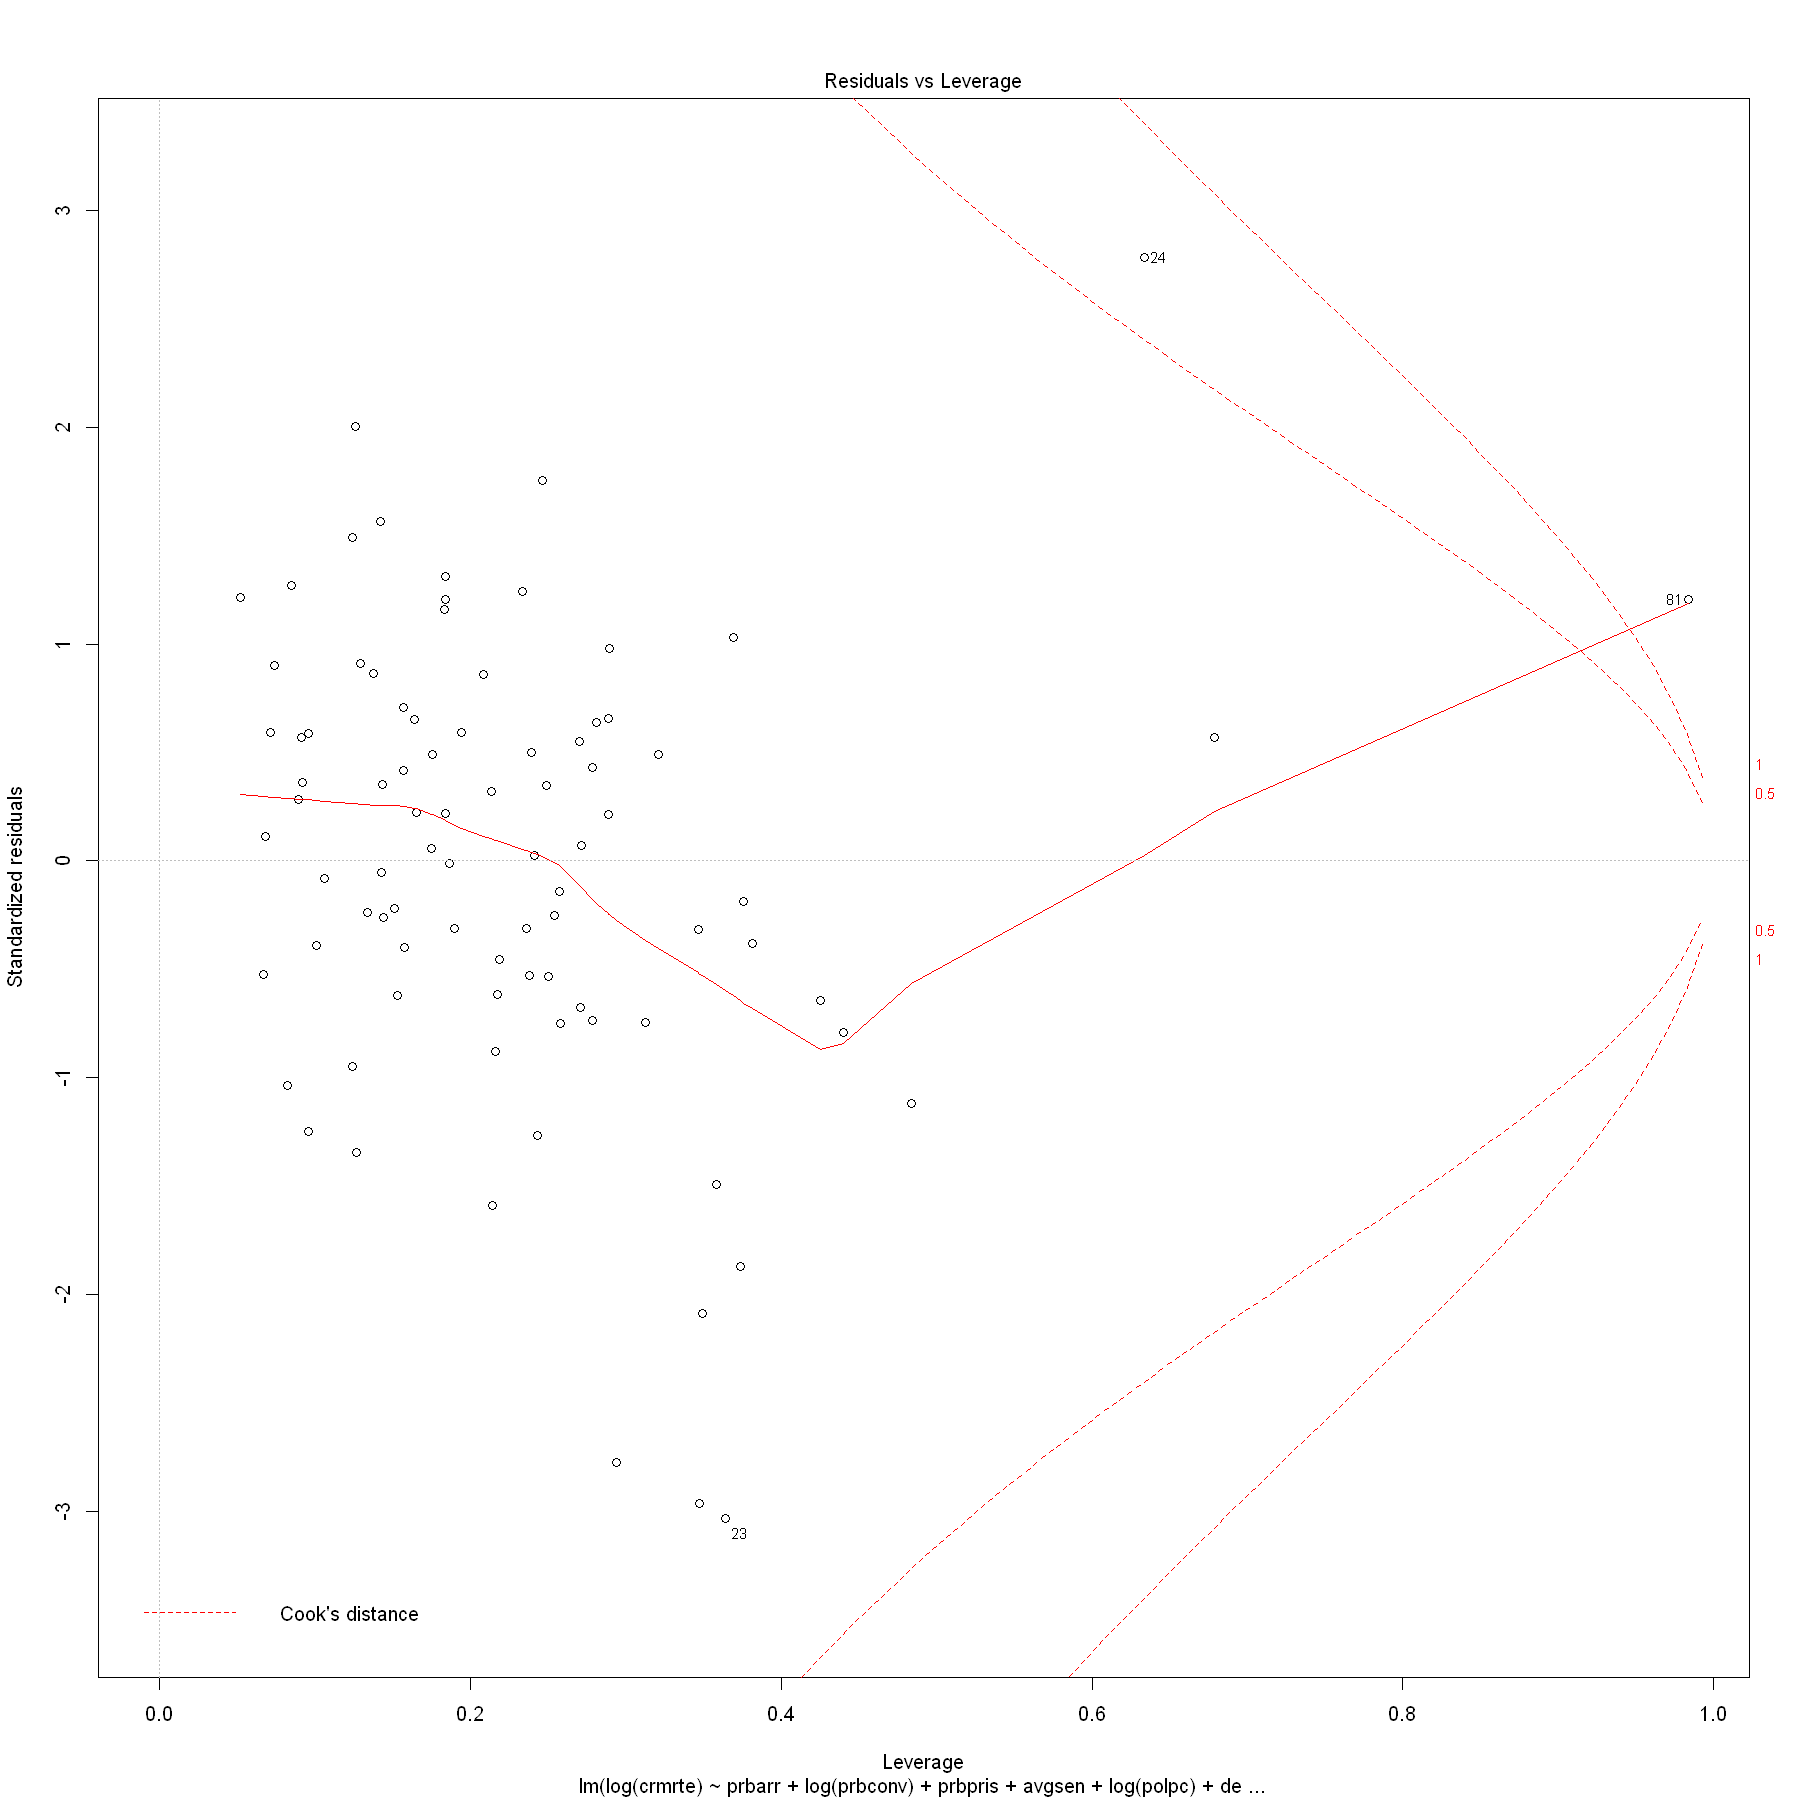

In [47]:
model3 = lm(log(crmrte) ~ prbarr + log(prbconv) + prbpris + avgsen + log(polpc) 
                        + density + mix + pctmin80 + pctymle 
                        + taxpc + wcon + wtuc + wtrd + wfir + wser + wmfg + wfed + wsta + wloc
                        , data = filtered_df)
summary(model3)
plot(model3)

## III. Assessment of CLM Assumptions
#### Assumption MLR.1 (linear in parameters): the basic population model — y is a linear function of the x's.
$$y = \beta_0 + \beta_1x_1 + ... + \mu$$
- Any population distribution could be represented as a linear model plus error, however, that error may be large. While we don't know how large the error would be given any particular linear model, this assumption is not violated given we utilize the model format: $y = \beta_0 + \beta_1x_1 + ... + \mu$
- In terms of testing this assumption, there's nothing to test because we haven't constrained our error in any way. In other words, this formula is always true for some definition of the error.

#### Assumption MLR.2 (random sampling): The data is a random sample drawn from the population.
$$y_i = \beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_kx_{ik} + \mu_i$$
$$\{(x_{i1},x_{i2}, ..., x_{ik}, y_i): i = 1, ...n\}$$
- All data points follow the population distribution.
- Data points must be randomly drawn from the population -- independently and identically distributed (IID) 

Assessing the validity of this assumption requires knowledge of the procedure for collecting data points. Thus, to assess the validity of this assumption, we look to the dataset overview provided with the assignment and to the publication by Corwell and Trumbull. Unfortunately, in these two resources, there is little discussion of the data collection methods so we cannot know if the data are IID in many cases. That said, we may use our intuition to imagine to what extent the data are or are not IID. 

The data provided are included from several original databases. And we make several assumptions about certain of these databases. Specifically, we assume the FBI's Uniform Crime Reports, the prison and probation files of the North Carolina Department of Correction, and the FBI's police agency employee counts were provided by law enforcement organizations which were willing and competent to transmit accurate and complete data. This assumption is important because it allows us to assume the data used to provide counts of e.g. arrests, convictions etc, are "population" data (i.e. they represent e.g. full arrest and conviction records), which are arguably as good or better than IID samples in representing the statistics used to generate key numerators in the database. 

Before we look at the individual data items, we must consider the dataset as a whole. We have determined that the dataset has 90 rows. However, the State of North Carolina is known to have 100 counties. Thus, the 90 represented counties do not constitute the population of counties in North Carolina. The fact that the number of counties represented in the dataset is close to the total number of counties in the state is a red flag. A 90% sample suggests that the sample was not randomly selected, but instead may have been a failed census. The 10 missing counties likely were non-responders. The fact that these 10 counties may have been non-responders for similar reasons (poor? rural? etc?). I.e. the missing data could be very likely to correlate with each other and thus would throw off the entire dataset in a systematic way.

Let's examine each variable:
- crmrte is defined as crimes committed per person. The numerator is FBI index crimes and the denominator is county population. The crime count is gleaned from the FBI's uniform crime report. We assume crime count is derived from a complete dataset as discussed above. However, we do know that the number of crimes reported in any given county is lower than the number of crimes that occur because not all crimes are reported. Importantly for our analysis, we know that the number or fraction of crimes reported will not be uniform across counties, as crimes are more often under-reported in lower income communities, communities with higher crime rates, communities where law enforcement is not trusted, etc. The denominator, county population, is taken from census data which is a similarly incomplete database with certain bias introduced through incomplete filings -- more common in some communities than in others. While these data are thus not IID they are presumed to be thorough enough to be representative of reported crimes and thus acceptable and useful for making recommendations to political organizations.
- prbarr is the probability of arrest, defined as the ratio of arrests to offenses (a proxy for probability). These measures are drawn from the FBI's Uniform Crime Reports discussed above. We assume these data consider the entire database. Thus, prbarr is assumed to consider a complete count of the entire statistical "population" of arrests. That said, in this case where we assume the number of arrests is reported to be complete, we must remember that we only have 90 of 100 counties reporting. 
- prbconv is the probability of conviction, defined as the ratio of convictions to arrests. The data on convictions are taken from the NCDC. However, we know that arrest records in the database include FBI records which may include arrests for federal crimes which occured in NC but which may have convictions that are not reflected in the state convictions statistics. I.e. we wonder whether convictions in federal court would be reflected in the state (NCDC) database. With better access to metadata, we could explore a potential sampling bias via incomplete data collection and/or mismatched sampling frames.
- prbpris is the probability of receiving a prison sentence, computed as the ratio of prison sentences to total convictions. Both the numerator and denominator in this statistic are taken from the same source, eliminating a key concern tied to the prbconv statistic where the numerator and denominator came form different databases. This variable is considered to be randomly sampled, subject to other concerns raised in this discussion.
- avgsen is the average length of sentence. We assume sentence data are included in the complete and accurate convictions data from the NCDC. This variable is considered to be randomly sampled, subject to other concerns raised in this discussion.
- polpc is police per capita. The number of police per capita was computed from the FBI's police agency employee counts, assumed complete and accurate. The population data are assumed to be from the census, shortcomings of which are described above. 

While it is important to keep these potential challenges to the random sampling assumption in mind, we cannot adjust these data at this time. Problems of sampling must be addressed at the time of sampling. 

# NOTE: IID -- in previous assignments use histogram to see if skewed. Lack of skew will allow us to move on despite potential for non-IID. May want to add here.

#### Assumption MLR.3 (no perfect collinearity): In the sample (and population) 
- none of the independent variables are constant and there are no exact relationships among the independent variables.
- Rules out only perfect collinearity/correlation between explanatory variables—imperfect correlation is allowed.
- In practice, high correlation can greatly increase errors.
- If an explanatory variable is a perfect linear combination of other explanatory variables, it is superfluous and may be eliminated.
- Constant variables are also ruled out (collinear with the intercept term).

In practice, perfect collinearity is not common, however, variables which are highly correlated with each other may create errors. We can easily test for correlation between our variables:

In [48]:
# generate smaller dataframe of variables of interest
law_var = clean_df[, c(4, 5, 6, 7, 8)]

# generate correlation matrix
cor(law_var)

,prbarr,prbconv,prbpris,avgsen,polpc
prbarr,1.00000000,-0.05579621,0.04583324,0.17869425,0.42596480
prbconv,-0.05579621,1.00000000,0.01102265,0.15585232,0.17186514
prbpris,0.04583324,0.01102265,1.00000000,-0.09468083,0.04820783
avgsen,0.17869425,0.15585232,-0.09468083,1.00000000,0.48815230
polpc,0.42596480,0.17186514,0.04820783,0.48815230,1.00000000


#### Assumption MLR.4 (zero-conditional mean): The value of the explanatory variables must contain no information about the mean of the unobserved factors.
$$E(\mu_i|x_{i1}, x_{i2}, ..., x_{ik})=0$$
- For any possible value of our predictors, our error is zero in expectation.
- This assumption enforces linearity.
- MLR.1 establishes a linear population model, but MLR.4 ensures that the population actually follows that linear model.

To test this assumption, given we have multiple x variables, we plot residuals vs. fitted values with residuals on the y-axis and predicted values on the x-axis. If there's a nonzero mean for some values of some x, it's likely to show up in this plot. The plot should look like a flat band of points across. In this case, our residuals vs fitted for this intermediate version of model2 has inflections at the low and high ends of the fitted values range, suggesting potential room for improvement in our model via variable transformations.

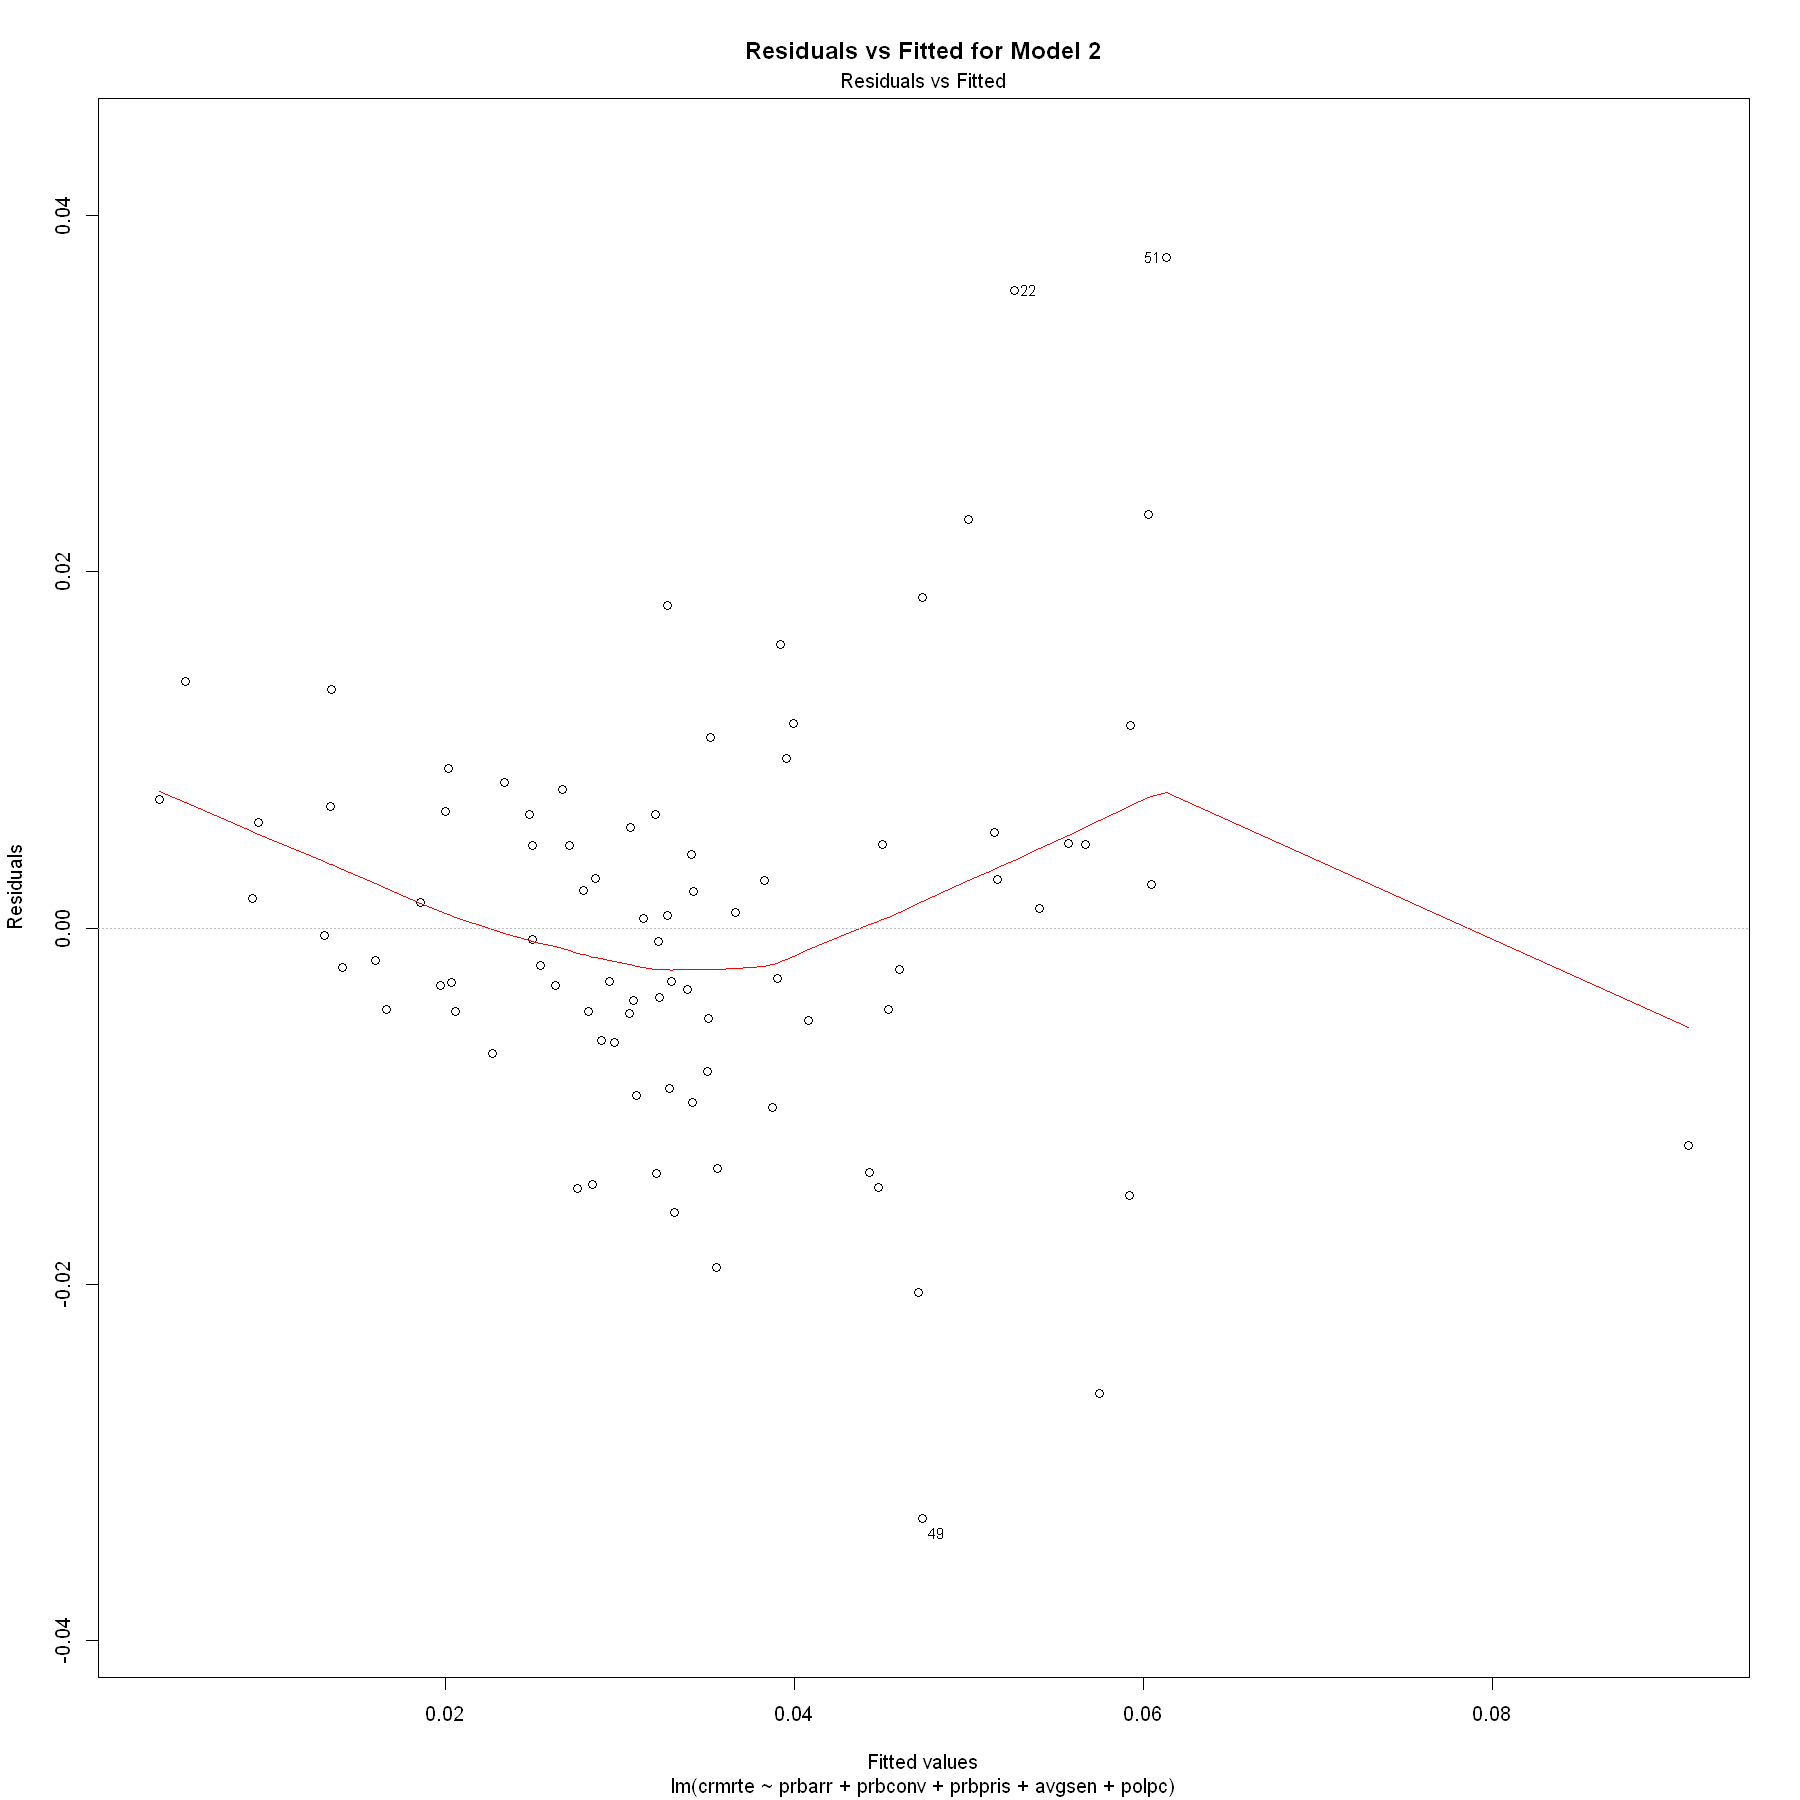

In [49]:
plot(model2, which =1, main="Residuals vs Fitted for Model 2")

#### We can also check the residuals for individual variables. However, we know this might not reveal all violations of zero-conditional mean.


For prbarr vs crmrte (note: we are log-transforming the y-variable crmrte) the mean of the residuals 
seems to remain consistent as prbarr increases from left to right. That said, the magnitude of the 
residuals falls a bit from left to right as prbarr increases

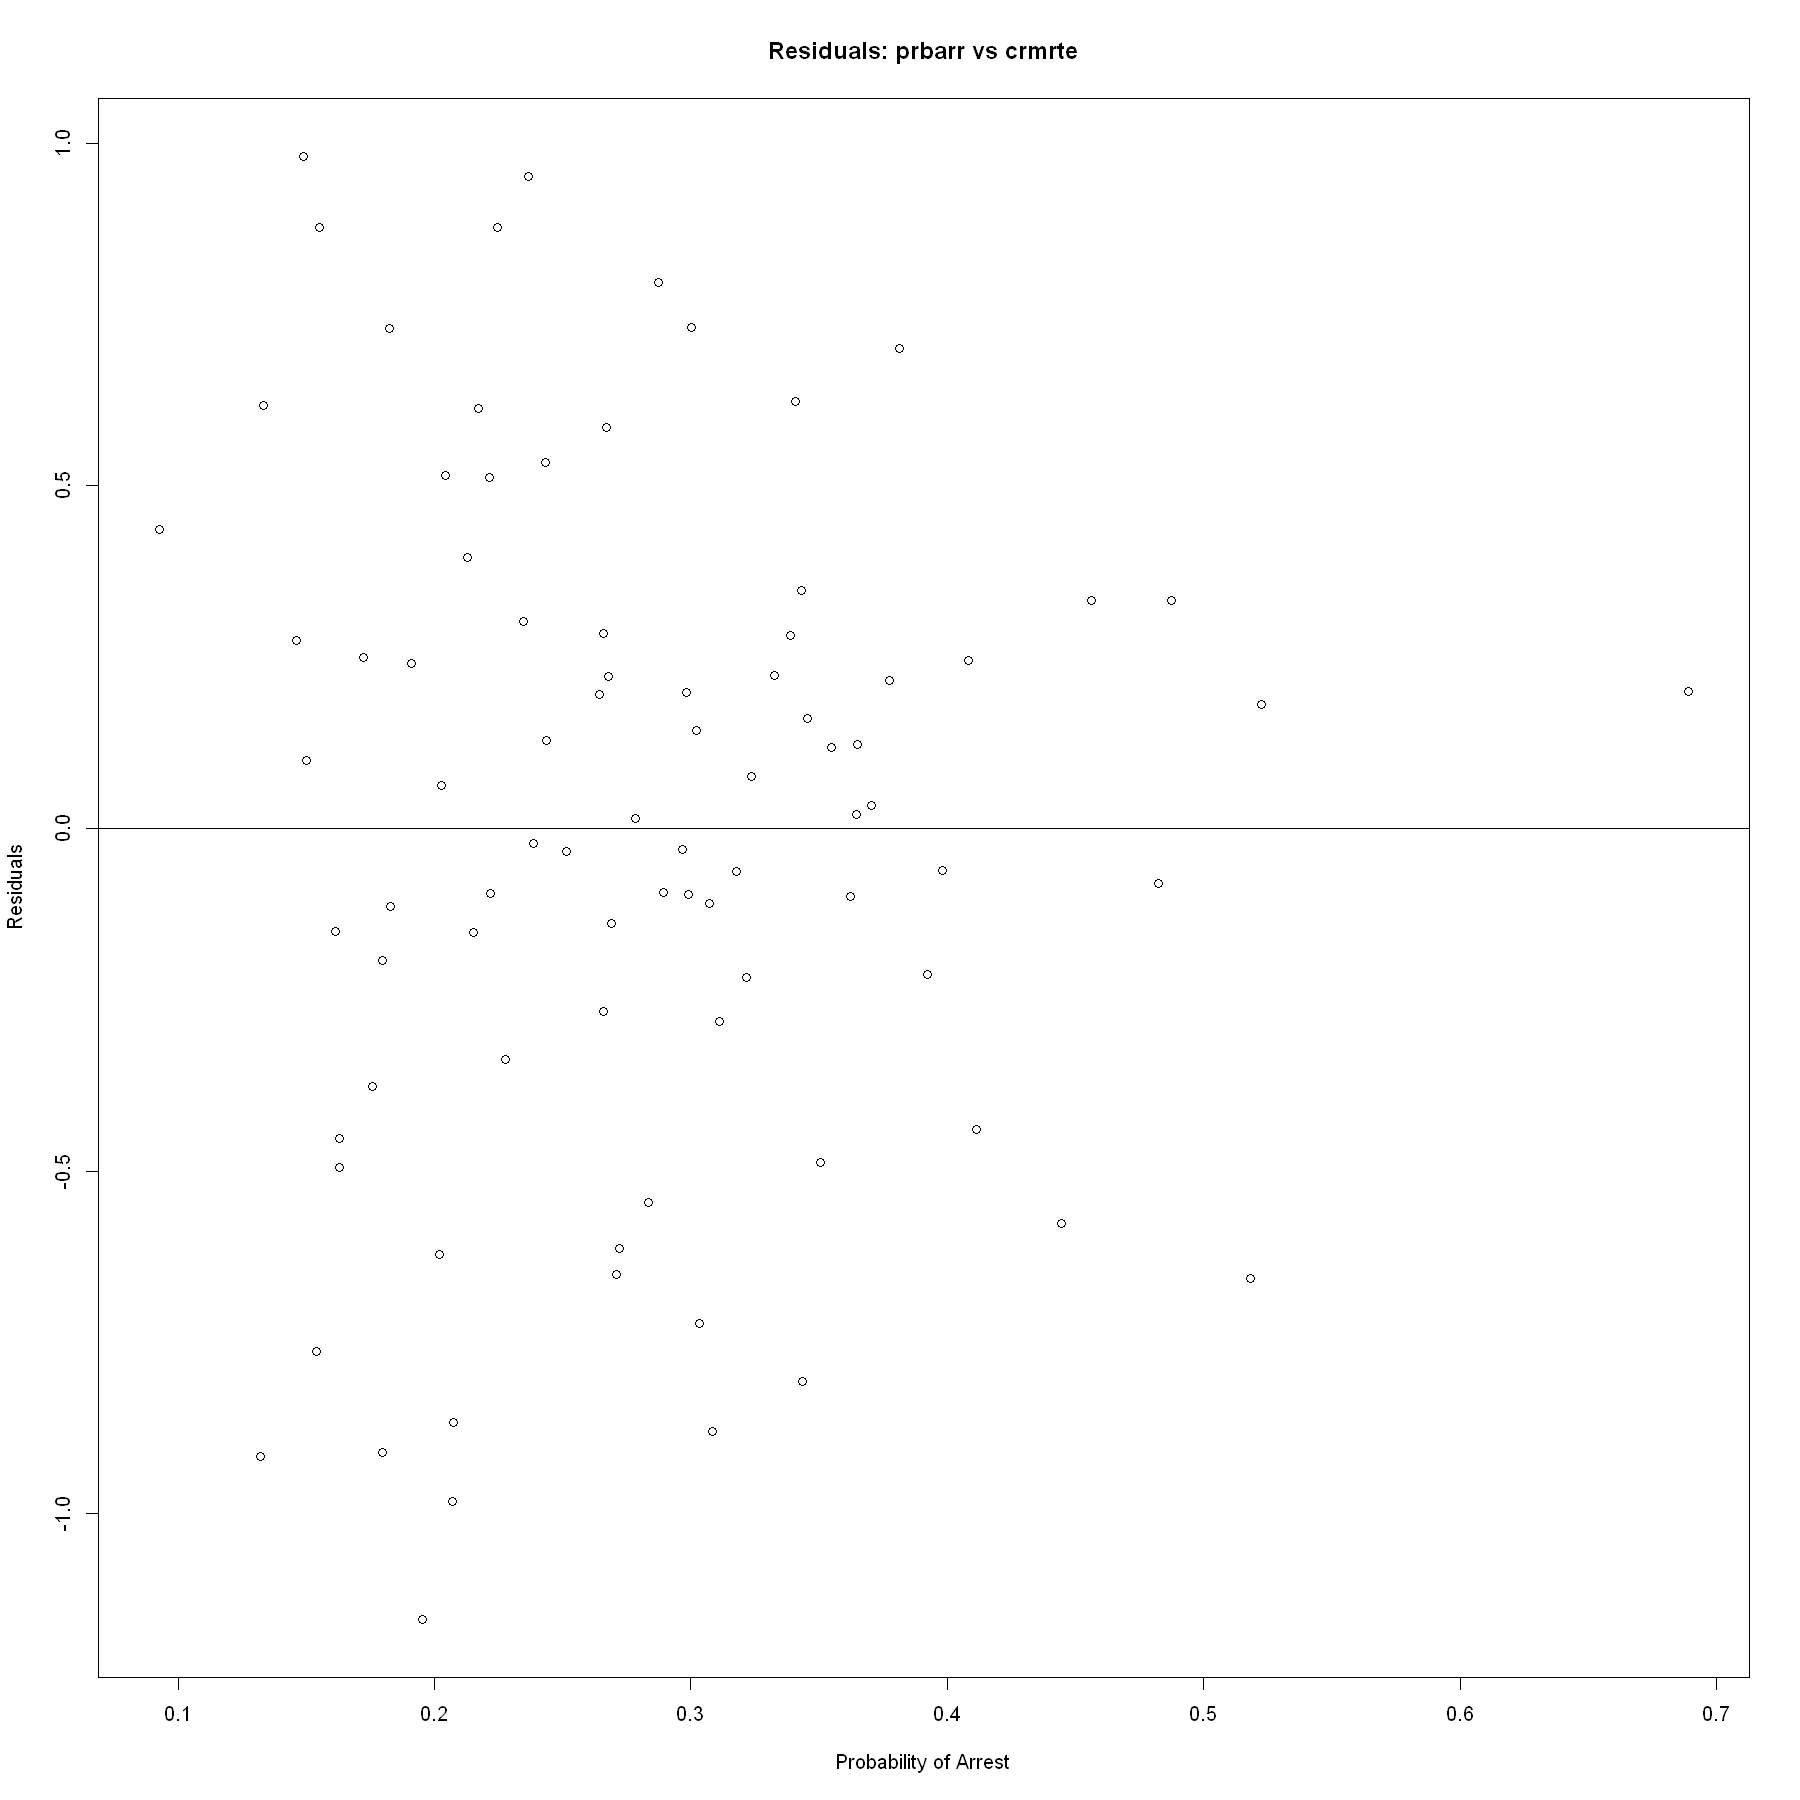

In [52]:
cat("For prbarr vs crmrte (note: we are log-transforming the y-variable crmrte) the mean of the residuals 
seems to remain consistent as prbarr increases from left to right. That said, the magnitude of the 
residuals falls a bit from left to right as prbarr increases")
prbarr.lm = lm(log(crmrte) ~ prbarr, data=filtered_df) 
prbarr.res = resid(prbarr.lm)
plot(filtered_df$prbarr, prbarr.res, 
     ylab="Residuals", xlab="Probability of Arrest", 
     main="Residuals: prbarr vs crmrte") 
abline(0, 0) 

For prbconv vs crmrte (we log transform both of these variables), the mean of the 
residuals does seem to change as prbarr increases from left to right. Average residual 
values are lower for higher probability of conviction. Moreover, the magnitude of the 
residuals clearly changes (becomes smaller) as prbarr increases

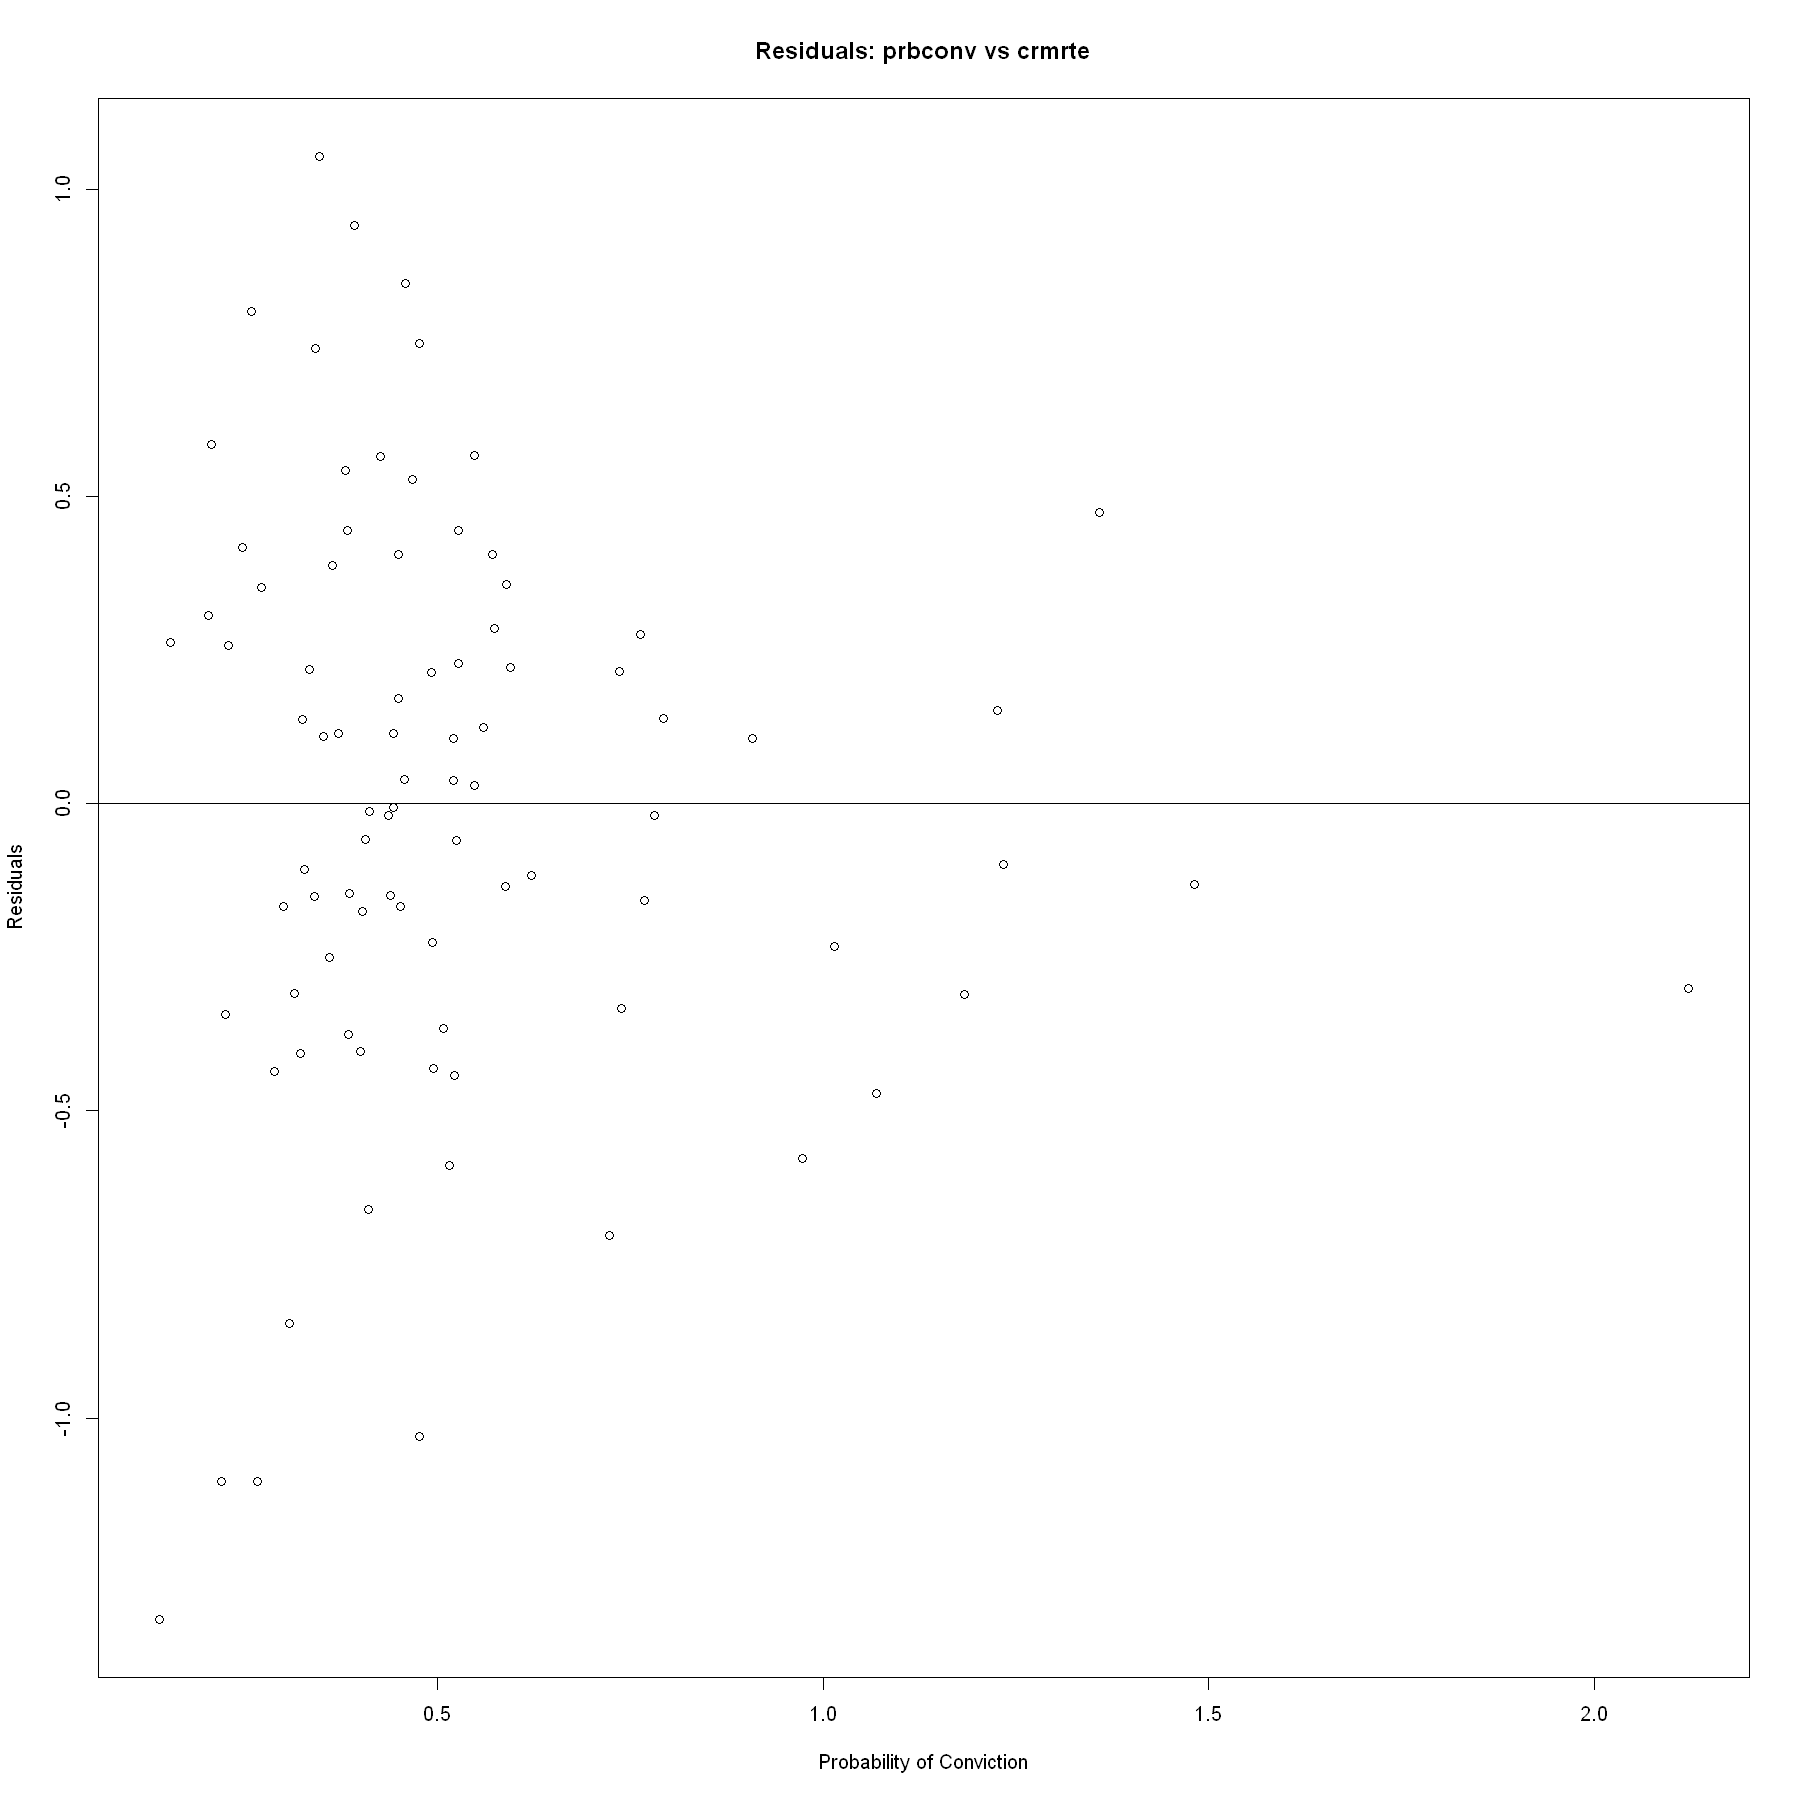

In [53]:
cat("For prbconv vs crmrte (we log transform both of these variables), the mean of the 
residuals does seem to change as prbarr increases from left to right. Average residual 
values are lower for higher probability of conviction. Moreover, the magnitude of the 
residuals clearly changes (becomes smaller) as prbarr increases")
prbconv.lm = lm(log(crmrte) ~ log(prbconv), data=filtered_df) 
prbconv.res = resid(prbconv.lm)
plot(filtered_df$prbconv, prbconv.res, 
     ylab="Residuals", xlab="Probability of Conviction", 
     main="Residuals: prbconv vs crmrte") 
abline(0, 0) 

For prbpris vs crmrte, the mean of the residuals is somewhat consistent, with a slight 
mid-range inflection as prbpris increases from left to right. The magnitude of the residuals 
also seems to grow mid-range.

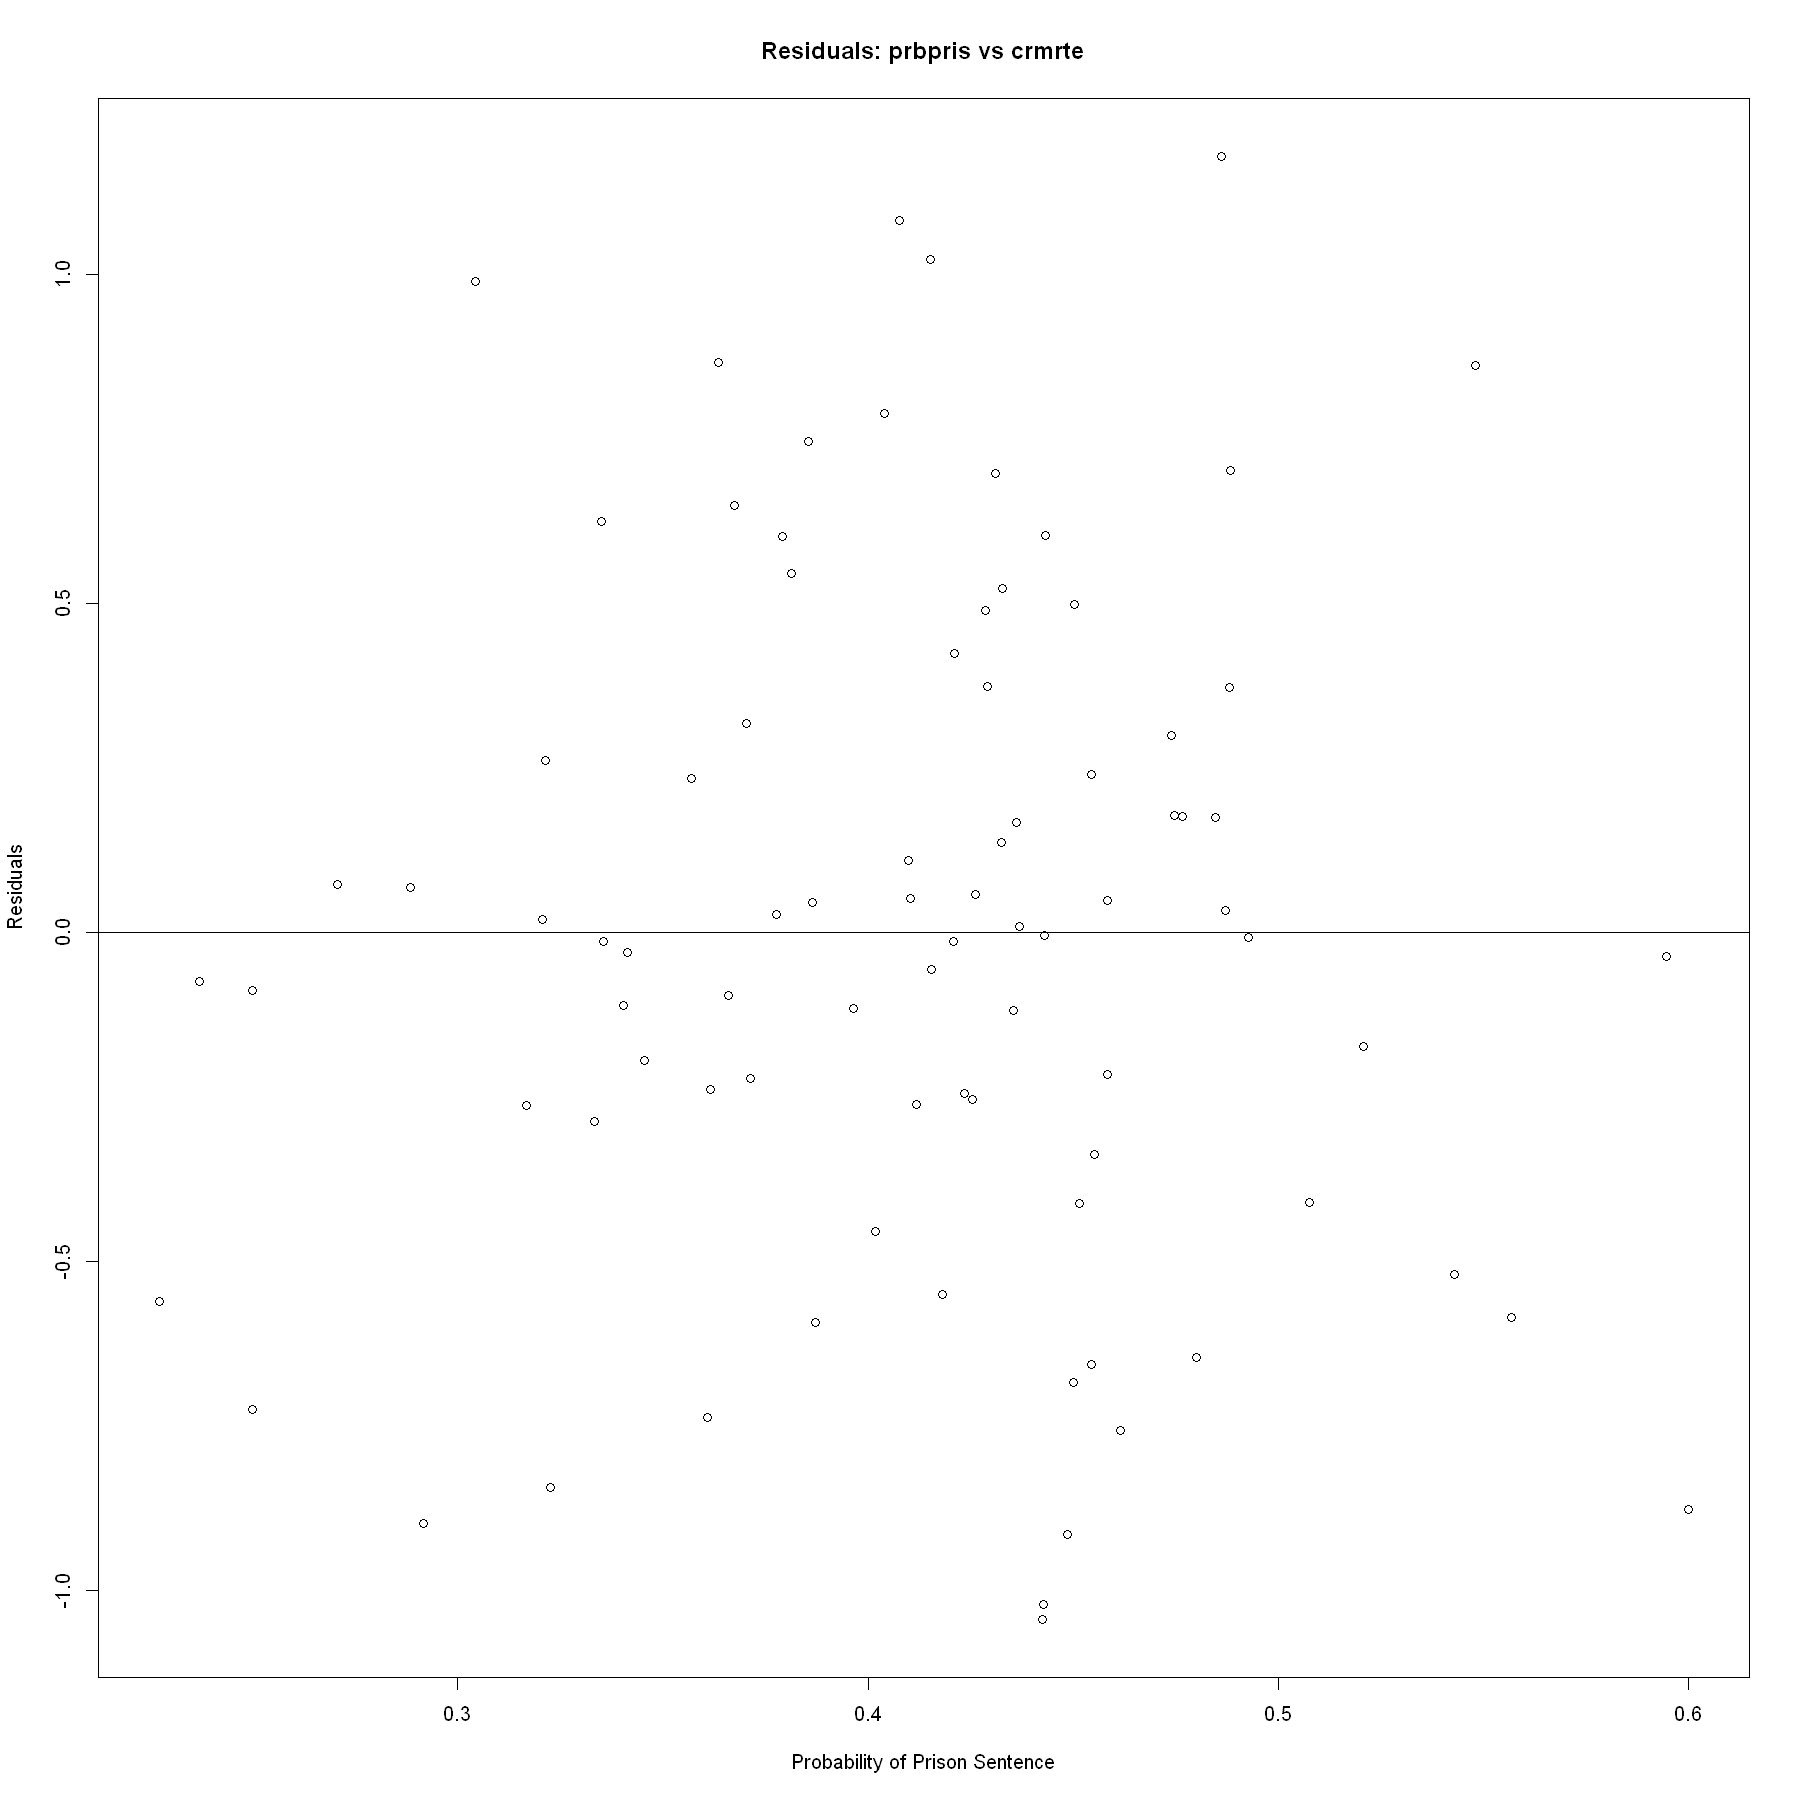

In [54]:
cat("For prbpris vs crmrte, the mean of the residuals is somewhat consistent, with a slight 
mid-range inflection as prbpris increases from left to right. The magnitude of the residuals 
also seems to grow mid-range.")
prbpris.lm = lm(log(crmrte) ~ prbpris, data=filtered_df) 
prbpris.res = resid(prbpris.lm)
plot(filtered_df$prbpris, prbpris.res, 
     ylab="Residuals", xlab="Probability of Prison Sentence", 
     main="Residuals: prbpris vs crmrte") 
abline(0, 0) 

For avgsen vs crmrte, the mean of the residuals is consistent as avgsen increases 
from left to right. Magnitude of residuals appears to fall slightly from left to right

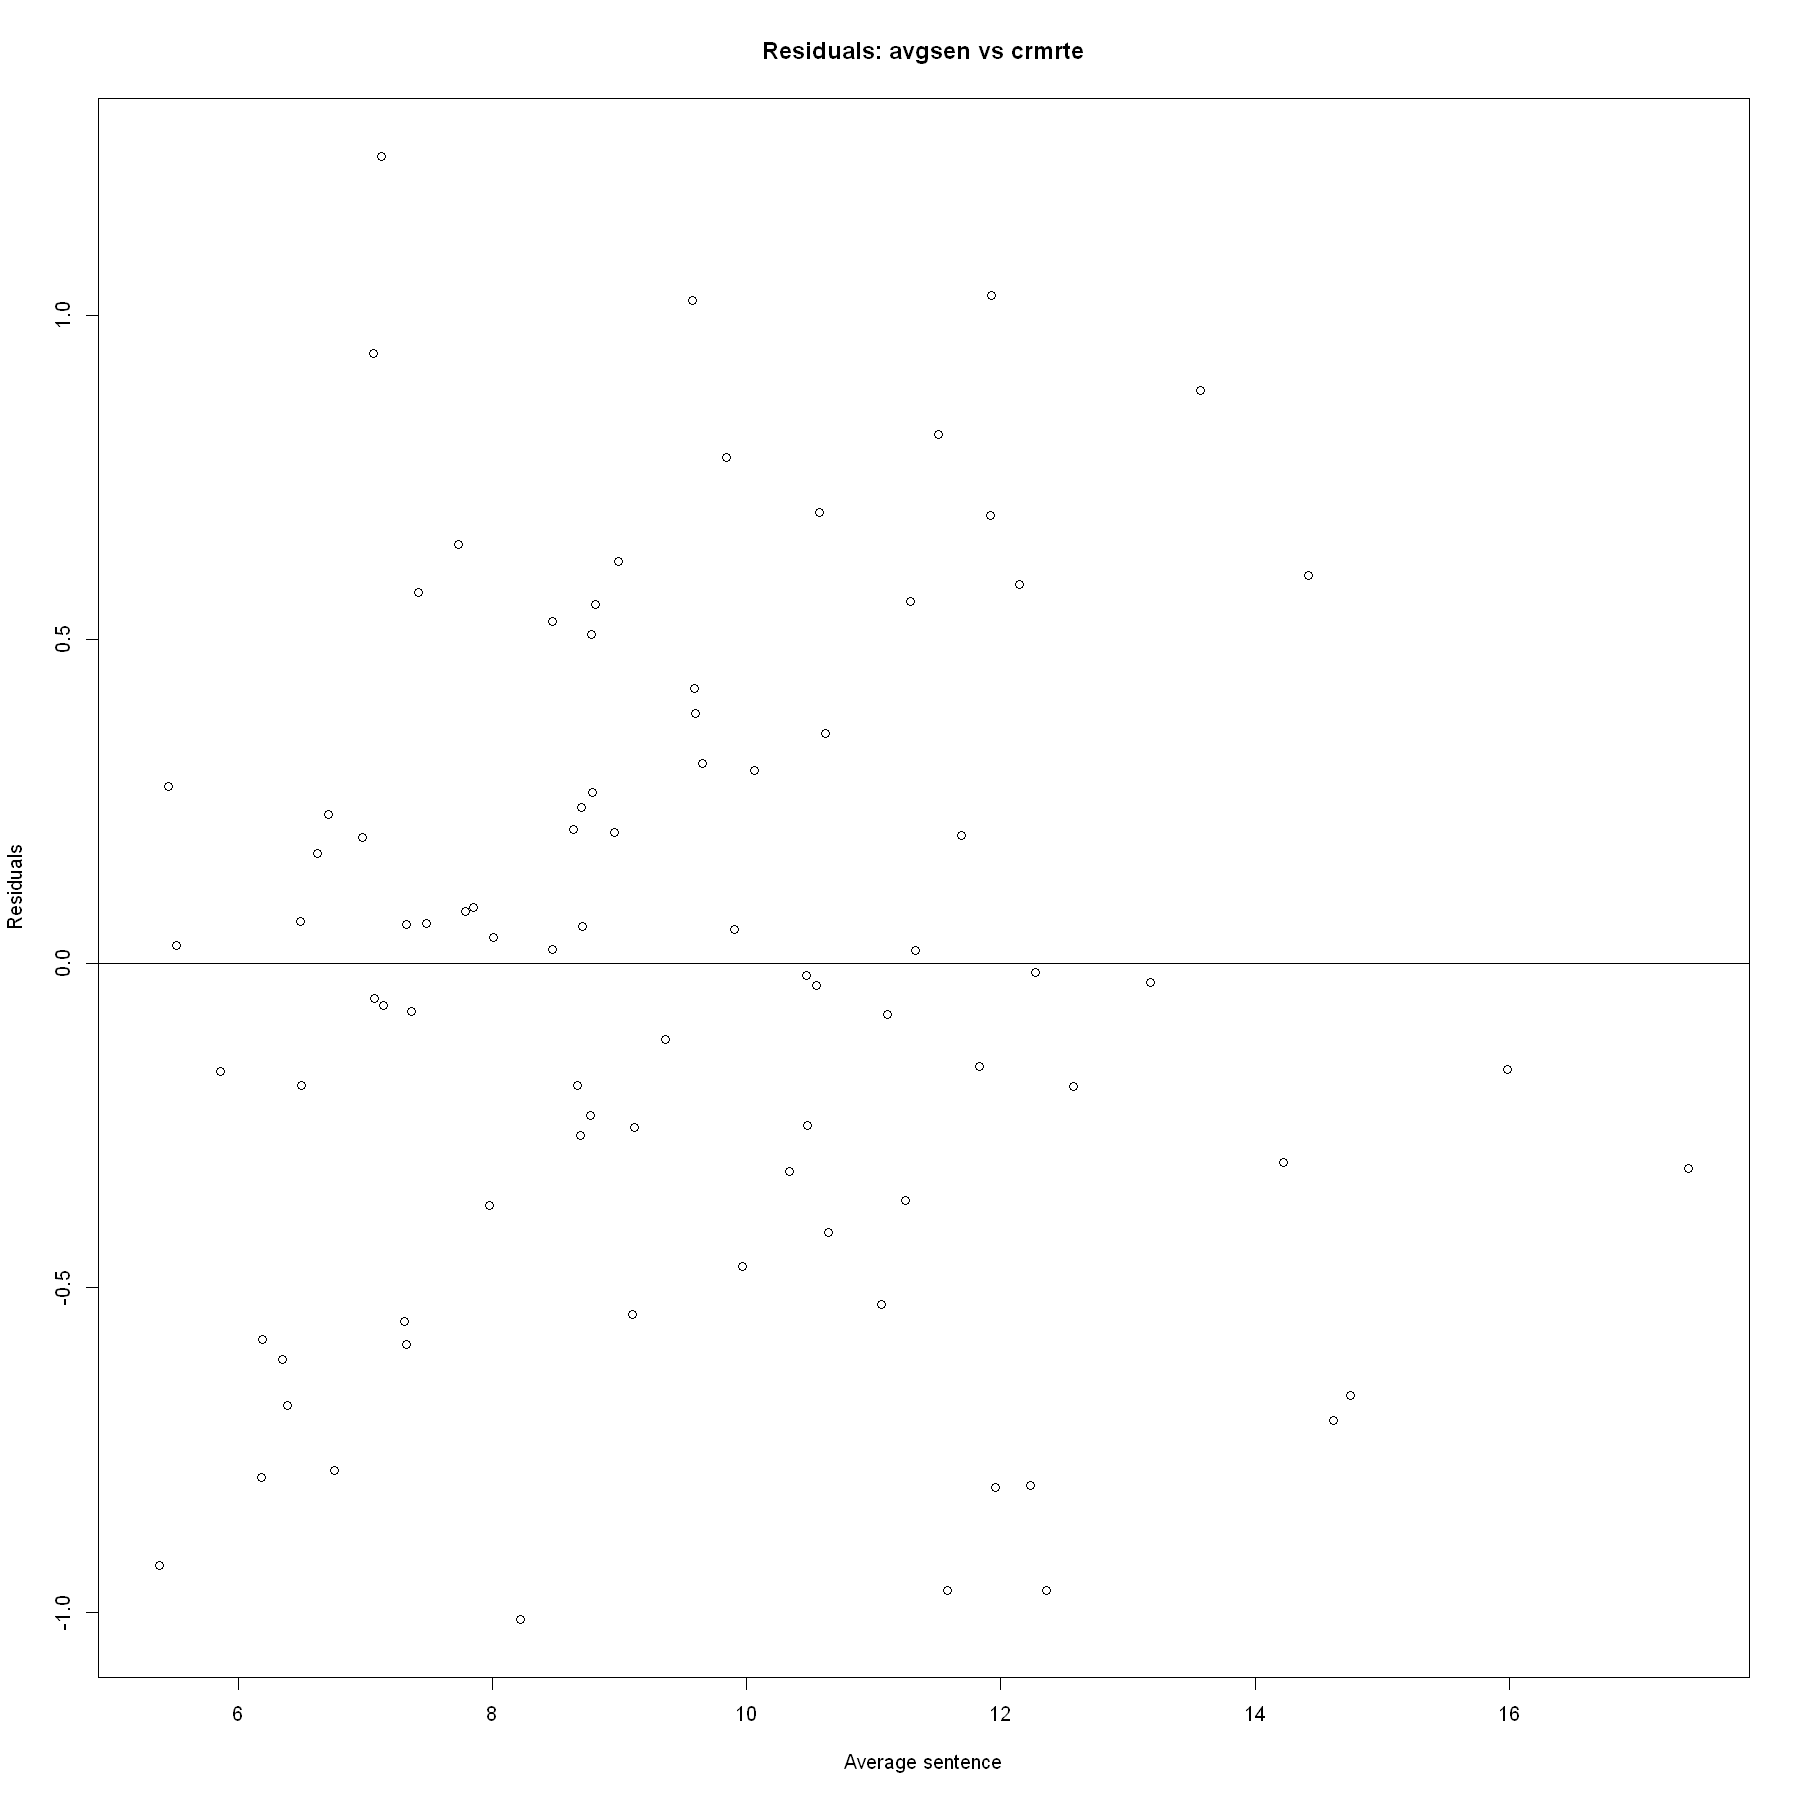

In [55]:
cat("For avgsen vs crmrte, the mean of the residuals is consistent as avgsen increases 
from left to right. Magnitude of residuals appears to fall slightly from left to right")
avgsen.lm = lm(log(crmrte) ~ avgsen, data=filtered_df) 
avgsen.res = resid(avgsen.lm)
plot(filtered_df$avgsen, avgsen.res, 
     ylab="Residuals", xlab="Average sentence", 
     main="Residuals: avgsen vs crmrte") 
abline(0, 0) 

Polpc vs crmrte (both variables we are log transforming) is the most consistent residual plot 
of the group.

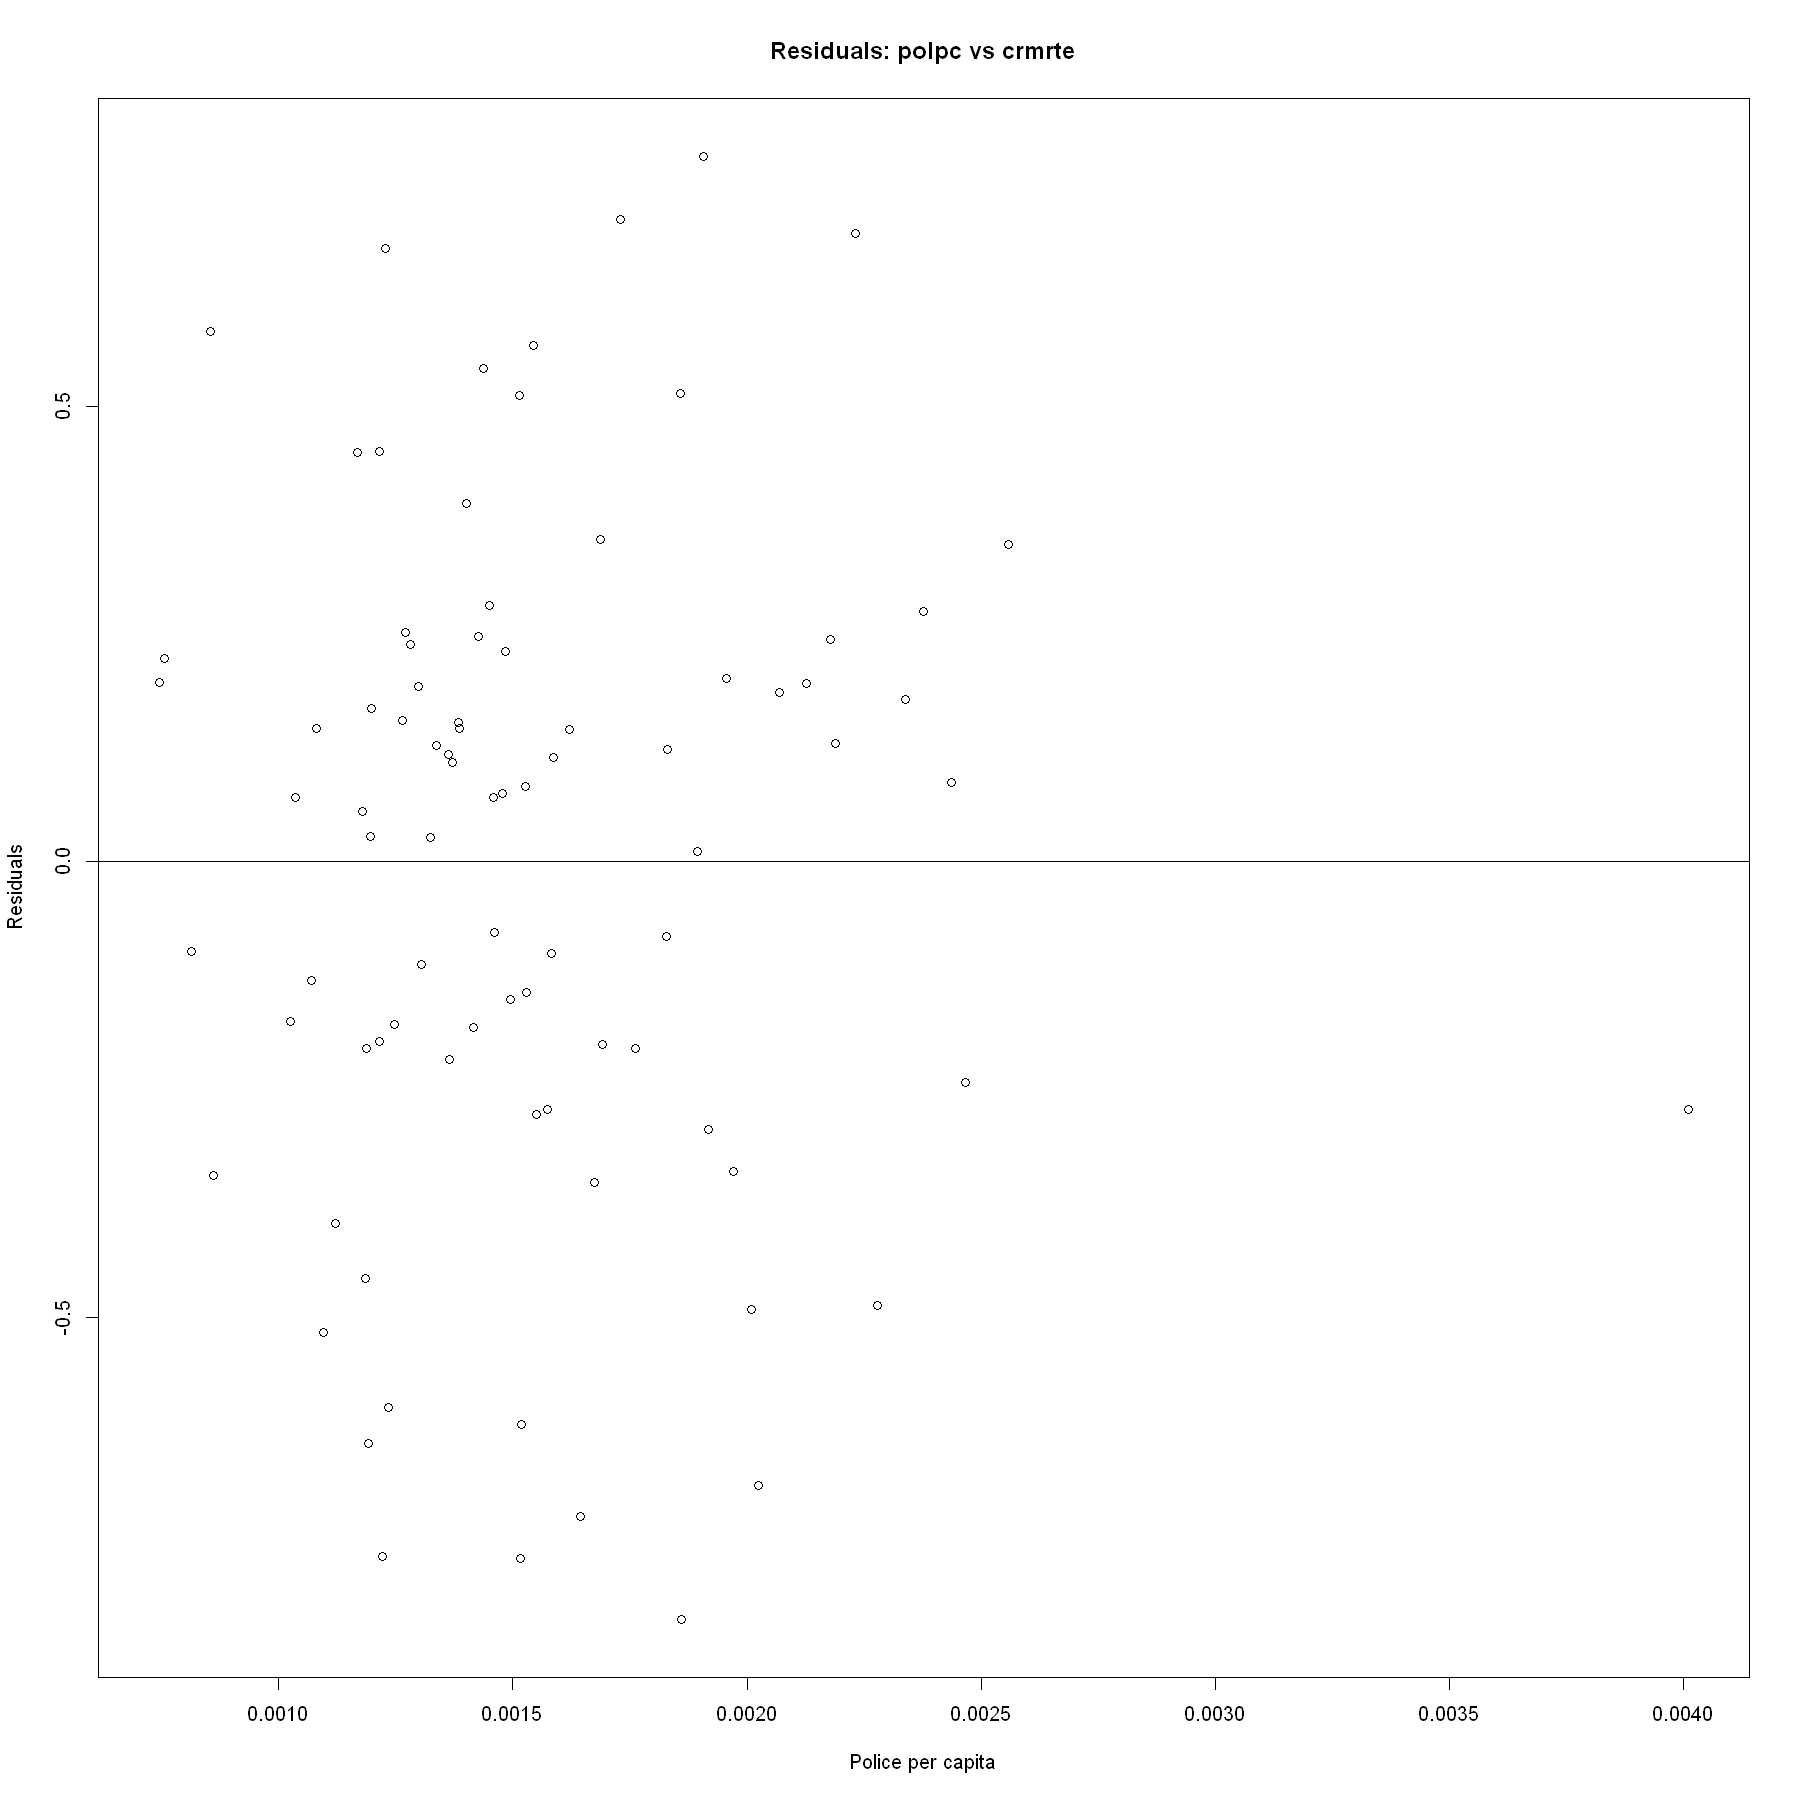

In [56]:
cat("Polpc vs crmrte (both variables we are log transforming) is the most consistent residual plot 
of the group.")
polpc.lm = lm(log(crmrte) ~ log(polpc), data=filtered_df) 
polpc.res = resid(polpc.lm)
plot(filtered_df$polpc, polpc.res, 
     ylab="Residuals", xlab="Police per capita", 
     main="Residuals: polpc vs crmrte") 
abline(0, 0) 

#### Targeted and well rationalized log transformations have clearly helped mediate zero-conditional mean assumption violations for key variables. We can see how these changes have improved our model by comparing several versions of our model2:

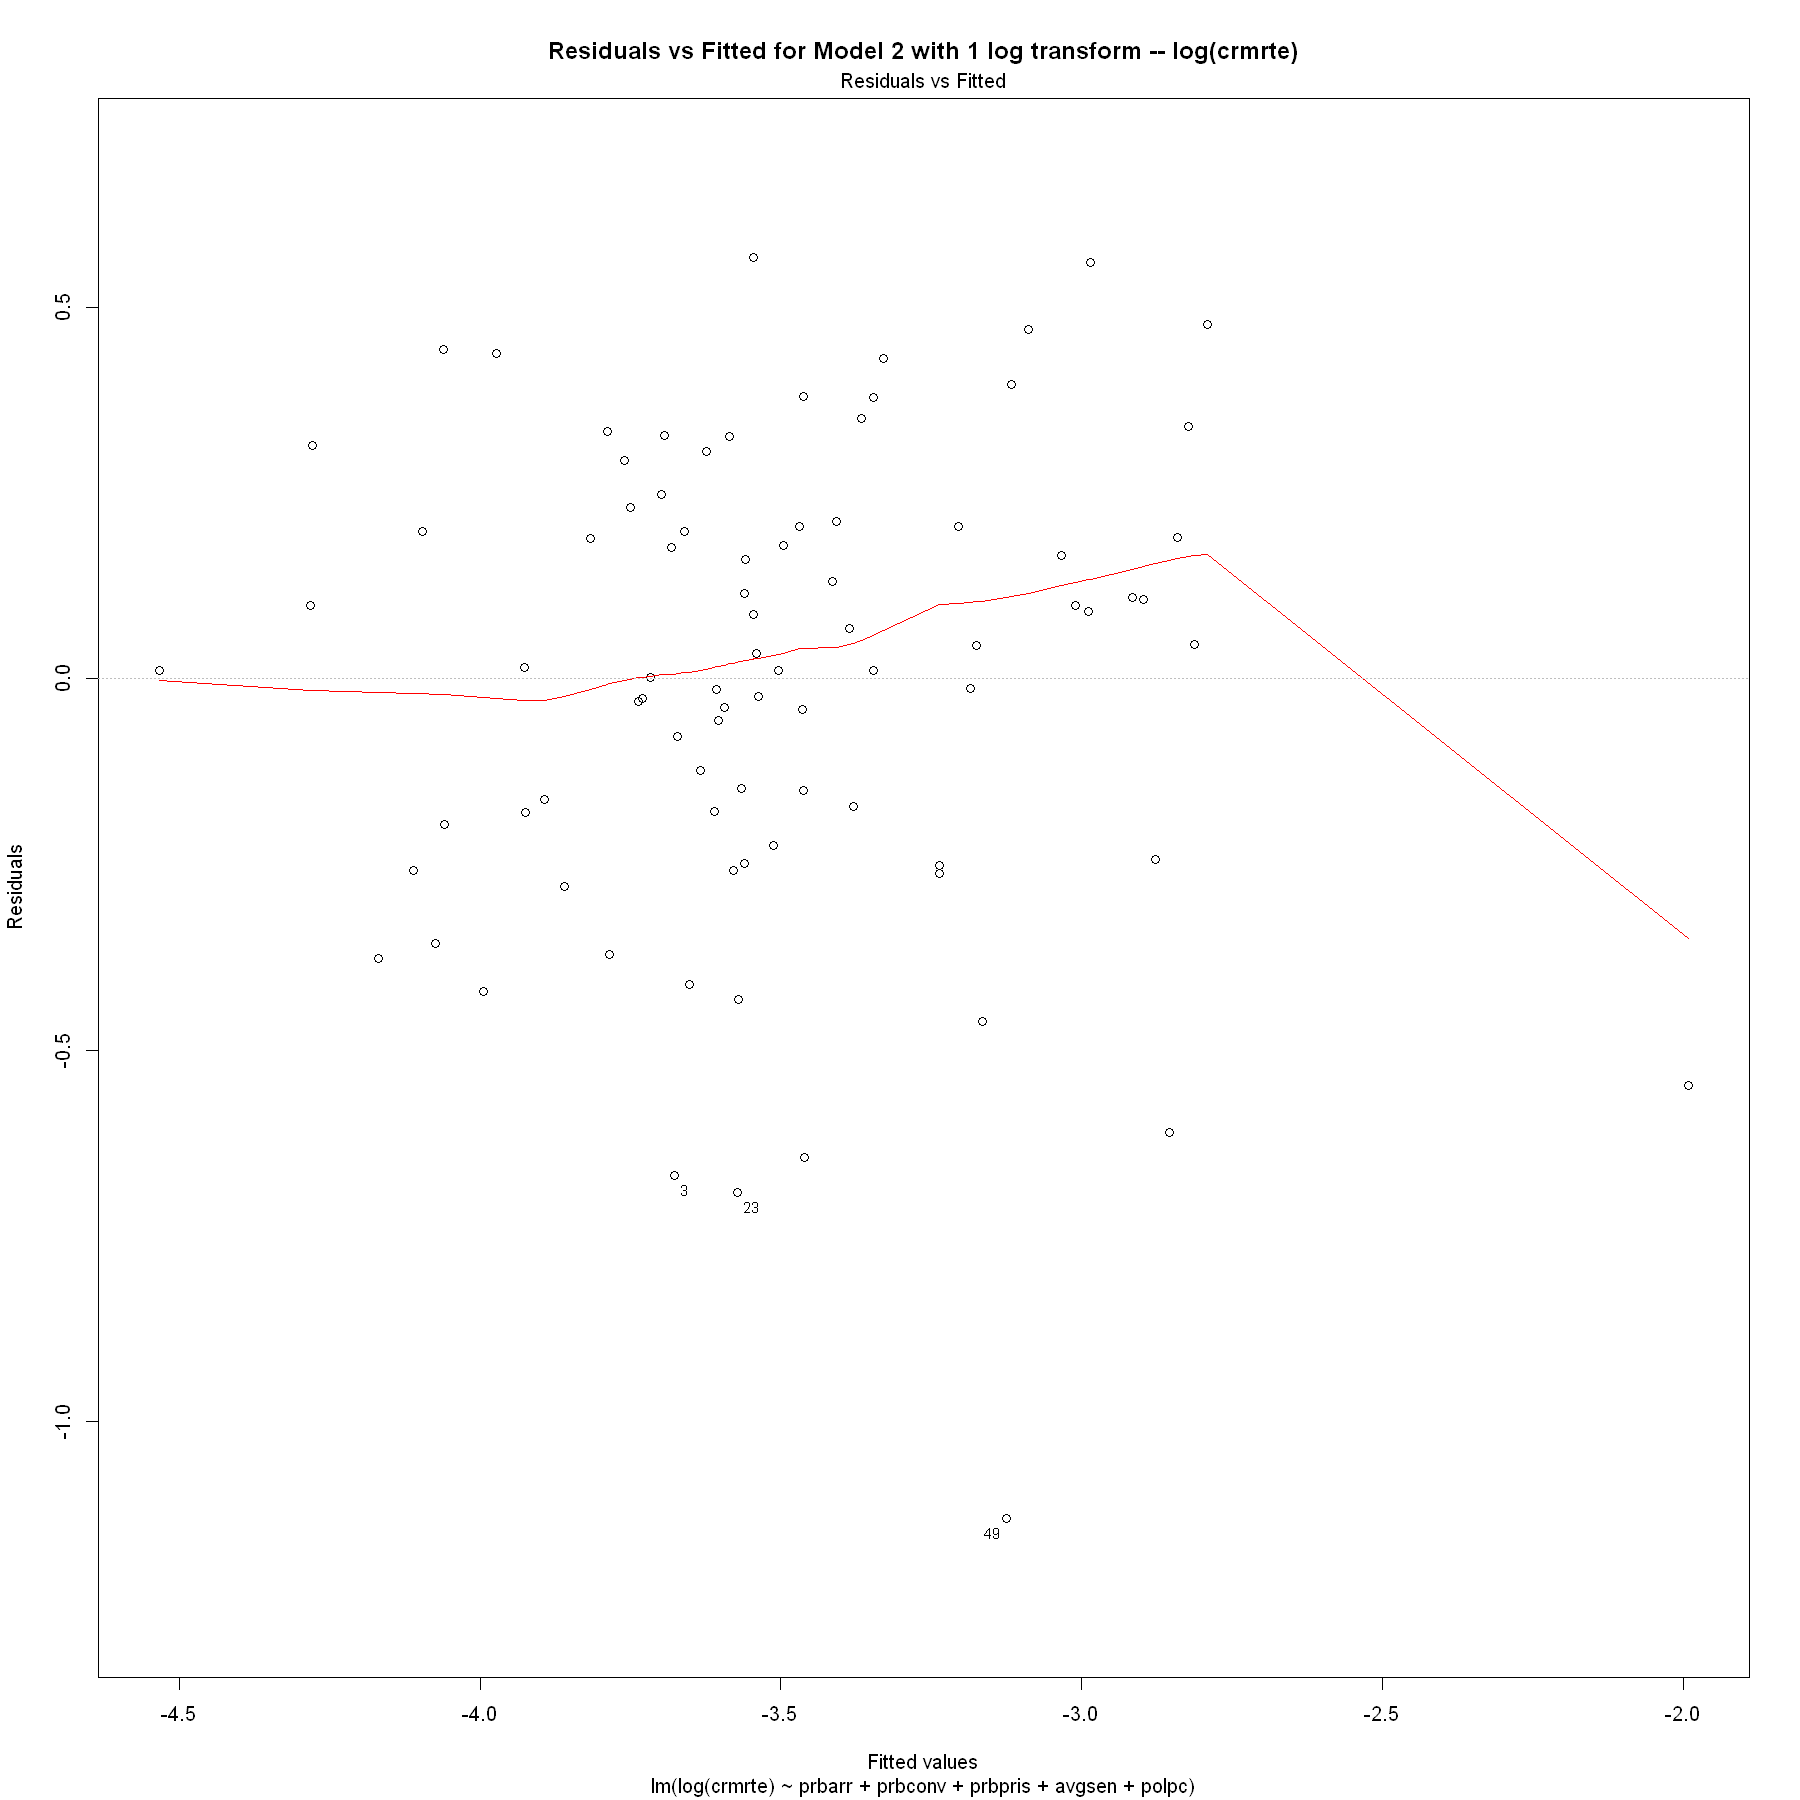

In [57]:
plot(model2_log1, which =1, main="Residuals vs Fitted for Model 2 with 1 log transform -- log(crmrte)")

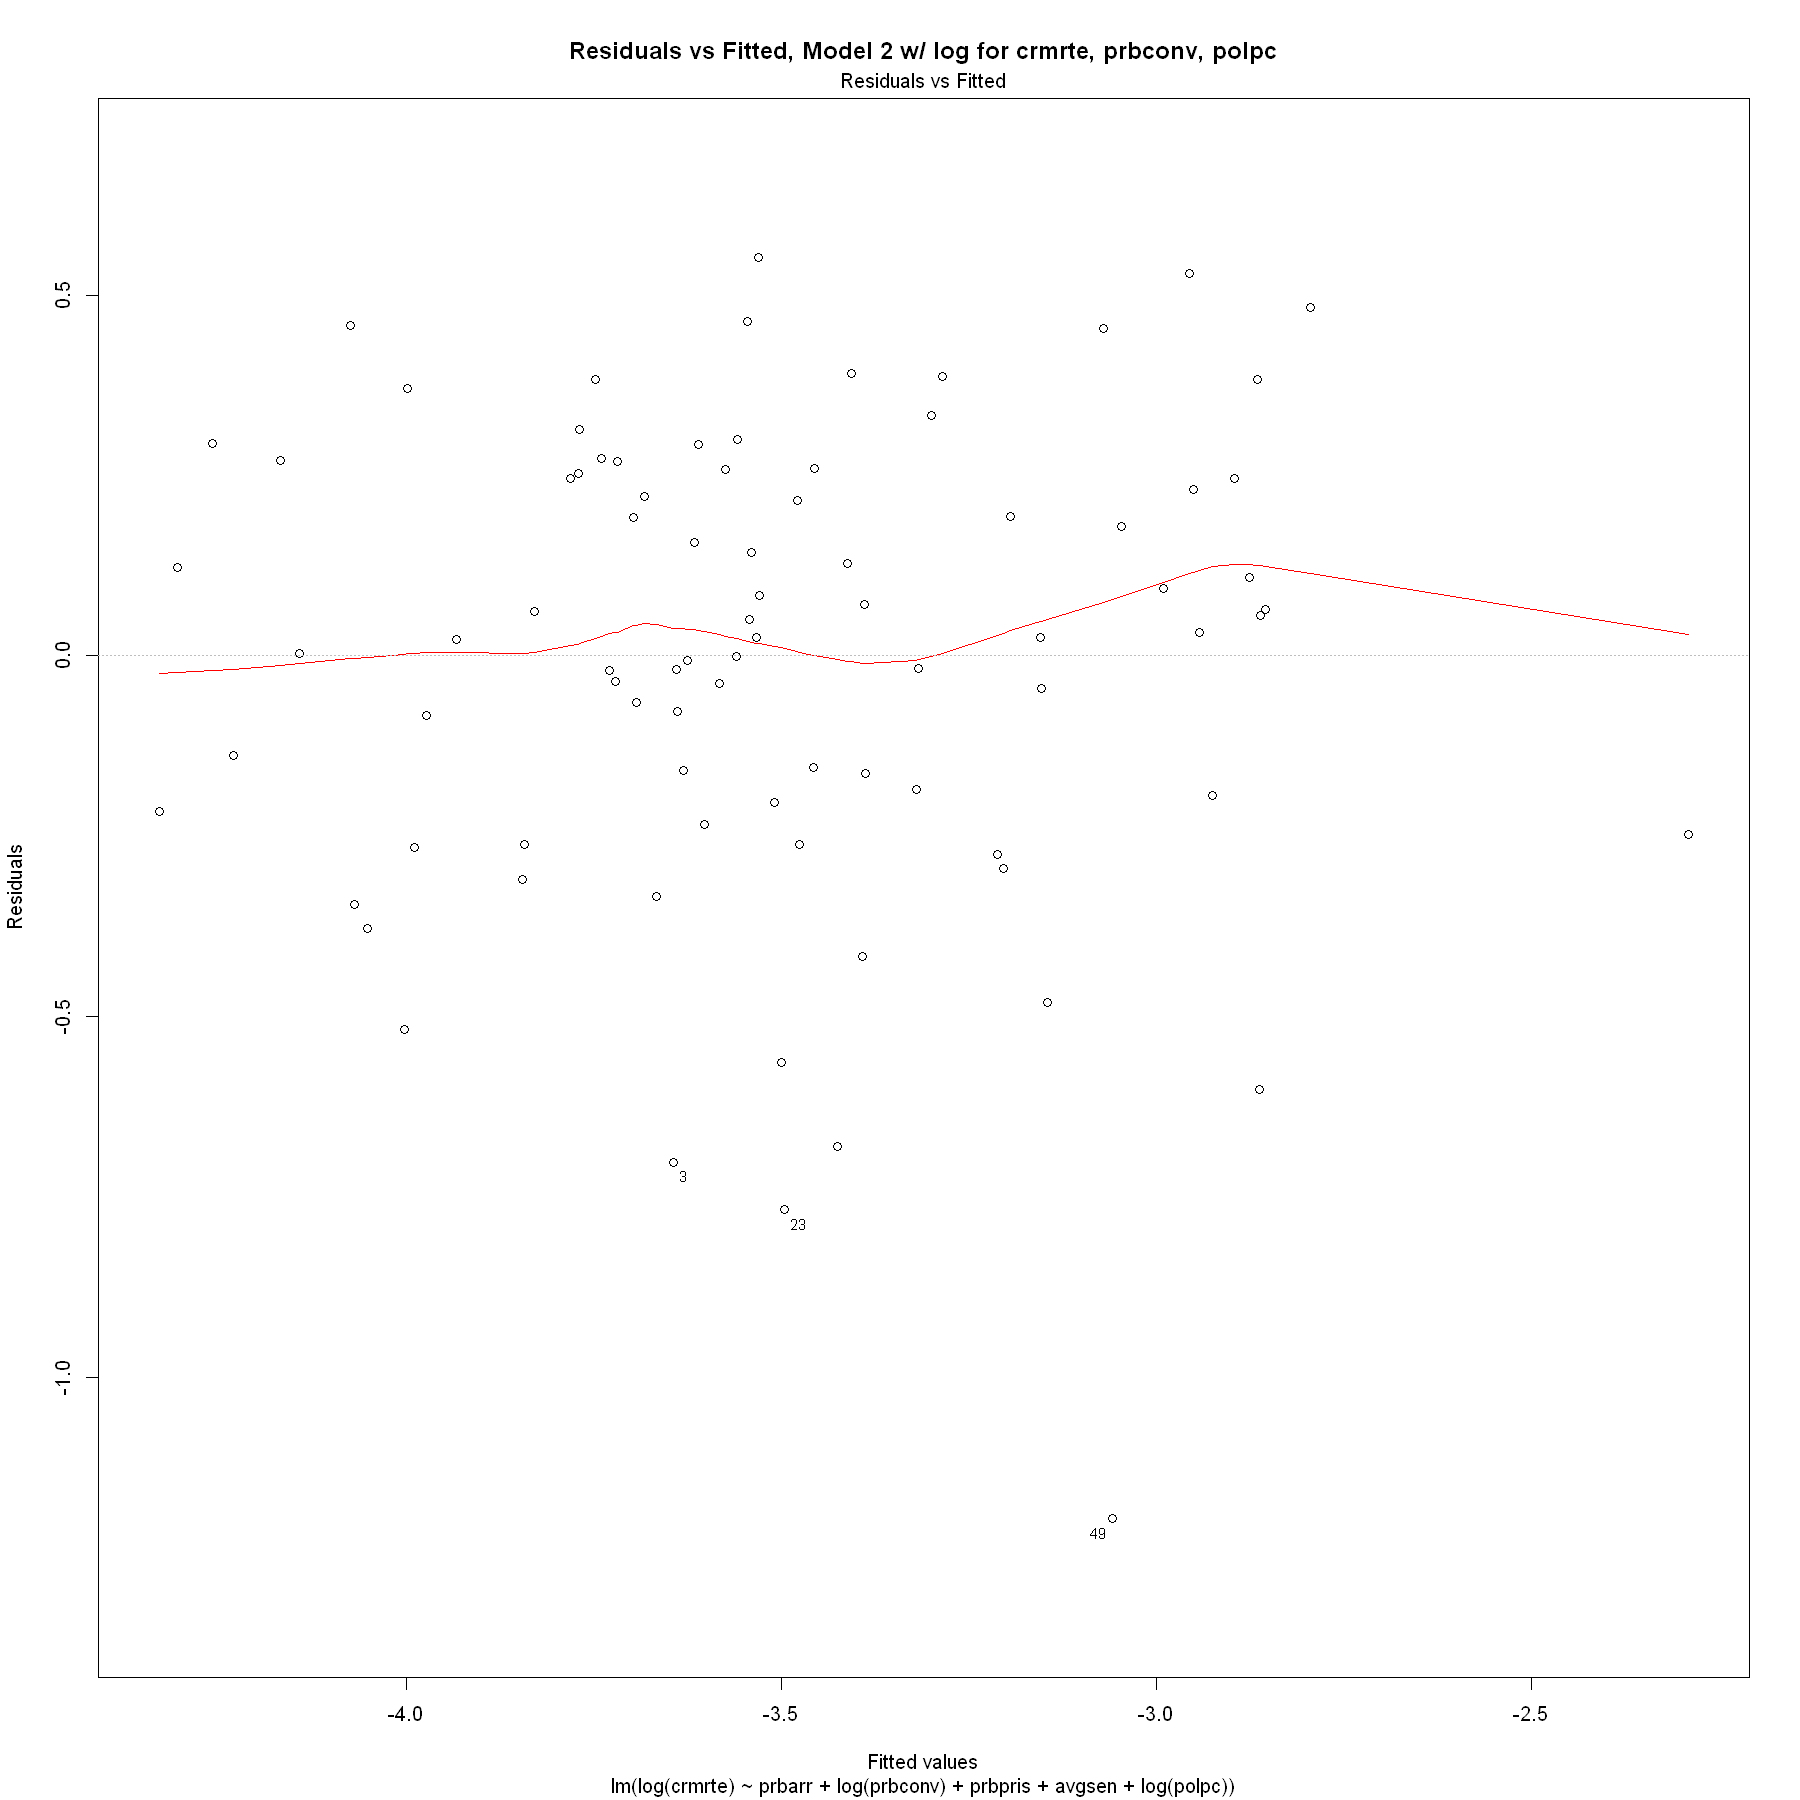

In [58]:
plot(model2_log2, which =1, main="Residuals vs Fitted, Model 2 w/ log for crmrte, prbconv, polpc")

#### Assumption MLR.5 (Heteroskedasticity) -- The variance of the error term is constant (homogeneity of variance).
$$Var(\mu_i|x_1, x_2, ..., x_k)=\sigma^2$$
- I.e., the error term cannot vary more for some values of x's than others.
- If considering error as including all unobserved factors, then factors vary equally for all values of x's
- Explanatory variable values must contain no information about variability of the error.

Our residuals vs fitted values plot canhelp us test for heteroskedasticity -- as with MLR.4: zero-conditional mean, we want a consistent band of residuals as fitted values increase from left to right. As we look at this plot for the three versions of model2 above, we note that our transformations seem to benefit our push toward homoskedasticity as our residuals in model2_log2 are far more consistent than our residuals in the untransformed original version of model2. We note that the red spline curve does not help us detect deviation in skedasticity as it represents deviation from the mean, not shape of the mean.

To inspect for heteroskedasticity, we can plot fitted values vs the square root of the standardized residuals -- i.e. we can generate a scale-location plot. With this plot, we can see that our model2_log2 has less heteroskedasticity than our original model2. However, even model2_log2 does not seem perfect.

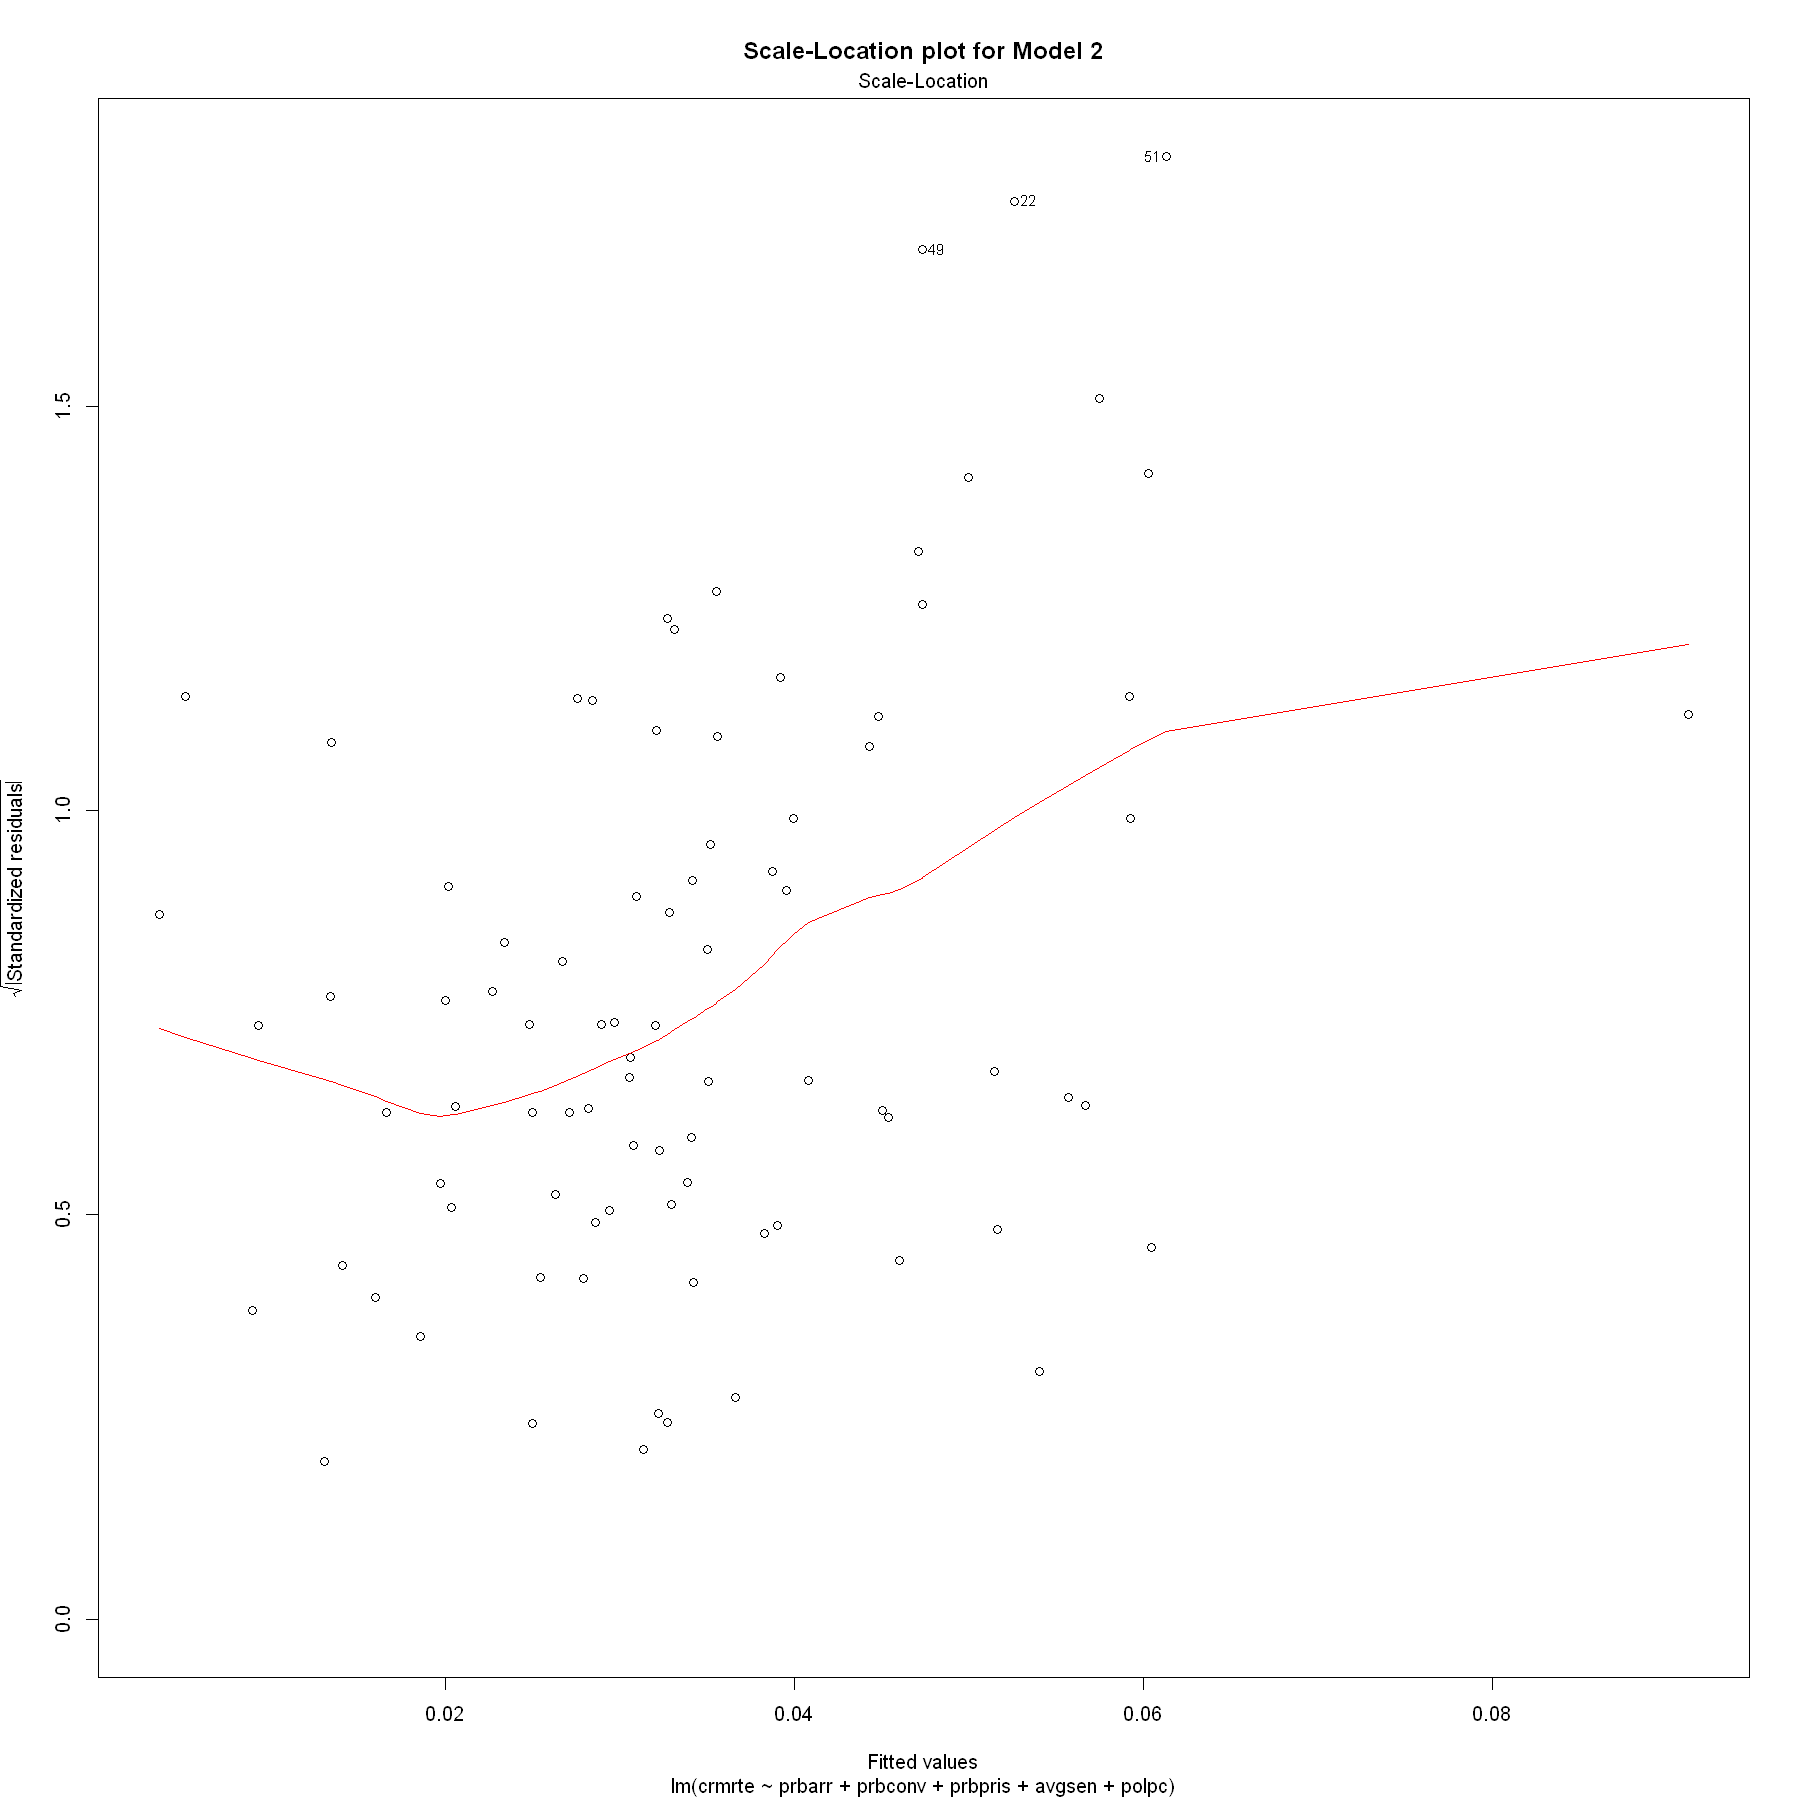

In [59]:
plot(model2, which =3, main="Scale-Location plot for Model 2")

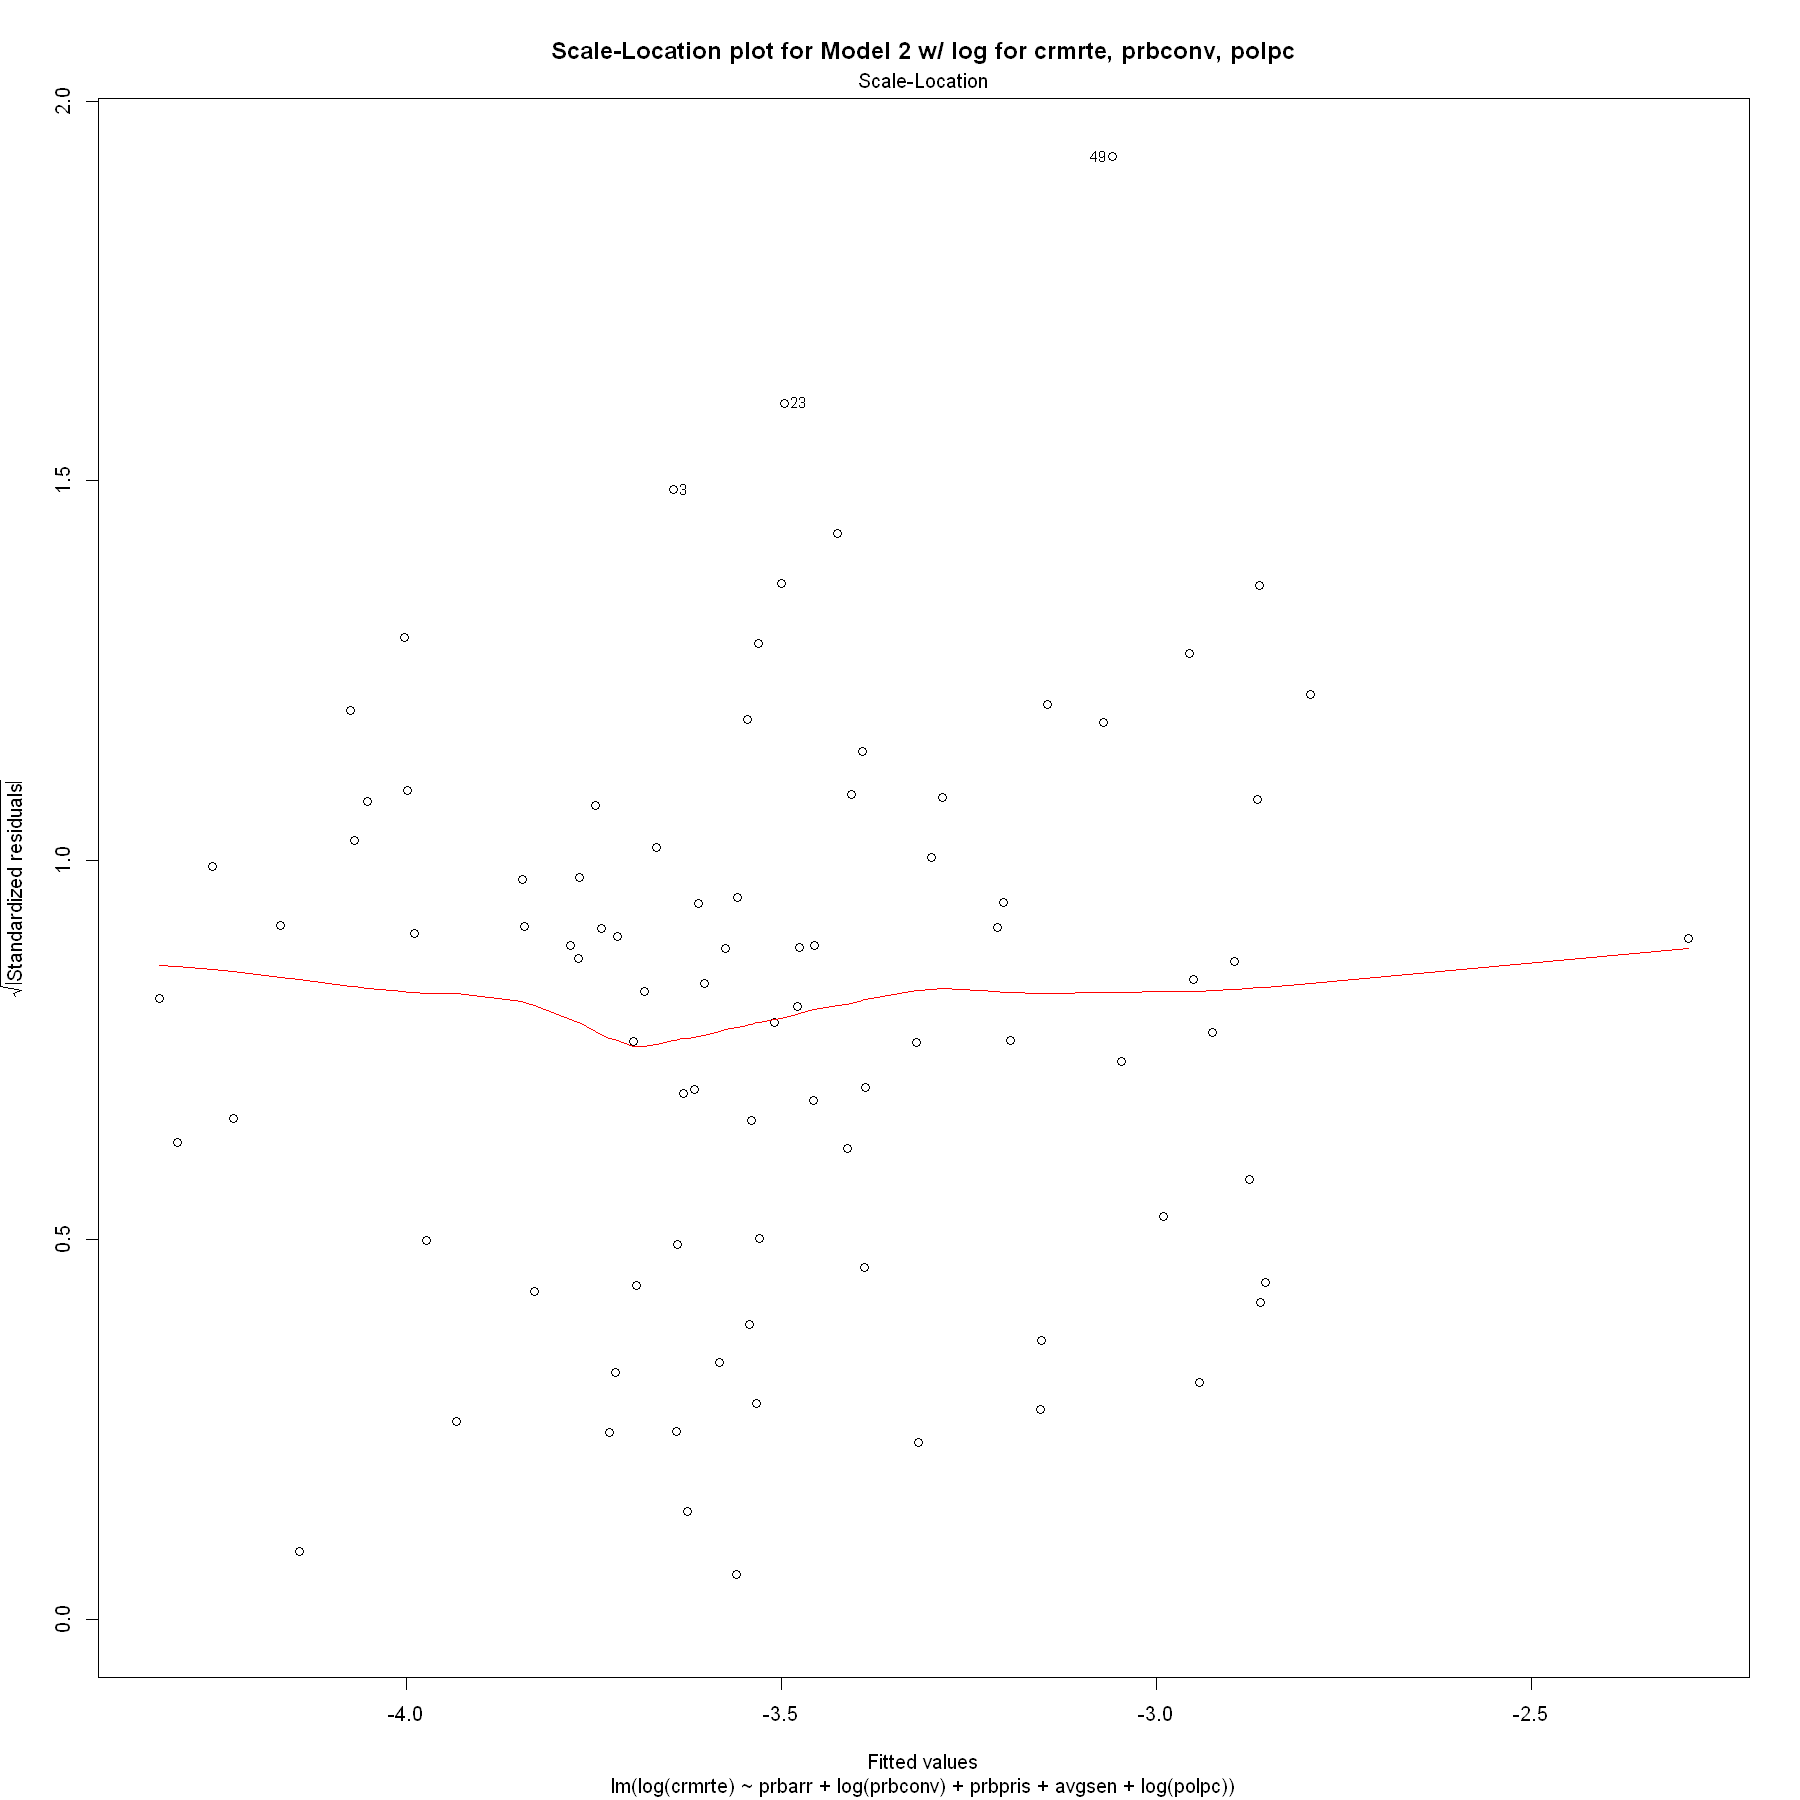

In [60]:
plot(model2_log2, which =3, main="Scale-Location plot for Model 2 w/ log for crmrte, prbconv, polpc")

#### Breusch-Pagan Test

An additional test for heteroskedasticity is the Breusch Pagan test. With an n of 90, this test could be helpful. With BP, low n can result in difficulty demonstrating heteroskedasticity when it is present, and with high n, the test may show statistically significant heteroskedasticity when the effect size is small and the heteroskedasticity is meaningless. 

The null hypothesis for this test is homoskedasticity. Testing our model2 and model2_log2, we note model 2 has a p-value suggesting significant heteroskedasticity while our model2_log2 does not seem to have significant heteroskedasticity.

In [61]:
bptest(model2)


	studentized Breusch-Pagan test

data:  model2
BP = 15.634, df = 5, p-value = 0.00797


In [62]:
bptest(model2_log2)


	studentized Breusch-Pagan test

data:  model2_log2
BP = 6.8974, df = 5, p-value = 0.2284


#### Assumption MLR.6 (Normality of error terms) -- each error has a normal distribution
$$\mu_i \sim N(0,\sigma^2)$$
independently of $x_{i1},x_{i2}, ..., x_{ik}$
- Assume the errors are drawn from a normal distribution with mean zero.
- Also assume the errors are independent of our x's, so the distribution looks the same conditional on any values of the xs.

To test for normality in error terms -- our residuals are estimates of error -- we plot a histogram of the model residuals and see if they look normal.

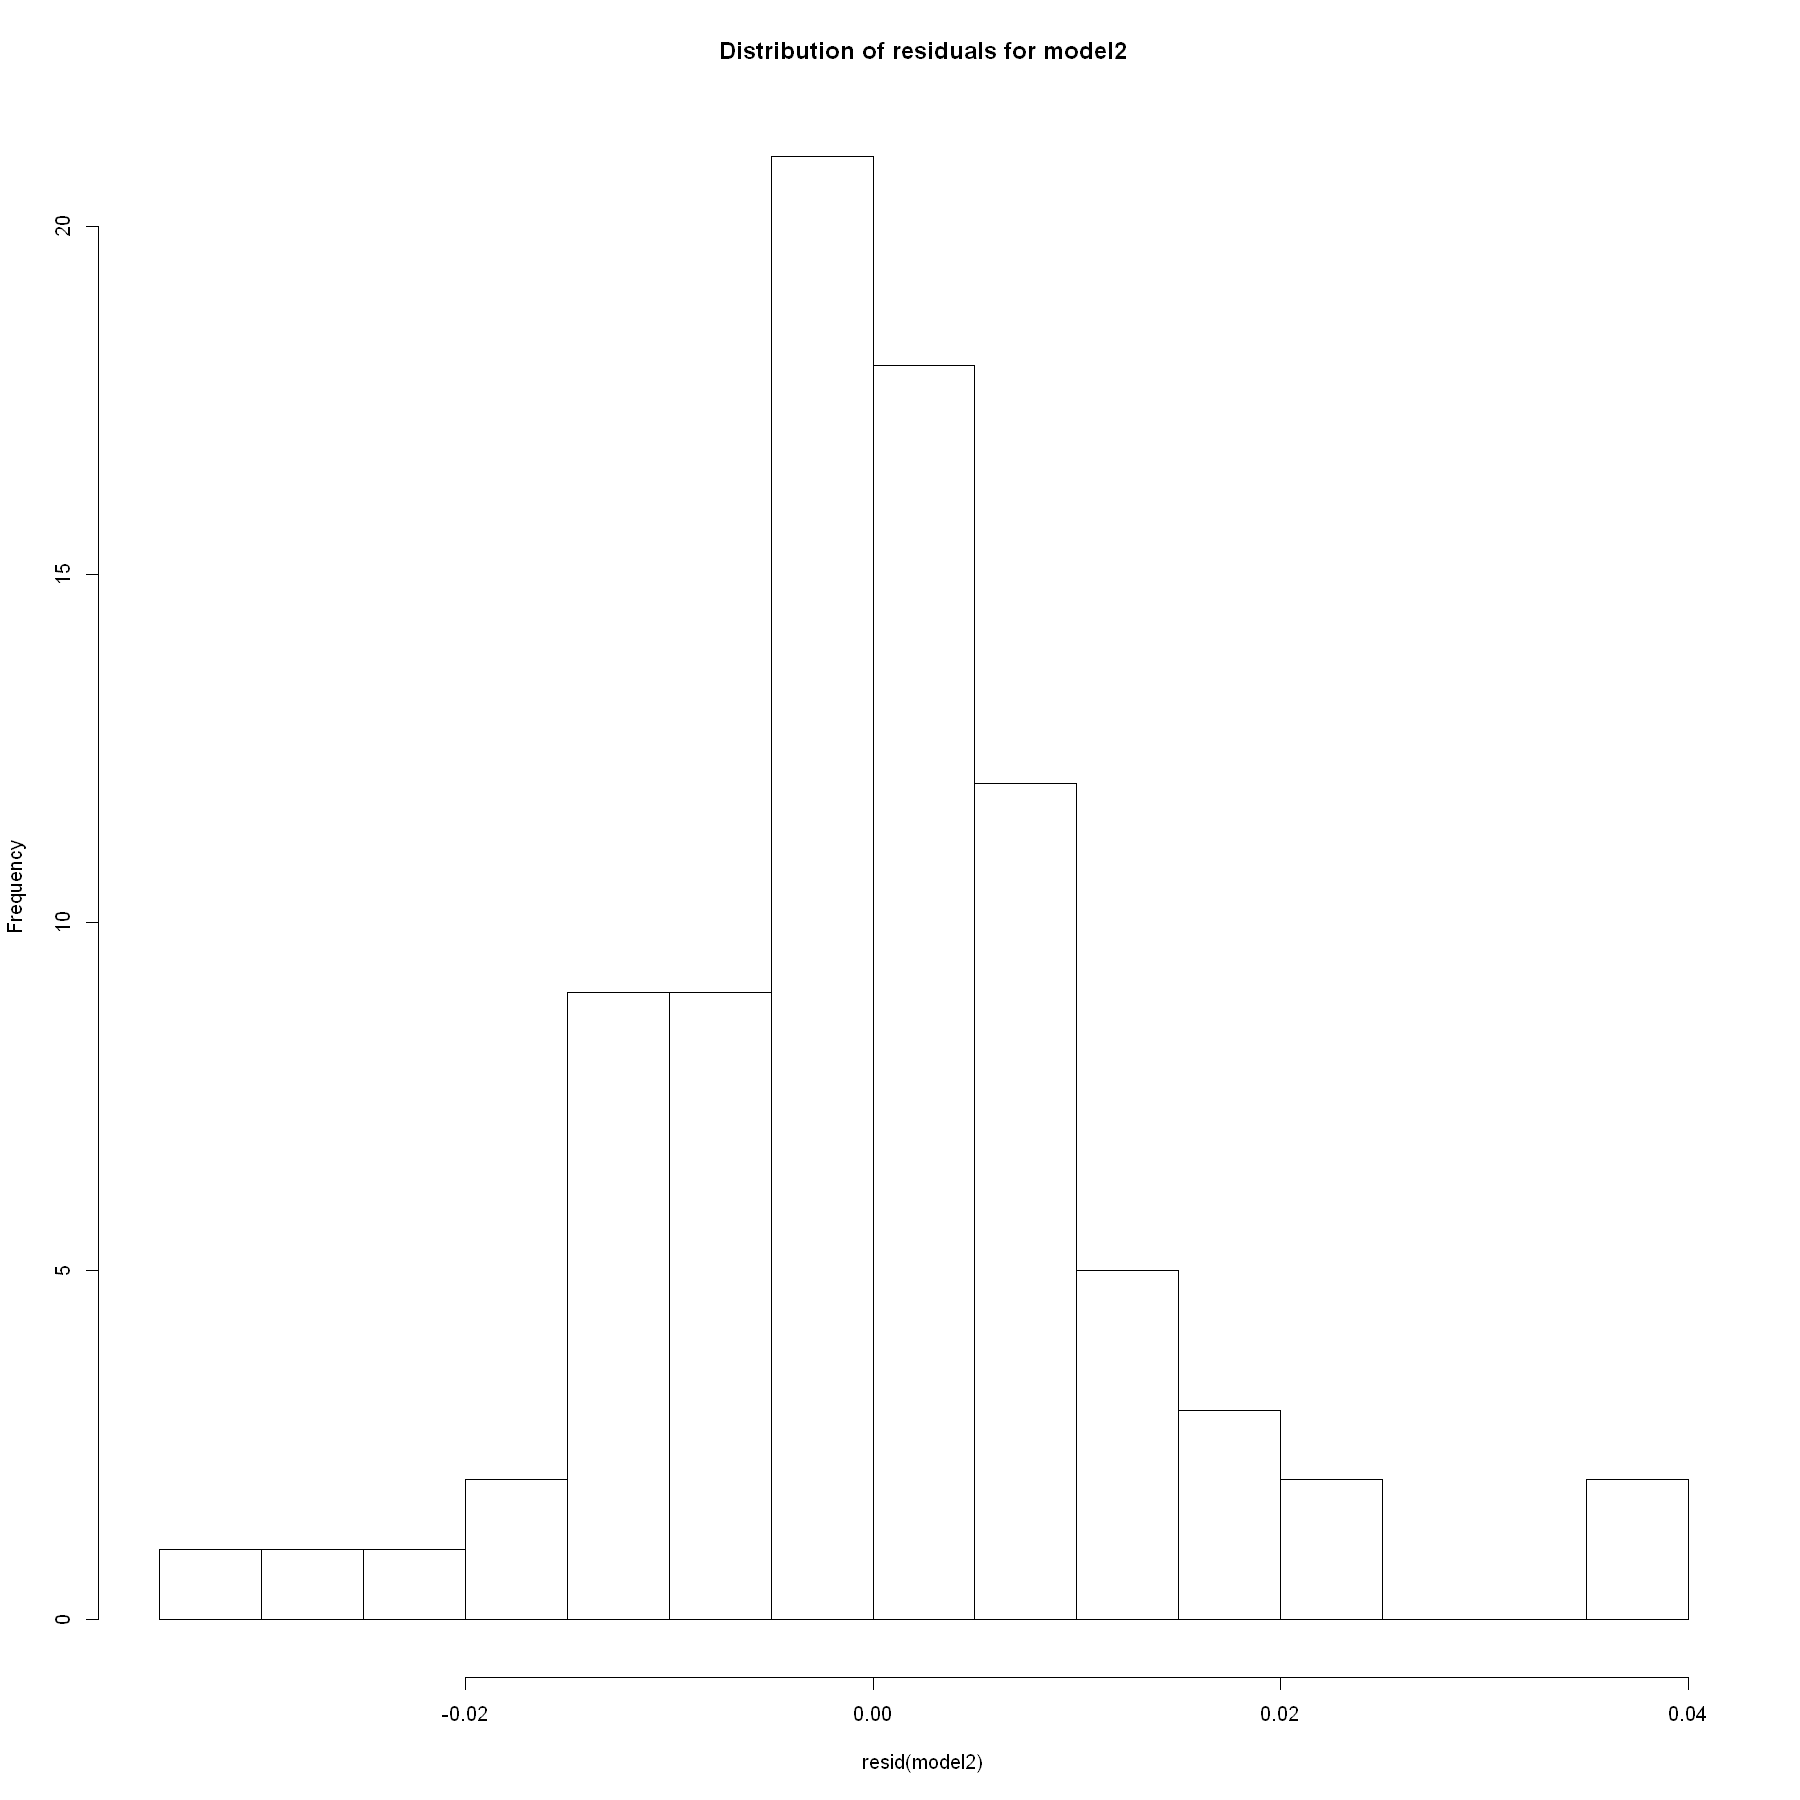

In [63]:
hist(resid(model2), breaks = 20, main="Distribution of residuals for model2")

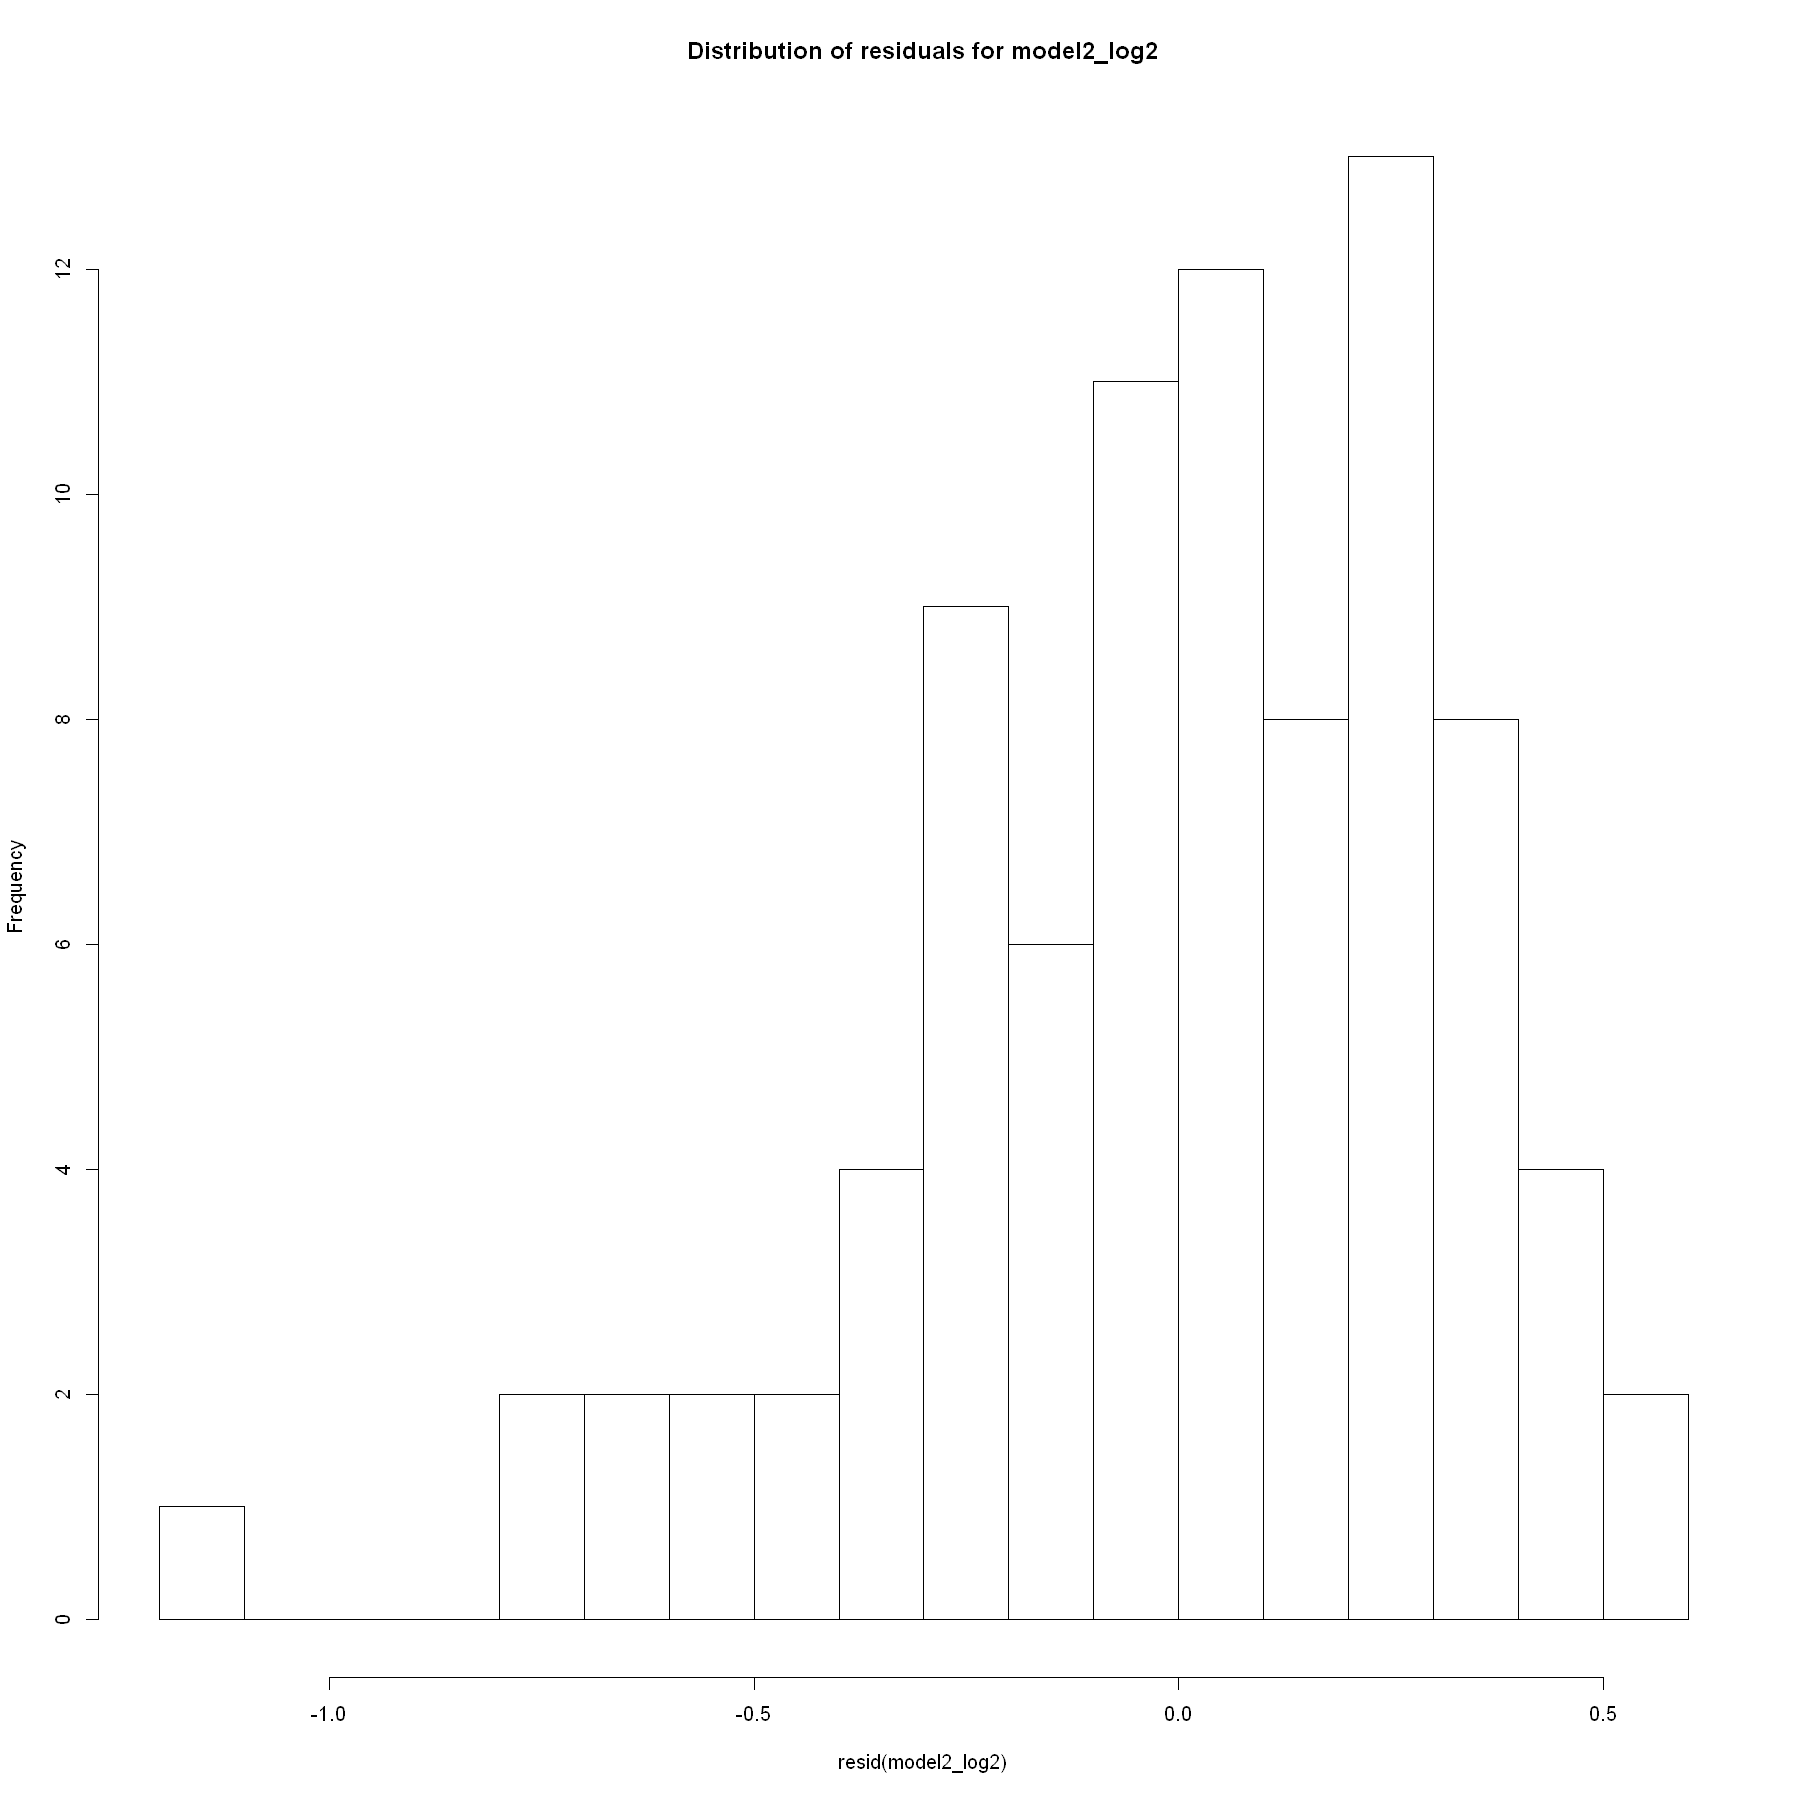

In [64]:
hist(resid(model2_log2), breaks = 20, main="Distribution of residuals for model2_log2")

Alternately, we can take a QQ plot of the residuals For each data point, the y-coordinate is its standardized residual (i.e., residual divided by the standard deviation of the residuals) and the x-coordinate is what the standardized residual would be if the errors were perfectly normally distributed. Thus, for normally distributed errors, we expect to see a perfect diagonal line reflecting this 1:1 relationship. Where the plot deviates from this 45 degree diagonal, we know the residuals are not perfectly normal.

For both of the below graphs, our residuals seem close to normal. We do note some evidence of non-normality which seems to be driven at the tails of the residual distribution. Upon visual inspection of these plots, it is hard ot say if one has more normal residuals than the other. We will use the Shapiro-Wilk test below to gather a second, more quantitative opinion. 

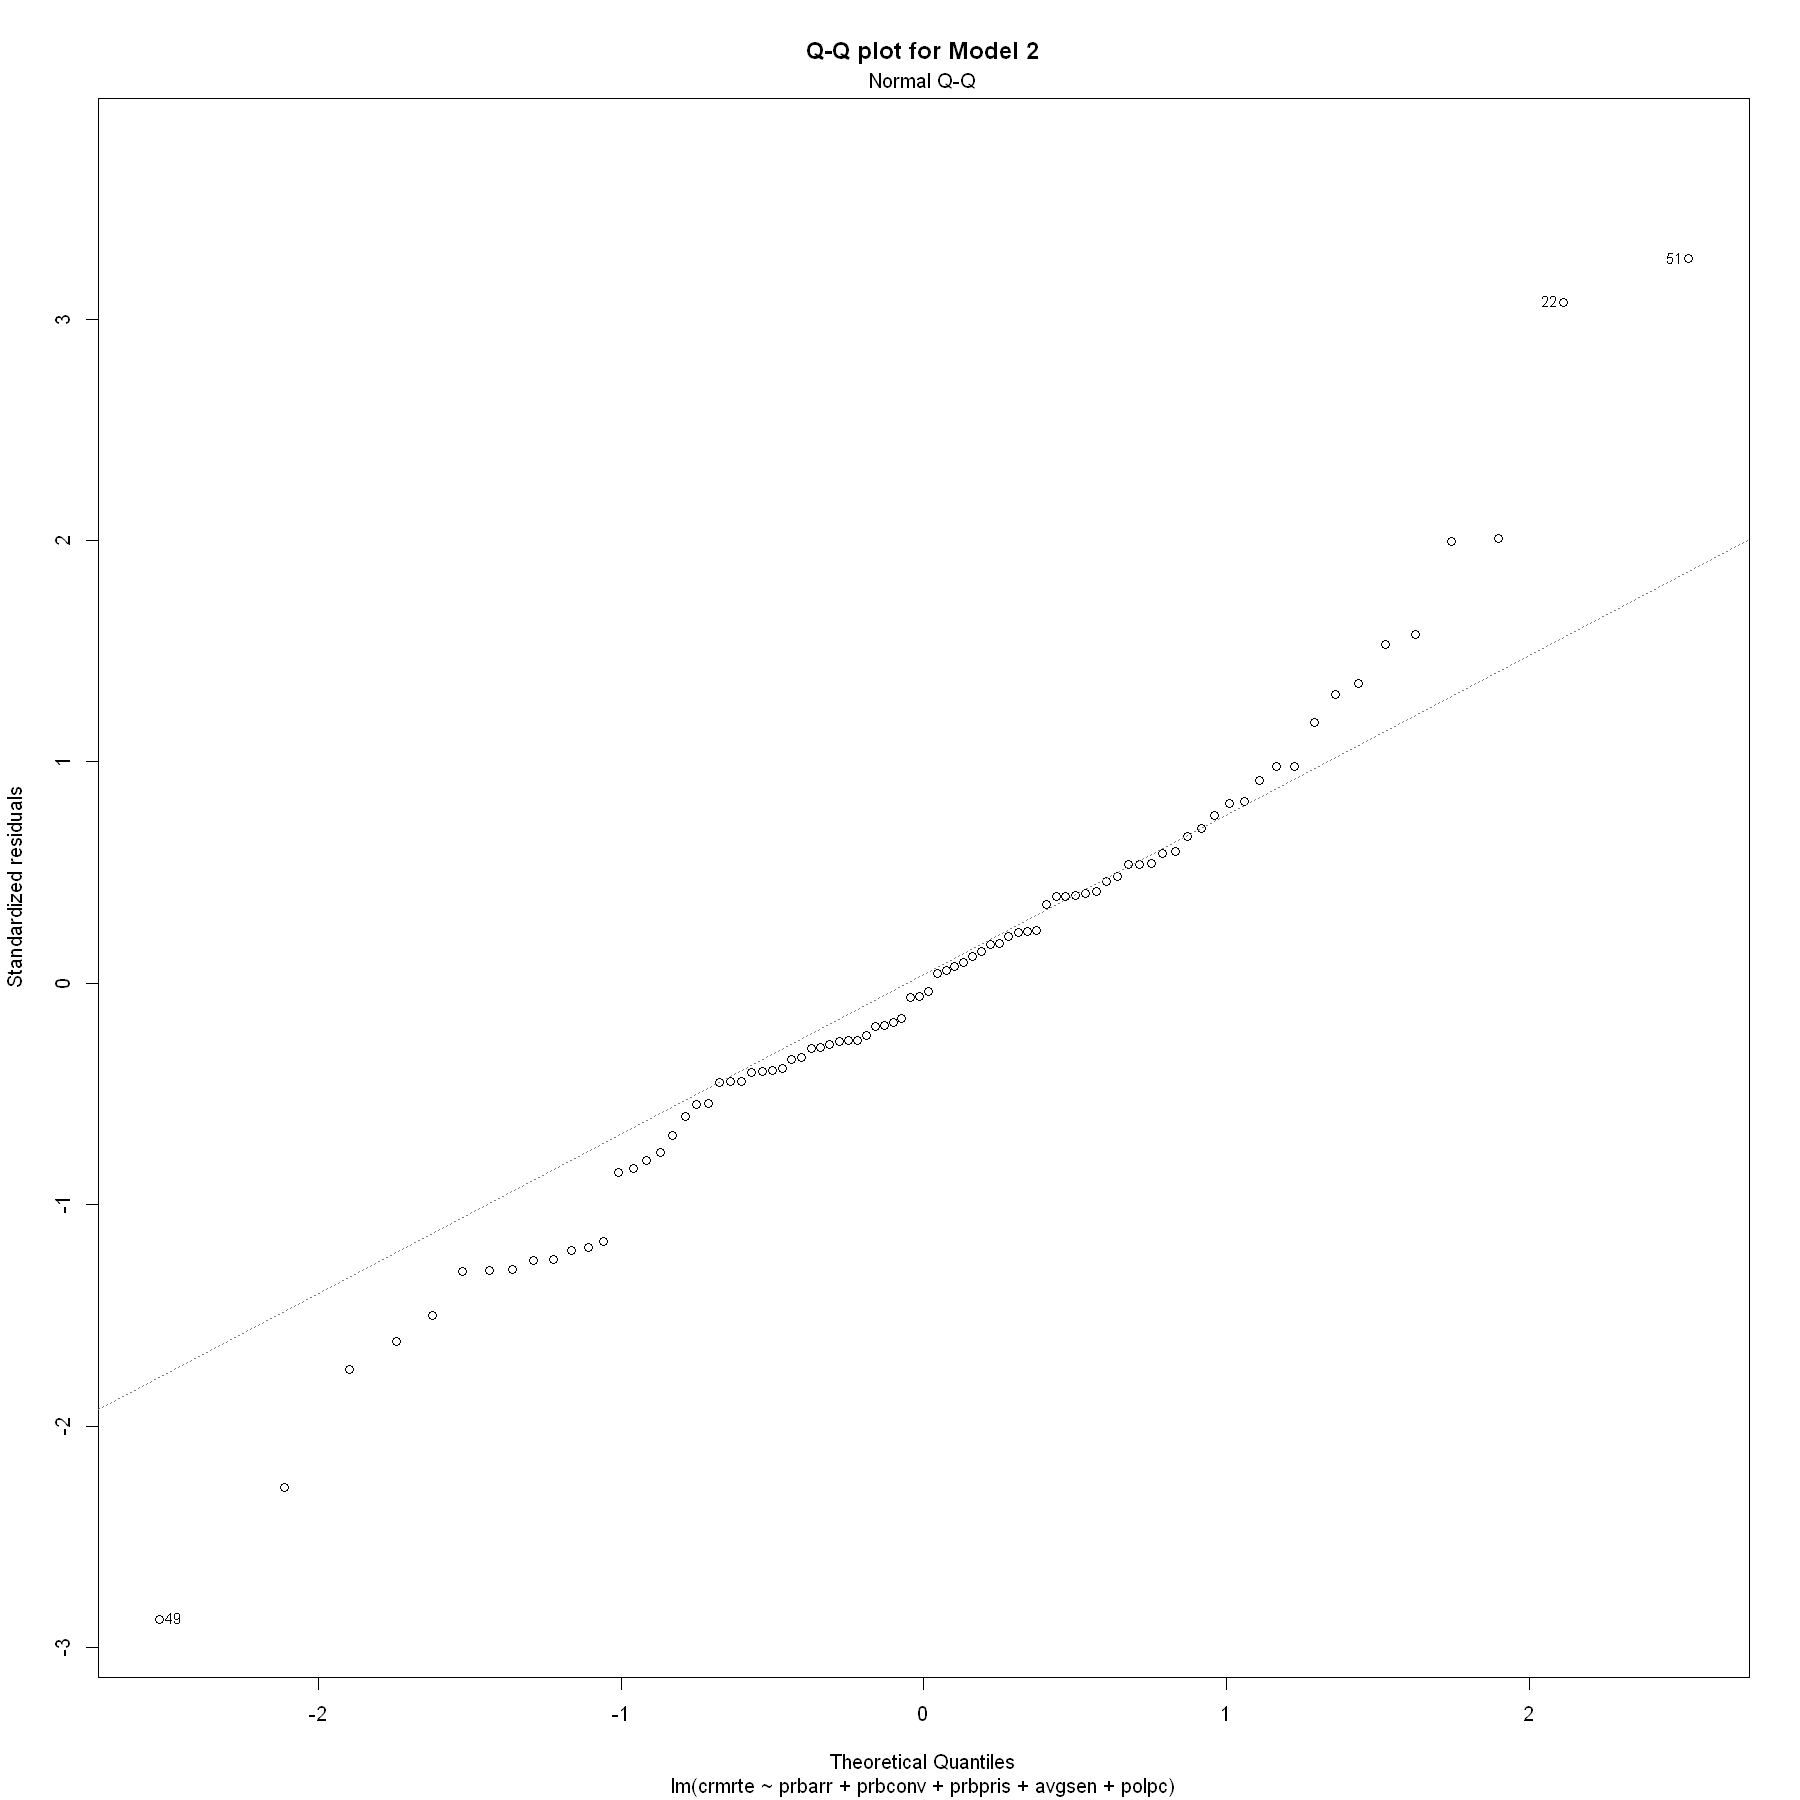

In [65]:
plot(model2, which =2, main="Q-Q plot for Model 2")

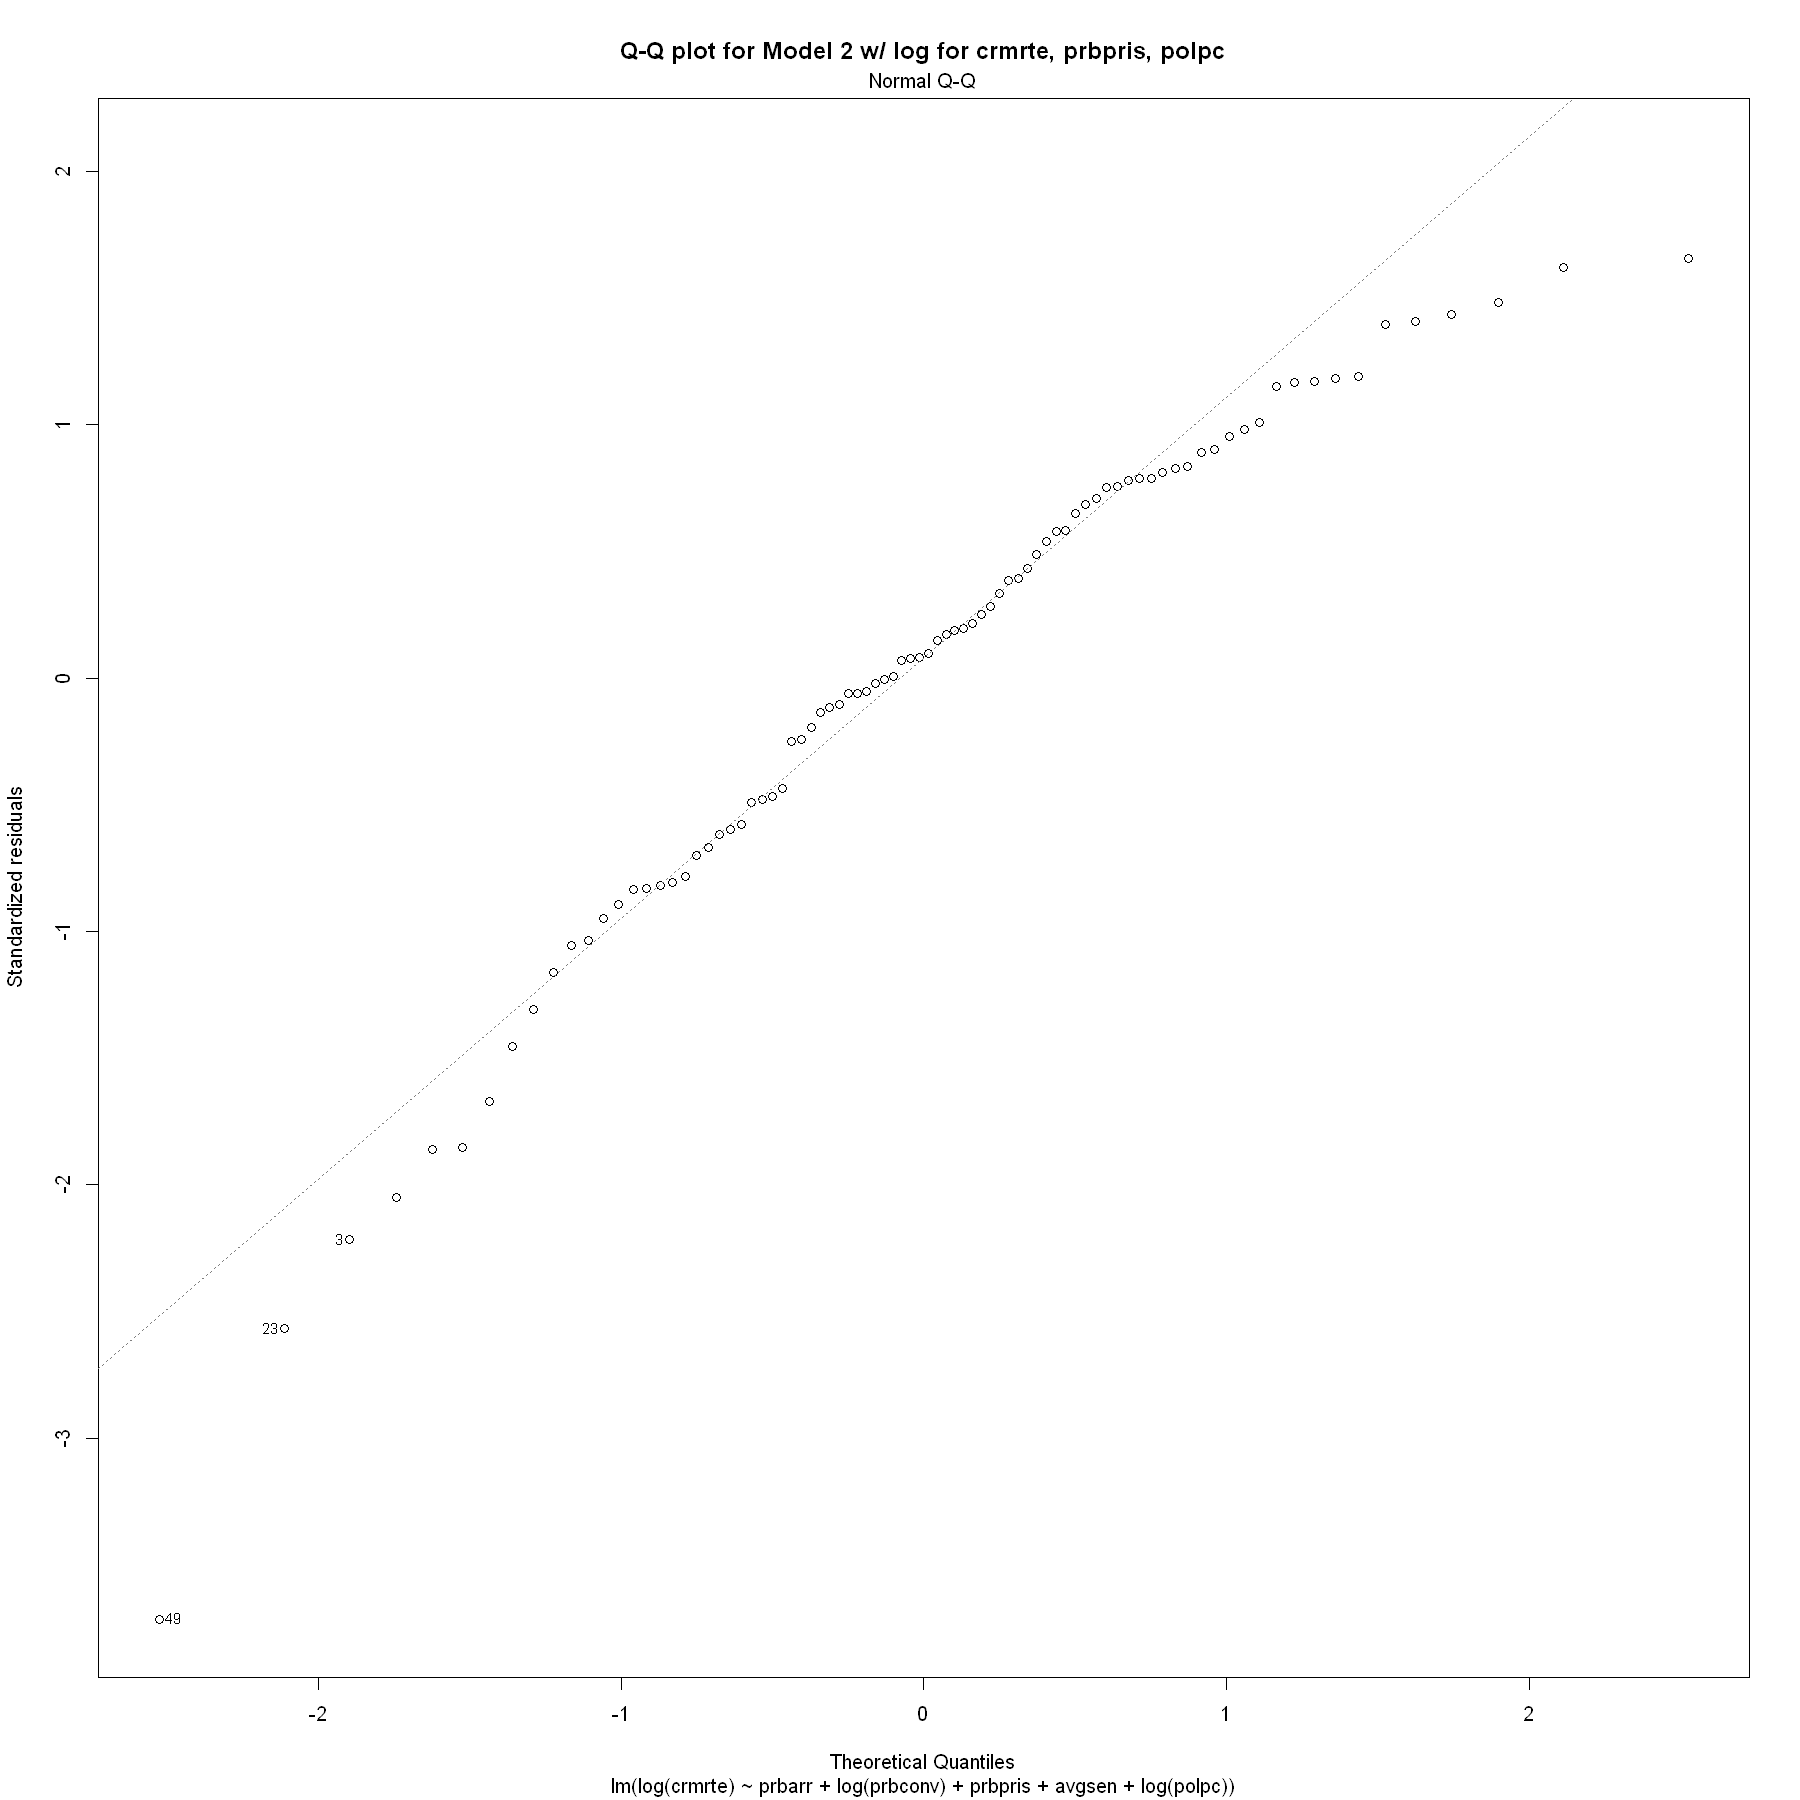

In [66]:
plot(model2_log2, which =2, main="Q-Q plot for Model 2 w/ log for crmrte, prbpris, polpc")

As mentioned above, we can also run a Shapiro-Wilk test for normality. As with the Breusch-Pagan test, n matters -- low n can result in difficulty demonstrating heteroskedasticity when it is present, and with high n, the test may show statistically significant heteroskedasticity when the effect size is small and the heteroskedasticity is meaningless. With our n of 90, this test could be helpful.   

Testing our model2 and model2_log2, we note model2 has a p-value suggesting the residuals do not significantly deviate from normal (although, p=0.052 is very close to significant at a 5% level). Unfortunately, our model2_log2 does seem to have significant deviation from normality in its residual values.

Because we have a large dataset as defined by n>30, we may somewhat rely on the asymptotic properties of OLS. A large dataset also means we do not need the normality assumption to establish the shape of our sampling distribution. We are further comforted because our Q-Q plot looks reasonable if not perfect.

In [67]:
shapiro.test(resid(model2))


	Shapiro-Wilk normality test

data:  resid(model2)
W = 0.96759, p-value = 0.02939


In [68]:
shapiro.test(resid(model2_log2))


	Shapiro-Wilk normality test

data:  resid(model2_log2)
W = 0.95667, p-value = 0.005725


One recommendation to adjust for non-normal residual distribution is to check to see if our 
dependent variable is skewed. If it is, a solution would be to log-transform the y variable. 
As we have log-transformed this variable, we have already made a key adjustment toward normality

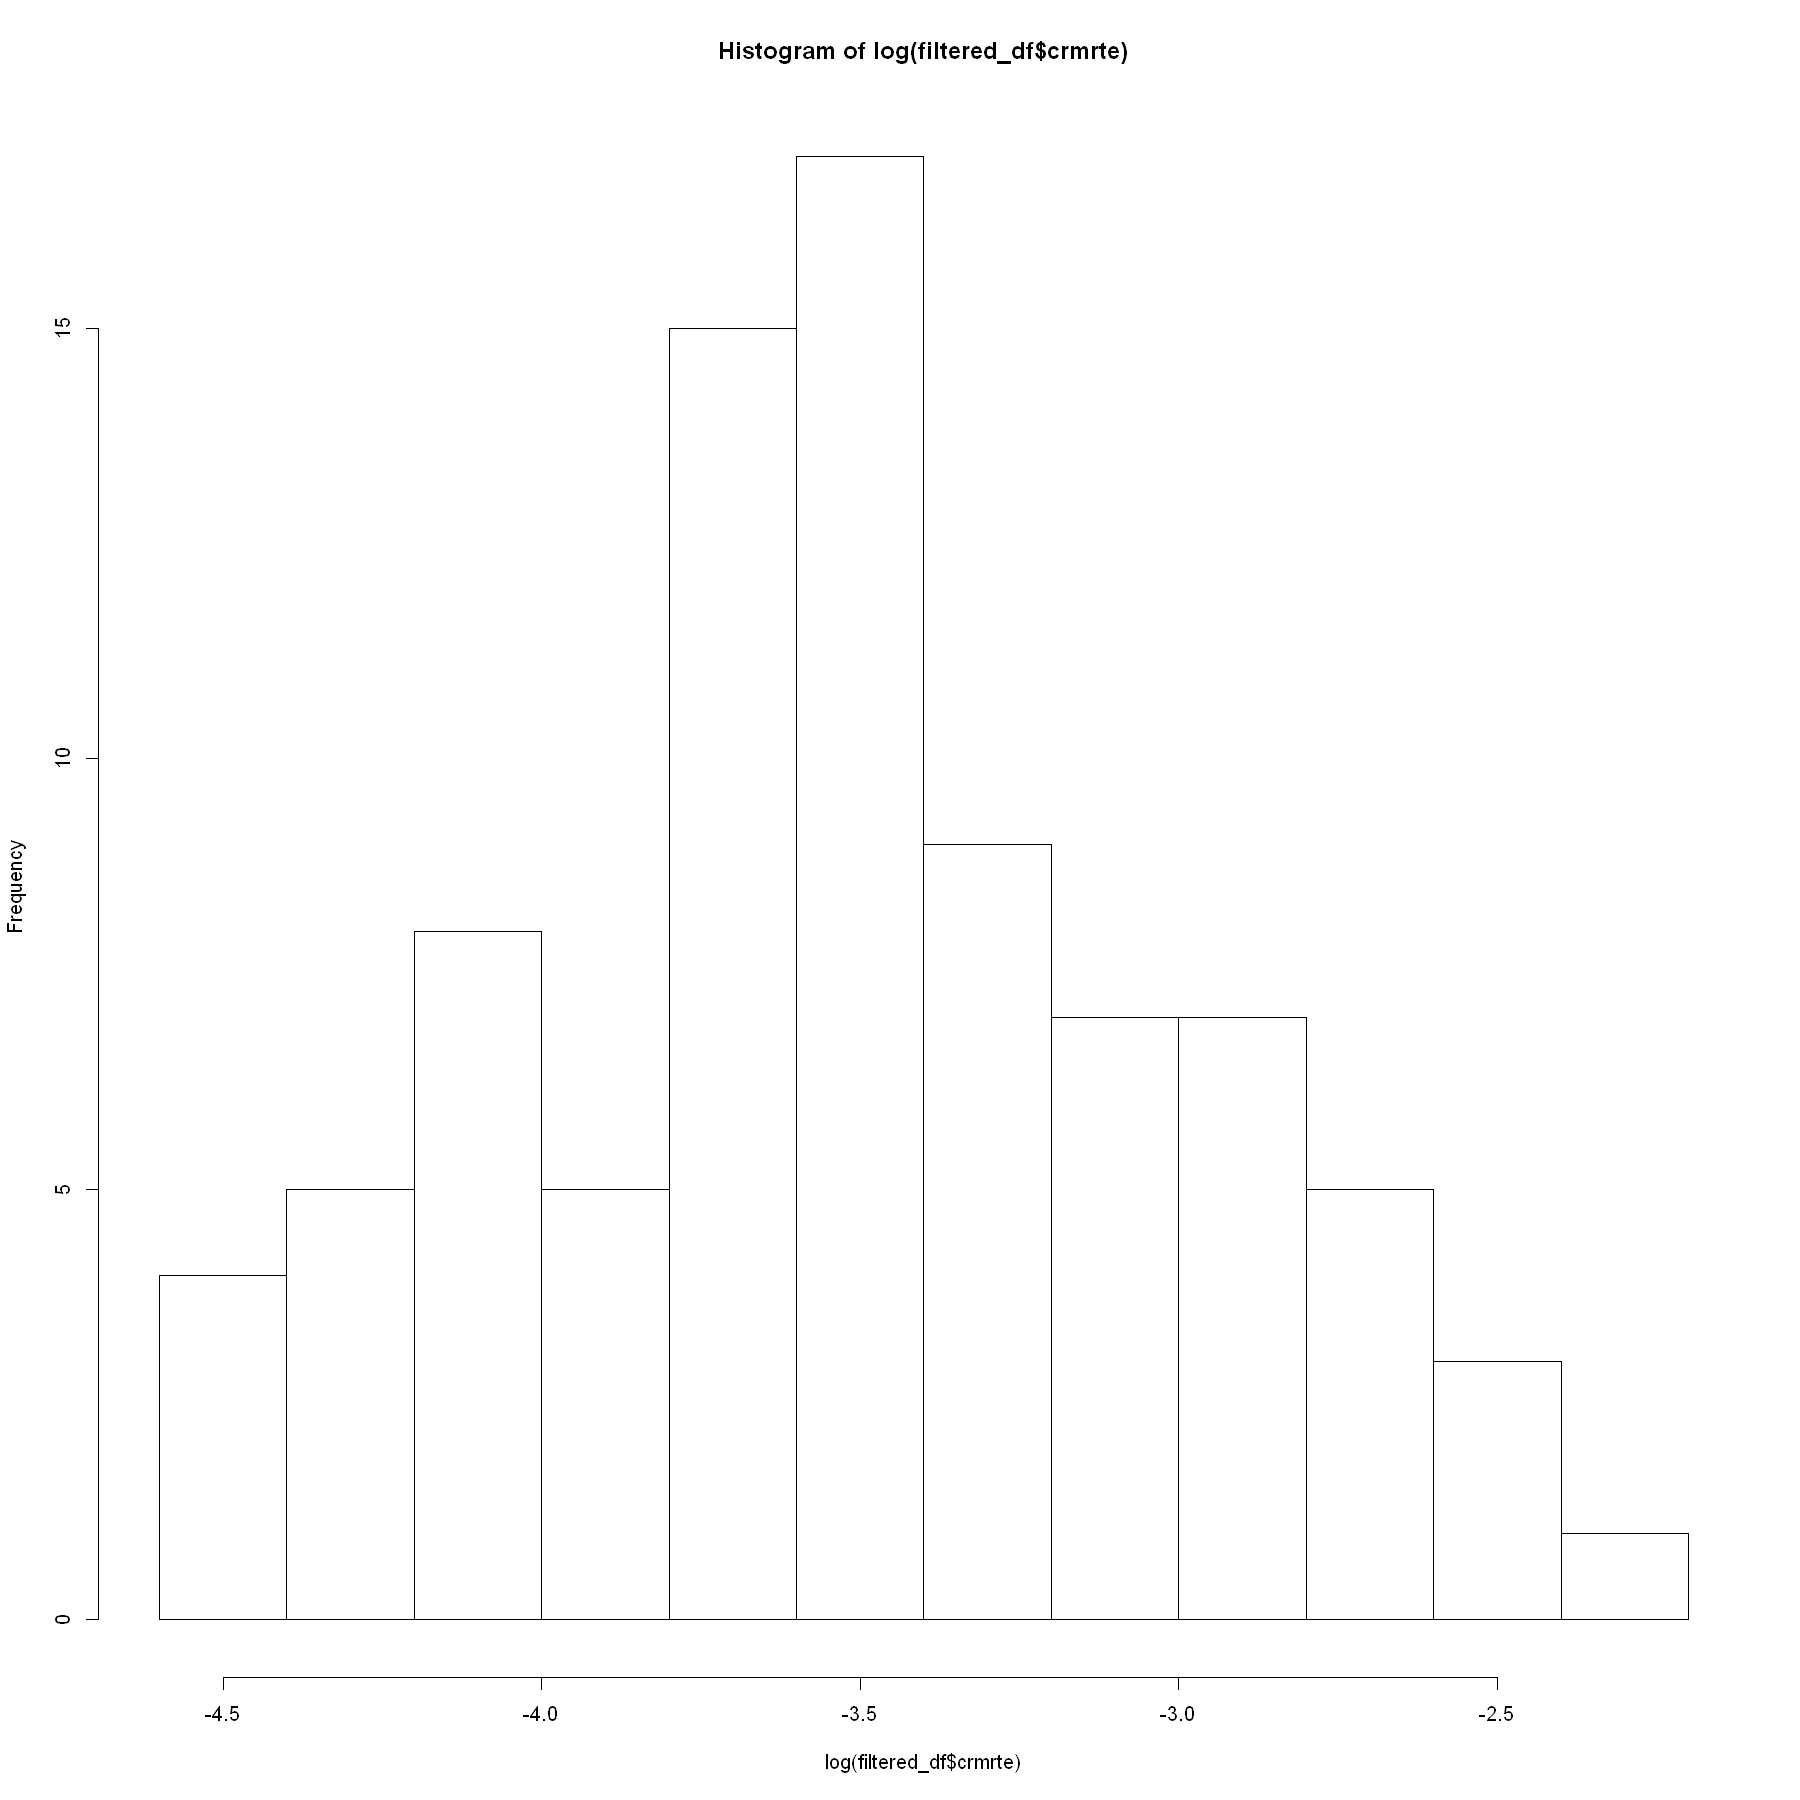

In [70]:
cat("One recommendation to adjust for non-normal residual distribution is to check to see if our 
dependent variable is skewed. If it is, a solution would be to log-transform the y variable. 
As we have log-transformed this variable, we have already made a key adjustment toward normality")
hist(log(filtered_df$crmrte))

## IV. Regression Table

In [73]:
# we want to use the robust covariance matrix for standard errors to address heteroskedascity
se.model1_log = sqrt(diag(vcovHC(model1_log)))
se.model2_log2 = sqrt(diag(vcovHC(model2_log2)))
se.model3 = sqrt(diag(vcovHC(model3)))
# changed the cutoffs to show highly statistically significant coefficients
print(se.model1_log)
stargazer(model1_log, model2_log2,model3, type="text",
          se = list(se.model1_log, se.model2_log2, se.model3),
          omit.stat = "f",
          column.sep.width = "15pt",
         star.cutoffs = c(0.05, 0.01, 0.001))

(Intercept)      prbarr     prbconv     prbpris 
  0.3614242   0.5172316   0.1657082   0.6979615 

                                  Dependent variable:              
                    -----------------------------------------------
                                      log(crmrte)                  
                          (1)             (2)             (3)      
-------------------------------------------------------------------
prbarr                 -2.404***       -1.283**        -1.395***   
                        (0.517)         (0.479)         (0.326)    
                                                                   
prbconv                -0.975***                                   
                        (0.166)                                    
                                                                   
log(prbconv)                            -0.321*         -0.213     
                                        (0.148)         (0.136)    
                 

We used the log(crmrte) for our dependent variable and comparing the models based off this log transformation.
For the first model we see that prbarr and prbconv are highly statistically significant with p-ivalue of < 0.001. In model 2, log(polpc) is the only highly statistically signficant coefficient while prbarr and log(prbconv) has some statistical signficance. Lastly on model 3, we see that prbarr and pctmin80 are highly statistically signficant, log(polpc) and density have some siginficance respectively.
While looking at the practical signficance of each model, prbarr has the most practical signficance of any variable as it has the greatest effect on log(crmrte). Police Presence follows as somewhat practical signficance with affecting both model 2 and model 3. On Model 3, percentage male has a highly practical signficance to log(crmrte) with a coefficient of 2.379.

## 5. A Discussion of Omitted Variables

Identify what you think are the 5-10 most important omitted variables that bias results you care about.  For each variable, you should estimate what direction the bias is in.  If you can argue whether the bias is large or small, that is even better.  State whether you have any variables available that may proxy (even imperfectly) for the omitted variable.   Pay particular attention to whether each omitted variable bias is towards zero or away from zero.  You will use this information to judge whether the effects you find are likely to be real, or whether they might be entirely an artifact of omitted variable bias.



## 6. A Conclusion

Make sure that you end your report with a discussion that relates your results to concerns of the political campaign.



## VI. Conclusion